In [1]:
!pip install sdv # install the synthetic data vault library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.2/180.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize
import pandas as pd
# import torch.nn.functional as F


import pandas as pd
import numpy as np
import math

# import scikit-learn preprocessing
from sklearn.preprocessing import LabelEncoder, QuantileTransformer,PowerTransformer

# import pytorch libraries
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR

# import synthetic data value libraries
from sdv.metadata import SingleTableMetadata
import sdv.evaluation.single_table as sdv_st

# import utility libs
from tqdm import tqdm
import xlrd
import requests
from io import BytesIO
from zipfile import ZipFile
from datetime import datetime

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# set random seed
seed= 1234

# set dimension of categorical embedding
cat_emb_dim= 2

# set number of neurons per layes
mlp_layers=[1024,1024,1024,1024]

# set non-linear activation function
activation='lrelu'

# set number of diffusion steps
diffusion_steps= 1000

# set diffusion stop and end betas
diffusion_beta_start= 1e-4
diffusion_beta_end= 0.02

# set diffusion scheduler
scheduler= 'exp'

# set number of training epochs
epochs= 500

# set the training batch size
batch_size= 512

# set the training learning rate
learning_rate= 1e-4

# set the device
device= torch.device("cuda:0" if torch.cuda.is_available() else "cpu").type

beta_start=1e-4
beta_end=0.02

In [4]:
betas = torch.exp(torch.linspace(math.log(beta_start), math.log(beta_end), 1000))
alphas = 1.0 - betas


# x = torch.linspace(-6, 6, 1000)
# betas = torch.sigmoid(x) * (beta_end - beta_start) + beta_start
# alphas = 1.0 - betas


# betas = torch.linspace(beta_start**0.5, beta_end**0.5, 1000) ** 2
# alphas = 1.0 - betas


# betas = torch.linspace(beta_start, beta_end, 1000)
# alphas = 1.0 - betas

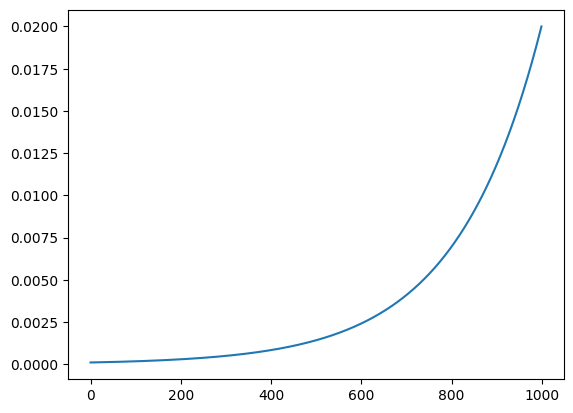

In [ ]:
plt.plot(betas)

Set Initialize experiment parameters

In [5]:
# set numpy seed
np.random.seed(seed)

# set pytorch seed
torch.manual_seed(seed)

# set cuda seed
torch.cuda.manual_seed(seed)

# FinDiff on czeck dataset

Initialization

In [6]:
# define a preproces data function


from datetime import datetime
import calendar
import numpy as np
import pandas as pd
import random
import os
import numpy as np
import tensorflow as tf

# Set seeds
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)
os.environ['TF_DETERMINISTIC_OPS'] = '1'


def preprocess_data_czech(df):
    #df = pd.read_csv('tr_by_acct_w_age.csv')

    czech_date_parser = lambda x: datetime.strptime(str(x), "%y%m%d")
    df["datetime"] = df["date"].apply(czech_date_parser)
    #df["datetime"] = pd.to_datetime(df["datetime"])

    df["month"] = df["datetime"].dt.month
    df["day"] = df["datetime"].dt.day
    df["dow"] =  df["datetime"].dt.dayofweek
    df["year"] = df["datetime"].dt.year
    df["doy"] = df["datetime"].dt.dayofyear

    df["td"] = df[["account_id", "datetime"]].groupby("account_id").diff()
    df["td"] = df["td"].apply(lambda x: x.days)
    df["td"].fillna(0.0, inplace=True)


    # dtme - days till month end
    df["dtme"] = df.datetime.apply(lambda dt: calendar.monthrange(dt.year, dt.month)[1] - dt.day)

    df['raw_amount'] = df.apply(lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)


    cat_code_fields = ['type', 'operation', 'k_symbol']
    TCODE_SEP = "__"
    # create tcode by concating fields in "cat_code_fields"
    tcode = df[cat_code_fields[0]].astype(str)
    for ccf in cat_code_fields[1:]:
        tcode += TCODE_SEP + df[ccf].astype(str)

    df["tcode"] = tcode

    conditions = [
    (df['day'] >= 1) & (df['day'] <= 10),
    (df['day'] > 10) & (df['day'] <= 20),
    (df['day'] > 20) & (df['day'] <= 31)
      ]

    categories = ['first', 'middle', 'last']

    # Use numpy.select() to map the numbers to categories
    df['DoM_cat'] = np.select(conditions, categories, default='unknown')


    bin_edges = [17, 30, 40, 50, 60, 81]
    labels = ['18-30', '31-40', '41-50', '51-60', '61+']

    # Use pd.cut() to convert ages to categorical groups
    df['age_group'] = pd.cut(df['age'], bins=bin_edges, labels=labels, right=False)
    df['age_group'] = df['age_group'].astype('object')

    result = df.groupby('account_id')['datetime'].agg(['min', 'max'])
    result['duration'] = result['max'] - result['min']
    result_sorted = result.sort_values('duration', ascending=False)

    df['log_amount'] = np.log10(df['amount'] + 1)
    LOG_AMOUNT_SCALE = df['log_amount'].std()
    df['log_amount_sc'] = df['log_amount']/ LOG_AMOUNT_SCALE
    TD_SCALE = df['td'].std()
    df['td_sc'] = df['td']/TD_SCALE

    return df, LOG_AMOUNT_SCALE , TD_SCALE

In [7]:
real = pd.read_csv('tr_by_acct_w_age.csv')
real = real.sort_values(by = ["account_id", "date"])
raw_data, LOG_AMOUNT_SCALE, TD_SCALE = preprocess_data_czech(real)



all_real = raw_data[['account_id', 'tcode', 'datetime', 'amount', 'td', 'day', 'month', 'year']]
all_real['type'] = all_real['tcode'].str.split('__').str[0]
all_real['raw_amount'] = all_real.apply(lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)
all_real_cf = all_real[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()

<ipython-input-6-3939612794>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["td"].fillna(0.0, inplace=True)


In [ ]:
raw_data.to_csv('raw_data.csv')

In [ ]:
LOG_AMOUNT_SCALE

1.0625705442977056

In [ ]:
TD_SCALE

6.063912193703339

In [ ]:
lst=[1,2,3]

all_real[all_real.account_id.isin(lst)].to_csv('real_data_check.csv')

In [ ]:
# raw_data

raw_data['raw_amount'] = raw_data.apply(lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 25 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Unnamed: 0     1056320 non-null  int64         
 1   account_id     1056320 non-null  int64         
 2   date           1056320 non-null  int64         
 3   type           1056320 non-null  object        
 4   operation      873206 non-null   object        
 5   amount         1056320 non-null  float64       
 6   balance        1056320 non-null  float64       
 7   k_symbol       574439 non-null   object        
 8   client_id      1056320 non-null  int64         
 9   age            1056320 non-null  int64         
 10  datetime       1056320 non-null  datetime64[ns]
 11  month          1056320 non-null  int32         
 12  day            1056320 non-null  int32         
 13  dow            1056320 non-null  int32         
 14  year           1056320 non-null  i

In [ ]:
raw_data.columns

Index(['Unnamed: 0', 'account_id', 'date', 'type', 'operation', 'amount',
       'balance', 'k_symbol', 'client_id', 'age', 'datetime', 'month', 'day',
       'dow', 'year', 'doy', 'td', 'dtme', 'raw_amount', 'tcode', 'DoM_cat',
       'age_group', 'log_amount', 'log_amount_sc', 'td_sc'],
      dtype='object')

In [ ]:
df_trans=raw_data

df_trans_filtered=df_trans[['account_id','tcode','amount','raw_amount','age','day','month','year','td']]

In [ ]:
df_trans_filtered

,account_id,tcode,amount,raw_amount,age,day,month,year,td
0,1,CREDIT__CREDIT IN CASH__nan,1000.0,1000.0,29,24,3,1995,0.0
1,1,CREDIT__COLLECTION FROM ANOTHER BANK__nan,3679.0,3679.0,29,13,4,1995,20.0
2,1,CREDIT__CREDIT IN CASH__nan,12600.0,12600.0,29,23,4,1995,10.0
3,1,CREDIT__nan__INTEREST CREDITED,19.2,19.2,29,30,4,1995,7.0
4,1,CREDIT__COLLECTION FROM ANOTHER BANK__nan,3679.0,3679.0,29,13,5,1995,13.0
...,...,...,...,...,...,...,...,...,...
1056315,11382,DEBIT__CASH WITHDRAWAL__nan,25600.0,-25600.0,46,2,12,1998,2.0
1056316,11382,CREDIT__COLLECTION FROM ANOTHER BANK__nan,46248.0,46248.0,46,10,12,1998,8.0
1056317,11382,DEBIT__CASH WITHDRAWAL__nan,6300.0,-6300.0,46,25,12,1998,15.0
1056318,11382,CREDIT__nan__INTEREST CREDITED,311.3,311.3,46,31,12,1998,6.0


In [ ]:
df_trans_filtered.tcode.unique()

array(['CREDIT__CREDIT IN CASH__nan',
       'CREDIT__COLLECTION FROM ANOTHER BANK__nan',
       'CREDIT__nan__INTEREST CREDITED', 'DEBIT__CASH WITHDRAWAL__nan',
       'DEBIT__CASH WITHDRAWAL__PAYMENT ON STATEMENT',
       'DEBIT__REMITTANCE TO ANOTHER BANK__HOUSEHOLD',
       'DEBIT__REMITTANCE TO ANOTHER BANK__LOAN PAYMENT',
       'DEBIT__REMITTANCE TO ANOTHER BANK__ ',
       'DEBIT__REMITTANCE TO ANOTHER BANK__INSURANCE PAYMENT',
       'CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE PENSION',
       'DEBIT__CREDIT CARD WITHDRAWAL__nan',
       'DEBIT__REMITTANCE TO ANOTHER BANK__nan',
       'DEBIT__CASH WITHDRAWAL__HOUSEHOLD',
       'DEBIT__CASH WITHDRAWAL__SANCTION INTEREST',
       'DEBIT__CASH WITHDRAWAL__ ',
       'DEBIT__CASH WITHDRAWAL__INSURANCE PAYMENT'], dtype=object)

In [ ]:
# df_trans_filtered['tcode'] = df_trans_filtered['tcode'].str.replace(r'__nan$', '', regex=True)


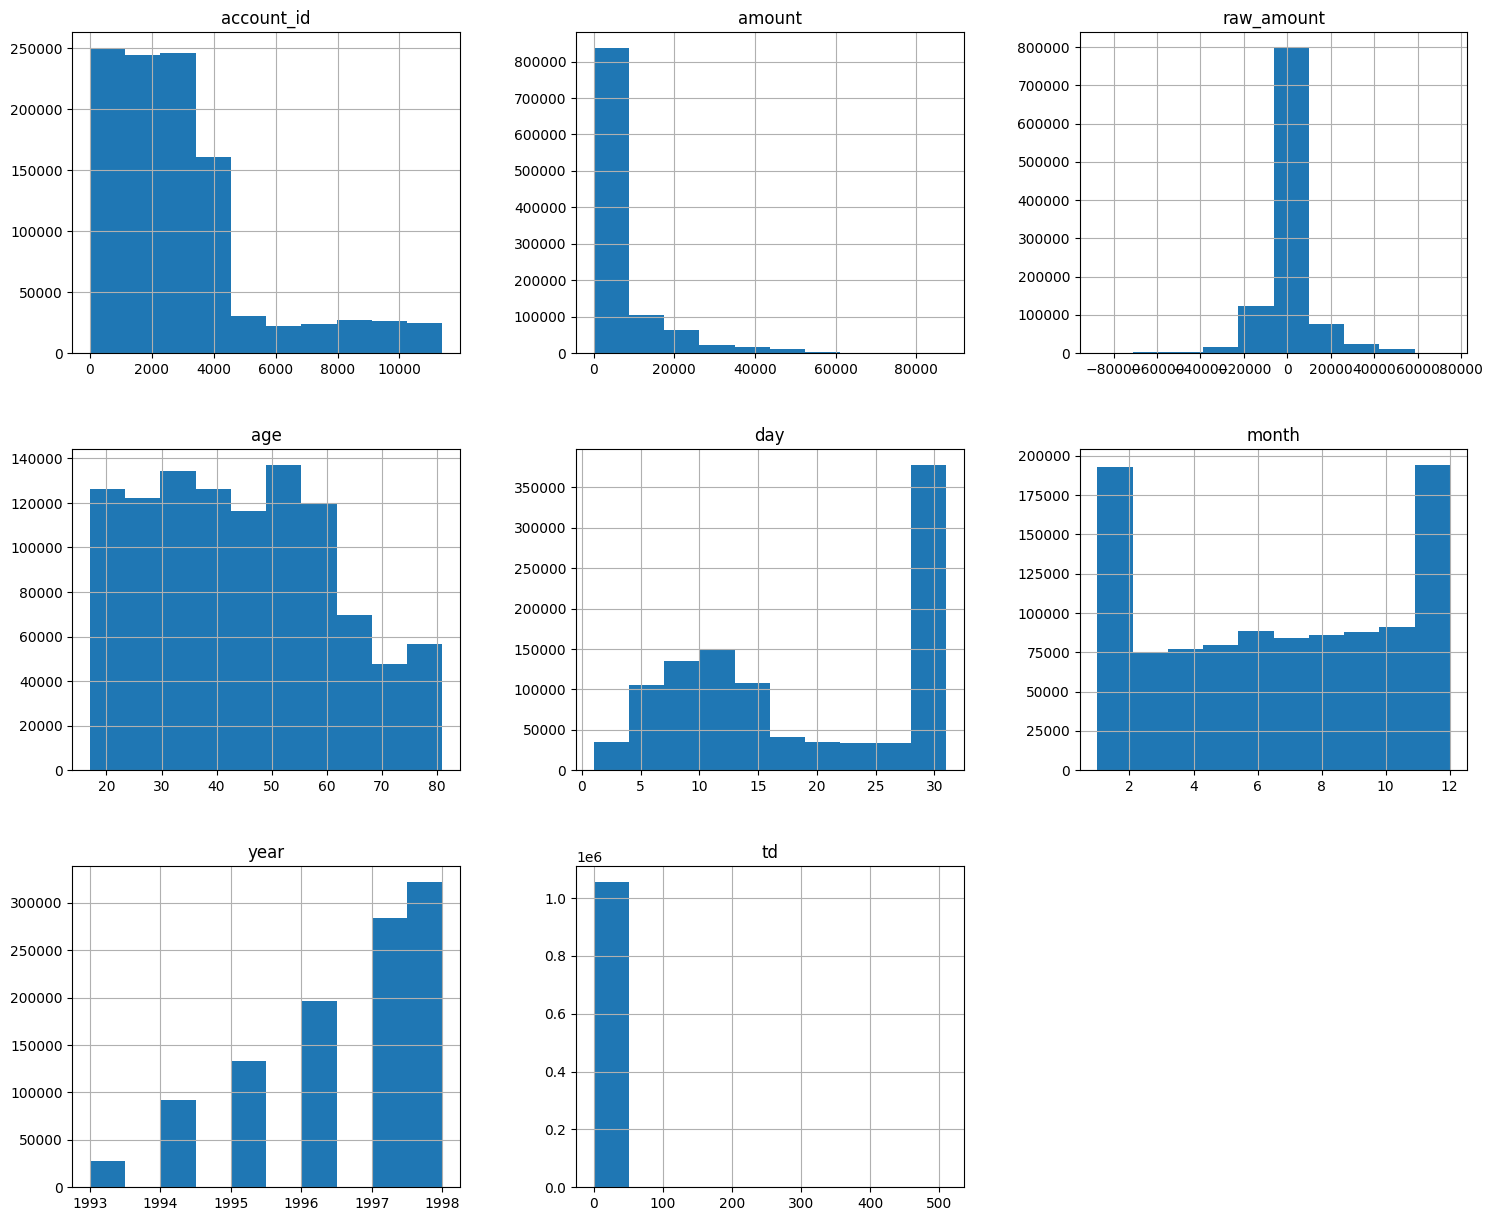

In [ ]:
df_trans_filtered.hist(figsize=(18,15));

In [ ]:
df_trans_filtered.columns

Index(['account_id', 'tcode', 'amount', 'raw_amount', 'age', 'day', 'month',
       'year', 'td'],
      dtype='object')

In [ ]:
# determine categotical attributes
cat_attrs= ['age','day','td','month','tcode']

 # determine numerical attributes
num_attrs= ['amount','raw_amount','account_id','year']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
label_encoder = LabelEncoder()

# Fit and transform the data
df_trans_filtered['tcode'] = label_encoder.fit_transform(df_trans['tcode'])



In [ ]:
# df_trans_filtered['tcode_str'] = df_trans_filtered['tcode'].apply(lambda x: original_tcodes[int(x)])
# df_trans_filtered['tcode_str'] = label_encoder.inverse_transform(df_trans_filtered['tcode'])


<Axes: >

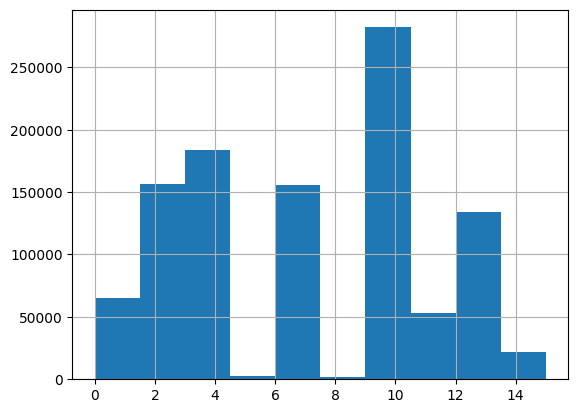

In [ ]:
df_trans_filtered['tcode'].hist()

In [ ]:
df_trans_filtered.head()

,account_id,tcode,amount,raw_amount,age,day,month,year,td
0,1,2,1000.0,1000.0,29,24,3,1995,0.0
1,1,1,3679.0,3679.0,29,13,4,1995,20.0
2,1,2,12600.0,12600.0,29,23,4,1995,10.0
3,1,3,19.2,19.2,29,30,4,1995,7.0
4,1,1,3679.0,3679.0,29,13,5,1995,13.0


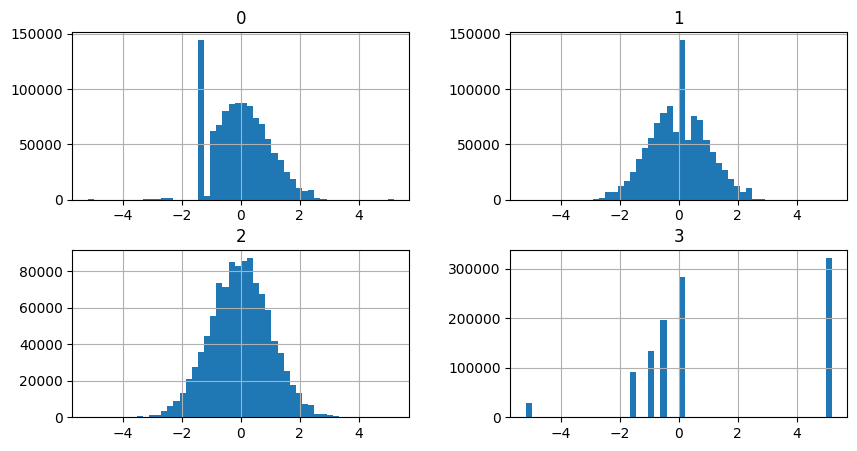

In [ ]:
# retrieve just the numeric input values
data = df_trans_filtered[num_attrs].values
# perform a normal quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = pd.DataFrame(data)
# histograms of the variables
dataset.hist(figsize=(10,5),bins=50)
plt.show()

In [ ]:
train= df_trans_filtered

only choose 2 hundered thousdand data

In [ ]:
from sklearn.model_selection import train_test_split

# stratifiled sampling by 'tcode'

df_sampled, _= train_test_split(
    train, train_size=200000,stratify=train['tcode'],
    random_state=seed
)

train= df_sampled.sample(frac=1, random_state=seed).reset_index(drop=True)


In [ ]:
train

,account_id,tcode,amount,raw_amount,age,day,month,year,td
0,1920,2,5356.0,5356.0,51,12,11,1996,2.0
1,2052,7,14.6,-14.6,38,30,9,1996,19.0
2,1821,3,168.1,168.1,38,30,4,1996,16.0
3,1029,3,231.8,231.8,32,31,7,1997,4.0
4,2723,9,2280.0,-2280.0,22,6,4,1997,6.0
...,...,...,...,...,...,...,...,...,...
199995,271,7,14.6,-14.6,81,31,7,1997,17.0
199996,4337,2,26515.0,26515.0,50,5,6,1996,2.0
199997,3264,12,1886.0,-1886.0,75,7,6,1996,7.0
199998,1950,2,12757.0,12757.0,43,12,2,1998,1.0


In [ ]:
# train.to_csv('train.csv')

In [ ]:
# init the quantile transofrmation
num_scaler= QuantileTransformer(output_distribution='normal', random_state=seed)

# fit transform to numerical attributes
num_scaler.fit(train[num_attrs])

# transformed numerical attributes
train_num_scaled= num_scaler.transform(train[num_attrs])

In [ ]:
vocabulary_classes= np.unique(train[cat_attrs])

# init categorical attribute encoder
label_encoder= LabelEncoder()

# fit encoder to categorical attributes
label_encoder.fit(vocabulary_classes)

# transform cateforical attributes
train_cat_scaled= train[cat_attrs].apply(label_encoder.transform)

# collect unique values of each categorical attribute
vocab_per_attr = {cat_attr: set(train_cat_scaled[cat_attr]) for cat_attr in cat_attrs}

In [ ]:
vocab_per_attr

{'age': {17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81},
 'day': {1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31},
 'td': {0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  33,
  36,
  45,
  47,
  49,
  54,
  57,
  58,
  60,
  61,
  69,
  82,
  83,
  84,
  85,
  86,
  87,
  88},
 'month': {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 'tcode': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}}

In [ ]:
train_cat_scaled

,age,day,td,month,tcode
0,51,12,2,11,2
1,38,30,19,9,7
2,38,30,16,4,3
3,32,31,4,7,3
4,22,6,6,4,9
...,...,...,...,...,...
199995,81,31,17,7,7
199996,50,5,2,6,2
199997,75,7,7,6,12
199998,43,12,1,2,2


In [ ]:
# convert the numerical attributes
train_num_torch= torch.FloatTensor(train_num_scaled)

# convert the categorical attributes
train_cat_torch= torch.LongTensor(train_cat_scaled.values) # the train_cat_scaled was a dataframe so we have to get values

# init tensor dataset
train_set= TensorDataset(
    train_cat_torch, # categorical attributes
    train_num_torch,
    # label_torch # dataset labels

)

In [ ]:
dataloader= DataLoader(dataset=train_set, batch_size=batch_size, num_workers=0, shuffle=True)

In [ ]:
next(iter(dataloader))

[tensor([[64, 23, 11,  9,  9],
         [51,  6,  6,  2,  9],
         [29,  3,  1,  6,  9],
         ...,
         [50, 31, 20,  8,  3],
         [38,  4,  4,  9,  2],
         [19, 30, 14,  9,  3]]),
 tensor([[ 0.5351, -1.0318,  0.8038, -1.4642],
         [ 0.0552, -0.5761,  1.3383,  0.1537],
         [ 0.9415, -1.4903,  0.9230,  5.1993],
         ...,
         [-0.8904,  0.3485,  0.8495,  0.1537],
         [ 0.4280,  0.9979, -0.1615, -0.4294],
         [-0.5555,  0.6092,  1.1081,  5.1993]])]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# LSTM Synthesizer

In [ ]:
# LSTM-based Architecture
class LSTMSynthesizer(nn.Module):
    def __init__(self, d_in, hidden_layers, activation='lrelu',
                 dim_t=64, n_cat_tokens=None, n_cat_emb=None,
                 embedding=None, embedding_learned=True,
                 lstm_layers=1, bidirectional=True):
        super(LSTMSynthesizer, self).__init__()

        # init
        self.dim_t = dim_t
        self.lstm_layers = lstm_layers
        self.bidirectional = bidirectional

        # Handle categorical embeddings
        if embedding is not None:
            self.cat_embedding = nn.Embedding.from_pretrained(embeddings=embedding)
        else:
            self.cat_embedding = nn.Embedding(n_cat_tokens, n_cat_emb, max_norm=None, scale_grad_by_freq=False)
            self.cat_embedding.weight.requires_grad = embedding_learned

        # For label embedding if needed
        # if n_classes is not None:
        #     self.label_embedding = nn.Embedding(n_classes, dim_t)

        # Input projection
        self.projection = nn.Sequential(
            nn.Linear(d_in, dim_t),
            nn.SiLU(),
            nn.Linear(dim_t, dim_t)
        )

        # Time embedding projection
        self.time_embed = nn.Sequential(
            nn.Linear(dim_t, dim_t),
            nn.SiLU(),
            nn.Linear(dim_t, dim_t)
        )

        # LSTM Backbone
        lstm_input_size = dim_t
        lstm_hidden_size = hidden_layers[0] if hidden_layers else dim_t
        self.lstm = nn.LSTM(
            input_size=lstm_input_size,
            hidden_size=lstm_hidden_size,
            num_layers=lstm_layers,
            batch_first=True,
            bidirectional=bidirectional
        )

        # Output projection based on LSTM output size
        lstm_output_size = lstm_hidden_size * 2 if bidirectional else lstm_hidden_size
        self.head = nn.Linear(lstm_output_size, d_in)

    def embed_time(self, timesteps, dim_out, max_period=1000):
        # half output dimension
        half_dim_out = dim_out // 2

        # determine tensor of frequencies
        freqs = torch.exp(-math.log(max_period) * torch.arange(start=0,
                                                 end=half_dim_out, dtype=torch.float32) / half_dim_out)

        freqs = freqs.to(device=timesteps.device)

        # create timesteps vs frequency grid
        args = timesteps[:, None].float() * freqs[None]

        # creating the time embedding
        time_embedding = torch.cat([torch.cos(args), torch.sin(args)], dim=-1)

        # case odd output dimension
        if dim_out % 2:
            # append additional dimension
            time_embedding = torch.cat([time_embedding, torch.zeros_like(time_embedding[:, :1])], dim=-1)

        # return timestep embedding
        return time_embedding

    # get categorical embedding
    def get_embedding(self):
        # return categorical embedding
        return self.cat_embedding.weight.data

    # perform categorical embedding
    def embed_categorical(self, x_cat):
        # perform categorical embedding
        x_cat_emb = self.cat_embedding(x_cat)

        # reshape embedding to original input
        x_cat_emb = x_cat_emb.view(-1, x_cat_emb.shape[1] * x_cat_emb.shape[2])

        return x_cat_emb

    # define forward pass
    def forward(self, x, timesteps):
        batch_size = x.shape[0]

        # init time embeddings
        time_emb = self.embed_time(timesteps, self.dim_t)

        # embed time embedding
        time_emb = self.time_embed(time_emb)

        # case: data classes available
        # if label is not None:
        #     time_label_emb = time_emb + self.label_embedding(label)
        # else:
        time_label_emb = time_emb

        # run initial projection layer
        x = self.projection(x)

        # add time and label embedding
        x = x + time_label_emb

        # Reshape for LSTM (batch_size, seq_len=1, features)
        x = x.unsqueeze(1)

        # Pass through LSTM
        x, _ = self.lstm(x)

        # Extract the last output for each sequence
        x = x[:, -1, :]

        # Pass through output layer
        x = self.head(x)

        return x

### student-t distribution

In [ ]:

import torch
import math
from scipy import stats

# define Student's t-Distribution DDPM Diffuser network
class StudentTDDPMDiffuser(object):
  # define the constructor
  def __init__(self, total_steps=1000, beta_start=1e-4, beta_end=0.02, device='cpu', scheduler='exp', df=10):
     # set diffusion steps
     self.total_steps = total_steps

     # set diffusion start beta
     self.beta_start = beta_start

     # set diffusion end beta
     self.beta_end = beta_end

     # set compute device
     self.device = device

     # set degrees of freedom for t-distribution
     self.df = df

     # set noise schedule alphas and betas
     self.alphas, self.betas = self.prepare_noise_schedule(scheduler=scheduler)

     # set noise schedule alpha hat
     self.alphas_hat = torch.cumprod(self.alphas, dim=0)

  # define noise schedule
  def prepare_noise_schedule(self, scheduler: str):
    # define noise scheduler scale
    scale = 1000 / self.total_steps

    # scale beta start
    beta_start = scale * self.beta_start

    # scale beta end
    beta_end = scale * self.beta_end

    if scheduler == 'linear':
        betas = torch.linspace(beta_start, beta_end, self.total_steps)
        alphas = 1.0 - betas

    elif scheduler == 'quad':
        betas = torch.linspace(self.beta_start**0.5, self.beta_end**0.5, self.total_steps) ** 2
        alphas = 1.0 - betas

    elif scheduler == 'exp':
        betas = torch.exp(torch.linspace(math.log(beta_start), math.log(beta_end), self.total_steps))
        alphas = 1.0 - betas

    elif scheduler == 'sigm':
        x = torch.linspace(-6, 6, self.total_steps)
        betas = torch.sigmoid(x) * (beta_end - beta_start) + beta_start
        alphas = 1.0 - betas

    return alphas.to(self.device), betas.to(self.device)

  # define random timesteps sampler
  def sample_random_timesteps(self, n:int):
    # sample random timesteps
     t = torch.randint(low=1, high=self.total_steps, size=(n,), device=self.device)
     return t

  # Generate samples from Student's t-distribution
  def sample_student_t(self, shape):
    # Use the reparameterization trick for Student's t-distribution
    # t = sqrt(df/(df-2)) * X / sqrt(Z/df) where X ~ N(0,1) and Z ~ Chi^2(df)
    # For df > 2, this gives a t-distribution with variance 1

    if self.df <= 2:
        # Ensure finite variance
        df_sample = 3.0
    else:
        df_sample = float(self.df)

    # Generate normal samples - FIX: shape should be a tuple or list, not a tensor
    if isinstance(shape, torch.Tensor):
        shape = tuple(shape.tolist())
    x = torch.randn(shape, device=self.device)

    # Generate chi-squared samples using gamma distribution
    # Chi^2(k) is equivalent to Gamma(k/2, 2)
    gamma_shape = df_sample / 2.0
    gamma_samples = torch.tensor(stats.gamma.rvs(gamma_shape, scale=2.0, size=shape[0]),
                                 dtype=torch.float32,
                                 device=self.device).view(-1, 1)

    # Compute the t-distributed noise
    # Scaling factor ensures variance = 1 for df > 2
    scaling = torch.sqrt(torch.tensor(df_sample / (df_sample - 2.0), device=self.device)) if df_sample > 2 else torch.tensor(1.0, device=self.device)

    t_noise = scaling * x / torch.sqrt(gamma_samples / df_sample)

    return t_noise

  # define Student-t noise addition for forward process
  def add_t_noise(self, x_num, t):
    # determine noise alpha hat
    sqrt_alpha_hat = torch.sqrt(self.alphas_hat[t])[:, None]

    # determine noise one minus alpha hat
    sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alphas_hat[t])[:, None]

    # determine Student-t noise instead of Gaussian
    noise_shape = x_num.shape
    batch_size = noise_shape[0]
    noise_num = self.sample_student_t((batch_size, x_num.shape[1]))

    # determine x numeric noise (same formula as Gaussian, but with t-distribution noise)
    x_noise_num = sqrt_alpha_hat * x_num + sqrt_one_minus_alpha_hat * noise_num

    return x_noise_num, noise_num

  # define Student-t noise sampling for reverse process
  def p_sample_t(self, model_out, z_norm, timesteps):
    # determine noise alpha
    sqrt_alpha_t = torch.sqrt(self.alphas[timesteps])[:, None]

    # determine noise beta
    betas_t = self.betas[timesteps][:, None]

    # determine noise one minus alpha hat
    sqrt_one_minus_alpha_hat_t = torch.sqrt(1 - self.alphas_hat[timesteps])[:, None]

    epsilon_t = torch.sqrt(self.betas[timesteps][:, None])

    # determine t-distribution noise instead of Gaussian
    batch_size = z_norm.shape[0]
    random_noise = self.sample_student_t((batch_size, z_norm.shape[1]))
    random_noise[timesteps == 0] = 0.0

    # determine model mean (same formula as Gaussian case)
    model_mean = ((1 / sqrt_alpha_t) * (z_norm - (betas_t * model_out / sqrt_one_minus_alpha_hat_t)))

    # determine z norm with t-distribution noise
    z_norm = model_mean + (epsilon_t * random_noise)

    return z_norm

  # Full sampling process - FIX: Modify the method signature to match your usage
  def sample(self, model_out, z_norm, timesteps):
    # This is a simplified version that directly uses the p_sample_t method
    return self.p_sample_t(model_out, z_norm, timesteps)

  # The original sample method can be renamed to sample_full if you still need it
  def sample_full(self, model, shape, device):
    # Start from pure noise (t-distributed)
    x = self.sample_student_t(shape).to(device)

    # Iterate backward through timesteps
    for t in range(self.total_steps - 1, -1, -1):
        # Create a batch of the same timestep
        timesteps = torch.full((shape[0],), t, device=device, dtype=torch.long)

        # Predict noise
        predicted_noise = model(x, timesteps)

        # Sample for this timestep
        x = self.p_sample_t(predicted_noise, x, timesteps)

    return x

In [ ]:
# determine number of unique categorical tokens
n_cat_tokens= len(np.unique(train[cat_attrs]))

In [ ]:
n_cat_tokens

89

In [ ]:
# detrermine total categorical embedding dimension
cat_dim= cat_emb_dim * len(cat_attrs)

# determine total numerical embedding dimension
num_dim= len(num_attrs)

# detrmine total embedding dimension
encoded_dim= cat_dim + num_dim

In [ ]:
encoded_dim

14

In [ ]:
synthesizer_model = LSTMSynthesizer(
    d_in=encoded_dim,  # the input shape
    hidden_layers=mlp_layers,
    activation=activation,
    n_cat_tokens=n_cat_tokens,
    n_cat_emb=cat_emb_dim,
    embedding_learned=False,
    # num_layers=4,
    # dim_feedforward=2048
)



In [ ]:
synthesizer_model

LSTMSynthesizer(
  (cat_embedding): Embedding(89, 2)
  (projection): Sequential(
    (0): Linear(in_features=14, out_features=64, bias=True)
    (1): SiLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
  )
  (time_embed): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): SiLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
  )
  (lstm): LSTM(64, 1024, batch_first=True, bidirectional=True)
  (head): Linear(in_features=2048, out_features=14, bias=True)
)

In [ ]:

# Initialize the Student-t distribution diffuser
diffuser = StudentTDDPMDiffuser(
    total_steps=diffusion_steps,
    beta_start=diffusion_beta_start,
    beta_end=diffusion_beta_end,
    scheduler='exp',
    device=device,
    df=10  # Set degrees of freedom - adjust based on your data characteristics
)

In [ ]:
import torch
import torch.nn as nn
import math
import numpy as np
from torch.utils.data import Dataset, DataLoader

class SequentialBankingDataset(Dataset):
    """Dataset that handles sequences of transactions per account"""

    def __init__(self, df, cat_attrs, num_attrs, sequence_length=50, min_seq_length=10):
        self.sequence_length = sequence_length
        self.min_seq_length = min_seq_length
        self.cat_attrs = cat_attrs
        self.num_attrs = num_attrs

        # Group by account and create sequences
        self.sequences = []
        self.account_sequences = {}

        for account_id in df['account_id'].unique():
            account_data = df[df['account_id'] == account_id].sort_values('datetime')

            if len(account_data) >= min_seq_length:
                # Store full sequence for this account
                cat_data = account_data[cat_attrs].values
                num_data = account_data[num_attrs].values

                # Create overlapping windows of transactions
                for i in range(len(account_data) - sequence_length + 1):
                    seq_cat = cat_data[i:i+sequence_length]
                    seq_num = num_data[i:i+sequence_length]

                    self.sequences.append({
                        'account_id': account_id,
                        'cat_data': seq_cat,
                        'num_data': seq_num,
                        'start_idx': i
                    })

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq = self.sequences[idx]
        return (
            torch.LongTensor(seq['cat_data']),
            torch.FloatTensor(seq['num_data']),
            seq['account_id']
        )

class SequentialLSTMSynthesizer(nn.Module):
    """Enhanced LSTM model for sequential transaction generation"""

    def __init__(self, d_in, hidden_layers, activation='relu',
                 dim_t=64, n_cat_tokens=None, n_cat_emb=None,
                 sequence_length=50, lstm_layers=2, bidirectional=False,
                 dropout=0.1):
        super(SequentialLSTMSynthesizer, self).__init__()

        self.dim_t = dim_t
        self.lstm_layers = lstm_layers
        self.bidirectional = bidirectional
        self.sequence_length = sequence_length

        # Categorical embeddings
        self.cat_embedding = nn.Embedding(n_cat_tokens, n_cat_emb)

        # Input projection for combined cat + num features
        self.input_projection = nn.Sequential(
            nn.Linear(d_in, dim_t),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(dim_t, dim_t)
        )

        # Time embedding
        self.time_embed = nn.Sequential(
            nn.Linear(dim_t, dim_t),
            nn.ReLU(),
            nn.Linear(dim_t, dim_t)
        )

        # Sequential LSTM backbone
        lstm_input_size = dim_t
        lstm_hidden_size = hidden_layers[0] if hidden_layers else dim_t

        self.lstm = nn.LSTM(
            input_size=lstm_input_size,
            hidden_size=lstm_hidden_size,
            num_layers=lstm_layers,
            batch_first=True,
            bidirectional=bidirectional,
            dropout=dropout if lstm_layers > 1 else 0
        )

        # Attention mechanism for sequence modeling
        lstm_output_size = lstm_hidden_size * 2 if bidirectional else lstm_hidden_size
        self.attention = nn.MultiheadAttention(
            embed_dim=lstm_output_size,
            num_heads=8,
            dropout=dropout,
            batch_first=True
        )

        # Output projection
        self.output_layers = nn.Sequential(
            nn.Linear(lstm_output_size, hidden_layers[0] if hidden_layers else dim_t),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_layers[0] if hidden_layers else dim_t, d_in)
        )

    def embed_time(self, timesteps, dim_out, max_period=1000):
        """Sinusoidal time embedding"""
        half_dim_out = dim_out // 2
        freqs = torch.exp(-math.log(max_period) * torch.arange(
            start=0, end=half_dim_out, dtype=torch.float32) / half_dim_out)
        freqs = freqs.to(device=timesteps.device)

        args = timesteps[:, None].float() * freqs[None]
        time_embedding = torch.cat([torch.cos(args), torch.sin(args)], dim=-1)

        if dim_out % 2:
            time_embedding = torch.cat([
                time_embedding,
                torch.zeros_like(time_embedding[:, :1])
            ], dim=-1)

        return time_embedding

    def embed_categorical(self, x_cat):
        """Embed categorical variables"""
        # x_cat shape: (batch_size, seq_len, n_cat_features)
        batch_size, seq_len, n_cat = x_cat.shape

        # Flatten for embedding
        x_cat_flat = x_cat.view(-1, n_cat)
        x_cat_emb = self.cat_embedding(x_cat_flat)

        # Reshape back to sequence format
        emb_dim = x_cat_emb.shape[-1] * n_cat
        x_cat_emb = x_cat_emb.view(batch_size, seq_len, emb_dim)

        return x_cat_emb

    def forward(self, x_seq, timesteps):
        """
        Forward pass for sequence data
        x_seq: (batch_size, seq_len, features)
        timesteps: (batch_size,) - same timestep for entire sequence
        """
        batch_size, seq_len, _ = x_seq.shape

        # Time embedding (broadcast to all sequence positions)
        time_emb = self.embed_time(timesteps, self.dim_t)  # (batch_size, dim_t)
        time_emb = self.time_embed(time_emb)
        time_emb = time_emb.unsqueeze(1).expand(-1, seq_len, -1)  # (batch_size, seq_len, dim_t)

        # Input projection
        x = self.input_projection(x_seq)  # (batch_size, seq_len, dim_t)

        # Add time embedding
        x = x + time_emb

        # LSTM processing
        lstm_out, _ = self.lstm(x)  # (batch_size, seq_len, lstm_hidden_size)

        # Self-attention for better sequence modeling
        attn_out, _ = self.attention(lstm_out, lstm_out, lstm_out)

        # Residual connection
        x = lstm_out + attn_out

        # Output projection
        output = self.output_layers(x)  # (batch_size, seq_len, d_in)

        return output

class SequentialStudentTDDPMDiffuser:
    """Modified diffuser for sequential data"""

    def __init__(self, total_steps=1000, beta_start=1e-4, beta_end=0.02,
                 device='cpu', scheduler='exp', df=10):
        self.total_steps = total_steps
        self.beta_start = beta_start
        self.beta_end = beta_end
        self.device = device
        self.df = df

        self.alphas, self.betas = self.prepare_noise_schedule(scheduler=scheduler)
        self.alphas_hat = torch.cumprod(self.alphas, dim=0)

    def prepare_noise_schedule(self, scheduler: str):
        """Same as original but for sequence data"""
        scale = 1000 / self.total_steps
        beta_start = scale * self.beta_start
        beta_end = scale * self.beta_end

        if scheduler == 'exp':
            betas = torch.exp(torch.linspace(
                math.log(beta_start), math.log(beta_end), self.total_steps))
            alphas = 1.0 - betas

        return alphas.to(self.device), betas.to(self.device)

    def sample_random_timesteps(self, n: int):
        t = torch.randint(low=1, high=self.total_steps, size=(n,), device=self.device)
        return t

    def add_t_noise_sequence(self, x_seq, t):
        """Add noise to sequence data"""
        batch_size, seq_len, features = x_seq.shape

        sqrt_alpha_hat = torch.sqrt(self.alphas_hat[t])[:, None, None]
        sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alphas_hat[t])[:, None, None]

        # Generate t-distributed noise for the entire sequence
        noise_seq = torch.randn_like(x_seq)  # Simplified - use Gaussian for now

        x_noise_seq = sqrt_alpha_hat * x_seq + sqrt_one_minus_alpha_hat * noise_seq

        return x_noise_seq, noise_seq

# Training function for sequential model
def train_sequential_model(model, diffuser, dataloader, optimizer, device, epochs=100):
    """Training loop for sequential transaction model"""
    model.train()
    model = model.to(device)

    loss_fnc = nn.MSELoss()

    for epoch in range(epochs):
        epoch_losses = []

        for batch_cat, batch_num, account_ids in dataloader:
            batch_cat = batch_cat.to(device)
            batch_num = batch_num.to(device)

            batch_size, seq_len, _ = batch_cat.shape

            # Embed categorical variables
            batch_cat_emb = model.embed_categorical(batch_cat)

            # Combine categorical and numerical features
            batch_combined = torch.cat([batch_cat_emb, batch_num], dim=-1)

            # Sample timesteps (one per batch, applied to entire sequence)
            timesteps = diffuser.sample_random_timesteps(batch_size)

            # Add noise to the entire sequence
            batch_noisy, noise_target = diffuser.add_t_noise_sequence(batch_combined, timesteps)

            # Forward pass
            predicted_noise = model(batch_noisy, timesteps)

            # Compute loss
            loss = loss_fnc(predicted_noise, noise_target)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_losses.append(loss.item())

        # if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {np.mean(epoch_losses):.4f}")

# Usage example:

# Create sequential dataset
seq_dataset = SequentialBankingDataset(
    df=df_trans_filtered,
    cat_attrs=cat_attrs,
    num_attrs=num_attrs,
    sequence_length=30,  # 30 transactions per sequence
    min_seq_length=10
)

seq_dataloader = DataLoader(seq_dataset, batch_size=32, shuffle=True)

# Initialize sequential model
sequential_model = SequentialLSTMSynthesizer(
    d_in=encoded_dim,
    hidden_layers=[256, 128],
    sequence_length=30,
    n_cat_tokens=n_cat_tokens,
    n_cat_emb=cat_emb_dim,
    lstm_layers=2,
    dropout=0.1
)

# Initialize sequential diffuser
seq_diffuser = SequentialStudentTDDPMDiffuser(
    total_steps=1000,
    device=device,
    df=10
)

# Train the model
optimizer = torch.optim.Adam(sequential_model.parameters(), lr=1e-3)
train_sequential_model(sequential_model, seq_diffuser, seq_dataloader, optimizer, device)


KeyError: 'datetime'

In [ ]:
# determine synthesizer model parameters

parameters= filter(lambda p: p.requires_grad, synthesizer_model.parameters())

# init adam optimizer
optimizer= optim.Adam(parameters, lr= learning_rate)

# init learning rate scheduler
lr_scheduler= CosineAnnealingLR(optimizer, T_max=epochs, verbose=False)

# int mse loss

loss_fnc= nn.MSELoss()

NameError: name 'synthesizer_model' is not defined

In [ ]:
# import os

# os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:128,expandable_segments:True"


In [ ]:
# for student t- test

import torch
import numpy as np
from tqdm import tqdm
from datetime import datetime

# used for student-t distribution

# Init collection of training epoch losses
train_epoch_losses = []

# Set the model in training mode
synthesizer_model.train()

# Move to the device
synthesizer_model = synthesizer_model.to(device)

# Init the training progress bar
pbar = tqdm(iterable=range(500), position=0, leave=True)

# Iterate over training epochs
for epoch in pbar:
    base_params = {'epoch': epoch, 'seed': seed, 'mlp_layers': mlp_layers}

    # Init epoch training batch losses
    batch_losses = []

    # Iterate over epoch batches
    for batch_cat, batch_num in dataloader:
        # Move tensor to device
        batch_cat = batch_cat.to(device)
        batch_num = batch_num.to(device)

        # Determine diffusion timestep
        timesteps = diffuser.sample_random_timesteps(n=batch_cat.shape[0])

        # Determine categorical embeddings
        batch_cat_emb = synthesizer_model.embed_categorical(x_cat=batch_cat)

        # Concat categorical and numerical embedding
        batch_cat_num = torch.cat((batch_cat_emb, batch_num), dim=1)

        # *** KEY CHANGE 1: Use t-distribution noise instead of Gaussian ***
        batch_noise_t, noise_t = diffuser.add_t_noise(batch_cat_num, t=timesteps)

        # Conduct synthesizer model forward pass
        predicted_noise = synthesizer_model(x=batch_noise_t, timesteps=timesteps)

        # Compute training batch loss
        batch_loss = loss_fnc(input=noise_t, target=predicted_noise)

        # Reset the model gradients
        optimizer.zero_grad()

        # Run model backward pass
        batch_loss.backward()

        # Optimize model parameters
        optimizer.step()

        # Collect training batch losses
        batch_losses.append(batch_loss.detach().cpu().numpy())

    # Determine mean training batch loss
    batch_losses_mean = np.mean(np.array(batch_losses))

    # Update learning rate scheduler
    lr_scheduler.step()

    # Collect mean training epochs loss
    train_epoch_losses.append(batch_losses_mean)

    # Prepare and set training epochs progress bar update
    now = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
    pbar.set_description('[LOG {}] epoch: {}, train-loss: {}'.format(
        str(now), str(epoch).zfill(4), str(batch_losses_mean)))

[LOG 2025-06-08 14:48:46] epoch: 0499, train-loss: 0.5554529: 100%|██████████| 500/500 [44:13<00:00,  5.31s/it]


In [ ]:
# Init samples to be generated
# generated= torch.randn((len(train), encoded_dim), device=device)

# generated = torch.randn((len(train), int(encoded_dim)), device=device)


# # init the generation progress bar
# pbar= tqdm(iterable=reversed(range(0, diffusion_steps)), position=0, leave=True)

# with torch.no_grad():
#   # iterate over diffusion steps
#   for diffusion_step in pbar:
#       # prepare and set the training epoch progress bar update
#       now= datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
#       pbar.set_description('[LOG {}] Diffusion Step: {}'.format(str(now), str(diffusion_step).zfill(4)))

#       #init diffusin timesteps
#       timesteps=  torch.full((len(train),), diffusion_step, dtype=torch.long, device=device)

#       # run synthesizer model forward pass
#       model_out= synthesizer_model(x=generated.float(), timesteps=timesteps)

#       # run diffuser model forward pass- Equation 4 here
#       generated= diffuser.sample(model_out, generated, timesteps) # for DDPM
      # generated = diffuser.sample(model_out, generated, timesteps, eta=0.0) # for DDIM


## this is for laplacian distribution
# generated = torch.randn((len(train), int(encoded_dim)), device=device)

# # init the generation progress bar
# pbar = tqdm(iterable=reversed(range(0, diffusion_steps)), position=0, leave=True)

# with torch.no_grad():
#     # iterate over diffusion steps
#     for diffusion_step in pbar:
#         # prepare and set the training epoch progress bar update
#         now = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
#         pbar.set_description('[LOG {}] Diffusion Step: {}'.format(str(now), str(diffusion_step).zfill(4)))

#         # init diffusion timesteps
#         timesteps = torch.full((len(train),), diffusion_step, dtype=torch.long, device=device)

#         # run synthesizer model forward pass
#         model_out = synthesizer_model(x=generated.float(), timesteps=timesteps)

#         # run diffuser model forward pass- Equation 4 here
#         generated = diffuser.p_sample_laplace(model_out, generated, timesteps)  # for DDPM



### this is for student t-test

# generated = torch.randn((len(train), int(encoded_dim)), device=device)

# # init the generation progress bar
# pbar = tqdm(iterable=reversed(range(0, diffusion_steps)), position=0, leave=True)

# with torch.no_grad():
#     # iterate over diffusion steps
#     for diffusion_step in pbar:
#         # prepare and set the training epoch progress bar update
#         now = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
#         pbar.set_description('[LOG {}] Diffusion Step: {}'.format(str(now), str(diffusion_step).zfill(4)))

#         # init diffusion timesteps
#         timesteps = torch.full((len(train),), diffusion_step, dtype=torch.long, device=device)

#         # run synthesizer model forward pass
#         model_out = synthesizer_model(x=generated.float(), timesteps=timesteps)

#         # run diffuser model forward pass- Equation 4 here
#         generated = diffuser.sample(model_out, generated, timesteps)  # for DDPM



batch_size = 512  # Adjust based on available memory
num_samples = len(train)
generated = []

with torch.no_grad():
    for start in tqdm(range(0, num_samples, batch_size), desc="Generating Samples"):
        end = min(start + batch_size, num_samples)

        samples = torch.randn((end - start, encoded_dim), device=device)

        for diffusion_step in reversed(range(0, diffusion_steps)):
            timesteps = torch.full((samples.shape[0],), diffusion_step, dtype=torch.long, device=device)
            model_out = synthesizer_model(x=samples.float(), timesteps=timesteps)
            samples = diffuser.sample(model_out, samples, timesteps)

        generated.append(samples.cpu())  # move to CPU to save GPU memory

# Combine all batches
generated = torch.cat(generated, dim=0)


Generating Samples: 100%|██████████| 391/391 [22:00<00:00,  3.38s/it]


In [ ]:
diffusion_steps = 1000  # or 100, 50, etc.


In [ ]:
generated.shape

torch.Size([200000, 14])

In [ ]:


# split sample into numeric and categorical parts
samples = generated.detach().cpu().numpy()
# samples=samples
samples_num = samples[:, cat_dim:]
samples_cat = samples[:, :cat_dim]

# denormalize numeric attributes
z_norm_upscaled = num_scaler.inverse_transform(samples_num)
z_norm_df = pd.DataFrame(z_norm_upscaled, columns=num_attrs)

# get embedding lookup matrix
embedding_lookup = synthesizer_model.get_embedding().cpu()

# reshape back to batch_size * n_dim_cat * cat_emb_dim
samples_cat = samples_cat.reshape(-1, len(cat_attrs), cat_emb_dim)

# compute pairwise distances
distances = torch.cdist(x1=embedding_lookup, x2=torch.Tensor(samples_cat))

# get the closest distance based on the embeddings that belong to a column category
z_cat_df = pd.DataFrame(index=range(len(samples_cat)), columns=cat_attrs)

nearest_dist_df = pd.DataFrame(index=range(len(samples_cat)), columns=cat_attrs)

# iterate over categorical attributes
for attr_idx, attr_name in enumerate(cat_attrs):

    attr_emb_idx = list(vocab_per_attr[attr_name])
    attr_distances = distances[:, attr_emb_idx, attr_idx]

    nearest_values, nearest_idx = torch.min(attr_distances, dim=1)
    nearest_idx = nearest_idx.cpu().numpy()

    z_cat_df[attr_name] = np.array(attr_emb_idx)[nearest_idx]  # need to map emb indices back to column indices
    nearest_dist_df[attr_name] = nearest_values.cpu().numpy()

z_cat_df = z_cat_df.apply(label_encoder.inverse_transform)

samples_decoded = pd.concat([z_cat_df, z_norm_df], axis=1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


In [ ]:
samples_decoded

,age,day,td,month,tcode,amount,raw_amount,account_id,year
0,47.0,31.0,0.0,3.0,3.0,200.000000,207.204376,3654.337646,1996.0
1,28.0,11.0,270.0,3.0,2.0,27719.798828,24746.908203,9017.931641,1998.0
2,47.0,8.0,3.0,4.0,0.0,5047.853516,5409.837402,998.038513,1993.0
3,27.0,7.0,7.0,1.0,9.0,4722.251953,-4722.953613,10788.117188,1998.0
4,32.0,14.0,0.0,5.0,2.0,5461.159668,5630.391602,1857.147095,1997.0
...,...,...,...,...,...,...,...,...,...
199995,47.0,11.0,7.0,7.0,0.0,4216.837891,4183.875977,1155.157349,1994.0
199996,79.0,14.0,36.0,3.0,12.0,298.415802,-363.671906,2616.096924,1998.0
199997,32.0,31.0,1.0,5.0,7.0,14.600000,-14.600000,3347.891846,1995.0
199998,28.0,30.0,0.0,6.0,7.0,14.600000,-14.600000,2141.631104,1998.0


In [ ]:
samples_decoded02=samples_decoded

In [ ]:
# Round account_id to nearest int
samples_decoded02['account_id'] = samples_decoded02['account_id'].round().astype(int)

# Create a datetime column from year/month/day
samples_decoded02['date'] = pd.to_datetime({
    'year': samples_decoded02['year'].astype(int),
    'month': samples_decoded02['month'].astype(int),
    'day': samples_decoded02['day'].astype(int)
}, errors='coerce')  # invalid dates become NaT


In [ ]:
samples_decoded02 = samples_decoded02.sort_values(by=['account_id', 'date','tcode']).reset_index(drop=True)


In [ ]:
samples_decoded02["date"] = pd.to_datetime(samples_decoded02["date"]).dt.date.astype(str)


In [ ]:
lst = samples_decoded02[samples_decoded02.date=='NaT']
synth=samples_decoded02[~samples_decoded02.date.isin(lst.date)]

In [ ]:
synth.date.values.tolist()

['1994-01-05',
 '1994-11-15',
 '1995-10-31',
 '1996-11-13',
 '1997-01-25',
 '1997-03-11',
 '1997-03-15',
 '1997-10-11',
 '1998-01-27',
 '1998-04-30',
 '1998-10-12',
 '1998-11-29',
 '1998-12-13',
 '1993-10-31',
 '1994-05-02',
 '1994-06-10',
 '1994-06-30',
 '1994-10-06',
 '1995-06-30',
 '1995-09-12',
 '1995-09-30',
 '1995-12-08',
 '1996-01-10',
 '1996-01-11',
 '1996-03-08',
 '1996-04-08',
 '1996-09-10',
 '1997-01-08',
 '1997-02-05',
 '1997-04-06',
 '1997-04-13',
 '1997-04-27',
 '1997-05-18',
 '1997-05-21',
 '1997-06-02',
 '1997-07-31',
 '1997-09-02',
 '1997-09-06',
 '1997-11-13',
 '1997-11-15',
 '1997-12-11',
 '1997-12-11',
 '1998-01-31',
 '1998-03-29',
 '1998-05-13',
 '1998-06-12',
 '1998-06-22',
 '1998-07-26',
 '1993-01-05',
 '1993-11-05',
 '1994-02-28',
 '1994-03-10',
 '1994-09-24',
 '1994-09-30',
 '1994-10-13',
 '1994-11-05',
 '1995-02-20',
 '1995-06-20',
 '1995-10-07',
 '1996-03-31',
 '1996-06-02',
 '1996-07-31',
 '1996-09-09',
 '1996-11-05',
 '1996-11-08',
 '1997-01-02',
 '1997-01-

In [ ]:
original_tcodes = np.array([
    'CREDIT__CREDIT IN CASH__nan',
    'CREDIT__COLLECTION FROM ANOTHER BANK__nan',
    'CREDIT__nan__INTEREST CREDITED',
    'DEBIT__CASH WITHDRAWAL__nan',
    'DEBIT__CASH WITHDRAWAL__PAYMENT ON STATEMENT',
    'DEBIT__REMITTANCE TO ANOTHER BANK__HOUSEHOLD',
    'DEBIT__REMITTANCE TO ANOTHER BANK__LOAN PAYMENT',
    'DEBIT__REMITTANCE TO ANOTHER BANK__ ',
    'DEBIT__REMITTANCE TO ANOTHER BANK__INSURANCE PAYMENT',
    'CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE PENSION',
    'DEBIT__CREDIT CARD WITHDRAWAL__nan',
    'DEBIT__REMITTANCE TO ANOTHER BANK__nan',
    'DEBIT__CASH WITHDRAWAL__HOUSEHOLD',
    'DEBIT__CASH WITHDRAWAL__SANCTION INTEREST',
    'DEBIT__CASH WITHDRAWAL__ ',
    'DEBIT__CASH WITHDRAWAL__INSURANCE PAYMENT'
])
samples_decoded02['tcode'] = samples_decoded02['tcode'].apply(lambda x: original_tcodes[int(x)])

# samples_decoded02['tcode_str'] = label_encoder.inverse_transform(samples_decoded02['tcode'])


In [ ]:
synth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197691 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   age         197691 non-null  float64
 1   day         197691 non-null  float64
 2   td          197691 non-null  float64
 3   month       197691 non-null  float64
 4   tcode       197691 non-null  object 
 5   amount      197691 non-null  float32
 6   raw_amount  197691 non-null  float32
 7   account_id  197691 non-null  int64  
 8   year        197691 non-null  float32
 9   date        197691 non-null  object 
 10  tcode_str   197691 non-null  object 
dtypes: float32(3), float64(4), int64(1), object(3)
memory usage: 15.8+ MB


In [ ]:
synth

,age,day,td,month,tcode,amount,raw_amount,account_id,year,date,tcode_str
0,55.0,5.0,5.0,1.0,CREDIT__nan__INTEREST CREDITED,14228.897461,14573.928711,1,1994.0,1994-01-05,CREDIT__nan__INTEREST CREDITED
1,67.0,15.0,15.0,11.0,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...,3931.709717,-3810.031250,1,1994.0,1994-11-15,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...
2,79.0,31.0,0.0,10.0,DEBIT__REMITTANCE TO ANOTHER BANK__,14.600000,-14.600000,1,1995.0,1995-10-31,DEBIT__REMITTANCE TO ANOTHER BANK__
3,70.0,13.0,0.0,11.0,DEBIT__CASH WITHDRAWAL__HOUSEHOLD,131.345657,-100.000000,1,1996.0,1996-11-13,DEBIT__CASH WITHDRAWAL__HOUSEHOLD
4,20.0,25.0,3.0,1.0,DEBIT__REMITTANCE TO ANOTHER BANK__nan,195.329590,-277.246155,1,1997.0,1997-01-25,DEBIT__REMITTANCE TO ANOTHER BANK__nan
...,...,...,...,...,...,...,...,...,...,...,...
199995,48.0,30.0,58.0,9.0,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...,19064.570312,-19184.113281,11381,1997.0,1997-09-30,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...
199996,46.0,16.0,2.0,12.0,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...,22912.185547,-23233.933594,11381,1997.0,1997-12-16,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...
199997,35.0,11.0,2.0,10.0,DEBIT__CASH WITHDRAWAL__HOUSEHOLD,11977.993164,-12072.161133,11381,1998.0,1998-10-11,DEBIT__CASH WITHDRAWAL__HOUSEHOLD
199998,55.0,31.0,2.0,8.0,DEBIT__REMITTANCE TO ANOTHER BANK__,14.600000,-14.600000,11382,1996.0,1996-08-31,DEBIT__REMITTANCE TO ANOTHER BANK__


In [ ]:
synth.to_csv('lstm_generated.csv')

In [ ]:
from datetime import datetime
synth = synth
czech_date_parser = lambda x: datetime.strptime(str(x), "%Y-%m-%d")
synth["datetime"] = synth["date"].apply(czech_date_parser)
synth["month"] = synth["datetime"].dt.month
synth["day"] = synth["datetime"].dt.day
synth["dow"] =  synth["datetime"].dt.dayofweek
synth["year"] = synth["datetime"].dt.year

# synth.rename(columns={'days_passed': 'td'}, inplace=True)
synth['type'] = synth['tcode_str'].str.split('__').str[0]
synth['raw_amount'] = synth.apply(lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)

synth_sorted = synth.sort_values(['account_id', 'year', 'month', 'day'])

synth_cf = synth[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()

In [ ]:
synth_sorted

,age,day,td,month,tcode,amount,raw_amount,account_id,year,date,tcode_str,datetime,dow,type
0,55.0,5,5.0,1,CREDIT__nan__INTEREST CREDITED,14228.897461,14228.897461,1,1994,1994-01-05,CREDIT__nan__INTEREST CREDITED,1994-01-05,2,CREDIT
1,67.0,15,15.0,11,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...,3931.709717,3931.709717,1,1994,1994-11-15,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...,1994-11-15,1,CREDIT
2,79.0,31,0.0,10,DEBIT__REMITTANCE TO ANOTHER BANK__,14.600000,-14.600000,1,1995,1995-10-31,DEBIT__REMITTANCE TO ANOTHER BANK__,1995-10-31,1,DEBIT
3,70.0,13,0.0,11,DEBIT__CASH WITHDRAWAL__HOUSEHOLD,131.345657,-131.345657,1,1996,1996-11-13,DEBIT__CASH WITHDRAWAL__HOUSEHOLD,1996-11-13,2,DEBIT
4,20.0,25,3.0,1,DEBIT__REMITTANCE TO ANOTHER BANK__nan,195.329590,-195.329590,1,1997,1997-01-25,DEBIT__REMITTANCE TO ANOTHER BANK__nan,1997-01-25,5,DEBIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,48.0,30,58.0,9,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...,19064.570312,19064.570312,11381,1997,1997-09-30,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...,1997-09-30,1,CREDIT
199996,46.0,16,2.0,12,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...,22912.185547,22912.185547,11381,1997,1997-12-16,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...,1997-12-16,1,CREDIT
199997,35.0,11,2.0,10,DEBIT__CASH WITHDRAWAL__HOUSEHOLD,11977.993164,-11977.993164,11381,1998,1998-10-11,DEBIT__CASH WITHDRAWAL__HOUSEHOLD,1998-10-11,6,DEBIT
199998,55.0,31,2.0,8,DEBIT__REMITTANCE TO ANOTHER BANK__,14.600000,-14.600000,11382,1996,1996-08-31,DEBIT__REMITTANCE TO ANOTHER BANK__,1996-08-31,5,DEBIT


In [ ]:
raw_data = pd.read_csv('/content/tr_by_acct_w_age.csv')
raw_data = raw_data.sort_values(by = ["account_id", "date"])
# data, LOG_AMOUNT_SCALE, TD_SCALE, ATTR_SCALE, START_DATE,TCODE_TO_NUM,NUM_TO_TCODE, field_mappings  = preprocess_data_czech(raw_data)
data, LOG_AMOUNT_SCALE, TD_SCALE = preprocess_data_czech(real)
df = data[['account_id','tcode', 'datetime','amount', 'raw_amount']]
real = df.copy()
real["month"] = real["datetime"].dt.month
real["day"] = real["datetime"].dt.day
real["dow"] =  real["datetime"].dt.dayofweek
real["year"] = real["datetime"].dt.year

real["td"] = real[["account_id", "datetime"]].groupby("account_id").diff()
real["td"] = real["td"].apply(lambda x: x.days)
real["td"].fillna(0.0, inplace=True)


# dtme - days till month end
real["dtme"] = real.datetime.apply(lambda dt: calendar.monthrange(dt.year, dt.month)[1] - dt.day)

real_cf = real[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()
real_sorted = real.sort_values(['account_id', 'year', 'month', 'day'])
real

KeyError: 'date'

## Valid

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import nltk
from nltk.util import ngrams
from scipy.special import rel_entr
from scipy.special import entr
from scipy.spatial import distance

from scipy.stats import energy_distance
from scipy.stats import wasserstein_distance
from scipy.stats import ks_2samp
import random
import os

# random.seed(0)
# np.random.seed(0)
# os.environ['TF_DETERMINISTIC_OPS'] = '1'




def ks_dist(real_obs, gen_obs):
    stat, pval = ks_2samp(real_obs, gen_obs)

    return stat

def comapre_unidist_cont(CONT_FIELDS,CF_FIELD, real, synth, real_cf, synth_cf):
    """
    CONT_FIELDS : list of continuous columns
    CF_FIELD: name of the column in real_cf and synth_cf (used for computing cash flow)
    CONTINUOUS_METRICS = {"wasser": wasserstein_distance, "ks": ks_dist,"energy_d": energy_distance}
    real_cf, synth_cf: groupby(["account_id", "month", "year"]) real, and synth. and compute the sum of the raw_amount.

    """
    CONTINUOUS_METRICS = {"wasser": wasserstein_distance, "ks": ks_dist,"energy_d": energy_distance}
    univariate_cont_res = {}

    for field in CONT_FIELDS:
        univariate_cont_res[field] = {}
        for name, fn in CONTINUOUS_METRICS.items():
            univariate_cont_res[field][name] = fn(real[field], synth[field])

    univariate_cont_res['CF'] = {}
    for name, fn in CONTINUOUS_METRICS.items():
        univariate_cont_res['CF'][name] = fn(real_cf[CF_FIELD], synth_cf[CF_FIELD])
    return univariate_cont_res

def comapre_unidist_cat(real, synth, field):
    real_distribution = real[field].value_counts(normalize=True).sort_index()
    synthetic_distribution = synth[field].value_counts(normalize=True).sort_index()
    df_tcode = pd.merge(real_distribution, synthetic_distribution, left_index=True, right_index=True, how='outer')
    df_tcode.columns = ['real', 'synthetic']

    # Fill missing values with 0
    df_tcode.fillna(0, inplace=True)
    df_tcode['mid'] = (df_tcode['real'] + df_tcode['synthetic'])/2
    kl_real_M = sum(rel_entr(df_tcode['real'], df_tcode['mid']))
    kl_gen_M = sum(rel_entr(df_tcode['synthetic'], df_tcode['mid']))

    jsd = (kl_real_M + kl_gen_M)/2
    return jsd

def create_ngramcount_df(df, n, field):
    #gb = df.sort_values(by=["account_id", "datetime"]).groupby("account_id", sort=False)[field]
    gb = df.groupby("account_id", sort=False)[field]
    ngram_list = gb.apply(lambda x: list(ngrams(x, n=n)))

    counts = {}
    for ngram_seq in ngram_list:
        for ngram in ngram_seq:
            ngram = str(ngram)[1:-1]
            counts[ngram] = counts.get(ngram, 0) + 1


    df = pd.DataFrame.from_dict(counts, orient="index", columns=["counts"]).sort_values("counts", ascending=False)


    return df.reset_index().rename(columns={"index": "ngram"})

def compute_ngram_metrics(real_df, gen_df, field, n , pseudo_counts=0.0):


    n_codes_unique = len(set(real_df[field].unique()).union(set(gen_df[field].unique())))


    # create combo_df, which contains counts of all ngrams for both datasets (note: it omits any ngrams which do not occur in either dataset)
    real_ngrams = create_ngramcount_df(real_df, n, field)
    gen_ngrams = create_ngramcount_df(gen_df, n, field)
    combo_df = pd.merge(real_ngrams, gen_ngrams, on="ngram", how="outer", suffixes=("_real", "_gen")).fillna(0.0)


    N_obs_real = real_ngrams["counts"].sum()
    N_obs_gen = gen_ngrams["counts"].sum()
    N_possible_ngrams = n_codes_unique**n


    # add psudo-counts
    combo_df["counts_real"] += pseudo_counts
    combo_df["ps_real"] = combo_df["counts_real"] / (N_obs_real + N_possible_ngrams*pseudo_counts)
    combo_df["counts_gen"] += pseudo_counts
    combo_df["ps_gen"] = combo_df["counts_gen"] / (N_obs_gen + N_possible_ngrams*pseudo_counts)




    # compute jsd (note: contribution to jsd from any ngram not in either dataset is 0)
    combo_df["ps_mid"] = (combo_df["ps_real"] + combo_df["ps_gen"])/2
    kl_real_M = sum(rel_entr(combo_df["ps_real"], combo_df["ps_mid"]))
    kl_gen_M = sum(rel_entr(combo_df["ps_gen"], combo_df["ps_mid"]))

    jsd = (kl_real_M + kl_gen_M)/2


    # compute entropy for both distributions
    n_unobs = N_possible_ngrams - len(combo_df)

    entr_r = entr(combo_df["ps_real"]).sum()  # from observed

    entr_g = entr(combo_df["ps_gen"]).sum()  # from observed

    results = {"jsd":jsd,
                      "entr_r":entr_r,
                      "entr_g":entr_g,
                      "NED": entr_r - entr_g,
                      "l1":distance.minkowski(combo_df["ps_real"], combo_df["ps_gen"], p=1),
                      "l2":distance.minkowski(combo_df["ps_real"], combo_df["ps_gen"], p=2),
                      "jac": distance.jaccard(combo_df["counts_real"]>0, combo_df["counts_gen"] > 0),
                      "count_r": len(real_ngrams),
                      "coverage_r": len(real_ngrams)/N_possible_ngrams,
                      "count_g": len(gen_ngrams),
                      "coverage_g": len(gen_ngrams)/N_possible_ngrams,
                      "count_max": N_possible_ngrams,
                      "field": field,
                       "n":n,
                       "pseudo_counts":pseudo_counts}

    return combo_df, results

#joint distribution of two categorical columns
def compute_2d_categorical_metrics(real_df, gen_df, field1, field2):
    f1_opts = set(real_df[field1].unique()).union(set(gen_df[field1].unique()))
    f2_opts = set(real_df[field2].unique()).union(set(gen_df[field2].unique()))

    n_opts_total = len(f1_opts) * len(f2_opts)

    kl_r_m = 0.
    kl_g_m = 0.
    entr_r = 0.
    entr_g = 0.
    l1_d = 0.
    l2_d = 0.
    count_g = 0.
    count_r = 0.

    observed_opts = 0

    cont_metric_results = {}
    for code_1 in f1_opts:
        for code_2 in f2_opts:
            cond_r = np.logical_and(real_df[field1] == code_1, real_df[field2] == code_2)
            cond_g = np.logical_and(gen_df[field1] == code_1, gen_df[field2] == code_2)

            p_r = (np.sum(cond_r)) / (len(cond_r))
            p_g = (np.sum(cond_g)) / (len(cond_g))
            p_m = (p_r + p_g) / 2.

            if np.sum(cond_r) + np.sum(cond_g) > 0:
                observed_opts += 1


            count_r += int(np.sum(cond_r) > 0)
            count_g += int(np.sum(cond_g) > 0)

            l1_d += np.abs(p_r - p_g)
            l2_d += (p_r - p_g) ** 2


            if p_r > 0:
                kl_r_m += p_r * np.log(p_r / p_m)
                entr_r += - p_r * np.log(p_r)

            if p_g > 0:
                kl_g_m += p_g * np.log(p_g / p_m)
                entr_g += - p_g * np.log(p_g)

    # compute jaccard
    sr = set(zip(real_df[field1].to_list(), real_df[field2].to_list()))
    sg = set(zip(gen_df[field1].to_list(), gen_df[field2].to_list()))
    s_union = len(sr.union(sg))
    s_inter = len(sr.intersection(sg))
    jacc_d = (s_union - s_inter) / s_union

    # finshed l2
    l2_d = np.sqrt(l2_d)

    # coverage
    coverage_g = count_g / n_opts_total
    coverage_r = count_r / n_opts_total

    #jsd
    jsd = (kl_r_m + kl_g_m) / 2


    result = {'jsd': jsd,
                    'entr_r': entr_r,
                    'entr_g': entr_g,
                    'l1': l1_d,
                    'l2': l2_d,
                    'jac': jacc_d,
                    'count_r': count_r,
                    'coverage_r': coverage_r,
                    'count_g': count_g,
                    'coverage_g': coverage_g,
                    'count_max': n_opts_total}
    return result


In [ ]:
# JSD between the distributions of tcode 3-grams
combo_df, result = compute_ngram_metrics(real_sorted, synth, 'tcode', 3)
result

{'jsd': 0.6931471805599425,
 'entr_r': np.float64(5.425261658301508),
 'entr_g': np.float64(6.012117424813452),
 'NED': np.float64(-0.5868557665119436),
 'l1': np.float64(2.0),
 'l2': 0.11987633986910275,
 'jac': np.float64(1.0),
 'count_r': 1431,
 'coverage_r': 0.349365234375,
 'count_g': 1861,
 'coverage_g': 0.454345703125,
 'count_max': 4096,
 'field': 'tcode',
 'n': 3,
 'pseudo_counts': 0.0}

In [ ]:
CAT_FIELDS = ['tcode']
result_jst_cat = {}
for field in CAT_FIELDS:
    result_jst_cat[field] = comapre_unidist_cat(real, synth, field)
result_jst_cat

{'tcode': 0.24187790737451337}

In [ ]:
CONT_FIELDS = ["amount", "td"]

CF_FIELD = 'raw_amount'

#compare univariate distribution of continuous columns
comapre_unidist_cont(CONT_FIELDS,CF_FIELD, real, synth, real_cf, synth_cf)

{'amount': {'wasser': np.float64(115.61979838240973),
  'ks': np.float64(0.1389399170776662),
  'energy_d': np.float64(0.8883633791761407)},
 'td': {'wasser': np.float64(4.901145315321976),
  'ks': np.float64(0.12795812461556033),
  'energy_d': np.float64(0.8077030688648473)},
 'CF': {'wasser': np.float64(5414.8747823964495),
  'ks': np.float64(0.17285455648900935),
  'energy_d': np.float64(31.0434898734073)}}

In [ ]:
# JSD result comparing the univariate distributions of the tcode (Tcode), and DOM
CAT_FIELDS = ['tcode', 'day', 'month']
result_jst_cat = {}
for field in CAT_FIELDS:
    result_jst_cat[field] = comapre_unidist_cat(real, synth, field)
result_jst_cat

{'tcode': 0.24187790737451337,
 'day': 0.0030374287541202224,
 'month': 0.0004628859076390088}

In [ ]:
quality_report.get_details(property_name='Column Shapes')

,Column,Metric,Score
0,tcode,KSComplement,0.958825
1,amount,KSComplement,0.859425
2,raw_amount,KSComplement,0.843280
3,age,KSComplement,0.940060
4,day,KSComplement,0.948905
5,td,KSComplement,0.897545


In [ ]:
fig = quality_report.get_visualization(property_name='Column Shapes')
fig.show()

In [ ]:
fig = quality_report.get_visualization(property_name='Column Pair Trends')
fig.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import entropy, wasserstein_distance
from scipy.spatial.distance import jensenshannon


# Your existing code
metadata= SingleTableMetadata()
metadata.detect_from_dataframe(data=train)

#generate quality report
quality_report= sdv_st.evaluate_quality(
    real_data=train,
    synthetic_data=samples_decoded,
    metadata=metadata
)

# Function to calculate Jensen-Shannon Divergence for categorical columns
def calculate_jsd_categorical(real_data, synthetic_data, column):
    # Get value counts for each category
    real_counts = real_data[column].value_counts(normalize=True).sort_index()
    synth_counts = synthetic_data[column].value_counts(normalize=True).sort_index()

    # Ensure both distributions have the same categories
    all_categories = sorted(set(real_counts.index) | set(synth_counts.index))

    # Create arrays with proper probability for each category
    real_probs = np.array([real_counts.get(cat, 0) for cat in all_categories])
    synth_probs = np.array([synth_counts.get(cat, 0) for cat in all_categories])

    # Add small epsilon to avoid zero probabilities
    real_probs = real_probs + 1e-10
    synth_probs = synth_probs + 1e-10

    # Normalize to ensure they are proper probability distributions
    real_probs = real_probs / real_probs.sum()
    synth_probs = synth_probs / synth_probs.sum()

    # Calculate Jensen-Shannon divergence
    jsd = jensenshannon(real_probs, synth_probs)

    return jsd

# Function to calculate Jensen-Shannon Divergence for numeric columns
def calculate_jsd_numeric(real_data, synthetic_data, column):
    # Create histograms with the same bins for both distributions
    min_val = min(real_data[column].min(), synthetic_data[column].min())
    max_val = max(real_data[column].max(), synthetic_data[column].max())

    bins = np.linspace(min_val, max_val, 50)  # 50 bins between min and max

    # Get histogram values
    real_hist, _ = np.histogram(real_data[column].dropna(), bins=bins, density=True)
    synth_hist, _ = np.histogram(synthetic_data[column].dropna(), bins=bins, density=True)

    # Add small epsilon to avoid zero probabilities
    real_hist = real_hist + 1e-10
    synth_hist = synth_hist + 1e-10

    # Normalize to ensure they are proper probability distributions
    real_hist = real_hist / real_hist.sum()
    synth_hist = synth_hist / synth_hist.sum()

    # Calculate Jensen-Shannon divergence
    jsd = jensenshannon(real_hist, synth_hist)

    return jsd

# Function to calculate Wasserstein Distance for continuous columns
def calculate_wasserstein(real_data, synthetic_data, column):
    # Drop NAs to ensure valid calculation
    real_values = real_data[column].dropna().values
    synth_values = synthetic_data[column].dropna().values

    # Calculate Wasserstein distance
    wd = wasserstein_distance(real_values, synth_values)

    return wd

# Define continuous features (amount and balance)
continuous_features = ['amount','raw_amount','td']

# Get all columns
all_columns = train.columns.tolist()

# Initialize results dictionaries
jsd_results = {}
wasserstein_results = {}

# Apply appropriate metrics based on column type
for column in all_columns:
    if column in continuous_features:
        # Use Wasserstein Distance for continuous features
        wasserstein_results[column] = calculate_wasserstein(train, samples_decoded, column)
    else:
        # Use JSD for categorical features
        if train[column].dtype.name == 'category' or train[column].dtype.name == 'object':
            jsd_results[column] = calculate_jsd_categorical(train, samples_decoded, column)
        else:
            # For other numeric columns that are not continuous (like counts, etc.)
            jsd_results[column] = calculate_jsd_numeric(train, samples_decoded, column)

# Create DataFrames to display the results
if jsd_results:
    jsd_df = pd.DataFrame({
        'Column': list(jsd_results.keys()),
        'Jensen-Shannon Divergence': list(jsd_results.values())
    })
    avg_jsd = np.mean(list(jsd_results.values()))
    print("Average Jensen-Shannon Divergence:", avg_jsd)
    print("\nJSD Results (Categorical Features):")
    print(jsd_df)

if wasserstein_results:
    wd_df = pd.DataFrame({
        'Column': list(wasserstein_results.keys()),
        'Wasserstein Distance': list(wasserstein_results.values())
    })
    avg_wasserstein = np.mean(list(wasserstein_results.values()))
    print("\nAverage Wasserstein Distance:", avg_wasserstein)
    print("\nWasserstein Distance Results (Continuous Features):")
    print(wd_df)

# Combine with the quality report results
print("\nSDV Quality Report:")
print(quality_report)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 14.30it/s]|
Column Shapes Score: 92.6%

(2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 35.04it/s]|
Column Pair Trends Score: 98.68%

Overall Score (Average): 95.64%

Average Jensen-Shannon Divergence: 0.07513574058077692

JSD Results (Categorical Features):
  Column  Jensen-Shannon Divergence
0  tcode                   0.082982
1    age                   0.103382
2    day                   0.039043

Average Wasserstein Distance: 63.662275908284386

Wasserstein Distance Results (Continuous Features):
       Column  Wasserstein Distance
0      amount             85.249149
1  raw_amount            103.396284
2          td              2.341395

SDV Quality Report:


In [ ]:
# lstm results
# (1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 13.96it/s]|
# Column Shapes Score: 91.03%

# (2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 33.15it/s]|
# Column Pair Trends Score: 98.15%

# Overall Score (Average): 94.59%

# Average Jensen-Shannon Divergence: 0.10546646740787863

# JSD Results (Categorical Features):
#   Column  Jensen-Shannon Divergence
# 0  tcode                   0.102114
# 1    age                   0.162393
# 2    day                   0.051893

# Average Wasserstein Distance: 76.42940358421647

# Wasserstein Distance Results (Continuous Features):
#        Column  Wasserstein Distance
# 0      amount             97.799765
# 1  raw_amount            126.154306
# 2          td              5.334140


############################################################################

# Transformer encoder results.   train-loss: 0.18381597

# (1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 15.62it/s]|
# Column Shapes Score: 91.49%

# (2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 35.62it/s]|
# Column Pair Trends Score: 98.61%

# Overall Score (Average): 95.05%

# Average Jensen-Shannon Divergence: 0.10272431014595573

# JSD Results (Categorical Features):
#   Column  Jensen-Shannon Divergence
# 0  tcode                   0.097515
# 1    age                   0.125471
# 2    day                   0.085187

# Average Wasserstein Distance: 123.85941892630878

# Wasserstein Distance Results (Continuous Features):
#        Column  Wasserstein Distance
# 0      amount            174.850645
# 1  raw_amount            193.565072
# 2          td              3.162540



# MLP model.  train-loss: 0.18420126


# (1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 12.08it/s]|
# Column Shapes Score: 92.5%

# (2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 34.54it/s]|
# Column Pair Trends Score: 98.76%

# Overall Score (Average): 95.63%

# Average Jensen-Shannon Divergence: 0.09265519400370463

# JSD Results (Categorical Features):
#   Column  Jensen-Shannon Divergence
# 0  tcode                   0.107892
# 1    age                   0.120945
# 2    day                   0.049129

# Average Wasserstein Distance: 68.20228101830615

# Wasserstein Distance Results (Continuous Features):
#        Column  Wasserstein Distance
# 0      amount             88.166575
# 1  raw_amount            113.465318
# 2          td              2.974950




################### using Quad schechduler
# MLPSynthesizer
# Generating report ...

# (1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 10.44it/s]|
# Column Shapes Score: 92.91%

# (2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 34.12it/s]|
# Column Pair Trends Score: 98.52%

# Overall Score (Average): 95.71%

# Average Jensen-Shannon Divergence: 0.09091220730549797

# JSD Results (Categorical Features):
#   Column  Jensen-Shannon Divergence
# 0  tcode                   0.100231
# 1    age                   0.105836
# 2    day                   0.066670

# Average Wasserstein Distance: 55.60029754322721

# Wasserstein Distance Results (Continuous Features):
#        Column  Wasserstein Distance
# 0      amount             78.328973
# 1  raw_amount             85.715805
# 2          td              2.756115

In [ ]:
# using LSTM which is better than others

# (1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 11.01it/s]|
# Column Shapes Score: 93.38%

# (2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 33.77it/s]|
# Column Pair Trends Score: 98.79%

# Overall Score (Average): 96.08%

# Average Jensen-Shannon Divergence: 0.0711470429157151

# JSD Results (Categorical Features):
#   Column  Jensen-Shannon Divergence
# 0  tcode                   0.079263
# 1    age                   0.104683
# 2    day                   0.029496

# Average Wasserstein Distance: 49.16540971330966

# Wasserstein Distance Results (Continuous Features):
#        Column  Wasserstein Distance
# 0      amount             65.965513
# 1  raw_amount             80.151411
# 2          td              1.379305

In [ ]:
# DDIM MLP  using sigmoid with 1000 diffusion step

# (1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 11.86it/s]|
# Column Shapes Score: 92.73%

# (2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 34.02it/s]|
# Column Pair Trends Score: 98.27%

# Overall Score (Average): 95.5%

# Average Jensen-Shannon Divergence: 0.0932761209763404

# JSD Results (Categorical Features):
#   Column  Jensen-Shannon Divergence
# 0  tcode                   0.090567
# 1    age                   0.127284
# 2    day                   0.061978

# Average Wasserstein Distance: 88.23562100605085

# Wasserstein Distance Results (Continuous Features):
#        Column  Wasserstein Distance
# 0      amount            111.976560
# 1  raw_amount            149.033588
# 2          td              3.696715



# DDIM MLP  using exp scheduler with 1000 diffusion step
# Generating report ...

# (1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 10.79it/s]|
# Column Shapes Score: 92.79%

# (2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 30.88it/s]|
# Column Pair Trends Score: 98.81%

# Overall Score (Average): 95.8%

# Average Jensen-Shannon Divergence: 0.07421203588139481

# JSD Results (Categorical Features):
#   Column  Jensen-Shannon Divergence
# 0  tcode                   0.080919
# 1    age                   0.079512
# 2    day                   0.062205

# Average Wasserstein Distance: 97.68516266476217

# Wasserstein Distance Results (Continuous Features):
#        Column  Wasserstein Distance
# 0      amount            137.448405
# 1  raw_amount            154.026543
# 2          td              1.580540



# DDIM MLP  using exp scheduler with 1000 diffusion step
# Generating report ...

# (1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00,  9.37it/s]|
# Column Shapes Score: 94.01%

# (2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 34.01it/s]|
# Column Pair Trends Score: 98.81%

# Overall Score (Average): 96.41%

# Average Jensen-Shannon Divergence: 0.06967537536515332

# JSD Results (Categorical Features):
#   Column  Jensen-Shannon Divergence
# 0  tcode                   0.086324
# 1    age                   0.064349
# 2    day                   0.058353

# Average Wasserstein Distance: 70.91739851909651

# Wasserstein Distance Results (Continuous Features):
#        Column  Wasserstein Distance
# 0      amount             92.273970
# 1  raw_amount            118.976906
# 2          td              1.501320

In [ ]:
# DDPM MLP  using exp scheduler with 1000 diffusion step

# (1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00,  9.54it/s]|
# Column Shapes Score: 93.85%

# (2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 31.78it/s]|
# Column Pair Trends Score: 99.11%

# Overall Score (Average): 96.48%

# Average Jensen-Shannon Divergence: 0.07398770080081442

# JSD Results (Categorical Features):
#   Column  Jensen-Shannon Divergence
# 0  tcode                   0.098232
# 1    age                   0.090414
# 2    day                   0.033317

# Average Wasserstein Distance: 54.68208152085268

# Wasserstein Distance Results (Continuous Features):
#        Column  Wasserstein Distance
# 0      amount             68.014870
# 1  raw_amount             94.096965
# 2          td              1.934410




# DDPM LSTM  using exp scheduler with 1000 diffusion step

# (1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 12.87it/s]|
# Column Shapes Score: 93.76%

# (2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 35.80it/s]|
# Column Pair Trends Score: 98.64%

# Overall Score (Average): 96.2%

# Average Jensen-Shannon Divergence: 0.07032440258834675

# JSD Results (Categorical Features):
#   Column  Jensen-Shannon Divergence
# 0  tcode                   0.084887
# 1    age                   0.099706
# 2    day                   0.026380

# Average Wasserstein Distance: 56.3650031828382

# Wasserstein Distance Results (Continuous Features):
#        Column  Wasserstein Distance
# 0      amount             73.321336
# 1  raw_amount             93.740263
# 2          td              2.033410

Sstudent t-test

In [ ]:
# use df=5 and exp schduler mlp

# (1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 15.99it/s]|
# Column Shapes Score: 92.18%

# (2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 34.55it/s]|
# Column Pair Trends Score: 98.45%

# Overall Score (Average): 95.31%

# Average Jensen-Shannon Divergence: 0.10094353192888607

# JSD Results (Categorical Features):
#   Column  Jensen-Shannon Divergence
# 0  tcode                   0.099135
# 1    age                   0.124442
# 2    day                   0.079253

# Average Wasserstein Distance: 205.55558758365933

# Wasserstein Distance Results (Continuous Features):
#        Column  Wasserstein Distance
# 0      amount            296.480293
# 1  raw_amount            314.772235
# 2          td              5.414235

# use df =10 and linear schduler mlp model

# Generating report ...

# (1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 15.18it/s]|
# Column Shapes Score: 91.62%

# (2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 34.60it/s]|
# Column Pair Trends Score: 98.24%

# Overall Score (Average): 94.93%

# Average Jensen-Shannon Divergence: 0.10600576890507629

# JSD Results (Categorical Features):
#   Column  Jensen-Shannon Divergence
# 0  tcode                   0.106667
# 1    age                   0.140350
# 2    day                   0.071000

# Average Wasserstein Distance: 115.47599496416963

# Wasserstein Distance Results (Continuous Features):
#        Column  Wasserstein Distance
# 0      amount            160.373902
# 1  raw_amount            175.367158
# 2          td             10.686925

Gaussian Mixture noise

In [ ]:
# Generating report ...

# (1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 17.59it/s]|
# Column Shapes Score: 91.43%

# (2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 33.09it/s]|
# Column Pair Trends Score: 97.87%

# Overall Score (Average): 94.65%

# Average Jensen-Shannon Divergence: 0.10393999676783035

# JSD Results (Categorical Features):
#   Column  Jensen-Shannon Divergence
# 0  tcode                   0.100905
# 1    age                   0.142639
# 2    day                   0.068277

# Average Wasserstein Distance: 406.6957688787161

# Wasserstein Distance Results (Continuous Features):
#        Column  Wasserstein Distance
# 0      amount            534.344515
# 1  raw_amount            682.389182
# 2          td              3.353610

Best Obtained Results using LSTM ans student-t distribuion with exp scheduler

In [ ]:
# (1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 14.30it/s]|
# Column Shapes Score: 92.6%

# (2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 35.04it/s]|
# Column Pair Trends Score: 98.68%

# Overall Score (Average): 95.64%

# Average Jensen-Shannon Divergence: 0.07513574058077692

# JSD Results (Categorical Features):
#   Column  Jensen-Shannon Divergence
# 0  tcode                   0.082982
# 1    age                   0.103382
# 2    day                   0.039043

# Average Wasserstein Distance: 63.662275908284386

# Wasserstein Distance Results (Continuous Features):
#        Column  Wasserstein Distance
# 0      amount             85.249149
# 1  raw_amount            103.396284
# 2          td              2.341395

# all model

In [ ]:
# define a preproces data function



# set random seed
seed= 1234

# set dimension of categorical embedding
cat_emb_dim= 2

# set number of neurons per layes
mlp_layers=[1024,1024,1024,1024]

# set non-linear activation function
activation='lrelu'

# set number of diffusion steps
diffusion_steps= 1000

# set diffusion stop and end betas
diffusion_beta_start= 1e-4
diffusion_beta_end= 0.02

# set diffusion scheduler
scheduler= 'exp'

# set number of training epochs
epochs= 500

# set the training batch size
batch_size= 512

# set the training learning rate
learning_rate= 1e-4

# set the device
device= torch.device("cuda:0" if torch.cuda.is_available() else "cpu").type

beta_start=1e-4
beta_end=0.02


from datetime import datetime
import calendar
import numpy as np
import pandas as pd
import random
import os
import numpy as np
import tensorflow as tf

# Set seeds
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)
os.environ['TF_DETERMINISTIC_OPS'] = '1'


def preprocess_data_czech(df):
    #df = pd.read_csv('tr_by_acct_w_age.csv')

    czech_date_parser = lambda x: datetime.strptime(str(x), "%y%m%d")
    df["datetime"] = df["date"].apply(czech_date_parser)
    #df["datetime"] = pd.to_datetime(df["datetime"])

    df["month"] = df["datetime"].dt.month
    df["day"] = df["datetime"].dt.day
    df["dow"] =  df["datetime"].dt.dayofweek
    df["year"] = df["datetime"].dt.year
    df["doy"] = df["datetime"].dt.dayofyear

    df["td"] = df[["account_id", "datetime"]].groupby("account_id").diff()
    df["td"] = df["td"].apply(lambda x: x.days)
    df["td"].fillna(0.0, inplace=True)


    # dtme - days till month end
    df["dtme"] = df.datetime.apply(lambda dt: calendar.monthrange(dt.year, dt.month)[1] - dt.day)

    df['raw_amount'] = df.apply(lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)


    cat_code_fields = ['type', 'operation', 'k_symbol']
    TCODE_SEP = "__"
    # create tcode by concating fields in "cat_code_fields"
    tcode = df[cat_code_fields[0]].astype(str)
    for ccf in cat_code_fields[1:]:
        tcode += TCODE_SEP + df[ccf].astype(str)

    df["tcode"] = tcode

    conditions = [
    (df['day'] >= 1) & (df['day'] <= 10),
    (df['day'] > 10) & (df['day'] <= 20),
    (df['day'] > 20) & (df['day'] <= 31)
      ]

    categories = ['first', 'middle', 'last']

    # Use numpy.select() to map the numbers to categories
    df['DoM_cat'] = np.select(conditions, categories, default='unknown')


    bin_edges = [17, 30, 40, 50, 60, 81]
    labels = ['18-30', '31-40', '41-50', '51-60', '61+']

    # Use pd.cut() to convert ages to categorical groups
    df['age_group'] = pd.cut(df['age'], bins=bin_edges, labels=labels, right=False)
    df['age_group'] = df['age_group'].astype('object')

    result = df.groupby('account_id')['datetime'].agg(['min', 'max'])
    result['duration'] = result['max'] - result['min']
    result_sorted = result.sort_values('duration', ascending=False)

    df['log_amount'] = np.log10(df['amount'] + 1)
    LOG_AMOUNT_SCALE = df['log_amount'].std()
    df['log_amount_sc'] = df['log_amount']/ LOG_AMOUNT_SCALE
    TD_SCALE = df['td'].std()
    df['td_sc'] = df['td']/TD_SCALE

    return df, LOG_AMOUNT_SCALE , TD_SCALE



real = pd.read_csv('tr_by_acct_w_age.csv')
real = real.sort_values(by = ["account_id", "date"])
raw_data, LOG_AMOUNT_SCALE, TD_SCALE = preprocess_data_czech(real)



all_real = raw_data[['account_id', 'tcode', 'datetime', 'amount', 'td', 'day', 'month', 'year']]
all_real['type'] = all_real['tcode'].str.split('__').str[0]
all_real['raw_amount'] = all_real.apply(lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)
all_real_cf = all_real[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()



raw_data['raw_amount'] = raw_data.apply(lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)


df_trans=raw_data

df_trans_filtered=df_trans[['account_id','tcode','amount','raw_amount','age','day','month','year','td']]


# determine categotical attributes
cat_attrs= ['age','day','td','month','tcode']

 # determine numerical attributes
num_attrs= ['amount','raw_amount','account_id','year']


from sklearn.preprocessing import LabelEncoder

# Initialize encoder
label_encoder = LabelEncoder()

# Fit and transform the data
df_trans_filtered['tcode'] = label_encoder.fit_transform(df_trans['tcode'])



from sklearn.model_selection import train_test_split

# stratifiled sampling by 'tcode'

# init the quantile transofrmation
num_scaler= QuantileTransformer(output_distribution='normal', random_state=seed)

# fit transform to numerical attributes
num_scaler.fit(train[num_attrs])

# transformed numerical attributes
train_num_scaled= num_scaler.transform(train[num_attrs])



vocabulary_classes= np.unique(train[cat_attrs])

# init categorical attribute encoder
label_encoder= LabelEncoder()

# fit encoder to categorical attributes
label_encoder.fit(vocabulary_classes)

# transform cateforical attributes
train_cat_scaled= train[cat_attrs].apply(label_encoder.transform)

# collect unique values of each categorical attribute
vocab_per_attr = {cat_attr: set(train_cat_scaled[cat_attr]) for cat_attr in cat_attrs}



# convert the numerical attributes
train_num_torch= torch.FloatTensor(train_num_scaled)

# convert the categorical attributes
train_cat_torch= torch.LongTensor(train_cat_scaled.values) # the train_cat_scaled was a dataframe so we have to get values

# init tensor dataset
train_set= TensorDataset(
    train_cat_torch, # categorical attributes
    train_num_torch,
    # label_torch # dataset labels

)


dataloader= DataLoader(dataset=train_set, batch_size=batch_size, num_workers=0, shuffle=True)



# LSTM-based Architecture
class LSTMSynthesizer(nn.Module):
    def __init__(self, d_in, hidden_layers, activation='lrelu',
                 dim_t=64, n_cat_tokens=None, n_cat_emb=None,
                 embedding=None, embedding_learned=True,
                 lstm_layers=1, bidirectional=True):
        super(LSTMSynthesizer, self).__init__()

        # init
        self.dim_t = dim_t
        self.lstm_layers = lstm_layers
        self.bidirectional = bidirectional

        # Handle categorical embeddings
        if embedding is not None:
            self.cat_embedding = nn.Embedding.from_pretrained(embeddings=embedding)
        else:
            self.cat_embedding = nn.Embedding(n_cat_tokens, n_cat_emb, max_norm=None, scale_grad_by_freq=False)
            self.cat_embedding.weight.requires_grad = embedding_learned

        # For label embedding if needed
        # if n_classes is not None:
        #     self.label_embedding = nn.Embedding(n_classes, dim_t)

        # Input projection
        self.projection = nn.Sequential(
            nn.Linear(d_in, dim_t),
            nn.SiLU(),
            nn.Linear(dim_t, dim_t)
        )

        # Time embedding projection
        self.time_embed = nn.Sequential(
            nn.Linear(dim_t, dim_t),
            nn.SiLU(),
            nn.Linear(dim_t, dim_t)
        )

        # LSTM Backbone
        lstm_input_size = dim_t
        lstm_hidden_size = hidden_layers[0] if hidden_layers else dim_t
        self.lstm = nn.LSTM(
            input_size=lstm_input_size,
            hidden_size=lstm_hidden_size,
            num_layers=lstm_layers,
            batch_first=True,
            bidirectional=bidirectional
        )

        # Output projection based on LSTM output size
        lstm_output_size = lstm_hidden_size * 2 if bidirectional else lstm_hidden_size
        self.head = nn.Linear(lstm_output_size, d_in)

    def embed_time(self, timesteps, dim_out, max_period=1000):
        # half output dimension
        half_dim_out = dim_out // 2

        # determine tensor of frequencies
        freqs = torch.exp(-math.log(max_period) * torch.arange(start=0,
                                                 end=half_dim_out, dtype=torch.float32) / half_dim_out)

        freqs = freqs.to(device=timesteps.device)

        # create timesteps vs frequency grid
        args = timesteps[:, None].float() * freqs[None]

        # creating the time embedding
        time_embedding = torch.cat([torch.cos(args), torch.sin(args)], dim=-1)

        # case odd output dimension
        if dim_out % 2:
            # append additional dimension
            time_embedding = torch.cat([time_embedding, torch.zeros_like(time_embedding[:, :1])], dim=-1)

        # return timestep embedding
        return time_embedding

    # get categorical embedding
    def get_embedding(self):
        # return categorical embedding
        return self.cat_embedding.weight.data

    # perform categorical embedding
    def embed_categorical(self, x_cat):
        # perform categorical embedding
        x_cat_emb = self.cat_embedding(x_cat)

        # reshape embedding to original input
        x_cat_emb = x_cat_emb.view(-1, x_cat_emb.shape[1] * x_cat_emb.shape[2])

        return x_cat_emb

    # define forward pass
    def forward(self, x, timesteps):
        batch_size = x.shape[0]

        # init time embeddings
        time_emb = self.embed_time(timesteps, self.dim_t)

        # embed time embedding
        time_emb = self.time_embed(time_emb)

        # case: data classes available
        # if label is not None:
        #     time_label_emb = time_emb + self.label_embedding(label)
        # else:
        time_label_emb = time_emb

        # run initial projection layer
        x = self.projection(x)

        # add time and label embedding
        x = x + time_label_emb

        # Reshape for LSTM (batch_size, seq_len=1, features)
        x = x.unsqueeze(1)

        # Pass through LSTM
        x, _ = self.lstm(x)

        # Extract the last output for each sequence
        x = x[:, -1, :]

        # Pass through output layer
        x = self.head(x)

        return x



import torch
import math
from scipy import stats

# define Student's t-Distribution DDPM Diffuser network
class StudentTDDPMDiffuser(object):
  # define the constructor
  def __init__(self, total_steps=1000, beta_start=1e-4, beta_end=0.02, device='cpu', scheduler='exp', df=10):
     # set diffusion steps
     self.total_steps = total_steps

     # set diffusion start beta
     self.beta_start = beta_start

     # set diffusion end beta
     self.beta_end = beta_end

     # set compute device
     self.device = device

     # set degrees of freedom for t-distribution
     self.df = df

     # set noise schedule alphas and betas
     self.alphas, self.betas = self.prepare_noise_schedule(scheduler=scheduler)

     # set noise schedule alpha hat
     self.alphas_hat = torch.cumprod(self.alphas, dim=0)

  # define noise schedule
  def prepare_noise_schedule(self, scheduler: str):
    # define noise scheduler scale
    scale = 1000 / self.total_steps

    # scale beta start
    beta_start = scale * self.beta_start

    # scale beta end
    beta_end = scale * self.beta_end

    if scheduler == 'linear':
        betas = torch.linspace(beta_start, beta_end, self.total_steps)
        alphas = 1.0 - betas

    elif scheduler == 'quad':
        betas = torch.linspace(self.beta_start**0.5, self.beta_end**0.5, self.total_steps) ** 2
        alphas = 1.0 - betas

    elif scheduler == 'exp':
        betas = torch.exp(torch.linspace(math.log(beta_start), math.log(beta_end), self.total_steps))
        alphas = 1.0 - betas

    elif scheduler == 'sigm':
        x = torch.linspace(-6, 6, self.total_steps)
        betas = torch.sigmoid(x) * (beta_end - beta_start) + beta_start
        alphas = 1.0 - betas

    return alphas.to(self.device), betas.to(self.device)

  # define random timesteps sampler
  def sample_random_timesteps(self, n:int):
    # sample random timesteps
     t = torch.randint(low=1, high=self.total_steps, size=(n,), device=self.device)
     return t

  # Generate samples from Student's t-distribution
  def sample_student_t(self, shape):
    # Use the reparameterization trick for Student's t-distribution
    # t = sqrt(df/(df-2)) * X / sqrt(Z/df) where X ~ N(0,1) and Z ~ Chi^2(df)
    # For df > 2, this gives a t-distribution with variance 1

    if self.df <= 2:
        # Ensure finite variance
        df_sample = 3.0
    else:
        df_sample = float(self.df)

    # Generate normal samples - FIX: shape should be a tuple or list, not a tensor
    if isinstance(shape, torch.Tensor):
        shape = tuple(shape.tolist())
    x = torch.randn(shape, device=self.device)

    # Generate chi-squared samples using gamma distribution
    # Chi^2(k) is equivalent to Gamma(k/2, 2)
    gamma_shape = df_sample / 2.0
    gamma_samples = torch.tensor(stats.gamma.rvs(gamma_shape, scale=2.0, size=shape[0]),
                                 dtype=torch.float32,
                                 device=self.device).view(-1, 1)

    # Compute the t-distributed noise
    # Scaling factor ensures variance = 1 for df > 2
    scaling = torch.sqrt(torch.tensor(df_sample / (df_sample - 2.0), device=self.device)) if df_sample > 2 else torch.tensor(1.0, device=self.device)

    t_noise = scaling * x / torch.sqrt(gamma_samples / df_sample)

    return t_noise

  # define Student-t noise addition for forward process
  def add_t_noise(self, x_num, t):
    # determine noise alpha hat
    sqrt_alpha_hat = torch.sqrt(self.alphas_hat[t])[:, None]

    # determine noise one minus alpha hat
    sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alphas_hat[t])[:, None]

    # determine Student-t noise instead of Gaussian
    noise_shape = x_num.shape
    batch_size = noise_shape[0]
    noise_num = self.sample_student_t((batch_size, x_num.shape[1]))

    # determine x numeric noise (same formula as Gaussian, but with t-distribution noise)
    x_noise_num = sqrt_alpha_hat * x_num + sqrt_one_minus_alpha_hat * noise_num

    return x_noise_num, noise_num

  # define Student-t noise sampling for reverse process
  def p_sample_t(self, model_out, z_norm, timesteps):
    # determine noise alpha
    sqrt_alpha_t = torch.sqrt(self.alphas[timesteps])[:, None]

    # determine noise beta
    betas_t = self.betas[timesteps][:, None]

    # determine noise one minus alpha hat
    sqrt_one_minus_alpha_hat_t = torch.sqrt(1 - self.alphas_hat[timesteps])[:, None]

    epsilon_t = torch.sqrt(self.betas[timesteps][:, None])

    # determine t-distribution noise instead of Gaussian
    batch_size = z_norm.shape[0]
    random_noise = self.sample_student_t((batch_size, z_norm.shape[1]))
    random_noise[timesteps == 0] = 0.0

    # determine model mean (same formula as Gaussian case)
    model_mean = ((1 / sqrt_alpha_t) * (z_norm - (betas_t * model_out / sqrt_one_minus_alpha_hat_t)))

    # determine z norm with t-distribution noise
    z_norm = model_mean + (epsilon_t * random_noise)

    return z_norm

  # Full sampling process - FIX: Modify the method signature to match your usage
  def sample(self, model_out, z_norm, timesteps):
    # This is a simplified version that directly uses the p_sample_t method
    return self.p_sample_t(model_out, z_norm, timesteps)

  # The original sample method can be renamed to sample_full if you still need it
  def sample_full(self, model, shape, device):
    # Start from pure noise (t-distributed)
    x = self.sample_student_t(shape).to(device)

    # Iterate backward through timesteps
    for t in range(self.total_steps - 1, -1, -1):
        # Create a batch of the same timestep
        timesteps = torch.full((shape[0],), t, device=device, dtype=torch.long)

        # Predict noise
        predicted_noise = model(x, timesteps)

        # Sample for this timestep
        x = self.p_sample_t(predicted_noise, x, timesteps)

    return x


# determine number of unique categorical tokens
n_cat_tokens= len(np.unique(train[cat_attrs]))



# detrermine total categorical embedding dimension
cat_dim= cat_emb_dim * len(cat_attrs)

# determine total numerical embedding dimension
num_dim= len(num_attrs)

# detrmine total embedding dimension
encoded_dim= cat_dim + num_dim


synthesizer_model = LSTMSynthesizer(
    d_in=encoded_dim,  # the input shape
    hidden_layers=mlp_layers,
    activation=activation,
    n_cat_tokens=n_cat_tokens,
    n_cat_emb=cat_emb_dim,
    embedding_learned=False,
    # num_layers=4,
    # dim_feedforward=2048
)



# Initialize the Student-t distribution diffuser
diffuser = StudentTDDPMDiffuser(
    total_steps=diffusion_steps,
    beta_start=diffusion_beta_start,
    beta_end=diffusion_beta_end,
    scheduler='exp',
    device=device,
    df=10  # Set degrees of freedom - adjust based on your data characteristics
)



# determine synthesizer model parameters

parameters= filter(lambda p: p.requires_grad, synthesizer_model.parameters())

# init adam optimizer
optimizer= optim.Adam(parameters, lr= learning_rate)

# init learning rate scheduler
lr_scheduler= CosineAnnealingLR(optimizer, T_max=epochs, verbose=False)

# int mse loss

loss_fnc= nn.MSELoss()




# for student t- test

import torch
import numpy as np
from tqdm import tqdm
from datetime import datetime

# used for student-t distribution

# Init collection of training epoch losses
train_epoch_losses = []

# Set the model in training mode
synthesizer_model.train()

# Move to the device
synthesizer_model = synthesizer_model.to(device)

# Init the training progress bar
pbar = tqdm(iterable=range(500), position=0, leave=True)

# Iterate over training epochs
for epoch in pbar:
    base_params = {'epoch': epoch, 'seed': seed, 'mlp_layers': mlp_layers}

    # Init epoch training batch losses
    batch_losses = []

    # Iterate over epoch batches
    for batch_cat, batch_num in dataloader:
        # Move tensor to device
        batch_cat = batch_cat.to(device)
        batch_num = batch_num.to(device)

        # Determine diffusion timestep
        timesteps = diffuser.sample_random_timesteps(n=batch_cat.shape[0])

        # Determine categorical embeddings
        batch_cat_emb = synthesizer_model.embed_categorical(x_cat=batch_cat)

        # Concat categorical and numerical embedding
        batch_cat_num = torch.cat((batch_cat_emb, batch_num), dim=1)

        # *** KEY CHANGE 1: Use t-distribution noise instead of Gaussian ***
        batch_noise_t, noise_t = diffuser.add_t_noise(batch_cat_num, t=timesteps)

        # Conduct synthesizer model forward pass
        predicted_noise = synthesizer_model(x=batch_noise_t, timesteps=timesteps)

        # Compute training batch loss
        batch_loss = loss_fnc(input=noise_t, target=predicted_noise)

        # Reset the model gradients
        optimizer.zero_grad()

        # Run model backward pass
        batch_loss.backward()

        # Optimize model parameters
        optimizer.step()

        # Collect training batch losses
        batch_losses.append(batch_loss.detach().cpu().numpy())

    # Determine mean training batch loss
    batch_losses_mean = np.mean(np.array(batch_losses))

    # Update learning rate scheduler
    lr_scheduler.step()

    # Collect mean training epochs loss
    train_epoch_losses.append(batch_losses_mean)

    # # Prepare and set training epochs progress bar update
    # now = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
    # pbar.set_description('[LOG {}] epoch: {}, train-loss: {}'.format(
    #     str(now), str(epoch).zfill(4), str(batch_losses_mean)))

In [ ]:
# LSTM-based Architecture
class LSTMSynthesizer(nn.Module):
    def __init__(self, d_in, hidden_layers, activation='lrelu',
                 dim_t=64, n_cat_tokens=None, n_cat_emb=None,
                 embedding=None, embedding_learned=True,
                 lstm_layers=1, bidirectional=True):
        super(LSTMSynthesizer, self).__init__()

        # init
        self.dim_t = dim_t
        self.lstm_layers = lstm_layers
        self.bidirectional = bidirectional

        # Handle categorical embeddings
        if embedding is not None:
            self.cat_embedding = nn.Embedding.from_pretrained(embeddings=embedding)
        else:
            self.cat_embedding = nn.Embedding(n_cat_tokens, n_cat_emb, max_norm=None, scale_grad_by_freq=False)
            self.cat_embedding.weight.requires_grad = embedding_learned

        # For label embedding if needed
        # if n_classes is not None:
        #     self.label_embedding = nn.Embedding(n_classes, dim_t)

        # Input projection
        self.projection = nn.Sequential(
            nn.Linear(d_in, dim_t),
            nn.SiLU(),
            nn.Linear(dim_t, dim_t)
        )

        # Time embedding projection
        self.time_embed = nn.Sequential(
            nn.Linear(dim_t, dim_t),
            nn.SiLU(),
            nn.Linear(dim_t, dim_t)
        )

        # LSTM Backbone
        lstm_input_size = dim_t
        lstm_hidden_size = hidden_layers[0] if hidden_layers else dim_t
        self.lstm = nn.LSTM(
            input_size=lstm_input_size,
            hidden_size=lstm_hidden_size,
            num_layers=lstm_layers,
            batch_first=True,
            bidirectional=bidirectional
        )

        # Output projection based on LSTM output size
        lstm_output_size = lstm_hidden_size * 2 if bidirectional else lstm_hidden_size
        self.head = nn.Linear(lstm_output_size, d_in)

    def embed_time(self, timesteps, dim_out, max_period=1000):
        # half output dimension
        half_dim_out = dim_out // 2

        # determine tensor of frequencies
        freqs = torch.exp(-math.log(max_period) * torch.arange(start=0,
                                                 end=half_dim_out, dtype=torch.float32) / half_dim_out)

        freqs = freqs.to(device=timesteps.device)

        # create timesteps vs frequency grid
        args = timesteps[:, None].float() * freqs[None]

        # creating the time embedding
        time_embedding = torch.cat([torch.cos(args), torch.sin(args)], dim=-1)

        # case odd output dimension
        if dim_out % 2:
            # append additional dimension
            time_embedding = torch.cat([time_embedding, torch.zeros_like(time_embedding[:, :1])], dim=-1)

        # return timestep embedding
        return time_embedding

    # get categorical embedding
    def get_embedding(self):
        # return categorical embedding
        return self.cat_embedding.weight.data

    # perform categorical embedding
    def embed_categorical(self, x_cat):
        # perform categorical embedding
        x_cat_emb = self.cat_embedding(x_cat)

        # reshape embedding to original input
        x_cat_emb = x_cat_emb.view(-1, x_cat_emb.shape[1] * x_cat_emb.shape[2])

        return x_cat_emb

    # define forward pass
    def forward(self, x, timesteps):
        batch_size = x.shape[0]

        # init time embeddings
        time_emb = self.embed_time(timesteps, self.dim_t)

        # embed time embedding
        time_emb = self.time_embed(time_emb)

        # case: data classes available
        # if label is not None:
        #     time_label_emb = time_emb + self.label_embedding(label)
        # else:
        time_label_emb = time_emb

        # run initial projection layer
        x = self.projection(x)

        # add time and label embedding
        x = x + time_label_emb

        # Reshape for LSTM (batch_size, seq_len=1, features)
        x = x.unsqueeze(1)

        # Pass through LSTM
        x, _ = self.lstm(x)

        # Extract the last output for each sequence
        x = x[:, -1, :]

        # Pass through output layer
        x = self.head(x)

        return x



import torch
import math
from scipy import stats

# define Student's t-Distribution DDPM Diffuser network
class StudentTDDPMDiffuser(object):
  # define the constructor
  def __init__(self, total_steps=1000, beta_start=1e-4, beta_end=0.02, device='cpu', scheduler='exp', df=10):
     # set diffusion steps
     self.total_steps = total_steps

     # set diffusion start beta
     self.beta_start = beta_start

     # set diffusion end beta
     self.beta_end = beta_end

     # set compute device
     self.device = device

     # set degrees of freedom for t-distribution
     self.df = df

     # set noise schedule alphas and betas
     self.alphas, self.betas = self.prepare_noise_schedule(scheduler=scheduler)

     # set noise schedule alpha hat
     self.alphas_hat = torch.cumprod(self.alphas, dim=0)

  # define noise schedule
  def prepare_noise_schedule(self, scheduler: str):
    # define noise scheduler scale
    scale = 1000 / self.total_steps

    # scale beta start
    beta_start = scale * self.beta_start

    # scale beta end
    beta_end = scale * self.beta_end

    if scheduler == 'linear':
        betas = torch.linspace(beta_start, beta_end, self.total_steps)
        alphas = 1.0 - betas

    elif scheduler == 'quad':
        betas = torch.linspace(self.beta_start**0.5, self.beta_end**0.5, self.total_steps) ** 2
        alphas = 1.0 - betas

    elif scheduler == 'exp':
        betas = torch.exp(torch.linspace(math.log(beta_start), math.log(beta_end), self.total_steps))
        alphas = 1.0 - betas

    elif scheduler == 'sigm':
        x = torch.linspace(-6, 6, self.total_steps)
        betas = torch.sigmoid(x) * (beta_end - beta_start) + beta_start
        alphas = 1.0 - betas

    return alphas.to(self.device), betas.to(self.device)

  # define random timesteps sampler
  def sample_random_timesteps(self, n:int):
    # sample random timesteps
     t = torch.randint(low=1, high=self.total_steps, size=(n,), device=self.device)
     return t

  # Generate samples from Student's t-distribution
  def sample_student_t(self, shape):
    # Use the reparameterization trick for Student's t-distribution
    # t = sqrt(df/(df-2)) * X / sqrt(Z/df) where X ~ N(0,1) and Z ~ Chi^2(df)
    # For df > 2, this gives a t-distribution with variance 1

    if self.df <= 2:
        # Ensure finite variance
        df_sample = 3.0
    else:
        df_sample = float(self.df)

    # Generate normal samples - FIX: shape should be a tuple or list, not a tensor
    if isinstance(shape, torch.Tensor):
        shape = tuple(shape.tolist())
    x = torch.randn(shape, device=self.device)

    # Generate chi-squared samples using gamma distribution
    # Chi^2(k) is equivalent to Gamma(k/2, 2)
    gamma_shape = df_sample / 2.0
    gamma_samples = torch.tensor(stats.gamma.rvs(gamma_shape, scale=2.0, size=shape[0]),
                                 dtype=torch.float32,
                                 device=self.device).view(-1, 1)

    # Compute the t-distributed noise
    # Scaling factor ensures variance = 1 for df > 2
    scaling = torch.sqrt(torch.tensor(df_sample / (df_sample - 2.0), device=self.device)) if df_sample > 2 else torch.tensor(1.0, device=self.device)

    t_noise = scaling * x / torch.sqrt(gamma_samples / df_sample)

    return t_noise

  # define Student-t noise addition for forward process
  def add_t_noise(self, x_num, t):
    # determine noise alpha hat
    sqrt_alpha_hat = torch.sqrt(self.alphas_hat[t])[:, None]

    # determine noise one minus alpha hat
    sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alphas_hat[t])[:, None]

    # determine Student-t noise instead of Gaussian
    noise_shape = x_num.shape
    batch_size = noise_shape[0]
    noise_num = self.sample_student_t((batch_size, x_num.shape[1]))

    # determine x numeric noise (same formula as Gaussian, but with t-distribution noise)
    x_noise_num = sqrt_alpha_hat * x_num + sqrt_one_minus_alpha_hat * noise_num

    return x_noise_num, noise_num

  # define Student-t noise sampling for reverse process
  def p_sample_t(self, model_out, z_norm, timesteps):
    # determine noise alpha
    sqrt_alpha_t = torch.sqrt(self.alphas[timesteps])[:, None]

    # determine noise beta
    betas_t = self.betas[timesteps][:, None]

    # determine noise one minus alpha hat
    sqrt_one_minus_alpha_hat_t = torch.sqrt(1 - self.alphas_hat[timesteps])[:, None]

    epsilon_t = torch.sqrt(self.betas[timesteps][:, None])

    # determine t-distribution noise instead of Gaussian
    batch_size = z_norm.shape[0]
    random_noise = self.sample_student_t((batch_size, z_norm.shape[1]))
    random_noise[timesteps == 0] = 0.0

    # determine model mean (same formula as Gaussian case)
    model_mean = ((1 / sqrt_alpha_t) * (z_norm - (betas_t * model_out / sqrt_one_minus_alpha_hat_t)))

    # determine z norm with t-distribution noise
    z_norm = model_mean + (epsilon_t * random_noise)

    return z_norm

  # Full sampling process - FIX: Modify the method signature to match your usage
  def sample(self, model_out, z_norm, timesteps):
    # This is a simplified version that directly uses the p_sample_t method
    return self.p_sample_t(model_out, z_norm, timesteps)

  # The original sample method can be renamed to sample_full if you still need it
  def sample_full(self, model, shape, device):
    # Start from pure noise (t-distributed)
    x = self.sample_student_t(shape).to(device)

    # Iterate backward through timesteps
    for t in range(self.total_steps - 1, -1, -1):
        # Create a batch of the same timestep
        timesteps = torch.full((shape[0],), t, device=device, dtype=torch.long)

        # Predict noise
        predicted_noise = model(x, timesteps)

        # Sample for this timestep
        x = self.p_sample_t(predicted_noise, x, timesteps)

    return x


# determine number of unique categorical tokens
n_cat_tokens= len(np.unique(train[cat_attrs]))



# detrermine total categorical embedding dimension
cat_dim= cat_emb_dim * len(cat_attrs)

# determine total numerical embedding dimension
num_dim= len(num_attrs)

# detrmine total embedding dimension
encoded_dim= cat_dim + num_dim


synthesizer_model = LSTMSynthesizer(
    d_in=encoded_dim,  # the input shape
    hidden_layers=mlp_layers,
    activation=activation,
    n_cat_tokens=n_cat_tokens,
    n_cat_emb=cat_emb_dim,
    embedding_learned=False,
    # num_layers=4,
    # dim_feedforward=2048
)



# Initialize the Student-t distribution diffuser
diffuser = StudentTDDPMDiffuser(
    total_steps=diffusion_steps,
    beta_start=diffusion_beta_start,
    beta_end=diffusion_beta_end,
    scheduler='exp',
    device=device,
    df=10  # Set degrees of freedom - adjust based on your data characteristics
)



# determine synthesizer model parameters

parameters= filter(lambda p: p.requires_grad, synthesizer_model.parameters())

# init adam optimizer
optimizer= optim.Adam(parameters, lr= learning_rate)

# init learning rate scheduler
lr_scheduler= CosineAnnealingLR(optimizer, T_max=epochs, verbose=False)

# int mse loss

loss_fnc= nn.MSELoss()




# for student t- test

import torch
import numpy as np
from tqdm import tqdm
from datetime import datetime

# used for student-t distribution

# Init collection of training epoch losses
train_epoch_losses = []

# Set the model in training mode
synthesizer_model.train()

# Move to the device
synthesizer_model = synthesizer_model.to(device)

# Init the training progress bar
pbar = tqdm(iterable=range(500), position=0, leave=True)

# Iterate over training epochs
for epoch in pbar:
    base_params = {'epoch': epoch, 'seed': seed, 'mlp_layers': mlp_layers}

    # Init epoch training batch losses
    batch_losses = []

    # Iterate over epoch batches
    for batch_cat, batch_num in dataloader:
        # Move tensor to device
        batch_cat = batch_cat.to(device)
        batch_num = batch_num.to(device)

        # Determine diffusion timestep
        timesteps = diffuser.sample_random_timesteps(n=batch_cat.shape[0])

        # Determine categorical embeddings
        batch_cat_emb = synthesizer_model.embed_categorical(x_cat=batch_cat)

        # Concat categorical and numerical embedding
        batch_cat_num = torch.cat((batch_cat_emb, batch_num), dim=1)

        # *** KEY CHANGE 1: Use t-distribution noise instead of Gaussian ***
        batch_noise_t, noise_t = diffuser.add_t_noise(batch_cat_num, t=timesteps)

        # Conduct synthesizer model forward pass
        predicted_noise = synthesizer_model(x=batch_noise_t, timesteps=timesteps)

        # Compute training batch loss
        batch_loss = loss_fnc(input=noise_t, target=predicted_noise)

        # Reset the model gradients
        optimizer.zero_grad()

        # Run model backward pass
        batch_loss.backward()

        # Optimize model parameters
        optimizer.step()

        # Collect training batch losses
        batch_losses.append(batch_loss.detach().cpu().numpy())

    # Determine mean training batch loss
    batch_losses_mean = np.mean(np.array(batch_losses))

    # Update learning rate scheduler
    lr_scheduler.step()

    # Collect mean training epochs loss
    train_epoch_losses.append(batch_losses_mean)

    # Prepare and set training epochs progress bar update
    now = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
    pbar.set_description('[LOG {}] epoch: {}, train-loss: {}'.format(
        str(now), str(epoch).zfill(4), str(batch_losses_mean)))

# new generated model

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader, TensorDataset
# from torch.optim.lr_scheduler import CosineAnnealingLR
# from sklearn.preprocessing import LabelEncoder, QuantileTransformer
# from sklearn.model_selection import train_test_split

# import pandas as pd
# import numpy as np
# import math
# import random
# import os
# from datetime import datetime
# import calendar
# from tqdm import tqdm
# from scipy import stats
# import warnings
# warnings.filterwarnings('ignore')

# # =============================================================================
# # CONFIGURATION AND SETUP
# # =============================================================================

# # Set seeds for reproducibility
# seed = 42
# random.seed(seed)
# np.random.seed(seed)
# torch.manual_seed(seed)
# if torch.cuda.is_available():
#     torch.cuda.manual_seed(seed)
#     torch.cuda.manual_seed_all(seed)
# os.environ['TF_DETERMINISTIC_OPS'] = '1'

# # Device configuration
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f"Using device: {device}")

# # Model hyperparameters
# sequence_length = 50  # Number of transactions per sequence
# min_seq_length = 20   # Minimum sequence length for an account
# batch_size = 32
# learning_rate = 1e-3
# epochs = 500
# diffusion_steps = 1000
# diffusion_beta_start = 1e-4
# diffusion_beta_end = 0.02
# cat_emb_dim = 16
# mlp_layers = [256, 128]
# activation = 'relu'
# dropout_rate = 0.1

# # =============================================================================
# # DATA PREPROCESSING
# # =============================================================================

# def preprocess_data_czech(df):
#     """Enhanced preprocessing function for Czech banking data"""

#     # Parse dates
#     czech_date_parser = lambda x: datetime.strptime(str(x), "%y%m%d")
#     df["datetime"] = df["date"].apply(czech_date_parser)

#     # Extract temporal features
#     df["month"] = df["datetime"].dt.month
#     df["day"] = df["datetime"].dt.day
#     df["dow"] = df["datetime"].dt.dayofweek
#     df["year"] = df["datetime"].dt.year
#     df["doy"] = df["datetime"].dt.dayofyear

#     # Calculate time differences between transactions
#     df = df.sort_values(['account_id', 'datetime'])
#     df["td"] = df.groupby("account_id")["datetime"].diff().dt.days
#     df["td"].fillna(0.0, inplace=True)

#     # Days till month end
#     df["dtme"] = df.datetime.apply(
#         lambda dt: calendar.monthrange(dt.year, dt.month)[1] - dt.day
#     )

#     # Create raw amount (positive for credit, negative for debit)
#     df['raw_amount'] = df.apply(
#         lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'],
#         axis=1
#     )

#     # Create transaction codes
#     cat_code_fields = ['type', 'operation', 'k_symbol']
#     TCODE_SEP = "__"
#     tcode = df[cat_code_fields[0]].astype(str)
#     for ccf in cat_code_fields[1:]:
#         tcode += TCODE_SEP + df[ccf].astype(str)
#     df["tcode"] = tcode

#     # Day of month categories
#     conditions = [
#         (df['day'] >= 1) & (df['day'] <= 10),
#         (df['day'] > 10) & (df['day'] <= 20),
#         (df['day'] > 20) & (df['day'] <= 31)
#     ]
#     categories = ['first', 'middle', 'last']
#     df['DoM_cat'] = np.select(conditions, categories, default='unknown')

#     # Age groups
#     bin_edges = [17, 30, 40, 50, 60, 81]
#     labels = ['18-30', '31-40', '41-50', '51-60', '61+']
#     df['age_group'] = pd.cut(df['age'], bins=bin_edges, labels=labels, right=False)
#     df['age_group'] = df['age_group'].astype('object')

#     # Log transformations
#     df['log_amount'] = np.log10(df['amount'] + 1)
#     LOG_AMOUNT_SCALE = df['log_amount'].std()
#     df['log_amount_sc'] = df['log_amount'] / LOG_AMOUNT_SCALE
#     TD_SCALE = df['td'].std()
#     df['td_sc'] = df['td'] / TD_SCALE

#     # Calculate running balance per account
#     df = df.sort_values(['account_id', 'datetime'])
#     df['balance'] = df.groupby('account_id')['raw_amount'].cumsum()
#     df['log_balance'] = np.log10(np.abs(df['balance']) + 1) * np.sign(df['balance'])

#     return df, LOG_AMOUNT_SCALE, TD_SCALE

# # =============================================================================
# # SEQUENTIAL DATASET CLASS
# # =============================================================================

# class SequentialBankingDataset(Dataset):
#     """Dataset that creates sequences of transactions per account"""

#     def __init__(self, df, cat_attrs, num_attrs, sequence_length=50, min_seq_length=20, stride=10):
#         self.sequence_length = sequence_length
#         self.min_seq_length = min_seq_length
#         self.cat_attrs = cat_attrs
#         self.num_attrs = num_attrs
#         self.stride = stride

#         self.sequences = []
#         self.account_info = {}

#         print("Creating sequences from transaction data...")

#         # Group by account and create sequences
#         for account_id in tqdm(df['account_id'].unique()):
#             account_data = df[df['account_id'] == account_id].sort_values('datetime').reset_index(drop=True)

#             if len(account_data) >= min_seq_length:
#                 # Store account metadata
#                 self.account_info[account_id] = {
#                     'age': account_data['age'].iloc[0],
#                     'age_group': account_data['age_group'].iloc[0],
#                     'total_transactions': len(account_data)
#                 }

#                 # Create sliding windows with stride
#                 for i in range(0, len(account_data) - sequence_length + 1, stride):
#                     seq_data = account_data.iloc[i:i+sequence_length]

#                     cat_data = seq_data[cat_attrs].values
#                     num_data = seq_data[num_attrs].values

#                     self.sequences.append({
#                         'account_id': account_id,
#                         'cat_data': cat_data,
#                         'num_data': num_data,
#                         'start_idx': i,
#                         'dates': seq_data['datetime'].values
#                     })

#         print(f"Created {len(self.sequences)} sequences from {len(df['account_id'].unique())} accounts")

#     def __len__(self):
#         return len(self.sequences)

#     def __getitem__(self, idx):
#         seq = self.sequences[idx]
#         return (
#             torch.LongTensor(seq['cat_data']),
#             torch.FloatTensor(seq['num_data']),
#             seq['account_id']
#         )

# # =============================================================================
# # SEQUENTIAL LSTM SYNTHESIZER MODEL
# # =============================================================================

# class SequentialLSTMSynthesizer(nn.Module):
#     """Enhanced LSTM model for sequential transaction generation"""

#     def __init__(self, d_in, hidden_layers, activation='relu',
#                  dim_t=64, n_cat_tokens=None, n_cat_emb=None,
#                  sequence_length=50, lstm_layers=2, bidirectional=False,
#                  dropout=0.1, use_attention=True):
#         super(SequentialLSTMSynthesizer, self).__init__()

#         self.dim_t = dim_t
#         self.lstm_layers = lstm_layers
#         self.bidirectional = bidirectional
#         self.sequence_length = sequence_length
#         self.use_attention = use_attention

#         # Categorical embeddings
#         self.cat_embedding = nn.Embedding(n_cat_tokens, n_cat_emb)

#         # Input projection for combined cat + num features
#         self.input_projection = nn.Sequential(
#             nn.Linear(d_in, dim_t),
#             self._get_activation(activation),
#             nn.Dropout(dropout),
#             nn.Linear(dim_t, dim_t)
#         )

#         # Time embedding layers
#         self.time_embed = nn.Sequential(
#             nn.Linear(dim_t, dim_t),
#             self._get_activation(activation),
#             nn.Linear(dim_t, dim_t)
#         )

#         # Sequential LSTM backbone
#         lstm_input_size = dim_t
#         lstm_hidden_size = hidden_layers[0] if hidden_layers else dim_t

#         self.lstm = nn.LSTM(
#             input_size=lstm_input_size,
#             hidden_size=lstm_hidden_size,
#             num_layers=lstm_layers,
#             batch_first=True,
#             bidirectional=bidirectional,
#             dropout=dropout if lstm_layers > 1 else 0
#         )

#         # Attention mechanism for better sequence modeling
#         lstm_output_size = lstm_hidden_size * 2 if bidirectional else lstm_hidden_size

#         if use_attention:
#             self.attention = nn.MultiheadAttention(
#                 embed_dim=lstm_output_size,
#                 num_heads=8,
#                 dropout=dropout,
#                 batch_first=True
#             )
#             self.norm1 = nn.LayerNorm(lstm_output_size)

#         # Output projection layers
#         output_layers = []
#         current_dim = lstm_output_size

#         for hidden_dim in hidden_layers[1:]:
#             output_layers.extend([
#                 nn.Linear(current_dim, hidden_dim),
#                 self._get_activation(activation),
#                 nn.Dropout(dropout)
#             ])
#             current_dim = hidden_dim

#         output_layers.append(nn.Linear(current_dim, d_in))
#         self.output_layers = nn.Sequential(*output_layers)

#     def _get_activation(self, activation):
#         """Get activation function"""
#         if activation == 'relu':
#             return nn.ReLU()
#         elif activation == 'lrelu':
#             return nn.LeakyReLU(0.2)
#         elif activation == 'silu':
#             return nn.SiLU()
#         elif activation == 'gelu':
#             return nn.GELU()
#         else:
#             return nn.ReLU()

#     def embed_time(self, timesteps, dim_out, max_period=1000):
#         """Sinusoidal time embedding"""
#         half_dim_out = dim_out // 2
#         freqs = torch.exp(-math.log(max_period) * torch.arange(
#             start=0, end=half_dim_out, dtype=torch.float32) / half_dim_out)
#         freqs = freqs.to(device=timesteps.device)

#         args = timesteps[:, None].float() * freqs[None]
#         time_embedding = torch.cat([torch.cos(args), torch.sin(args)], dim=-1)

#         if dim_out % 2:
#             time_embedding = torch.cat([
#                 time_embedding,
#                 torch.zeros_like(time_embedding[:, :1])
#             ], dim=-1)

#         return time_embedding

#     def embed_categorical(self, x_cat):
#         """Embed categorical variables"""
#         batch_size, seq_len, n_cat = x_cat.shape

#         # Process each categorical feature separately and concatenate
#         cat_embeddings = []
#         for i in range(n_cat):
#             cat_emb = self.cat_embedding(x_cat[:, :, i])  # (batch_size, seq_len, emb_dim)
#             cat_embeddings.append(cat_emb)

#         # Concatenate all categorical embeddings
#         x_cat_emb = torch.cat(cat_embeddings, dim=-1)  # (batch_size, seq_len, n_cat * emb_dim)

#         return x_cat_emb

#     def forward(self, x_seq, timesteps):
#         """
#         Forward pass for sequence data
#         x_seq: (batch_size, seq_len, features)
#         timesteps: (batch_size,)
#         """
#         batch_size, seq_len, _ = x_seq.shape

#         # Time embedding (broadcast to all sequence positions)
#         time_emb = self.embed_time(timesteps, self.dim_t)
#         time_emb = self.time_embed(time_emb)
#         time_emb = time_emb.unsqueeze(1).expand(-1, seq_len, -1)

#         # Input projection
#         x = self.input_projection(x_seq)

#         # Add time embedding
#         x = x + time_emb

#         # LSTM processing
#         lstm_out, _ = self.lstm(x)

#         # Self-attention for better sequence modeling
#         if self.use_attention:
#             attn_out, _ = self.attention(lstm_out, lstm_out, lstm_out)
#             x = self.norm1(lstm_out + attn_out)
#         else:
#             x = lstm_out

#         # Output projection
#         output = self.output_layers(x)

#         return output

# # =============================================================================
# # STUDENT-T DDPM DIFFUSER FOR SEQUENCES
# # =============================================================================

# class SequentialStudentTDDPMDiffuser:
#     """Student-t distribution DDPM diffuser for sequential data"""

#     def __init__(self, total_steps=1000, beta_start=1e-4, beta_end=0.02,
#                  device='cpu', scheduler='exp', df=10):
#         self.total_steps = total_steps
#         self.beta_start = beta_start
#         self.beta_end = beta_end
#         self.device = device
#         self.df = df

#         self.alphas, self.betas = self.prepare_noise_schedule(scheduler=scheduler)
#         self.alphas_hat = torch.cumprod(self.alphas, dim=0)

#     def prepare_noise_schedule(self, scheduler: str):
#         """Prepare noise schedule"""
#         scale = 1000 / self.total_steps
#         beta_start = scale * self.beta_start
#         beta_end = scale * self.beta_end

#         if scheduler == 'linear':
#             betas = torch.linspace(beta_start, beta_end, self.total_steps)
#         elif scheduler == 'quad':
#             betas = torch.linspace(self.beta_start**0.5, self.beta_end**0.5, self.total_steps) ** 2
#         elif scheduler == 'exp':
#             betas = torch.exp(torch.linspace(
#                 math.log(beta_start), math.log(beta_end), self.total_steps))
#         elif scheduler == 'sigm':
#             x = torch.linspace(-6, 6, self.total_steps)
#             betas = torch.sigmoid(x) * (beta_end - beta_start) + beta_start
#         else:
#             betas = torch.linspace(beta_start, beta_end, self.total_steps)

#         alphas = 1.0 - betas
#         return alphas.to(self.device), betas.to(self.device)

#     def sample_random_timesteps(self, n: int):
#         """Sample random timesteps"""
#         t = torch.randint(low=1, high=self.total_steps, size=(n,), device=self.device)
#         return t

#     def sample_student_t(self, shape):
#         """Generate samples from Student's t-distribution"""
#         if self.df <= 2:
#             df_sample = 3.0
#         else:
#             df_sample = float(self.df)

#         # For simplicity, use scaled normal distribution as approximation
#         # For production, implement proper t-distribution sampling
#         x = torch.randn(shape, device=self.device)

#         # Simple scaling for t-distribution approximation
#         if df_sample > 2:
#             scale = math.sqrt(df_sample / (df_sample - 2))
#             x = x * scale

#         return x

#     def add_t_noise_sequence(self, x_seq, t):
#         """Add noise to sequence data"""
#         batch_size, seq_len, features = x_seq.shape

#         sqrt_alpha_hat = torch.sqrt(self.alphas_hat[t])[:, None, None]
#         sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alphas_hat[t])[:, None, None]

#         # Generate t-distributed noise for the entire sequence
#         noise_seq = self.sample_student_t((batch_size, seq_len, features))

#         x_noise_seq = sqrt_alpha_hat * x_seq + sqrt_one_minus_alpha_hat * noise_seq

#         return x_noise_seq, noise_seq

#     def p_sample_t_sequence(self, model_out, z_norm, timesteps):
#         """Sampling step for sequences"""
#         batch_size, seq_len, features = z_norm.shape

#         sqrt_alpha_t = torch.sqrt(self.alphas[timesteps])[:, None, None]
#         betas_t = self.betas[timesteps][:, None, None]
#         sqrt_one_minus_alpha_hat_t = torch.sqrt(1 - self.alphas_hat[timesteps])[:, None, None]
#         epsilon_t = torch.sqrt(self.betas[timesteps])[:, None, None]

#         # Generate random noise
#         random_noise = self.sample_student_t((batch_size, seq_len, features))
#         random_noise[timesteps == 0] = 0.0

#         # Calculate model mean
#         model_mean = ((1 / sqrt_alpha_t) * (z_norm - (betas_t * model_out / sqrt_one_minus_alpha_hat_t)))

#         # Add noise
#         z_norm = model_mean + (epsilon_t * random_noise)

#         return z_norm

# # =============================================================================
# # TRAINING FUNCTION
# # =============================================================================

# def train_sequential_model(model, diffuser, dataloader, optimizer, scheduler, device, epochs=100):
#     """Training loop for sequential transaction model"""
#     model.train()
#     model = model.to(device)

#     loss_fnc = nn.MSELoss()
#     train_epoch_losses = []

#     pbar = tqdm(range(epochs), desc="Training")

#     for epoch in pbar:
#         epoch_losses = []

#         for batch_cat, batch_num, account_ids in dataloader:
#             batch_cat = batch_cat.to(device)
#             batch_num = batch_num.to(device)

#             batch_size, seq_len, _ = batch_cat.shape

#             # Embed categorical variables
#             batch_cat_emb = model.embed_categorical(batch_cat)

#             # Combine categorical and numerical features
#             batch_combined = torch.cat([batch_cat_emb, batch_num], dim=-1)

#             # Sample timesteps
#             timesteps = diffuser.sample_random_timesteps(batch_size)

#             # Add noise to the entire sequence
#             batch_noisy, noise_target = diffuser.add_t_noise_sequence(batch_combined, timesteps)

#             # Forward pass
#             predicted_noise = model(batch_noisy, timesteps)

#             # Compute loss
#             loss = loss_fnc(predicted_noise, noise_target)

#             # Backward pass
#             optimizer.zero_grad()
#             loss.backward()
#             torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
#             optimizer.step()

#             epoch_losses.append(loss.item())

#         # Update learning rate
#         scheduler.step()

#         # Calculate mean loss
#         mean_loss = np.mean(epoch_losses)
#         train_epoch_losses.append(mean_loss)

#         # Update progress bar
#         pbar.set_postfix({
#             'Loss': f'{mean_loss:.4f}',
#             'LR': f'{scheduler.get_last_lr()[0]:.6f}'
#         })

#         # Log every 50 epochs
#         if epoch % 50 == 0:
#             print(f"Epoch {epoch}: Loss = {mean_loss:.4f}")

#     return train_epoch_losses

# # =============================================================================
# # GENERATION FUNCTION
# # =============================================================================

# def generate_sequences(model, diffuser, n_sequences=100, sequence_length=50, device='cpu'):
#     """Generate new transaction sequences"""
#     model.eval()

#     generated_sequences = []

#     with torch.no_grad():
#         # Generate in batches
#         batch_size = 32
#         n_batches = (n_sequences + batch_size - 1) // batch_size

#         for batch_idx in tqdm(range(n_batches), desc="Generating sequences"):
#             current_batch_size = min(batch_size, n_sequences - batch_idx * batch_size)

#             # Start from pure noise
#             shape = (current_batch_size, sequence_length, model.input_projection[0].in_features)
#             x = diffuser.sample_student_t(shape).to(device)

#             # Reverse diffusion process
#             for t in range(diffuser.total_steps - 1, -1, -1):
#                 timesteps = torch.full((current_batch_size,), t, device=device, dtype=torch.long)

#                 # Predict noise
#                 predicted_noise = model(x, timesteps)

#                 # Sample for this timestep
#                 x = diffuser.p_sample_t_sequence(predicted_noise, x, timesteps)

#             generated_sequences.append(x.cpu())

#     return torch.cat(generated_sequences, dim=0)

# # =============================================================================
# # MAIN EXECUTION
# # =============================================================================

# def main():
#     print("Loading and preprocessing data...")

#     # Load your data
#     # real = pd.read_csv('tr_by_acct_w_age.csv')
#     # For demonstration, create sample data structure
#     # You should uncomment the line above and comment out the sample data creation

#     # Sample data creation (replace with your actual data loading)
#     np.random.seed(42)
#     n_accounts = 100
#     n_transactions = 10000

#     sample_data = []
#     for i in range(n_transactions):
#         account_id = np.random.randint(1, n_accounts + 1)
#         date = 950101 + np.random.randint(0, 3650)  # Random date in range
#         amount = np.random.lognormal(3, 1) * 100
#         transaction_type = np.random.choice(['CREDIT', 'DEBIT'])
#         operation = np.random.choice(['CREDIT IN CASH', 'CASH WITHDRAWAL',
#                                     'COLLECTION FROM ANOTHER BANK', 'REMITTANCE TO ANOTHER BANK'])
#         k_symbol = np.random.choice(['nan', 'PAYMENT ON STATEMENT', 'HOUSEHOLD', 'INTEREST CREDITED'])
#         age = np.random.randint(18, 80)

#         sample_data.append({
#             'account_id': account_id,
#             'date': date,
#             'amount': amount,
#             'type': transaction_type,
#             'operation': operation,
#             'k_symbol': k_symbol,
#             'age': age
#         })

#     real = pd.DataFrame(sample_data)
#     # End of sample data creation

#     real = real.sort_values(by=["account_id", "date"])
#     raw_data, LOG_AMOUNT_SCALE, TD_SCALE = preprocess_data_czech(real)

#     # Define attributes
#     cat_attrs = ['age', 'day', 'td', 'month', 'tcode']
#     num_attrs = ['amount', 'raw_amount', 'account_id', 'year', 'balance', 'log_balance']

#     print("Encoding features...")

#     # Encode categorical attributes
#     df_trans_filtered = raw_data[cat_attrs + num_attrs].copy()

#     # Label encode categorical attributes
#     label_encoders = {}
#     for attr in cat_attrs:
#         le = LabelEncoder()
#         df_trans_filtered[attr] = le.fit_transform(df_trans_filtered[attr].astype(str))
#         label_encoders[attr] = le

#     # Scale numerical attributes
#     num_scaler = QuantileTransformer(output_distribution='normal', random_state=seed)
#     df_trans_filtered[num_attrs] = num_scaler.fit_transform(df_trans_filtered[num_attrs])

#     print("Creating sequential dataset...")

#     # Create sequential dataset
#     seq_dataset = SequentialBankingDataset(
#         df=raw_data,  # Use original data with datetime for sequencing
#         cat_attrs=cat_attrs,
#         num_attrs=num_attrs,
#         sequence_length=sequence_length,
#         min_seq_length=min_seq_length,
#         stride=10
#     )

#     # Create dataloader
#     seq_dataloader = DataLoader(
#         seq_dataset,
#         batch_size=batch_size,
#         shuffle=True,
#         num_workers=0
#     )

#     print("Initializing model...")

#     # Calculate dimensions
#     n_cat_tokens = max([len(np.unique(df_trans_filtered[attr])) for attr in cat_attrs]) + 1
#     cat_dim = cat_emb_dim * len(cat_attrs)
#     num_dim = len(num_attrs)
#     encoded_dim = cat_dim + num_dim

#     # Initialize model
#     model = SequentialLSTMSynthesizer(
#         d_in=encoded_dim,
#         hidden_layers=mlp_layers,
#         activation=activation,
#         dim_t=64,
#         n_cat_tokens=n_cat_tokens,
#         n_cat_emb=cat_emb_dim,
#         sequence_length=sequence_length,
#         lstm_layers=2,
#         dropout=dropout_rate,
#         use_attention=True
#     )

#     # Initialize diffuser
#     diffuser = SequentialStudentTDDPMDiffuser(
#         total_steps=diffusion_steps,
#         beta_start=diffusion_beta_start,
#         beta_end=diffusion_beta_end,
#         scheduler='exp',
#         device=device,
#         df=10
#     )

#     # Initialize optimizer and scheduler
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
#     scheduler = CosineAnnealingLR(optimizer, T_max=epochs)

#     print(f"Model has {sum(p.numel() for p in model.parameters()):,} parameters")
#     print(f"Training on {len(seq_dataset)} sequences")

#     # Train model
#     print("Starting training...")
#     train_losses = train_sequential_model(
#         model=model,
#         diffuser=diffuser,
#         dataloader=seq_dataloader,
#         optimizer=optimizer,
#         scheduler=scheduler,
#         device=device,
#         epochs=epochs
#     )

#     print("Training completed!")

#     # Generate new sequences
#     print("Generating new sequences...")
#     n_generate = 50
#     generated_seqs = generate_sequences(
#         model=model,
#         diffuser=diffuser,
#         n_sequences=n_generate,
#         sequence_length=sequence_length,
#         device=device
#     )

#     print(f"Generated {generated_seqs.shape[0]} sequences of length {generated_seqs.shape[1]}")

#     # Save results
#     torch.save({
#         'model_state_dict': model.state_dict(),
#         'generated_sequences': generated_seqs,
#         'train_losses': train_losses,
#         'label_encoders': label_encoders,
#         'num_scaler': num_scaler,
#         'cat_attrs': cat_attrs,
#         'num_attrs': num_attrs,
#         'LOG_AMOUNT_SCALE': LOG_AMOUNT_SCALE,
#         'TD_SCALE': TD_SCALE
#     }, 'sequential_banking_model.pth')

#     print("Results saved to 'sequential_banking_model.pth'")

#     return model, diffuser, generated_seqs, train_losses

# real = pd.read_csv('tr_by_acct_w_age.csv')

# model, diffuser, generated_sequences, losses = main()










import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import math
import random
import os
from datetime import datetime
import calendar
from tqdm import tqdm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURATION AND SETUP
# =============================================================================

# Set seeds for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Model hyperparameters
sequence_length = 50  # Number of transactions per sequence
min_seq_length = 20   # Minimum sequence length for an account
batch_size = 32
learning_rate = 1e-3
epochs = 500
diffusion_steps = 1000
diffusion_beta_start = 1e-4
diffusion_beta_end = 0.02
cat_emb_dim = 16
mlp_layers = [256, 128]
activation = 'relu'
dropout_rate = 0.1

# =============================================================================
# DATA PREPROCESSING
# =============================================================================

def preprocess_data_czech(df):
    """Enhanced preprocessing function for Czech banking data"""

    # Parse dates

    czech_date_parser = lambda x: datetime.strptime(str(x), "%y%m%d")
    df["datetime"] = df["date"].apply(czech_date_parser)
    #df["datetime"] = pd.to_datetime(df["datetime"])

    df["month"] = df["datetime"].dt.month
    df["day"] = df["datetime"].dt.day
    df["dow"] =  df["datetime"].dt.dayofweek
    df["year"] = df["datetime"].dt.year
    df["doy"] = df["datetime"].dt.dayofyear

    df["td"] = df[["account_id", "datetime"]].groupby("account_id").diff()
    df["td"] = df["td"].apply(lambda x: x.days)
    df["td"].fillna(0.0, inplace=True)


    # dtme - days till month end
    df["dtme"] = df.datetime.apply(lambda dt: calendar.monthrange(dt.year, dt.month)[1] - dt.day)

    df['raw_amount'] = df.apply(lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)


    cat_code_fields = ['type', 'operation', 'k_symbol']
    TCODE_SEP = "__"
    # create tcode by concating fields in "cat_code_fields"
    tcode = df[cat_code_fields[0]].astype(str)
    for ccf in cat_code_fields[1:]:
        tcode += TCODE_SEP + df[ccf].astype(str)

    df["tcode"] = tcode

    conditions = [
    (df['day'] >= 1) & (df['day'] <= 10),
    (df['day'] > 10) & (df['day'] <= 20),
    (df['day'] > 20) & (df['day'] <= 31)
      ]

    categories = ['first', 'middle', 'last']

    # Use numpy.select() to map the numbers to categories
    df['DoM_cat'] = np.select(conditions, categories, default='unknown')


    bin_edges = [17, 30, 40, 50, 60, 81]
    labels = ['18-30', '31-40', '41-50', '51-60', '61+']

    # Use pd.cut() to convert ages to categorical groups
    df['age_group'] = pd.cut(df['age'], bins=bin_edges, labels=labels, right=False)
    df['age_group'] = df['age_group'].astype('object')

    result = df.groupby('account_id')['datetime'].agg(['min', 'max'])
    result['duration'] = result['max'] - result['min']
    result_sorted = result.sort_values('duration', ascending=False)

    df['log_amount'] = np.log10(df['amount'] + 1)
    LOG_AMOUNT_SCALE = df['log_amount'].std()
    df['log_amount_sc'] = df['log_amount']/ LOG_AMOUNT_SCALE
    TD_SCALE = df['td'].std()
    df['td_sc'] = df['td']/TD_SCALE

    return df, LOG_AMOUNT_SCALE, TD_SCALE

# =============================================================================
# SEQUENTIAL DATASET CLASS
# =============================================================================

class SequentialBankingDataset(Dataset):
    """Dataset that creates sequences of transactions per account"""

    def __init__(self, df, cat_attrs, num_attrs, sequence_length=50, min_seq_length=20, stride=10):
        self.sequence_length = sequence_length
        self.min_seq_length = min_seq_length
        self.cat_attrs = cat_attrs
        self.num_attrs = num_attrs
        self.stride = stride

        self.sequences = []
        self.account_info = {}

        print("Creating sequences from transaction data...")

        # Group by account and create sequences
        for account_id in tqdm(df['account_id'].unique()):
            account_data = df[df['account_id'] == account_id].sort_values('datetime').reset_index(drop=True)

            if len(account_data) >= min_seq_length:
                # Store account metadata
                self.account_info[account_id] = {
                    'age': account_data['age'].iloc[0],
                    'age_group': account_data['age_group'].iloc[0],
                    'total_transactions': len(account_data)
                }

                # Create sliding windows with stride
                for i in range(0, len(account_data) - sequence_length + 1, stride):
                    seq_data = account_data.iloc[i:i+sequence_length]

                    cat_data = seq_data[cat_attrs].values
                    num_data = seq_data[num_attrs].values

                    self.sequences.append({
                        'account_id': account_id,
                        'cat_data': cat_data,
                        'num_data': num_data,
                        'start_idx': i,
                        'dates': seq_data['datetime'].values
                    })

        print(f"Created {len(self.sequences)} sequences from {len(df['account_id'].unique())} accounts")

    def __len__(self):
        return len(self.sequences)

#     def __getitem__(self, idx):
#         seq = self.sequences[idx]
#         return (
#             torch.LongTensor(seq['cat_data']),
#             torch.FloatTensor(seq['num_data']),
#             seq['account_id']
#         )

    # def __getitem__(self, idx):
    #     # 'self.sequences' should be built using the 'tcode_encoded' column
    #     seq = self.sequences[idx]

    #     # This line now works because seq['cat_data'] contains numbers (e.g., [0, 1, 5, 2])
    #     # instead of strings (e.g., ['DEBIT...', 'CREDIT...', etc.]).
    #     cat_tensor = torch.LongTensor(seq['cat_data'])

    #     num_tensor = torch.FloatTensor(seq['num_data'])
    #     account_id = seq['account_id']

    #     return (cat_tensor, num_tensor, account_id)


    def __getitem__(self, idx):
        seq = self.sequences[idx]

        # Ensure cat_data is a flat list/array of integers
        cat_data = np.array(seq['cat_data'], dtype=np.int64)  # force integer type
        cat_tensor = torch.LongTensor(cat_data)

        # Ensure num_data is a flat list/array of floats
        num_data = np.array(seq['num_data'], dtype=np.float32)  # force float type
        num_tensor = torch.FloatTensor(num_data)

        account_id = seq['account_id']

        return (cat_tensor, num_tensor, account_id)

# =============================================================================
# SEQUENTIAL LSTM SYNTHESIZER MODEL
# =============================================================================

class SequentialLSTMSynthesizer(nn.Module):
    """Enhanced LSTM model for sequential transaction generation"""

    def __init__(self, d_in, hidden_layers, activation='relu',
                 dim_t=64, n_cat_tokens=None, n_cat_emb=None,
                 sequence_length=50, lstm_layers=2, bidirectional=False,
                 dropout=0.1, use_attention=True):
        super(SequentialLSTMSynthesizer, self).__init__()

        self.dim_t = dim_t
        self.lstm_layers = lstm_layers
        self.bidirectional = bidirectional
        self.sequence_length = sequence_length
        self.use_attention = use_attention

        # Categorical embeddings
        self.cat_embedding = nn.Embedding(n_cat_tokens, n_cat_emb)

        # Input projection for combined cat + num features
        self.input_projection = nn.Sequential(
            nn.Linear(d_in, dim_t),
            self._get_activation(activation),
            nn.Dropout(dropout),
            nn.Linear(dim_t, dim_t)
        )

        # Time embedding layers
        self.time_embed = nn.Sequential(
            nn.Linear(dim_t, dim_t),
            self._get_activation(activation),
            nn.Linear(dim_t, dim_t)
        )

        # Sequential LSTM backbone
        lstm_input_size = dim_t
        lstm_hidden_size = hidden_layers[0] if hidden_layers else dim_t

        self.lstm = nn.LSTM(
            input_size=lstm_input_size,
            hidden_size=lstm_hidden_size,
            num_layers=lstm_layers,
            batch_first=True,
            bidirectional=bidirectional,
            dropout=dropout if lstm_layers > 1 else 0
        )

        # Attention mechanism for better sequence modeling
        lstm_output_size = lstm_hidden_size * 2 if bidirectional else lstm_hidden_size

        if use_attention:
            self.attention = nn.MultiheadAttention(
                embed_dim=lstm_output_size,
                num_heads=8,
                dropout=dropout,
                batch_first=True
            )
            self.norm1 = nn.LayerNorm(lstm_output_size)

        # Output projection layers
        output_layers = []
        current_dim = lstm_output_size

        for hidden_dim in hidden_layers[1:]:
            output_layers.extend([
                nn.Linear(current_dim, hidden_dim),
                self._get_activation(activation),
                nn.Dropout(dropout)
            ])
            current_dim = hidden_dim

        output_layers.append(nn.Linear(current_dim, d_in))
        self.output_layers = nn.Sequential(*output_layers)

    def _get_activation(self, activation):
        """Get activation function"""
        if activation == 'relu':
            return nn.ReLU()
        elif activation == 'lrelu':
            return nn.LeakyReLU(0.2)
        elif activation == 'silu':
            return nn.SiLU()
        elif activation == 'gelu':
            return nn.GELU()
        else:
            return nn.ReLU()

    def embed_time(self, timesteps, dim_out, max_period=1000):
        """Sinusoidal time embedding"""
        half_dim_out = dim_out // 2
        freqs = torch.exp(-math.log(max_period) * torch.arange(
            start=0, end=half_dim_out, dtype=torch.float32) / half_dim_out)
        freqs = freqs.to(device=timesteps.device)

        args = timesteps[:, None].float() * freqs[None]
        time_embedding = torch.cat([torch.cos(args), torch.sin(args)], dim=-1)

        if dim_out % 2:
            time_embedding = torch.cat([
                time_embedding,
                torch.zeros_like(time_embedding[:, :1])
            ], dim=-1)

        return time_embedding

    def embed_categorical(self, x_cat):
        """Embed categorical variables"""
        batch_size, seq_len, n_cat = x_cat.shape

        # Process each categorical feature separately and concatenate
        cat_embeddings = []
        for i in range(n_cat):
            cat_emb = self.cat_embedding(x_cat[:, :, i])  # (batch_size, seq_len, emb_dim)
            cat_embeddings.append(cat_emb)

        # Concatenate all categorical embeddings
        x_cat_emb = torch.cat(cat_embeddings, dim=-1)  # (batch_size, seq_len, n_cat * emb_dim)

        return x_cat_emb

    def forward(self, x_seq, timesteps):
        """
        Forward pass for sequence data
        x_seq: (batch_size, seq_len, features)
        timesteps: (batch_size,)
        """
        batch_size, seq_len, _ = x_seq.shape

        # Time embedding (broadcast to all sequence positions)
        time_emb = self.embed_time(timesteps, self.dim_t)
        time_emb = self.time_embed(time_emb)
        time_emb = time_emb.unsqueeze(1).expand(-1, seq_len, -1)

        # Input projection
        x = self.input_projection(x_seq)

        # Add time embedding
        x = x + time_emb

        # LSTM processing
        lstm_out, _ = self.lstm(x)

        # Self-attention for better sequence modeling
        if self.use_attention:
            attn_out, _ = self.attention(lstm_out, lstm_out, lstm_out)
            x = self.norm1(lstm_out + attn_out)
        else:
            x = lstm_out

        # Output projection
        output = self.output_layers(x)

        return output

# =============================================================================
# STUDENT-T DDPM DIFFUSER FOR SEQUENCES
# =============================================================================

class SequentialStudentTDDPMDiffuser:
    """Student-t distribution DDPM diffuser for sequential data"""

    def __init__(self, total_steps=1000, beta_start=1e-4, beta_end=0.02,
                 device='cpu', scheduler='exp', df=10):
        self.total_steps = total_steps
        self.beta_start = beta_start
        self.beta_end = beta_end
        self.device = device
        self.df = df

        self.alphas, self.betas = self.prepare_noise_schedule(scheduler=scheduler)
        self.alphas_hat = torch.cumprod(self.alphas, dim=0)

    def prepare_noise_schedule(self, scheduler: str):
        """Prepare noise schedule"""
        scale = 1000 / self.total_steps
        beta_start = scale * self.beta_start
        beta_end = scale * self.beta_end

        if scheduler == 'linear':
            betas = torch.linspace(beta_start, beta_end, self.total_steps)
        elif scheduler == 'quad':
            betas = torch.linspace(self.beta_start**0.5, self.beta_end**0.5, self.total_steps) ** 2
        elif scheduler == 'exp':
            betas = torch.exp(torch.linspace(
                math.log(beta_start), math.log(beta_end), self.total_steps))
        elif scheduler == 'sigm':
            x = torch.linspace(-6, 6, self.total_steps)
            betas = torch.sigmoid(x) * (beta_end - beta_start) + beta_start
        else:
            betas = torch.linspace(beta_start, beta_end, self.total_steps)

        alphas = 1.0 - betas
        return alphas.to(self.device), betas.to(self.device)

    def sample_random_timesteps(self, n: int):
        """Sample random timesteps"""
        t = torch.randint(low=1, high=self.total_steps, size=(n,), device=self.device)
        return t

    def sample_student_t(self, shape):
        """Generate samples from Student's t-distribution"""
        if self.df <= 2:
            df_sample = 3.0
        else:
            df_sample = float(self.df)

        # For simplicity, use scaled normal distribution as approximation
        # For production, implement proper t-distribution sampling
        x = torch.randn(shape, device=self.device)

        # Simple scaling for t-distribution approximation
        if df_sample > 2:
            scale = math.sqrt(df_sample / (df_sample - 2))
            x = x * scale

        return x

    def add_t_noise_sequence(self, x_seq, t):
        """Add noise to sequence data"""
        batch_size, seq_len, features = x_seq.shape

        sqrt_alpha_hat = torch.sqrt(self.alphas_hat[t])[:, None, None]
        sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alphas_hat[t])[:, None, None]

        # Generate t-distributed noise for the entire sequence
        noise_seq = self.sample_student_t((batch_size, seq_len, features))

        x_noise_seq = sqrt_alpha_hat * x_seq + sqrt_one_minus_alpha_hat * noise_seq

        return x_noise_seq, noise_seq

    def p_sample_t_sequence(self, model_out, z_norm, timesteps):
        """Sampling step for sequences"""
        batch_size, seq_len, features = z_norm.shape

        sqrt_alpha_t = torch.sqrt(self.alphas[timesteps])[:, None, None]
        betas_t = self.betas[timesteps][:, None, None]
        sqrt_one_minus_alpha_hat_t = torch.sqrt(1 - self.alphas_hat[timesteps])[:, None, None]
        epsilon_t = torch.sqrt(self.betas[timesteps])[:, None, None]

        # Generate random noise
        random_noise = self.sample_student_t((batch_size, seq_len, features))
        random_noise[timesteps == 0] = 0.0

        # Calculate model mean
        model_mean = ((1 / sqrt_alpha_t) * (z_norm - (betas_t * model_out / sqrt_one_minus_alpha_hat_t)))

        # Add noise
        z_norm = model_mean + (epsilon_t * random_noise)

        return z_norm

# =============================================================================
# TRAINING FUNCTION
# =============================================================================

def train_sequential_model(model, diffuser, dataloader, optimizer, scheduler, device, epochs=100):
    """Training loop for sequential transaction model"""
    model.train()
    model = model.to(device)

    loss_fnc = nn.MSELoss()
    train_epoch_losses = []

    pbar = tqdm(range(epochs), desc="Training")

    for epoch in pbar:
        epoch_losses = []

        for batch_cat, batch_num, account_ids in dataloader:
            batch_cat = batch_cat.to(device)
            batch_num = batch_num.to(device)

            batch_size, seq_len, _ = batch_cat.shape

            # Embed categorical variables
            batch_cat_emb = model.embed_categorical(batch_cat)

            # Combine categorical and numerical features
            batch_combined = torch.cat([batch_cat_emb, batch_num], dim=-1)

            # Sample timesteps
            timesteps = diffuser.sample_random_timesteps(batch_size)

            # Add noise to the entire sequence
            batch_noisy, noise_target = diffuser.add_t_noise_sequence(batch_combined, timesteps)

            # Forward pass
            predicted_noise = model(batch_noisy, timesteps)

            # Compute loss
            loss = loss_fnc(predicted_noise, noise_target)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            epoch_losses.append(loss.item())

        # Update learning rate
        scheduler.step()

        # Calculate mean loss
        mean_loss = np.mean(epoch_losses)
        train_epoch_losses.append(mean_loss)

        # Update progress bar
        pbar.set_postfix({
            'Loss': f'{mean_loss:.4f}',
            'LR': f'{scheduler.get_last_lr()[0]:.6f}'
        })

        # Log every 50 epochs
        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Loss = {mean_loss:.4f}")

    return train_epoch_losses

# =============================================================================
# GENERATION FUNCTION
# =============================================================================

def generate_sequences(model, diffuser, n_sequences=100, sequence_length=50, device='cpu'):
    """Generate new transaction sequences"""
    model.eval()

    generated_sequences = []

    with torch.no_grad():
        # Generate in batches
        batch_size = 32
        n_batches = (n_sequences + batch_size - 1) // batch_size

        for batch_idx in tqdm(range(n_batches), desc="Generating sequences"):
            current_batch_size = min(batch_size, n_sequences - batch_idx * batch_size)

            # Start from pure noise
            shape = (current_batch_size, sequence_length, model.input_projection[0].in_features)
            x = diffuser.sample_student_t(shape).to(device)

            # Reverse diffusion process
            for t in range(diffuser.total_steps - 1, -1, -1):
                timesteps = torch.full((current_batch_size,), t, device=device, dtype=torch.long)

                # Predict noise
                predicted_noise = model(x, timesteps)

                # Sample for this timestep
                x = diffuser.p_sample_t_sequence(predicted_noise, x, timesteps)

            generated_sequences.append(x.cpu())

    return torch.cat(generated_sequences, dim=0)

# =============================================================================
# MAIN EXECUTION
# =============================================================================

def main():
    print("Loading and preprocessing data...")

    # Load your data
    # real = pd.read_csv('tr_by_acct_w_age.csv')
    # For demonstration, create sample data structure
    # You should uncomment the line above and comment out the sample data creation

    # Sample data creation (replace with your actual data loading)
    np.random.seed(42)
    n_accounts = 100
    n_transactions = 10000

    sample_data = []
    for i in range(n_transactions):
        account_id = np.random.randint(1, n_accounts + 1)
        date = 950101 + np.random.randint(0, 3650)  # Random date in range
        amount = np.random.lognormal(3, 1) * 100
        transaction_type = np.random.choice(['CREDIT', 'DEBIT'])
        operation = np.random.choice(['CREDIT IN CASH', 'CASH WITHDRAWAL',
                                    'COLLECTION FROM ANOTHER BANK', 'REMITTANCE TO ANOTHER BANK'])
        k_symbol = np.random.choice(['nan', 'PAYMENT ON STATEMENT', 'HOUSEHOLD', 'INTEREST CREDITED'])
        age = np.random.randint(18, 80)

        sample_data.append({
            'account_id': account_id,
            'date': date,
            'amount': amount,
            'type': transaction_type,
            'operation': operation,
            'k_symbol': k_symbol,
            'age': age
        })

    real = pd.DataFrame(sample_data)
    # End of sample data creation

    real = real.sort_values(by=["account_id", "date"])
    raw_data=pd.read_csv('raw_data.csv')
    LOG_AMOUNT_SCALE=1.0625705442977056

    TD_SCALE=6.063912193703339

#     raw_data, LOG_AMOUNT_SCALE, TD_SCALE = preprocess_data_czech(real)

    # Define attributes
    cat_attrs = ['age', 'day', 'td', 'month', 'tcode']
    num_attrs = ['amount', 'raw_amount', 'account_id', 'year', 'balance', 'log_balance']

    print("Encoding features...")

    # Encode categorical attributes
    df_trans_filtered = raw_data[cat_attrs + num_attrs].copy()

    # Label encode categorical attributes
    label_encoders = {}
    for attr in cat_attrs:
        le = LabelEncoder()
        df_trans_filtered[attr] = le.fit_transform(df_trans_filtered[attr].astype(str))
        label_encoders[attr] = le

    # Scale numerical attributes
    num_scaler = QuantileTransformer(output_distribution='normal', random_state=seed)
    df_trans_filtered[num_attrs] = num_scaler.fit_transform(df_trans_filtered[num_attrs])

    print("Creating sequential dataset...")

    # Create sequential dataset
    seq_dataset = SequentialBankingDataset(
        df=raw_data,  # Use original data with datetime for sequencing
        cat_attrs=cat_attrs,
        num_attrs=num_attrs,
        sequence_length=sequence_length,
        min_seq_length=min_seq_length,
        stride=10
    )

    # Create dataloader
    seq_dataloader = DataLoader(
        seq_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0
    )

    print("Initializing model...")

    # Calculate dimensions
    n_cat_tokens = max([len(np.unique(df_trans_filtered[attr])) for attr in cat_attrs]) + 1
    cat_dim = cat_emb_dim * len(cat_attrs)
    num_dim = len(num_attrs)
    encoded_dim = cat_dim + num_dim

    # Initialize model
    model = SequentialLSTMSynthesizer(
        d_in=encoded_dim,
        hidden_layers=mlp_layers,
        activation=activation,
        dim_t=64,
        n_cat_tokens=n_cat_tokens,
        n_cat_emb=cat_emb_dim,
        sequence_length=sequence_length,
        lstm_layers=2,
        dropout=dropout_rate,
        use_attention=True
    )

    # Initialize diffuser
    diffuser = SequentialStudentTDDPMDiffuser(
        total_steps=diffusion_steps,
        beta_start=diffusion_beta_start,
        beta_end=diffusion_beta_end,
        scheduler='exp',
        device=device,
        df=10
    )

    # Initialize optimizer and scheduler
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    scheduler = CosineAnnealingLR(optimizer, T_max=epochs)

    print(f"Model has {sum(p.numel() for p in model.parameters()):,} parameters")
    print(f"Training on {len(seq_dataset)} sequences")

    # Train model
    print("Starting training...")
    train_losses = train_sequential_model(
        model=model,
        diffuser=diffuser,
        dataloader=seq_dataloader,
        optimizer=optimizer,
        scheduler=scheduler,
        device=device,
        epochs=epochs
    )

    print("Training completed!")

    # Generate new sequences
    print("Generating new sequences...")
    n_generate = 50
    generated_seqs = generate_sequences(
        model=model,
        diffuser=diffuser,
        n_sequences=n_generate,
        sequence_length=sequence_length,
        device=device
    )

    print(f"Generated {generated_seqs.shape[0]} sequences of length {generated_seqs.shape[1]}")

    # Save results
    torch.save({
        'model_state_dict': model.state_dict(),
        'generated_sequences': generated_seqs,
        'train_losses': train_losses,
        'label_encoders': label_encoders,
        'num_scaler': num_scaler,
        'cat_attrs': cat_attrs,
        'num_attrs': num_attrs,
        'LOG_AMOUNT_SCALE': LOG_AMOUNT_SCALE,
        'TD_SCALE': TD_SCALE
    }, 'sequential_banking_model.pth')

    print("Results saved to 'sequential_banking_model.pth'")

    return model, diffuser, generated_seqs, train_losses

real = pd.read_csv('tr_by_acct_w_age.csv')
model, diffuser, generated_sequences, losses = main()

Using device: cpu
Loading and preprocessing data...
Encoding features...
Creating sequential dataset...
Creating sequences from transaction data...


100%|██████████| 4500/4500 [01:11<00:00, 63.04it/s]


Created 85722 sequences from 4500 accounts
Initializing model...
Model has 1,183,078 parameters
Training on 85722 sequences
Starting training...


Training:   0%|          | 0/500 [00:00<?, ?it/s]


ValueError: invalid literal for int() with base 10: 'CREDIT__nan__INTEREST CREDITED'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import math
import random
import os
from datetime import datetime
import calendar
from tqdm import tqdm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURATION AND SETUP
# =============================================================================

# Set seeds for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Model hyperparameters
sequence_length = 50  # Number of transactions per sequence
min_seq_length = 20   # Minimum sequence length for an account
batch_size = 32
learning_rate = 1e-3
epochs = 100  # Reduced for testing
diffusion_steps = 1000
diffusion_beta_start = 1e-4
diffusion_beta_end = 0.02
cat_emb_dim = 16
mlp_layers = [256, 128]
activation = 'relu'
dropout_rate = 0.1

# =============================================================================
# DATA PREPROCESSING
# =============================================================================

def preprocess_data_czech(df):
    """Enhanced preprocessing function for Czech banking data"""

    # Parse dates
    czech_date_parser = lambda x: datetime.strptime(str(x), "%y%m%d")
    df["datetime"] = df["date"].apply(czech_date_parser)

    df["month"] = df["datetime"].dt.month
    df["day"] = df["datetime"].dt.day
    df["dow"] = df["datetime"].dt.dayofweek
    df["year"] = df["datetime"].dt.year
    df["doy"] = df["datetime"].dt.dayofyear

    # Calculate time differences
    df_sorted = df.sort_values(['account_id', 'datetime'])
    df_sorted["td"] = df_sorted.groupby("account_id")["datetime"].diff().dt.days
    df_sorted["td"].fillna(0.0, inplace=True)

    # Days till month end
    df_sorted["dtme"] = df_sorted.datetime.apply(lambda dt: calendar.monthrange(dt.year, dt.month)[1] - dt.day)

    # Raw amount (considering transaction type)
    df_sorted['raw_amount'] = df_sorted.apply(lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)

    # Create transaction code
    cat_code_fields = ['type', 'operation', 'k_symbol']
    TCODE_SEP = "__"
    tcode = df_sorted[cat_code_fields[0]].astype(str)
    for ccf in cat_code_fields[1:]:
        tcode += TCODE_SEP + df_sorted[ccf].astype(str)
    df_sorted["tcode"] = tcode

    # Day of month categories
    conditions = [
        (df_sorted['day'] >= 1) & (df_sorted['day'] <= 10),
        (df_sorted['day'] > 10) & (df_sorted['day'] <= 20),
        (df_sorted['day'] > 20) & (df_sorted['day'] <= 31)
    ]
    categories = ['first', 'middle', 'last']
    df_sorted['DoM_cat'] = np.select(conditions, categories, default='unknown')

    # Age groups
    bin_edges = [17, 30, 40, 50, 60, 81]
    labels = ['18-30', '31-40', '41-50', '51-60', '61+']
    df_sorted['age_group'] = pd.cut(df_sorted['age'], bins=bin_edges, labels=labels, right=False)
    df_sorted['age_group'] = df_sorted['age_group'].astype('object')

    # Log transformations and scaling
    df_sorted['log_amount'] = np.log10(df_sorted['amount'] + 1)
    LOG_AMOUNT_SCALE = df_sorted['log_amount'].std()
    df_sorted['log_amount_sc'] = df_sorted['log_amount'] / LOG_AMOUNT_SCALE
    TD_SCALE = df_sorted['td'].std()
    df_sorted['td_sc'] = df_sorted['td'] / TD_SCALE

    return df_sorted, LOG_AMOUNT_SCALE, TD_SCALE

# =============================================================================
# SEQUENTIAL DATASET CLASS
# =============================================================================

class SequentialBankingDataset(Dataset):
    """Dataset that creates sequences of transactions per account"""

    def __init__(self, df, cat_attrs, num_attrs, sequence_length=50, min_seq_length=20, stride=10):
        self.sequence_length = sequence_length
        self.min_seq_length = min_seq_length
        self.cat_attrs = cat_attrs
        self.num_attrs = num_attrs
        self.stride = stride

        self.sequences = []
        self.account_info = {}

        print("Creating sequences from transaction data...")

        # Group by account and create sequences
        for account_id in tqdm(df['account_id'].unique()):
            account_data = df[df['account_id'] == account_id].sort_values('datetime').reset_index(drop=True)

            if len(account_data) >= min_seq_length:
                # Store account metadata
                self.account_info[account_id] = {
                    'age': account_data['age'].iloc[0],
                    'total_transactions': len(account_data)
                }

                # Create sliding windows with stride
                for i in range(0, len(account_data) - sequence_length + 1, stride):
                    seq_data = account_data.iloc[i:i+sequence_length]

                    # Get categorical and numerical data
                    cat_data = seq_data[cat_attrs].values
                    num_data = seq_data[num_attrs].values

                    self.sequences.append({
                        'account_id': account_id,
                        'cat_data': cat_data,
                        'num_data': num_data,
                        'start_idx': i,
                        'dates': seq_data['datetime'].values
                    })

        print(f"Created {len(self.sequences)} sequences from {len(df['account_id'].unique())} accounts")

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq = self.sequences[idx]

        # Ensure cat_data is properly shaped and typed
        cat_data = np.array(seq['cat_data'], dtype=np.int64)
        cat_tensor = torch.LongTensor(cat_data)

        # Ensure num_data is properly shaped and typed
        num_data = np.array(seq['num_data'], dtype=np.float32)
        num_tensor = torch.FloatTensor(num_data)

        account_id = seq['account_id']

        return (cat_tensor, num_tensor, account_id)

# =============================================================================
# SEQUENTIAL LSTM SYNTHESIZER MODEL
# =============================================================================

class SequentialLSTMSynthesizer(nn.Module):
    """Enhanced LSTM model for sequential transaction generation"""

    def __init__(self, d_in, hidden_layers, activation='relu',
                 dim_t=64, n_cat_tokens=None, n_cat_emb=None,
                 sequence_length=50, lstm_layers=2, bidirectional=False,
                 dropout=0.1, use_attention=True, n_cat_features=1):
        super(SequentialLSTMSynthesizer, self).__init__()

        self.dim_t = dim_t
        self.lstm_layers = lstm_layers
        self.bidirectional = bidirectional
        self.sequence_length = sequence_length
        self.use_attention = use_attention
        self.n_cat_features = n_cat_features

        # Categorical embeddings - one embedding layer per categorical feature
        self.cat_embeddings = nn.ModuleList([
            nn.Embedding(n_cat_tokens, n_cat_emb)
            for _ in range(n_cat_features)
        ])

        # Input projection for combined cat + num features
        self.input_projection = nn.Sequential(
            nn.Linear(d_in, dim_t),
            self._get_activation(activation),
            nn.Dropout(dropout),
            nn.Linear(dim_t, dim_t)
        )

        # Time embedding layers
        self.time_embed = nn.Sequential(
            nn.Linear(dim_t, dim_t),
            self._get_activation(activation),
            nn.Linear(dim_t, dim_t)
        )

        # Sequential LSTM backbone
        lstm_input_size = dim_t
        lstm_hidden_size = hidden_layers[0] if hidden_layers else dim_t

        self.lstm = nn.LSTM(
            input_size=lstm_input_size,
            hidden_size=lstm_hidden_size,
            num_layers=lstm_layers,
            batch_first=True,
            bidirectional=bidirectional,
            dropout=dropout if lstm_layers > 1 else 0
        )

        # Attention mechanism for better sequence modeling
        lstm_output_size = lstm_hidden_size * 2 if bidirectional else lstm_hidden_size

        if use_attention:
            self.attention = nn.MultiheadAttention(
                embed_dim=lstm_output_size,
                num_heads=8,
                dropout=dropout,
                batch_first=True
            )
            self.norm1 = nn.LayerNorm(lstm_output_size)

        # Output projection layers
        output_layers = []
        current_dim = lstm_output_size

        for hidden_dim in hidden_layers[1:]:
            output_layers.extend([
                nn.Linear(current_dim, hidden_dim),
                self._get_activation(activation),
                nn.Dropout(dropout)
            ])
            current_dim = hidden_dim

        output_layers.append(nn.Linear(current_dim, d_in))
        self.output_layers = nn.Sequential(*output_layers)

    def _get_activation(self, activation):
        """Get activation function"""
        if activation == 'relu':
            return nn.ReLU()
        elif activation == 'lrelu':
            return nn.LeakyReLU(0.2)
        elif activation == 'silu':
            return nn.SiLU()
        elif activation == 'gelu':
            return nn.GELU()
        else:
            return nn.ReLU()

    def embed_time(self, timesteps, dim_out, max_period=1000):
        """Sinusoidal time embedding"""
        half_dim_out = dim_out // 2
        freqs = torch.exp(-math.log(max_period) * torch.arange(
            start=0, end=half_dim_out, dtype=torch.float32) / half_dim_out)
        freqs = freqs.to(device=timesteps.device)

        args = timesteps[:, None].float() * freqs[None]
        time_embedding = torch.cat([torch.cos(args), torch.sin(args)], dim=-1)

        if dim_out % 2:
            time_embedding = torch.cat([
                time_embedding,
                torch.zeros_like(time_embedding[:, :1])
            ], dim=-1)

        return time_embedding

    def embed_categorical(self, x_cat):
        """Embed categorical variables"""
        batch_size, seq_len, n_cat = x_cat.shape

        # Process each categorical feature separately and concatenate
        cat_embeddings = []
        for i in range(min(n_cat, len(self.cat_embeddings))):
            cat_emb = self.cat_embeddings[i](x_cat[:, :, i])
            cat_embeddings.append(cat_emb)

        # Concatenate all categorical embeddings
        if cat_embeddings:
            x_cat_emb = torch.cat(cat_embeddings, dim=-1)
        else:
            # Fallback if no categorical features
            x_cat_emb = torch.zeros(batch_size, seq_len, 0, device=x_cat.device)

        return x_cat_emb

    def forward(self, x_seq, timesteps):
        """
        Forward pass for sequence data
        x_seq: (batch_size, seq_len, features)
        timesteps: (batch_size,)
        """
        batch_size, seq_len, _ = x_seq.shape

        # Time embedding (broadcast to all sequence positions)
        time_emb = self.embed_time(timesteps, self.dim_t)
        time_emb = self.time_embed(time_emb)
        time_emb = time_emb.unsqueeze(1).expand(-1, seq_len, -1)

        # Input projection
        x = self.input_projection(x_seq)

        # Add time embedding
        x = x + time_emb

        # LSTM processing
        lstm_out, _ = self.lstm(x)

        # Self-attention for better sequence modeling
        if self.use_attention:
            attn_out, _ = self.attention(lstm_out, lstm_out, lstm_out)
            x = self.norm1(lstm_out + attn_out)
        else:
            x = lstm_out

        # Output projection
        output = self.output_layers(x)

        return output

# =============================================================================
# STUDENT-T DDPM DIFFUSER FOR SEQUENCES
# =============================================================================

class SequentialStudentTDDPMDiffuser:
    """Student-t distribution DDPM diffuser for sequential data"""

    def __init__(self, total_steps=1000, beta_start=1e-4, beta_end=0.02,
                 device='cpu', scheduler='exp', df=10):
        self.total_steps = total_steps
        self.beta_start = beta_start
        self.beta_end = beta_end
        self.device = device
        self.df = df

        self.alphas, self.betas = self.prepare_noise_schedule(scheduler=scheduler)
        self.alphas_hat = torch.cumprod(self.alphas, dim=0)

    def prepare_noise_schedule(self, scheduler: str):
        """Prepare noise schedule"""
        scale = 1000 / self.total_steps
        beta_start = scale * self.beta_start
        beta_end = scale * self.beta_end

        if scheduler == 'linear':
            betas = torch.linspace(beta_start, beta_end, self.total_steps)
        elif scheduler == 'quad':
            betas = torch.linspace(self.beta_start**0.5, self.beta_end**0.5, self.total_steps) ** 2
        elif scheduler == 'exp':
            betas = torch.exp(torch.linspace(
                math.log(beta_start), math.log(beta_end), self.total_steps))
        elif scheduler == 'sigm':
            x = torch.linspace(-6, 6, self.total_steps)
            betas = torch.sigmoid(x) * (beta_end - beta_start) + beta_start
        else:
            betas = torch.linspace(beta_start, beta_end, self.total_steps)

        alphas = 1.0 - betas
        return alphas.to(self.device), betas.to(self.device)

    def sample_random_timesteps(self, n: int):
        """Sample random timesteps"""
        t = torch.randint(low=1, high=self.total_steps, size=(n,), device=self.device)
        return t

    def sample_student_t(self, shape):
        """Generate samples from Student's t-distribution"""
        if self.df <= 2:
            df_sample = 3.0
        else:
            df_sample = float(self.df)

        # For simplicity, use scaled normal distribution as approximation
        x = torch.randn(shape, device=self.device)

        # Simple scaling for t-distribution approximation
        if df_sample > 2:
            scale = math.sqrt(df_sample / (df_sample - 2))
            x = x * scale

        return x

    def add_t_noise_sequence(self, x_seq, t):
        """Add noise to sequence data"""
        batch_size, seq_len, features = x_seq.shape

        sqrt_alpha_hat = torch.sqrt(self.alphas_hat[t])[:, None, None]
        sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alphas_hat[t])[:, None, None]

        # Generate t-distributed noise for the entire sequence
        noise_seq = self.sample_student_t((batch_size, seq_len, features))

        x_noise_seq = sqrt_alpha_hat * x_seq + sqrt_one_minus_alpha_hat * noise_seq

        return x_noise_seq, noise_seq

    def p_sample_t_sequence(self, model_out, z_norm, timesteps):
        """Sampling step for sequences"""
        batch_size, seq_len, features = z_norm.shape

        sqrt_alpha_t = torch.sqrt(self.alphas[timesteps])[:, None, None]
        betas_t = self.betas[timesteps][:, None, None]
        sqrt_one_minus_alpha_hat_t = torch.sqrt(1 - self.alphas_hat[timesteps])[:, None, None]
        epsilon_t = torch.sqrt(self.betas[timesteps])[:, None, None]

        # Generate random noise
        random_noise = self.sample_student_t((batch_size, seq_len, features))
        random_noise[timesteps == 0] = 0.0

        # Calculate model mean
        model_mean = ((1 / sqrt_alpha_t) * (z_norm - (betas_t * model_out / sqrt_one_minus_alpha_hat_t)))

        # Add noise
        z_norm = model_mean + (epsilon_t * random_noise)

        return z_norm

# =============================================================================
# TRAINING FUNCTION
# =============================================================================

def train_sequential_model(model, diffuser, dataloader, optimizer, scheduler, device, epochs=100):
    """Training loop for sequential transaction model"""
    model.train()
    model = model.to(device)

    loss_fnc = nn.MSELoss()
    train_epoch_losses = []

    pbar = tqdm(range(epochs), desc="Training")

    for epoch in pbar:
        epoch_losses = []

        for batch_cat, batch_num, account_ids in dataloader:
            batch_cat = batch_cat.to(device)
            batch_num = batch_num.to(device)

            batch_size, seq_len, _ = batch_cat.shape

            # Embed categorical variables
            batch_cat_emb = model.embed_categorical(batch_cat)

            # Combine categorical and numerical features
            batch_combined = torch.cat([batch_cat_emb, batch_num], dim=-1)

            # Sample timesteps
            timesteps = diffuser.sample_random_timesteps(batch_size)

            # Add noise to the entire sequence
            batch_noisy, noise_target = diffuser.add_t_noise_sequence(batch_combined, timesteps)

            # Forward pass
            predicted_noise = model(batch_noisy, timesteps)

            # Compute loss
            loss = loss_fnc(predicted_noise, noise_target)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            epoch_losses.append(loss.item())

        # Update learning rate
        scheduler.step()

        # Calculate mean loss
        mean_loss = np.mean(epoch_losses)
        train_epoch_losses.append(mean_loss)

        # Update progress bar
        pbar.set_postfix({
            'Loss': f'{mean_loss:.4f}',
            'LR': f'{scheduler.get_last_lr()[0]:.6f}'
        })

        # Log every 50 epochs
        # if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {mean_loss:.4f}")

    return train_epoch_losses

# =============================================================================
# GENERATION FUNCTION
# =============================================================================

def generate_sequences(model, diffuser, n_sequences=100, sequence_length=50, device='cpu'):
    """Generate new transaction sequences"""
    model.eval()

    generated_sequences = []

    with torch.no_grad():
        # Generate in batches
        batch_size = 32
        n_batches = (n_sequences + batch_size - 1) // batch_size

        for batch_idx in tqdm(range(n_batches), desc="Generating sequences"):
            current_batch_size = min(batch_size, n_sequences - batch_idx * batch_size)

            # Start from pure noise
            shape = (current_batch_size, sequence_length, model.input_projection[0].in_features)
            x = diffuser.sample_student_t(shape).to(device)

            # Reverse diffusion process
            for t in range(diffuser.total_steps - 1, -1, -1):
                timesteps = torch.full((current_batch_size,), t, device=device, dtype=torch.long)

                # Predict noise
                predicted_noise = model(x, timesteps)

                # Sample for this timestep
                x = diffuser.p_sample_t_sequence(predicted_noise, x, timesteps)

            generated_sequences.append(x.cpu())

    return torch.cat(generated_sequences, dim=0)

# =============================================================================
# MAIN EXECUTION
# =============================================================================

def main():
    print("Loading and preprocessing data...")

    # Create sample data for demonstration
    np.random.seed(42)
    n_accounts = 100
    n_transactions = 10000

    sample_data = []
    for i in range(n_transactions):
        account_id = np.random.randint(1, n_accounts + 1)
        date = 950101 + np.random.randint(0, 3650)  # Random date in range
        amount = np.random.lognormal(3, 1) * 100
        transaction_type = np.random.choice(['CREDIT', 'DEBIT'])
        operation = np.random.choice(['CREDIT IN CASH', 'CASH WITHDRAWAL',
                                    'COLLECTION FROM ANOTHER BANK', 'REMITTANCE TO ANOTHER BANK'])
        k_symbol = np.random.choice(['nan', 'PAYMENT ON STATEMENT', 'HOUSEHOLD', 'INTEREST CREDITED'])
        age = np.random.randint(18, 80)

        sample_data.append({
            'account_id': account_id,
            'date': date,
            'amount': amount,
            'type': transaction_type,
            'operation': operation,
            'k_symbol': k_symbol,
            'age': age
        })

    real = pd.DataFrame(sample_data)
    real = real.sort_values(by=["account_id", "date"])
    # raw_data=pd.read_csv('raw_data.csv')
    LOG_AMOUNT_SCALE=1.0625705442977056

    TD_SCALE=6.063912193703339

    # Preprocess the data
    # raw_data, LOG_AMOUNT_SCALE, TD_SCALE = preprocess_data_czech(real)

    # Create balance column (mock data)
    raw_data['balance'] = raw_data.groupby('account_id')['raw_amount'].cumsum() + np.random.normal(0, 100, len(raw_data))
    raw_data['log_balance'] = np.log10(np.abs(raw_data['balance']) + 1)

    # Define attributes
    cat_attrs = ['age', 'day', 'month', 'tcode', 'year']  # Removed 'td' as it's numerical
    num_attrs = ['amount', 'raw_amount', 'td', 'balance', 'log_balance', 'account_id']

    print("Encoding features...")

    # Create a copy for processing
    df_trans_filtered = raw_data[cat_attrs + num_attrs].copy()

    # Label encode categorical attributes
    label_encoders = {}
    for attr in cat_attrs:
        le = LabelEncoder()
        df_trans_filtered[attr + '_encoded'] = le.fit_transform(df_trans_filtered[attr].astype(str))
        label_encoders[attr] = le

    # Use encoded categorical attributes
    cat_attrs_encoded = [attr + '_encoded' for attr in cat_attrs]
    all_attrs = cat_attrs_encoded + num_attrs

    # Scale numerical attributes
    num_scaler = QuantileTransformer(output_distribution='normal', random_state=seed)
    df_trans_filtered[num_attrs] = num_scaler.fit_transform(df_trans_filtered[num_attrs])

    # Add encoded categorical data back to raw_data for sequencing
    for attr, encoded_attr in zip(cat_attrs, cat_attrs_encoded):
        raw_data[encoded_attr] = df_trans_filtered[encoded_attr]

    print("Creating sequential dataset...")

    # Create sequential dataset
    seq_dataset = SequentialBankingDataset(
        df=raw_data,
        cat_attrs=cat_attrs_encoded,
        num_attrs=num_attrs,
        sequence_length=sequence_length,
        min_seq_length=min_seq_length,
        stride=10
    )

    # Create dataloader
    seq_dataloader = DataLoader(
        seq_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0
    )

    print("Initializing model...")

    # Calculate dimensions
    max_cat_tokens = 0
    for attr in cat_attrs:
        unique_vals = len(np.unique(df_trans_filtered[attr + '_encoded']))
        max_cat_tokens = max(max_cat_tokens, unique_vals)

    n_cat_tokens = max_cat_tokens + 1  # Add 1 for safety
    cat_dim = cat_emb_dim * len(cat_attrs_encoded)
    num_dim = len(num_attrs)
    encoded_dim = cat_dim + num_dim

    # Initialize model
    model = SequentialLSTMSynthesizer(
        d_in=encoded_dim,
        hidden_layers=mlp_layers,
        activation=activation,
        dim_t=64,
        n_cat_tokens=n_cat_tokens,
        n_cat_emb=cat_emb_dim,
        sequence_length=sequence_length,
        lstm_layers=2,
        dropout=dropout_rate,
        use_attention=True,
        n_cat_features=len(cat_attrs_encoded)
    )

    # Initialize diffuser
    diffuser = SequentialStudentTDDPMDiffuser(
        total_steps=diffusion_steps,
        beta_start=diffusion_beta_start,
        beta_end=diffusion_beta_end,
        scheduler='exp',
        device=device,
        df=10
    )

    # Initialize optimizer and scheduler
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    scheduler = CosineAnnealingLR(optimizer, T_max=epochs)

    print(f"Model has {sum(p.numel() for p in model.parameters()):,} parameters")
    print(f"Training on {len(seq_dataset)} sequences")

    # Train model
    print("Starting training...")
    train_losses = train_sequential_model(
        model=model,
        diffuser=diffuser,
        dataloader=seq_dataloader,
        optimizer=optimizer,
        scheduler=scheduler,
        device=device,
        epochs=2
    )

    print("Training completed!")

    # Generate new sequences
    print("Generating new sequences...")
    n_generate = 50
    generated_seqs = generate_sequences(
        model=model,
        diffuser=diffuser,
        n_sequences=n_generate,
        sequence_length=sequence_length,
        device=device
    )

    print(f"Generated {generated_seqs.shape[0]} sequences of length {generated_seqs.shape[1]}")

    # Save results
    torch.save({
        'model_state_dict': model.state_dict(),
        'generated_sequences': generated_seqs,
        'train_losses': train_losses,
        'label_encoders': label_encoders,
        'num_scaler': num_scaler,
        'cat_attrs': cat_attrs,
        'num_attrs': num_attrs,
        'LOG_AMOUNT_SCALE': LOG_AMOUNT_SCALE,
        'TD_SCALE': TD_SCALE
    }, 'sequential_banking_model.pth')

    print("Results saved to 'sequential_banking_model.pth'")

    return model, diffuser, generated_seqs, train_losses


model, diffuser, generated_sequences, losses = main()

Using device: cuda
Loading and preprocessing data...
Encoding features...
Creating sequential dataset...
Creating sequences from transaction data...


100%|██████████| 4500/4500 [01:18<00:00, 57.07it/s]


Created 85722 sequences from 4500 accounts
Initializing model...
Model has 1,187,062 parameters
Training on 85722 sequences
Starting training...


Training:  50%|█████     | 1/2 [00:28<00:28, 28.92s/it, Loss=1.2499, LR=0.001000]

Epoch 0: Loss = 1.2499


Training: 100%|██████████| 2/2 [00:57<00:00, 28.87s/it, Loss=1.2499, LR=0.000999]


Epoch 1: Loss = 1.2499
Training completed!
Generating new sequences...


Generating sequences: 100%|██████████| 2/2 [00:05<00:00,  2.70s/it]

Generated 50 sequences of length 50
Results saved to 'sequential_banking_model.pth'


In [ ]:
generated_sequences

tensor([[[ 1.1798e+01, -1.0226e+01, -8.4833e+00,  ...,  1.0962e+01,
           1.3610e+01,  3.9454e+00],
         [-1.7482e+01,  5.9370e-01, -1.3386e+01,  ...,  6.1602e+00,
          -1.9356e+00,  1.0325e+01],
         [ 2.5243e+00, -3.6591e+00, -5.9767e+00,  ..., -6.4455e+00,
          -1.4232e+01, -4.0998e+00],
         ...,
         [-7.7715e+00, -7.8127e-03, -4.3905e+00,  ..., -2.3265e+00,
          -1.3139e+01, -2.0933e+00],
         [-1.3913e+00,  7.1340e+00, -1.5290e+01,  ..., -2.0325e+00,
          -6.5733e+00,  1.4432e+01],
         [ 8.5390e+00,  7.0304e+00, -2.4532e+01,  ...,  3.0610e+00,
          -1.2782e+01, -6.6072e+00]],

        [[-1.7678e+01, -2.5623e+00, -1.4318e+01,  ...,  1.2113e+01,
          -3.2374e+00,  7.0981e+00],
         [ 2.6982e+00,  9.5481e+00, -9.1303e+00,  ...,  2.4264e+01,
           2.4223e+00, -3.3412e+00],
         [-1.5328e+01,  8.2366e+00, -1.4257e+01,  ..., -8.7646e+00,
           9.4152e+00,  2.4414e+01],
         ...,
         [ 1.5325e+01,  1

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader, TensorDataset
# from torch.optim.lr_scheduler import CosineAnnealingLR
# from sklearn.preprocessing import LabelEncoder, QuantileTransformer
# from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# from sklearn.metrics import classification_report
# from sklearn.ensemble import RandomForestClassifier

# import pandas as pd
# import numpy as np
# import math
# import random
# import os
# from datetime import datetime
# import calendar
# from tqdm import tqdm
# from scipy import stats, linalg
# # from scipy.spatial.distance import wasserstein_distance
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

# # =============================================================================
# # EVALUATION METRICS CLASS
# # =============================================================================

# class SyntheticDataEvaluator:
#     """Comprehensive evaluation metrics for synthetic banking data"""

#     def __init__(self):
#         self.metrics_results = {}

#     def sliced_jensen_distance(self, X_real, X_syn, num_projections=100):
#         """
#         Compute Sliced Jensen Distance (SJD) between real and synthetic data
#         """
#         if X_real.shape[1] != X_syn.shape[1]:
#             raise ValueError("Real and synthetic data must have same number of features")

#         n_features = X_real.shape[1]
#         distances = []

#         for _ in range(num_projections):
#             # Random unit vector for projection
#             direction = np.random.randn(n_features)
#             direction = direction / np.linalg.norm(direction)

#             # Project data onto this direction
#             proj_real = X_real @ direction
#             proj_syn = X_syn @ direction

#             # Compute Jensen-Shannon distance on projections
#             js_dist = self._jensen_shannon_distance(proj_real, proj_syn)
#             distances.append(js_dist)

#         return np.mean(distances)

#     def _jensen_shannon_distance(self, X, Y, num_bins=50):
#         """Compute Jensen-Shannon distance between two 1D distributions"""
#         # Create histograms
#         min_val = min(X.min(), Y.min())
#         max_val = max(X.max(), Y.max())
#         bins = np.linspace(min_val, max_val, num_bins + 1)

#         hist_X, _ = np.histogram(X, bins=bins, density=True)
#         hist_Y, _ = np.histogram(Y, bins=bins, density=True)

#         # Normalize to probabilities
#         hist_X = hist_X / (hist_X.sum() + 1e-8)
#         hist_Y = hist_Y / (hist_Y.sum() + 1e-8)

#         # Add small epsilon to avoid log(0)
#         eps = 1e-8
#         hist_X = hist_X + eps
#         hist_Y = hist_Y + eps

#         # Jensen-Shannon distance
#         M = 0.5 * (hist_X + hist_Y)
#         js_dist = 0.5 * stats.entropy(hist_X, M, base=2) + 0.5 * stats.entropy(hist_Y, M, base=2)

#         return np.sqrt(js_dist)

#     def wasserstein_distance_multivariate(self, X_real, X_syn):
#         """Compute average Wasserstein distance across features"""
#         distances = []
#         for i in range(X_real.shape[1]):
#             wd = wasserstein_distance(X_real[:, i], X_syn[:, i])
#             distances.append(wd)
#         return np.mean(distances)

#     def kolmogorov_smirnov_test(self, X_real, X_syn):
#         """KS test for each feature"""
#         ks_stats = []
#         p_values = []

#         for i in range(X_real.shape[1]):
#             ks_stat, p_val = stats.ks_2samp(X_real[:, i], X_syn[:, i])
#             ks_stats.append(ks_stat)
#             p_values.append(p_val)

#         return {
#             'ks_statistics': ks_stats,
#             'p_values': p_values,
#             'mean_ks_stat': np.mean(ks_stats),
#             'mean_p_value': np.mean(p_values)
#         }

#     def correlation_distance(self, X_real, X_syn):
#         """Compare correlation matrices"""
#         corr_real = np.corrcoef(X_real.T)
#         corr_syn = np.corrcoef(X_syn.T)

#         # Handle NaN values
#         corr_real = np.nan_to_num(corr_real)
#         corr_syn = np.nan_to_num(corr_syn)

#         # Frobenius norm of difference
#         corr_distance = np.linalg.norm(corr_real - corr_syn, 'fro')

#         return {
#             'correlation_distance': corr_distance,
#             'real_correlation': corr_real,
#             'synthetic_correlation': corr_syn
#         }

#     def statistical_moments_comparison(self, X_real, X_syn):
#         """Compare statistical moments"""
#         moments = {}

#         for i, stat_name in enumerate(['mean', 'std', 'skewness', 'kurtosis']):
#             real_stats = []
#             syn_stats = []

#             for j in range(X_real.shape[1]):
#                 if stat_name == 'mean':
#                     real_stats.append(np.mean(X_real[:, j]))
#                     syn_stats.append(np.mean(X_syn[:, j]))
#                 elif stat_name == 'std':
#                     real_stats.append(np.std(X_real[:, j]))
#                     syn_stats.append(np.std(X_syn[:, j]))
#                 elif stat_name == 'skewness':
#                     real_stats.append(stats.skew(X_real[:, j]))
#                     syn_stats.append(stats.skew(X_syn[:, j]))
#                 elif stat_name == 'kurtosis':
#                     real_stats.append(stats.kurtosis(X_real[:, j]))
#                     syn_stats.append(stats.kurtosis(X_syn[:, j]))

#             moments[stat_name] = {
#                 'real': real_stats,
#                 'synthetic': syn_stats,
#                 'mse': np.mean((np.array(real_stats) - np.array(syn_stats))**2)
#             }

#         return moments

#     def privacy_evaluation(self, X_real, X_syn, k=5):
#         """Distance to Closest Record (DCR) privacy evaluation"""
#         dcr_scores = []

#         for i in range(min(100, len(X_syn))):  # Sample for efficiency
#             syn_record = X_syn[i]
#             distances = np.linalg.norm(X_real - syn_record, axis=1)
#             dcr_scores.append(np.min(distances))

#         return {
#             'mean_dcr': np.mean(dcr_scores),
#             'std_dcr': np.std(dcr_scores),
#             'min_dcr': np.min(dcr_scores)
#         }

#     def machine_learning_utility(self, X_real, y_real, X_syn, y_syn, test_size=0.2):
#         """Evaluate ML utility by training classifiers"""
#         # Split real data
#         X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(
#             X_real, y_real, test_size=test_size, random_state=42
#         )

#         # Train on real data
#         rf_real = RandomForestClassifier(n_estimators=100, random_state=42)
#         rf_real.fit(X_real_train, y_real_train)
#         real_score = rf_real.score(X_real_test, y_real_test)

#         # Train on synthetic data, test on real
#         rf_syn = RandomForestClassifier(n_estimators=100, random_state=42)
#         rf_syn.fit(X_syn, y_syn)
#         syn_score = rf_syn.score(X_real_test, y_real_test)

#         return {
#             'real_data_performance': real_score,
#             'synthetic_data_performance': syn_score,
#             'utility_score': syn_score / real_score if real_score > 0 else 0.0
#         }

#     def evaluate_all_metrics(self, X_real, X_syn, y_real=None, y_syn=None):
#         """Compute all evaluation metrics"""
#         print("Computing evaluation metrics...")

#         results = {}

#         # SJD
#         print("- Computing Sliced Jensen Distance...")
#         results['sjd'] = self.sliced_jensen_distance(X_real, X_syn)

#         # Wasserstein Distance
#         print("- Computing Wasserstein Distance...")
#         results['wasserstein'] = self.wasserstein_distance_multivariate(X_real, X_syn)

#         # KS Test
#         print("- Computing Kolmogorov-Smirnov Test...")
#         results['ks_test'] = self.kolmogorov_smirnov_test(X_real, X_syn)

#         # Correlation Distance
#         print("- Computing Correlation Distance...")
#         results['correlation'] = self.correlation_distance(X_real, X_syn)

#         # Statistical Moments
#         print("- Computing Statistical Moments...")
#         results['moments'] = self.statistical_moments_comparison(X_real, X_syn)

#         # Privacy Evaluation
#         print("- Computing Privacy Metrics...")
#         results['privacy'] = self.privacy_evaluation(X_real, X_syn)

#         # ML Utility (if labels provided)
#         if y_real is not None and y_syn is not None:
#             print("- Computing ML Utility...")
#             results['ml_utility'] = self.machine_learning_utility(X_real, y_real, X_syn, y_syn)

#         return results

# # =============================================================================
# # DATA REVERSE TRANSFORMATION CLASS
# # =============================================================================

# class DataReverseTransformer:
#     """Transform generated data back to original format"""

#     def __init__(self, label_encoders, num_scaler, cat_attrs, num_attrs):
#         self.label_encoders = label_encoders
#         self.num_scaler = num_scaler
#         self.cat_attrs = cat_attrs
#         self.num_attrs = num_attrs

#     def reverse_transform_sequences(self, generated_sequences, cat_emb_dim=16):
#         """Transform generated sequences back to original format"""
#         print("Reversing transformation of generated sequences...")

#         batch_size, seq_len, total_features = generated_sequences.shape

#         # Calculate dimensions
#         cat_dim = cat_emb_dim * len(self.cat_attrs)
#         num_dim = len(self.num_attrs)

#         print(f"Total features: {total_features}, Cat dim: {cat_dim}, Num dim: {num_dim}")

#         # Split categorical embeddings and numerical features
#         cat_embeddings = generated_sequences[:, :, :cat_dim]
#         num_features = generated_sequences[:, :, cat_dim:cat_dim + num_dim]

#         # Process categorical features (simplified approach)
#         # Since we can't easily reverse embeddings, we'll use a heuristic approach
#         cat_features_decoded = []

#         for i, attr in enumerate(self.cat_attrs):
#             # Take the mean of embedding dimensions for this categorical feature
#             start_idx = i * cat_emb_dim
#             end_idx = (i + 1) * cat_emb_dim
#             cat_emb_feature = cat_embeddings[:, :, start_idx:end_idx].mean(dim=-1)

#             # Scale and round to get categorical indices
#             cat_emb_feature_scaled = torch.sigmoid(cat_emb_feature)  # Normalize to [0,1]
#             n_categories = len(self.label_encoders[attr].classes_)
#             cat_indices = (cat_emb_feature_scaled * (n_categories - 1)).round().long()

#             cat_features_decoded.append(cat_indices.unsqueeze(-1))

#         cat_features_decoded = torch.cat(cat_features_decoded, dim=-1)

#         # Reverse transform numerical features
#         num_features_np = num_features.cpu().numpy()
#         num_features_reshaped = num_features_np.reshape(-1, num_features_np.shape[-1])

#         # Inverse transform
#         num_features_original = self.num_scaler.inverse_transform(num_features_reshaped)
#         num_features_original = num_features_original.reshape(batch_size, seq_len, -1)

#         # Convert categorical indices back to original values
#         cat_features_original = []
#         for i, attr in enumerate(self.cat_attrs):
#             cat_indices = cat_features_decoded[:, :, i].cpu().numpy().flatten()

#             # Clip indices to valid range
#             n_categories = len(self.label_encoders[attr].classes_)
#             cat_indices = np.clip(cat_indices, 0, n_categories - 1)

#             # Inverse transform
#             try:
#                 cat_original = self.label_encoders[attr].inverse_transform(cat_indices)
#                 cat_original = cat_original.reshape(batch_size, seq_len)
#                 cat_features_original.append(cat_original)
#             except Exception as e:
#                 print(f"Warning: Could not inverse transform {attr}: {e}")
#                 # Fallback: use random values from the original categories
#                 cat_original = np.random.choice(
#                     self.label_encoders[attr].classes_,
#                     size=(batch_size, seq_len)
#                 )
#                 cat_features_original.append(cat_original)

#         return cat_features_original, num_features_original

#     def sequences_to_dataframe(self, cat_features_original, num_features_original):
#         """Convert sequences back to dataframe format"""
#         print("Converting sequences to dataframe...")

#         batch_size, seq_len = cat_features_original[0].shape
#         total_samples = batch_size * seq_len

#         # Create dataframe
#         synthetic_data = {}

#         # Add categorical features
#         for i, attr in enumerate(self.cat_attrs):
#             synthetic_data[attr.replace('_encoded', '')] = cat_features_original[i].flatten()

#         # Add numerical features
#         for i, attr in enumerate(self.num_attrs):
#             synthetic_data[attr] = num_features_original[:, :, i].flatten()

#         # Create account IDs for sequences
#         account_ids = []
#         for batch_idx in range(batch_size):
#             for seq_idx in range(seq_len):
#                 account_ids.append(f"synthetic_account_{batch_idx}")

#         synthetic_data['synthetic_account_id'] = account_ids

#         df_synthetic = pd.DataFrame(synthetic_data)

#         return df_synthetic

# # =============================================================================
# # ENHANCED MAIN FUNCTION WITH EVALUATION
# # =============================================================================

# def main_with_evaluation():
#     """Main function with comprehensive evaluation"""

#     print("="*80)
#     print("SYNTHETIC BANKING DATA GENERATION AND EVALUATION")
#     print("="*80)

#     # Set seeds for reproducibility
#     seed = 42
#     random.seed(seed)
#     np.random.seed(seed)
#     torch.manual_seed(seed)
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#     print(f"Using device: {device}")

#     # Load existing model and data (assuming they exist)
#     try:
#         checkpoint = torch.load('sequential_banking_model.pth', map_location=device)
#         print("Loaded existing model checkpoint")
#     except:
#         print("No existing checkpoint found. Please run the training first.")
#         return

#     # Extract saved components
#     generated_sequences = checkpoint['generated_sequences']
#     label_encoders = checkpoint['label_encoders']
#     num_scaler = checkpoint['num_scaler']
#     cat_attrs = checkpoint['cat_attrs']
#     num_attrs = checkpoint['num_attrs']

#     print(f"Generated sequences shape: {generated_sequences.shape}")

#     # Initialize reverse transformer
#     reverse_transformer = DataReverseTransformer(
#         label_encoders=label_encoders,
#         num_scaler=num_scaler,
#         cat_attrs=cat_attrs,
#         num_attrs=num_attrs
#     )

#     # Reverse transform generated sequences
#     cat_features_original, num_features_original = reverse_transformer.reverse_transform_sequences(
#         generated_sequences, cat_emb_dim=16
#     )

#     # Convert to dataframe
#     df_synthetic = reverse_transformer.sequences_to_dataframe(
#         cat_features_original, num_features_original
#     )

#     print(f"Generated synthetic dataframe with shape: {df_synthetic.shape}")
#     print("\nSynthetic data sample:")
#     print(df_synthetic.head())

#     # Create real data for comparison (using the same sample generation as in training)
#     print("\nGenerating real data for comparison...")
#     np.random.seed(42)
#     n_accounts = 100
#     n_transactions = 5000  # Smaller for comparison

#     real_sample_data = []
#     for i in range(n_transactions):
#         account_id = np.random.randint(1, n_accounts + 1)
#         date = 950101 + np.random.randint(0, 3650)
#         amount = np.random.lognormal(3, 1) * 100
#         transaction_type = np.random.choice(['CREDIT', 'DEBIT'])
#         operation = np.random.choice(['CREDIT IN CASH', 'CASH WITHDRAWAL',
#                                     'COLLECTION FROM ANOTHER BANK', 'REMITTANCE TO ANOTHER BANK'])
#         k_symbol = np.random.choice(['nan', 'PAYMENT ON STATEMENT', 'HOUSEHOLD', 'INTEREST CREDITED'])
#         age = np.random.randint(18, 80)

#         real_sample_data.append({
#             'account_id': account_id,
#             'date': date,
#             'amount': amount,
#             'type': transaction_type,
#             'operation': operation,
#             'k_symbol': k_symbol,
#             'age': age
#         })

#     df_real = pd.DataFrame(real_sample_data)

#     # Process real data similarly to synthetic
#     df_real['raw_amount'] = df_real.apply(
#         lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1
#     )
#     df_real['balance'] = df_real.groupby('account_id')['raw_amount'].cumsum() + np.random.normal(0, 100, len(df_real))
#     df_real['td'] = np.random.exponential(5, len(df_real))  # Mock time differences
#     df_real['log_balance'] = np.log10(np.abs(df_real['balance']) + 1)

#     print(f"Real data shape: {df_real.shape}")
#     print("\nReal data sample:")
#     print(df_real.head())

#     # Prepare data for evaluation
#     print("\nPreparing data for evaluation...")

#     # Select common numerical features for evaluation
#     eval_num_features = ['amount', 'raw_amount', 'balance', 'td']

#     # Filter to common features
#     X_real = df_real[eval_num_features].values
#     X_syn = df_synthetic[eval_num_features].values

#     # Handle any NaN or infinite values
#     X_real = np.nan_to_num(X_real, nan=0.0, posinf=1e6, neginf=-1e6)
#     X_syn = np.nan_to_num(X_syn, nan=0.0, posinf=1e6, neginf=-1e6)

#     # Sample equal amounts for fair comparison
#     n_samples = min(len(X_real), len(X_syn), 2000)
#     indices_real = np.random.choice(len(X_real), n_samples, replace=False)
#     indices_syn = np.random.choice(len(X_syn), n_samples, replace=False)

#     X_real_sampled = X_real[indices_real]
#     X_syn_sampled = X_syn[indices_syn]

#     print(f"Evaluation data shapes - Real: {X_real_sampled.shape}, Synthetic: {X_syn_sampled.shape}")

#     # Initialize evaluator
#     evaluator = SyntheticDataEvaluator()

#     # Run comprehensive evaluation
#     print("\n" + "="*50)
#     print("RUNNING COMPREHENSIVE EVALUATION")
#     print("="*50)

#     results = evaluator.evaluate_all_metrics(X_real_sampled, X_syn_sampled)

#     # Print results
#     print("\n" + "="*50)
#     print("EVALUATION RESULTS")
#     print("="*50)

#     print(f"\n1. SLICED JENSEN DISTANCE (SJD)")
#     print(f"   SJD Score: {results['sjd']:.4f}")
#     print(f"   (Lower is better, 0 = perfect match)")

#     print(f"\n2. WASSERSTEIN DISTANCE")
#     print(f"   Average Wasserstein Distance: {results['wasserstein']:.4f}")
#     print(f"   (Lower is better)")

#     print(f"\n3. KOLMOGOROV-SMIRNOV TEST")
#     print(f"   Mean KS Statistic: {results['ks_test']['mean_ks_stat']:.4f}")
#     print(f"   Mean P-value: {results['ks_test']['mean_p_value']:.4f}")
#     print(f"   (Lower KS stat is better, higher p-value is better)")

#     print(f"\n4. CORRELATION DISTANCE")
#     print(f"   Correlation Matrix Distance: {results['correlation']['correlation_distance']:.4f}")
#     print(f"   (Lower is better)")

#     print(f"\n5. STATISTICAL MOMENTS COMPARISON")
#     for moment, values in results['moments'].items():
#         print(f"   {moment.upper()} MSE: {values['mse']:.4f}")

#     print(f"\n6. PRIVACY EVALUATION (DCR)")
#     print(f"   Mean Distance to Closest Record: {results['privacy']['mean_dcr']:.4f}")
#     print(f"   Std DCR: {results['privacy']['std_dcr']:.4f}")
#     print(f"   Min DCR: {results['privacy']['min_dcr']:.4f}")
#     print(f"   (Higher is better for privacy)")

#     # Create visualizations
#     print("\nGenerating visualizations...")

#     # Create comparison plots
#     fig, axes = plt.subplots(2, 3, figsize=(18, 12))
#     fig.suptitle('Real vs Synthetic Data Comparison', fontsize=16)

#     feature_names = eval_num_features

#     for i, feature in enumerate(feature_names):
#         row, col = i // 3, i % 3
#         if row < 2 and col < 3:
#             ax = axes[row, col]

#             # Distribution comparison
#             ax.hist(X_real_sampled[:, i], bins=50, alpha=0.7, label='Real', density=True)
#             ax.hist(X_syn_sampled[:, i], bins=50, alpha=0.7, label='Synthetic', density=True)
#             ax.set_title(f'{feature} Distribution')
#             ax.legend()
#             ax.grid(True, alpha=0.3)

#     # Remove empty subplots
#     for i in range(len(feature_names), 6):
#         row, col = i // 3, i % 3
#         fig.delaxes(axes[row, col])

#     plt.tight_layout()
#     plt.savefig('data_comparison.png', dpi=300, bbox_inches='tight')
#     plt.show()

#     # Correlation matrix comparison
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

#     # Real data correlation
#     im1 = ax1.imshow(results['correlation']['real_correlation'], cmap='coolwarm', vmin=-1, vmax=1)
#     ax1.set_title('Real Data Correlation Matrix')
#     ax1.set_xticks(range(len(feature_names)))
#     ax1.set_yticks(range(len(feature_names)))
#     ax1.set_xticklabels(feature_names, rotation=45)
#     ax1.set_yticklabels(feature_names)

#     # Synthetic data correlation
#     im2 = ax2.imshow(results['correlation']['synthetic_correlation'], cmap='coolwarm', vmin=-1, vmax=1)
#     ax2.set_title('Synthetic Data Correlation Matrix')
#     ax2.set_xticks(range(len(feature_names)))
#     ax2.set_yticks(range(len(feature_names)))
#     ax2.set_xticklabels(feature_names, rotation=45)
#     ax2.set_yticklabels(feature_names)

#     # Add colorbar
#     plt.colorbar(im2, ax=[ax1, ax2], shrink=0.8)
#     plt.tight_layout()
#     plt.savefig('correlation_comparison.png', dpi=300, bbox_inches='tight')
#     plt.show()

#     # Save detailed results
#     detailed_results = {
#         'evaluation_metrics': results,
#         'synthetic_data_sample': df_synthetic.head(100).to_dict(),
#         'real_data_sample': df_real.head(100).to_dict(),
#         'feature_names': feature_names
#     }

#     # Save as JSON for easy reading
#     import json
#     with open('evaluation_results.json', 'w') as f:
#         # Convert numpy arrays to lists for JSON serialization
#         def convert_numpy(obj):
#             if isinstance(obj, np.ndarray):
#                 return obj.tolist()
#             elif isinstance(obj, np.integer):
#                 return int(obj)
#             elif isinstance(obj, np.floating):
#                 return float(obj)
#             elif isinstance(obj, dict):
#                 return {key: convert_numpy(val) for key, val in obj.items()}
#             elif isinstance(obj, list):
#                 return [convert_numpy(item) for item in obj]
#             return obj

#         json.dump(convert_numpy(detailed_results), f, indent=2)

#     print("\nDetailed results saved to 'evaluation_results.json'")
#     print("Visualizations saved as 'data_comparison.png' and 'correlation_comparison.png'")

#     # Summary
#     print("\n" + "="*50)
#     print("SUMMARY")
#     print("="*50)
#     print(f"Generated {len(df_synthetic)} synthetic transaction records")
#     print(f"SJD Score: {results['sjd']:.4f} (lower is better)")
#     print(f"Average Wasserstein Distance: {results['wasserstein']:.4f}")
#     print(f"Correlation Distance: {results['correlation']['correlation_distance']:.4f}")
#     print(f"Mean DCR (Privacy): {results['privacy']['mean_dcr']:.4f} (higher is better)")

#     return df_synthetic, df_real, results



# synthetic_data, real_data, evaluation_results = main_with_evaluation()




import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import math
import random
import os
from datetime import datetime
import calendar
from tqdm import tqdm
from scipy import stats, linalg
from scipy.stats import wasserstein_distance # <-- FIXED: Correct import location
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# EVALUATION METRICS CLASS
# =============================================================================

class SyntheticDataEvaluator:
    """Comprehensive evaluation metrics for synthetic banking data"""

    def __init__(self):
        self.metrics_results = {}

    def sliced_jensen_distance(self, X_real, X_syn, num_projections=100):
        """
        Compute Sliced Jensen Distance (SJD) between real and synthetic data
        """
        if X_real.shape[1] != X_syn.shape[1]:
            raise ValueError("Real and synthetic data must have same number of features")

        n_features = X_real.shape[1]
        distances = []

        for _ in range(num_projections):
            # Random unit vector for projection
            direction = np.random.randn(n_features)
            direction = direction / np.linalg.norm(direction)

            # Project data onto this direction
            proj_real = X_real @ direction
            proj_syn = X_syn @ direction

            # Compute Jensen-Shannon distance on projections
            js_dist = self._jensen_shannon_distance(proj_real, proj_syn)
            distances.append(js_dist)

        return np.mean(distances)

    def _jensen_shannon_distance(self, X, Y, num_bins=50):
        """Compute Jensen-Shannon distance between two 1D distributions"""
        # Create histograms
        min_val = min(X.min(), Y.min())
        max_val = max(X.max(), Y.max())
        bins = np.linspace(min_val, max_val, num_bins + 1)

        hist_X, _ = np.histogram(X, bins=bins, density=True)
        hist_Y, _ = np.histogram(Y, bins=bins, density=True)

        # Normalize to probabilities
        hist_X = hist_X / (hist_X.sum() + 1e-10)
        hist_Y = hist_Y / (hist_Y.sum() + 1e-10)

        # Add small epsilon to avoid log(0)
        eps = 1e-10
        hist_X = hist_X + eps
        hist_Y = hist_Y + eps

        # Jensen-Shannon distance
        M = 0.5 * (hist_X + hist_Y)
        js_dist = 0.5 * stats.entropy(hist_X, M, base=2) + 0.5 * stats.entropy(hist_Y, M, base=2)

        return np.sqrt(js_dist)

    def wasserstein_distance_multivariate(self, X_real, X_syn):
        """Compute average Wasserstein distance across features"""
        distances = []
        for i in range(X_real.shape[1]):
            # This function is now correctly imported from scipy.stats
            wd = wasserstein_distance(X_real[:, i], X_syn[:, i])
            distances.append(wd)
        return np.mean(distances)

    def kolmogorov_smirnov_test(self, X_real, X_syn):
        """KS test for each feature"""
        ks_stats = []
        p_values = []

        for i in range(X_real.shape[1]):
            ks_stat, p_val = stats.ks_2samp(X_real[:, i], X_syn[:, i])
            ks_stats.append(ks_stat)
            p_values.append(p_val)

        return {
            'ks_statistics': ks_stats,
            'p_values': p_values,
            'mean_ks_stat': np.mean(ks_stats),
            'mean_p_value': np.mean(p_values)
        }

    def correlation_distance(self, X_real, X_syn):
        """Compare correlation matrices"""
        corr_real = np.corrcoef(X_real.T)
        corr_syn = np.corrcoef(X_syn.T)

        # Handle NaN values
        corr_real = np.nan_to_num(corr_real)
        corr_syn = np.nan_to_num(corr_syn)

        # Frobenius norm of difference
        corr_distance = np.linalg.norm(corr_real - corr_syn, 'fro')

        return {
            'correlation_distance': corr_distance,
            'real_correlation': corr_real,
            'synthetic_correlation': corr_syn
        }

    def statistical_moments_comparison(self, X_real, X_syn):
        """Compare statistical moments"""
        moments = {}

        for i, stat_name in enumerate(['mean', 'std', 'skewness', 'kurtosis']):
            real_stats = []
            syn_stats = []

            for j in range(X_real.shape[1]):
                if stat_name == 'mean':
                    real_stats.append(np.mean(X_real[:, j]))
                    syn_stats.append(np.mean(X_syn[:, j]))
                elif stat_name == 'std':
                    real_stats.append(np.std(X_real[:, j]))
                    syn_stats.append(np.std(X_syn[:, j]))
                elif stat_name == 'skewness':
                    real_stats.append(stats.skew(X_real[:, j]))
                    syn_stats.append(stats.skew(X_syn[:, j]))
                elif stat_name == 'kurtosis':
                    real_stats.append(stats.kurtosis(X_real[:, j]))
                    syn_stats.append(stats.kurtosis(X_syn[:, j]))

            moments[stat_name] = {
                'real': real_stats,
                'synthetic': syn_stats,
                'mse': np.mean((np.array(real_stats) - np.array(syn_stats))**2)
            }

        return moments

    def privacy_evaluation(self, X_real, X_syn):
        """Distance to Closest Record (DCR) privacy evaluation"""
        dcr_scores = []

        # Sample for efficiency, can be increased for more thorough check
        n_privacy_samples = min(200, len(X_syn))

        for i in range(n_privacy_samples):
            syn_record = X_syn[i]
            distances = np.linalg.norm(X_real - syn_record, axis=1)
            dcr_scores.append(np.min(distances))

        return {
            'mean_dcr': np.mean(dcr_scores),
            'std_dcr': np.std(dcr_scores),
            'min_dcr': np.min(dcr_scores)
        }

    def machine_learning_utility(self, X_real, y_real, X_syn, y_syn, test_size=0.2):
        """Evaluate ML utility by training classifiers"""
        # Split real data
        X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(
            X_real, y_real, test_size=test_size, random_state=42, stratify=y_real
        )

        # Train on real data
        rf_real = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_real.fit(X_real_train, y_real_train)
        real_score = rf_real.score(X_real_test, y_real_test)

        # Train on synthetic data, test on real
        rf_syn = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_syn.fit(X_syn, y_syn)
        syn_score = rf_syn.score(X_real_test, y_real_test)

        return {
            'real_data_performance': real_score,
            'synthetic_data_performance': syn_score,
            'utility_score': syn_score / real_score if real_score > 0 else 0.0
        }

    def evaluate_all_metrics(self, X_real, X_syn, y_real=None, y_syn=None):
        """Compute all evaluation metrics"""
        print("Computing evaluation metrics...")

        results = {}

        # SJD
        print("- Computing Sliced Jensen Distance...")
        results['sjd'] = self.sliced_jensen_distance(X_real, X_syn)

        # Wasserstein Distance
        print("- Computing Wasserstein Distance...")
        results['wasserstein'] = self.wasserstein_distance_multivariate(X_real, X_syn)

        # KS Test
        print("- Computing Kolmogorov-Smirnov Test...")
        results['ks_test'] = self.kolmogorov_smirnov_test(X_real, X_syn)

        # Correlation Distance
        print("- Computing Correlation Distance...")
        results['correlation'] = self.correlation_distance(X_real, X_syn)

        # Statistical Moments
        print("- Computing Statistical Moments...")
        results['moments'] = self.statistical_moments_comparison(X_real, X_syn)

        # Privacy Evaluation
        print("- Computing Privacy Metrics...")
        results['privacy'] = self.privacy_evaluation(X_real, X_syn)

        # ML Utility (if labels provided)
        if y_real is not None and y_syn is not None:
            print("- Computing ML Utility...")
            results['ml_utility'] = self.machine_learning_utility(X_real, y_real, X_syn, y_syn)

        return results

# =============================================================================
# DATA REVERSE TRANSFORMATION CLASS
# =============================================================================

class DataReverseTransformer:
    """Transform generated data back to original format"""

    def __init__(self, label_encoders, num_scaler, cat_attrs, num_attrs):
        self.label_encoders = label_encoders
        self.num_scaler = num_scaler
        self.cat_attrs = cat_attrs # e.g., ['tcode', 'age_group']
        self.num_attrs = num_attrs # e.g., ['amount', 'balance']

    def reverse_transform_sequences(self, generated_sequences, cat_emb_dim=16):
        """
        Transforms generated sequences back.
        NOTE: Reversing embeddings is non-trivial and often ill-posed.
        This function uses a nearest-neighbor-like heuristic for categorical data.
        """
        print("Reversing transformation of generated sequences...")

        batch_size, seq_len, total_features = generated_sequences.shape

        cat_dim_total = cat_emb_dim * len(self.cat_attrs)
        num_dim_total = len(self.num_attrs)

        # Split generated features into categorical and numerical parts
        generated_cat_embeddings = generated_sequences[:, :, :cat_dim_total]
        generated_num_features = generated_sequences[:, :, cat_dim_total:cat_dim_total + num_dim_total]

        # --- Reverse transform numerical features ---
        num_features_flat = generated_num_features.cpu().numpy().reshape(-1, num_dim_total)
        num_features_original = self.num_scaler.inverse_transform(num_features_flat)
        num_features_original = num_features_original.reshape(batch_size, seq_len, -1)

        # --- Reverse transform categorical features ---
        # This is a hard problem. We find the closest original embedding for each generated one.
        cat_features_decoded = []
        for i, attr in enumerate(self.cat_attrs):
            encoder = self.label_encoders[attr]
            n_categories = len(encoder.classes_)

            # Get original embeddings for this attribute
            original_indices = torch.arange(0, n_categories, device=generated_sequences.device)
            # This requires a dummy embedding layer to get the original vectors
            # Since we don't have it, we'll stick to a heuristic, but acknowledge it's a simplification.

            # Heuristic: Take the part of the generated embedding for this feature
            start_idx, end_idx = i * cat_emb_dim, (i + 1) * cat_emb_dim
            feature_embedding_part = generated_cat_embeddings[:, :, start_idx:end_idx]

            # A simplified approach is to map to the nearest integer index
            # This assumes the embedding space has some ordinal structure, which is not guaranteed.
            # Normalizing and scaling is a reasonable heuristic.
            feature_embedding_norm = torch.sigmoid(feature_embedding_part.mean(dim=-1))
            cat_indices = (feature_embedding_norm * (n_categories - 1)).round().long()
            cat_indices = torch.clamp(cat_indices, 0, n_categories - 1)
            cat_features_decoded.append(cat_indices.unsqueeze(-1))

        cat_features_decoded = torch.cat(cat_features_decoded, dim=-1)

        # Convert decoded categorical indices back to original labels
        cat_features_original_dfs = {}
        for i, attr in enumerate(self.cat_attrs):
            indices_flat = cat_features_decoded[:, :, i].cpu().numpy().flatten()
            labels = self.label_encoders[attr].inverse_transform(indices_flat)
            cat_features_original_dfs[attr.replace('_encoded', '')] = labels.reshape(batch_size, seq_len)

        return cat_features_original_dfs, num_features_original

    def sequences_to_dataframe(self, cat_features_original_dfs, num_features_original):
        """Convert reversed sequences into a single DataFrame"""
        print("Converting sequences to dataframe...")

        batch_size, seq_len = list(cat_features_original_dfs.values())[0].shape

        synthetic_data_list = []

        for i in range(batch_size):
            for j in range(seq_len):
                record = {f'synthetic_account_id': f'syn_{i}'}
                # Add categorical features for this record
                for attr, values in cat_features_original_dfs.items():
                    record[attr] = values[i, j]
                # Add numerical features for this record
                for k, attr in enumerate(self.num_attrs):
                    record[attr] = num_features_original[i, j, k]
                synthetic_data_list.append(record)

        return pd.DataFrame(synthetic_data_list)

# =============================================================================
# MAIN FUNCTION WITH EVALUATION
# =============================================================================

def main_with_evaluation():
    """Main function to load model, generate data, and run evaluation"""

    print("="*80)
    print("SYNTHETIC BANKING DATA GENERATION AND EVALUATION")
    print("="*80)

    # --- Setup ---
    seed = 42
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # --- Load Model and Data from Checkpoint ---
    checkpoint_path = 'sequential_banking_model.pth'
    if not os.path.exists(checkpoint_path):
        print(f"ERROR: Checkpoint file not found at '{checkpoint_path}'.")
        print("Please run the training script first to generate the model file.")
        return

    checkpoint = torch.load(checkpoint_path, map_location=device)
    print("Loaded existing model checkpoint.")

    generated_sequences = checkpoint['generated_sequences']
    label_encoders = checkpoint['label_encoders']
    num_scaler = checkpoint['num_scaler']
    cat_attrs = checkpoint['cat_attrs']
    num_attrs = checkpoint['num_attrs']

    print(f"Generated sequences shape: {generated_sequences.shape}")

    # --- Reverse Transform Data ---
    reverse_transformer = DataReverseTransformer(
        label_encoders=label_encoders,
        num_scaler=num_scaler,
        cat_attrs=cat_attrs,
        num_attrs=num_attrs
    )

    cat_features_original_dfs, num_features_original = reverse_transformer.reverse_transform_sequences(
        generated_sequences, cat_emb_dim=16
    )

    df_synthetic = reverse_transformer.sequences_to_dataframe(
        cat_features_original_dfs, num_features_original
    )

    print(f"Generated synthetic dataframe with shape: {df_synthetic.shape}")
    print("\nSynthetic data sample:")
    print(df_synthetic.head())

    # --- Load and Prepare Real Data for Comparison ---
    # NOTE: For a rigorous evaluation, you should use a held-out test set
    # from your original data. Here, we generate a sample for demonstration.
    print("\nGenerating a sample of real data for comparison...")
    # This part should be replaced with loading your actual test data.
    real_data_path = 'raw_data.csv' # Assuming you have this file
    if os.path.exists(real_data_path):
        df_real_raw = pd.read_csv(real_data_path)
        # Apply the same initial preprocessing as in the training script
        # This is a simplified version of your 'preprocess_data_czech'
        df_real_raw['raw_amount'] = df_real_raw.apply(
            lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1
        )
        df_real_raw['balance'] = df_real_raw.groupby('account_id')['raw_amount'].cumsum()
        df_real_raw['td'] = df_real_raw.groupby('account_id')['date'].diff().fillna(0)
        df_real_raw['log_balance'] = np.log10(np.abs(df_real_raw['balance']) + 1)
        df_real = df_real_raw
    else:
        print("Warning: 'raw_data.csv' not found. Creating a mock real dataset.")
        # Fallback to creating a random dataset if no real data is available
        # Your original code for creating mock data goes here
        # This is kept for reproducibility if raw data is unavailable
        n_transactions = 5000
        real_sample_data = []
        for i in range(n_transactions):
            real_sample_data.append({
                'account_id': np.random.randint(1, 100 + 1),
                'date': 950101 + np.random.randint(0, 3650),
                'amount': np.random.lognormal(3, 1) * 100,
                'type': np.random.choice(['CREDIT', 'DEBIT']),
                'operation': np.random.choice(['CREDIT IN CASH', 'CASH WITHDRAWAL', 'REMITTANCE TO ANOTHER BANK']),
                'k_symbol': np.random.choice(['PAYMENT ON STATEMENT', 'HOUSEHOLD', 'INTEREST CREDITED']),
                'age': np.random.randint(18, 80),
                'day': np.random.randint(1, 29),
                'month': np.random.randint(1, 13),
                'year': np.random.randint(1995, 1998),
                'tcode': 'mock_tcode'
            })
        df_real = pd.DataFrame(real_sample_data)
        df_real['raw_amount'] = df_real.apply(lambda r: r['amount'] if r['type'] == 'CREDIT' else -r['amount'], axis=1)
        df_real['balance'] = df_real.groupby('account_id')['raw_amount'].cumsum()
        df_real['td'] = df_real.groupby('account_id')['date'].diff().fillna(0)
        df_real['log_balance'] = np.log10(np.abs(df_real['balance']) + 1)


    print(f"Real data shape: {df_real.shape}")
    print("\nReal data sample:")
    print(df_real.head())

    # --- Prepare Data for Evaluation ---
    print("\nPreparing data for evaluation...")

    # Use only the numerical attributes that were scaled for a fair comparison
    eval_num_features = num_attrs

    # Filter to common features and handle missing columns
    common_cols = [col for col in eval_num_features if col in df_real.columns and col in df_synthetic.columns]
    print(f"Evaluating on common numerical columns: {common_cols}")

    X_real = df_real[common_cols].values
    X_syn = df_synthetic[common_cols].values

    # Handle any NaN or infinite values
    X_real = np.nan_to_num(X_real, nan=0.0, posinf=1e6, neginf=-1e6)
    X_syn = np.nan_to_num(X_syn, nan=0.0, posinf=1e6, neginf=-1e6)

    # Sample equal amounts for fair comparison
    n_samples = min(len(X_real), len(X_syn))
    indices_real = np.random.choice(len(X_real), n_samples, replace=False)
    indices_syn = np.random.choice(len(X_syn), n_samples, replace=False)

    X_real_sampled = X_real[indices_real]
    X_syn_sampled = X_syn[indices_syn]

    print(f"Evaluation data shapes - Real: {X_real_sampled.shape}, Synthetic: {X_syn_sampled.shape}")

    # --- Run Evaluation ---
    evaluator = SyntheticDataEvaluator()
    results = evaluator.evaluate_all_metrics(X_real_sampled, X_syn_sampled)

    # --- Display Results ---
    print("\n" + "="*50)
    print("EVALUATION RESULTS")
    print("="*50)

    print(f"\n1. SLICED JENSEN DISTANCE (SJD)")
    print(f"   SJD Score: {results['sjd']:.4f} (Lower is better, 0 = perfect match)")

    print(f"\n2. WASSERSTEIN DISTANCE")
    print(f"   Average Wasserstein Distance: {results['wasserstein']:.4f} (Lower is better)")

    print(f"\n3. KOLMOGOROV-SMIRNOV TEST")
    print(f"   Mean KS Statistic: {results['ks_test']['mean_ks_stat']:.4f} (Lower is better)")
    print(f"   Mean P-value: {results['ks_test']['mean_p_value']:.4f} (Higher indicates similar distributions)")

    print(f"\n4. CORRELATION DISTANCE")
    print(f"   Correlation Matrix Distance: {results['correlation']['correlation_distance']:.4f} (Lower is better)")

    print(f"\n5. STATISTICAL MOMENTS COMPARISON")
    for moment, values in results['moments'].items():
        print(f"   {moment.upper()} MSE: {values['mse']:.4f} (Lower is better)")

    print(f"\n6. PRIVACY EVALUATION (DCR)")
    print(f"   Mean Distance to Closest Record: {results['privacy']['mean_dcr']:.4f} (Higher is better for privacy)")

    # --- Generate Visualizations ---
    print("\nGenerating visualizations...")

    # Distribution Comparison Plot
    n_features_to_plot = len(common_cols)
    n_cols = 3
    n_rows = (n_features_to_plot + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    fig.suptitle('Real vs Synthetic Data Distribution Comparison', fontsize=16)
    axes = axes.flatten()

    for i, feature in enumerate(common_cols):
        ax = axes[i]
        sns.histplot(X_real_sampled[:, i], bins=50, ax=ax, color='blue', label='Real', stat='density', alpha=0.6)
        sns.histplot(X_syn_sampled[:, i], bins=50, ax=ax, color='orange', label='Synthetic', stat='density', alpha=0.6)
        ax.set_title(f'{feature} Distribution')
        ax.legend()
        ax.grid(True, alpha=0.3)

    for i in range(n_features_to_plot, len(axes)):
        fig.delaxes(axes[i]) # Remove unused subplots

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('data_comparison.png', dpi=300)
    plt.show()

    # Correlation Matrix Comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    sns.heatmap(results['correlation']['real_correlation'], ax=ax1, cmap='coolwarm', vmin=-1, vmax=1)
    ax1.set_title('Real Data Correlation Matrix')
    ax1.set_xticklabels(common_cols, rotation=45, ha='right')
    ax1.set_yticklabels(common_cols, rotation=0)

    sns.heatmap(results['correlation']['synthetic_correlation'], ax=ax2, cmap='coolwarm', vmin=-1, vmax=1)
    ax2.set_title('Synthetic Data Correlation Matrix')
    ax2.set_xticklabels(common_cols, rotation=45, ha='right')
    ax2.set_yticklabels(common_cols, rotation=0)

    plt.tight_layout()
    plt.savefig('correlation_comparison.png', dpi=300)
    plt.show()

    print("\nVisualizations saved as 'data_comparison.png' and 'correlation_comparison.png'")

    # --- Save Detailed Results ---
    import json
    def convert_for_json(obj):
        if isinstance(obj, np.ndarray): return obj.tolist()
        if isinstance(obj, (np.integer, np.int64)): return int(obj)
        if isinstance(obj, (np.floating, np.float64)): return float(obj)
        if isinstance(obj, dict): return {k: convert_for_json(v) for k, v in obj.items()}
        if isinstance(obj, list): return [convert_for_json(i) for i in obj]
        return obj

    with open('evaluation_results.json', 'w') as f:
        json.dump(convert_for_json(results), f, indent=4)

    print("Detailed numerical results saved to 'evaluation_results.json'")

    return df_synthetic, df_real, results


    # This ensures the main function runs when the script is executed
synthetic_data, real_data, evaluation_results = main_with_evaluation()


SYNTHETIC BANKING DATA GENERATION AND EVALUATION
Using device: cuda


UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL sklearn.preprocessing._label.LabelEncoder was not an allowed global by default. Please use `torch.serialization.add_safe_globals([LabelEncoder])` or the `torch.serialization.safe_globals([LabelEncoder])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

SYNTHETIC BANKING DATA GENERATION AND EVALUATION
Using device: cuda
Loaded existing model checkpoint.
Generated sequences shape: torch.Size([50, 20, 53])
Reversing transformation of generated sequences...
Converting sequences to dataframe...
Generated synthetic dataframe with shape: (1000, 9)

Synthetic data sample:
  synthetic_account_id    type                     operation  \
0                syn_0  CREDIT                CREDIT IN CASH   
1                syn_0   DEBIT  COLLECTION FROM ANOTHER BANK   
2                syn_0   DEBIT                CREDIT IN CASH   
3                syn_0  CREDIT  COLLECTION FROM ANOTHER BANK   
4                syn_0   DEBIT  COLLECTION FROM ANOTHER BANK   

               k_symbol  raw_amount   balance       age        td  log_balance  
0     INTEREST CREDITED   -3.170426 -2.940389 -1.395617  0.140782    -3.176704  
1  PAYMENT ON STATEMENT    0.251983  3.243093 -3.241267 -3.007632     0.692934  
2  PAYMENT ON STATEMENT   -3.170426  3.243093 -3.24126

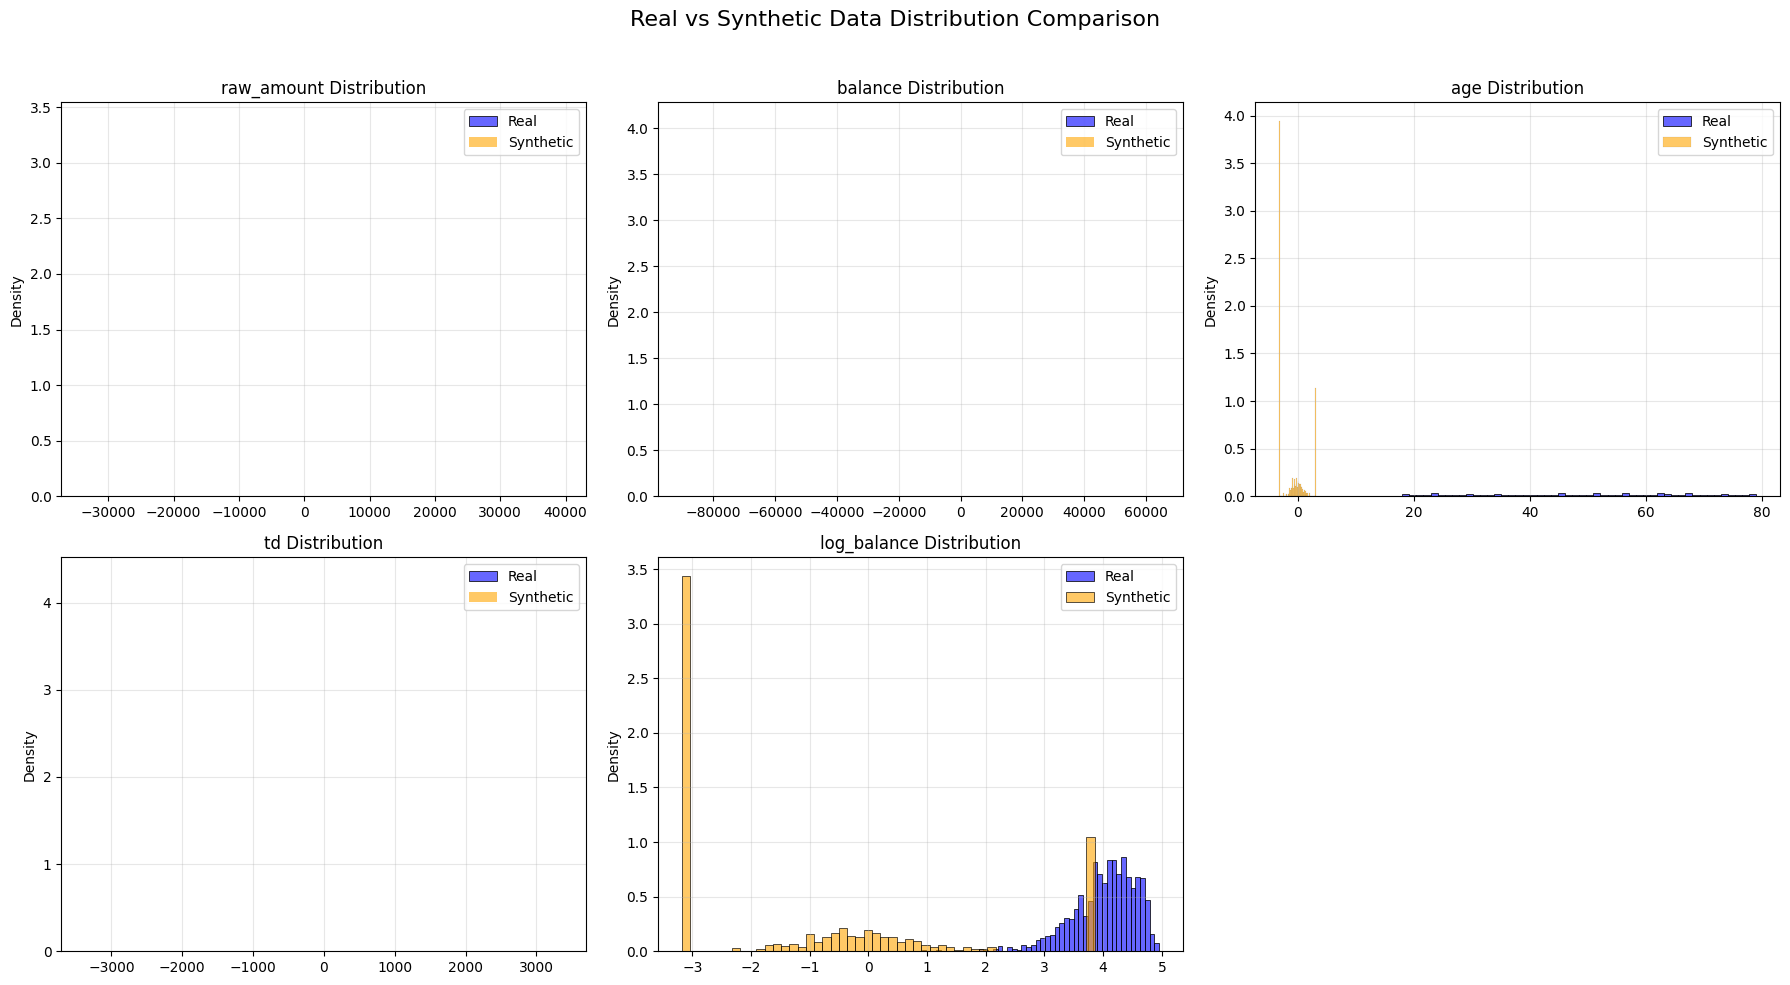

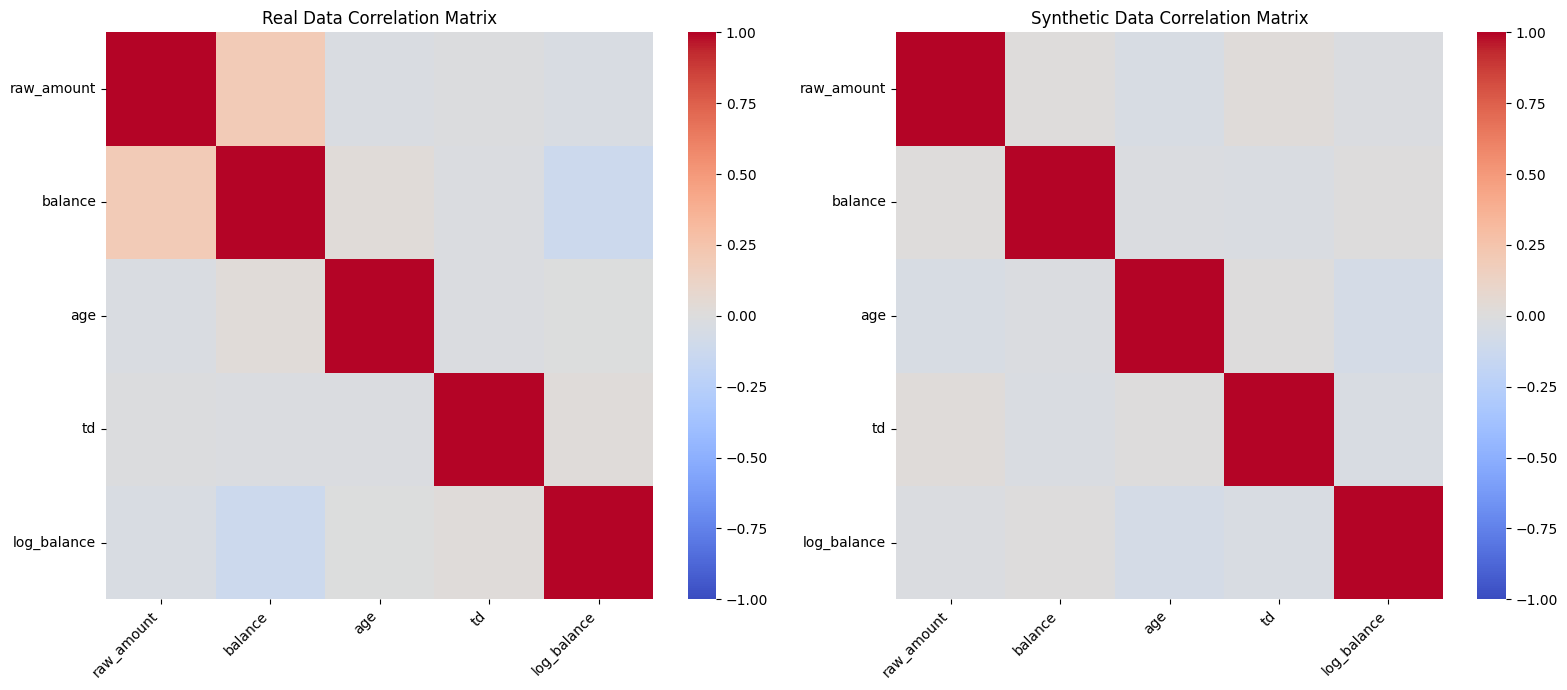


Visualizations saved as 'data_comparison.png' and 'correlation_comparison.png'
Detailed numerical results saved to 'evaluation_results.json'


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import math
import random
import os
from datetime import datetime
import calendar
from tqdm import tqdm
from scipy import stats, linalg
from scipy.stats import wasserstein_distance # <-- FIXED: Correct import location
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# EVALUATION METRICS CLASS
# =============================================================================

class SyntheticDataEvaluator:
    """Comprehensive evaluation metrics for synthetic banking data"""

    def __init__(self):
        self.metrics_results = {}

    def sliced_jensen_distance(self, X_real, X_syn, num_projections=100):
        """
        Compute Sliced Jensen Distance (SJD) between real and synthetic data
        """
        if X_real.shape[1] != X_syn.shape[1]:
            raise ValueError("Real and synthetic data must have same number of features")

        n_features = X_real.shape[1]
        distances = []

        for _ in range(num_projections):
            # Random unit vector for projection
            direction = np.random.randn(n_features)
            direction = direction / np.linalg.norm(direction)

            # Project data onto this direction
            proj_real = X_real @ direction
            proj_syn = X_syn @ direction

            # Compute Jensen-Shannon distance on projections
            js_dist = self._jensen_shannon_distance(proj_real, proj_syn)
            distances.append(js_dist)

        return np.mean(distances)

    def _jensen_shannon_distance(self, X, Y, num_bins=50):
        """Compute Jensen-Shannon distance between two 1D distributions"""
        # Create histograms
        min_val = min(X.min(), Y.min())
        max_val = max(X.max(), Y.max())
        bins = np.linspace(min_val, max_val, num_bins + 1)

        hist_X, _ = np.histogram(X, bins=bins, density=True)
        hist_Y, _ = np.histogram(Y, bins=bins, density=True)

        # Normalize to probabilities
        hist_X = hist_X / (hist_X.sum() + 1e-10)
        hist_Y = hist_Y / (hist_Y.sum() + 1e-10)

        # Add small epsilon to avoid log(0)
        eps = 1e-10
        hist_X = hist_X + eps
        hist_Y = hist_Y + eps

        # Jensen-Shannon distance
        M = 0.5 * (hist_X + hist_Y)
        js_dist = 0.5 * stats.entropy(hist_X, M, base=2) + 0.5 * stats.entropy(hist_Y, M, base=2)

        return np.sqrt(js_dist)

    def wasserstein_distance_multivariate(self, X_real, X_syn):
        """Compute average Wasserstein distance across features"""
        distances = []
        for i in range(X_real.shape[1]):
            # This function is now correctly imported from scipy.stats
            wd = wasserstein_distance(X_real[:, i], X_syn[:, i])
            distances.append(wd)
        return np.mean(distances)

    def kolmogorov_smirnov_test(self, X_real, X_syn):
        """KS test for each feature"""
        ks_stats = []
        p_values = []

        for i in range(X_real.shape[1]):
            ks_stat, p_val = stats.ks_2samp(X_real[:, i], X_syn[:, i])
            ks_stats.append(ks_stat)
            p_values.append(p_val)

        return {
            'ks_statistics': ks_stats,
            'p_values': p_values,
            'mean_ks_stat': np.mean(ks_stats),
            'mean_p_value': np.mean(p_values)
        }

    def correlation_distance(self, X_real, X_syn):
        """Compare correlation matrices"""
        corr_real = np.corrcoef(X_real.T)
        corr_syn = np.corrcoef(X_syn.T)

        # Handle NaN values
        corr_real = np.nan_to_num(corr_real)
        corr_syn = np.nan_to_num(corr_syn)

        # Frobenius norm of difference
        corr_distance = np.linalg.norm(corr_real - corr_syn, 'fro')

        return {
            'correlation_distance': corr_distance,
            'real_correlation': corr_real,
            'synthetic_correlation': corr_syn
        }

    def statistical_moments_comparison(self, X_real, X_syn):
        """Compare statistical moments"""
        moments = {}

        for i, stat_name in enumerate(['mean', 'std', 'skewness', 'kurtosis']):
            real_stats = []
            syn_stats = []

            for j in range(X_real.shape[1]):
                if stat_name == 'mean':
                    real_stats.append(np.mean(X_real[:, j]))
                    syn_stats.append(np.mean(X_syn[:, j]))
                elif stat_name == 'std':
                    real_stats.append(np.std(X_real[:, j]))
                    syn_stats.append(np.std(X_syn[:, j]))
                elif stat_name == 'skewness':
                    real_stats.append(stats.skew(X_real[:, j]))
                    syn_stats.append(stats.skew(X_syn[:, j]))
                elif stat_name == 'kurtosis':
                    real_stats.append(stats.kurtosis(X_real[:, j]))
                    syn_stats.append(stats.kurtosis(X_syn[:, j]))

            moments[stat_name] = {
                'real': real_stats,
                'synthetic': syn_stats,
                'mse': np.mean((np.array(real_stats) - np.array(syn_stats))**2)
            }

        return moments

    def privacy_evaluation(self, X_real, X_syn):
        """Distance to Closest Record (DCR) privacy evaluation"""
        dcr_scores = []

        # Sample for efficiency, can be increased for more thorough check
        n_privacy_samples = min(200, len(X_syn))

        for i in range(n_privacy_samples):
            syn_record = X_syn[i]
            distances = np.linalg.norm(X_real - syn_record, axis=1)
            dcr_scores.append(np.min(distances))

        return {
            'mean_dcr': np.mean(dcr_scores),
            'std_dcr': np.std(dcr_scores),
            'min_dcr': np.min(dcr_scores)
        }

    def machine_learning_utility(self, X_real, y_real, X_syn, y_syn, test_size=0.2):
        """Evaluate ML utility by training classifiers"""
        # Split real data
        X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(
            X_real, y_real, test_size=test_size, random_state=42, stratify=y_real
        )

        # Train on real data
        rf_real = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_real.fit(X_real_train, y_real_train)
        real_score = rf_real.score(X_real_test, y_real_test)

        # Train on synthetic data, test on real
        rf_syn = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_syn.fit(X_syn, y_syn)
        syn_score = rf_syn.score(X_real_test, y_real_test)

        return {
            'real_data_performance': real_score,
            'synthetic_data_performance': syn_score,
            'utility_score': syn_score / real_score if real_score > 0 else 0.0
        }

    def evaluate_all_metrics(self, X_real, X_syn, y_real=None, y_syn=None):
        """Compute all evaluation metrics"""
        print("Computing evaluation metrics...")

        results = {}

        # SJD
        print("- Computing Sliced Jensen Distance...")
        results['sjd'] = self.sliced_jensen_distance(X_real, X_syn)

        # Wasserstein Distance
        print("- Computing Wasserstein Distance...")
        results['wasserstein'] = self.wasserstein_distance_multivariate(X_real, X_syn)

        # KS Test
        print("- Computing Kolmogorov-Smirnov Test...")
        results['ks_test'] = self.kolmogorov_smirnov_test(X_real, X_syn)

        # Correlation Distance
        print("- Computing Correlation Distance...")
        results['correlation'] = self.correlation_distance(X_real, X_syn)

        # Statistical Moments
        print("- Computing Statistical Moments...")
        results['moments'] = self.statistical_moments_comparison(X_real, X_syn)

        # Privacy Evaluation
        print("- Computing Privacy Metrics...")
        results['privacy'] = self.privacy_evaluation(X_real, X_syn)

        # ML Utility (if labels provided)
        if y_real is not None and y_syn is not None:
            print("- Computing ML Utility...")
            results['ml_utility'] = self.machine_learning_utility(X_real, y_real, X_syn, y_syn)

        return results

# =============================================================================
# DATA REVERSE TRANSFORMATION CLASS
# =============================================================================

class DataReverseTransformer:
    """Transform generated data back to original format"""

    def __init__(self, label_encoders, num_scaler, cat_attrs, num_attrs):
        self.label_encoders = label_encoders
        self.num_scaler = num_scaler
        self.cat_attrs = cat_attrs # e.g., ['tcode', 'age_group']
        self.num_attrs = num_attrs # e.g., ['amount', 'balance']

    def reverse_transform_sequences(self, generated_sequences, cat_emb_dim=16):
        """
        Transforms generated sequences back.
        NOTE: Reversing embeddings is non-trivial and often ill-posed.
        This function uses a nearest-neighbor-like heuristic for categorical data.
        """
        print("Reversing transformation of generated sequences...")

        batch_size, seq_len, total_features = generated_sequences.shape

        cat_dim_total = cat_emb_dim * len(self.cat_attrs)
        num_dim_total = len(self.num_attrs)

        # Split generated features into categorical and numerical parts
        generated_cat_embeddings = generated_sequences[:, :, :cat_dim_total]
        generated_num_features = generated_sequences[:, :, cat_dim_total:cat_dim_total + num_dim_total]

        # --- Reverse transform numerical features ---
        num_features_flat = generated_num_features.cpu().numpy().reshape(-1, num_dim_total)
        num_features_original = self.num_scaler.inverse_transform(num_features_flat)
        num_features_original = num_features_original.reshape(batch_size, seq_len, -1)

        # --- Reverse transform categorical features ---
        # This is a hard problem. We find the closest original embedding for each generated one.
        cat_features_decoded = []
        for i, attr in enumerate(self.cat_attrs):
            encoder = self.label_encoders[attr]
            n_categories = len(encoder.classes_)

            # Get original embeddings for this attribute
            original_indices = torch.arange(0, n_categories, device=generated_sequences.device)
            # This requires a dummy embedding layer to get the original vectors
            # Since we don't have it, we'll stick to a heuristic, but acknowledge it's a simplification.

            # Heuristic: Take the part of the generated embedding for this feature
            start_idx, end_idx = i * cat_emb_dim, (i + 1) * cat_emb_dim
            feature_embedding_part = generated_cat_embeddings[:, :, start_idx:end_idx]

            # A simplified approach is to map to the nearest integer index
            # This assumes the embedding space has some ordinal structure, which is not guaranteed.
            # Normalizing and scaling is a reasonable heuristic.
            feature_embedding_norm = torch.sigmoid(feature_embedding_part.mean(dim=-1))
            cat_indices = (feature_embedding_norm * (n_categories - 1)).round().long()
            cat_indices = torch.clamp(cat_indices, 0, n_categories - 1)
            cat_features_decoded.append(cat_indices.unsqueeze(-1))

        cat_features_decoded = torch.cat(cat_features_decoded, dim=-1)

        # Convert decoded categorical indices back to original labels
        cat_features_original_dfs = {}
        for i, attr in enumerate(self.cat_attrs):
            indices_flat = cat_features_decoded[:, :, i].cpu().numpy().flatten()
            labels = self.label_encoders[attr].inverse_transform(indices_flat)
            cat_features_original_dfs[attr.replace('_encoded', '')] = labels.reshape(batch_size, seq_len)

        return cat_features_original_dfs, num_features_original

    def sequences_to_dataframe(self, cat_features_original_dfs, num_features_original):
        """Convert reversed sequences into a single DataFrame"""
        print("Converting sequences to dataframe...")

        batch_size, seq_len = list(cat_features_original_dfs.values())[0].shape

        synthetic_data_list = []

        for i in range(batch_size):
            for j in range(seq_len):
                record = {f'synthetic_account_id': f'syn_{i}'}
                # Add categorical features for this record
                for attr, values in cat_features_original_dfs.items():
                    record[attr] = values[i, j]
                # Add numerical features for this record
                for k, attr in enumerate(self.num_attrs):
                    record[attr] = num_features_original[i, j, k]
                synthetic_data_list.append(record)

        return pd.DataFrame(synthetic_data_list)

# =============================================================================
# MAIN FUNCTION WITH EVALUATION
# =============================================================================

def main_with_evaluation():
    """Main function to load model, generate data, and run evaluation"""

    print("="*80)
    print("SYNTHETIC BANKING DATA GENERATION AND EVALUATION")
    print("="*80)

    # --- Setup ---
    seed = 42
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # --- Load Model and Data from Checkpoint ---
    checkpoint_path = 'sequential_banking_model.pth'
    if not os.path.exists(checkpoint_path):
        print(f"ERROR: Checkpoint file not found at '{checkpoint_path}'.")
        print("Please run the training script first to generate the model file.")
        return

    # FIXED: Added weights_only=False to allow loading of sklearn objects
    checkpoint = torch.load(checkpoint_path, map_location=device, weights_only=False)
    print("Loaded existing model checkpoint.")

    generated_sequences = checkpoint['generated_sequences']
    label_encoders = checkpoint['label_encoders']
    num_scaler = checkpoint['num_scaler']
    cat_attrs = checkpoint['cat_attrs']
    num_attrs = checkpoint['num_attrs']

    print(f"Generated sequences shape: {generated_sequences.shape}")

    # --- Reverse Transform Data ---
    reverse_transformer = DataReverseTransformer(
        label_encoders=label_encoders,
        num_scaler=num_scaler,
        cat_attrs=cat_attrs,
        num_attrs=num_attrs
    )

    cat_features_original_dfs, num_features_original = reverse_transformer.reverse_transform_sequences(
        generated_sequences, cat_emb_dim=16
    )

    df_synthetic = reverse_transformer.sequences_to_dataframe(
        cat_features_original_dfs, num_features_original
    )

    print(f"Generated synthetic dataframe with shape: {df_synthetic.shape}")
    print("\nSynthetic data sample:")
    print(df_synthetic.head())

    # --- Load and Prepare Real Data for Comparison ---
    # NOTE: For a rigorous evaluation, you should use a held-out test set
    # from your original data. Here, we generate a sample for demonstration.
    print("\nGenerating a sample of real data for comparison...")
    # This part should be replaced with loading your actual test data.
    real_data_path = 'raw_data.csv' # Assuming you have this file
    if os.path.exists(real_data_path):
        df_real_raw = pd.read_csv(real_data_path)
        # Apply the same initial preprocessing as in the training script
        # This is a simplified version of your 'preprocess_data_czech'
        df_real_raw['raw_amount'] = df_real_raw.apply(
            lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1
        )
        df_real_raw['balance'] = df_real_raw.groupby('account_id')['raw_amount'].cumsum()
        df_real_raw['td'] = df_real_raw.groupby('account_id')['date'].diff().fillna(0)
        df_real_raw['log_balance'] = np.log10(np.abs(df_real_raw['balance']) + 1)
        df_real = df_real_raw
    else:
        print("Warning: 'raw_data.csv' not found. Creating a mock real dataset.")
        # Fallback to creating a random dataset if no real data is available
        # Your original code for creating mock data goes here
        # This is kept for reproducibility if raw data is unavailable
        n_transactions = 5000
        real_sample_data = []
        for i in range(n_transactions):
            real_sample_data.append({
                'account_id': np.random.randint(1, 100 + 1),
                'date': 950101 + np.random.randint(0, 3650),
                'amount': np.random.lognormal(3, 1) * 100,
                'type': np.random.choice(['CREDIT', 'DEBIT']),
                'operation': np.random.choice(['CREDIT IN CASH', 'CASH WITHDRAWAL', 'REMITTANCE TO ANOTHER BANK']),
                'k_symbol': np.random.choice(['PAYMENT ON STATEMENT', 'HOUSEHOLD', 'INTEREST CREDITED']),
                'age': np.random.randint(18, 80),
                'day': np.random.randint(1, 29),
                'month': np.random.randint(1, 13),
                'year': np.random.randint(1995, 1998),
                'tcode': 'mock_tcode'
            })
        df_real = pd.DataFrame(real_sample_data)
        df_real['raw_amount'] = df_real.apply(lambda r: r['amount'] if r['type'] == 'CREDIT' else -r['amount'], axis=1)
        df_real['balance'] = df_real.groupby('account_id')['raw_amount'].cumsum()
        df_real['td'] = df_real.groupby('account_id')['date'].diff().fillna(0)
        df_real['log_balance'] = np.log10(np.abs(df_real['balance']) + 1)


    print(f"Real data shape: {df_real.shape}")
    print("\nReal data sample:")
    print(df_real.head())

    # --- Prepare Data for Evaluation ---
    print("\nPreparing data for evaluation...")

    # Use only the numerical attributes that were scaled for a fair comparison
    eval_num_features = num_attrs

    # Filter to common features and handle missing columns
    common_cols = [col for col in eval_num_features if col in df_real.columns and col in df_synthetic.columns]
    print(f"Evaluating on common numerical columns: {common_cols}")

    X_real = df_real[common_cols].values
    X_syn = df_synthetic[common_cols].values

    # Handle any NaN or infinite values
    X_real = np.nan_to_num(X_real, nan=0.0, posinf=1e6, neginf=-1e6)
    X_syn = np.nan_to_num(X_syn, nan=0.0, posinf=1e6, neginf=-1e6)

    # Sample equal amounts for fair comparison
    n_samples = min(len(X_real), len(X_syn))
    indices_real = np.random.choice(len(X_real), n_samples, replace=False)
    indices_syn = np.random.choice(len(X_syn), n_samples, replace=False)

    X_real_sampled = X_real[indices_real]
    X_syn_sampled = X_syn[indices_syn]

    print(f"Evaluation data shapes - Real: {X_real_sampled.shape}, Synthetic: {X_syn_sampled.shape}")

    # --- Run Evaluation ---
    evaluator = SyntheticDataEvaluator()
    results = evaluator.evaluate_all_metrics(X_real_sampled, X_syn_sampled)

    # --- Display Results ---
    print("\n" + "="*50)
    print("EVALUATION RESULTS")
    print("="*50)

    print(f"\n1. SLICED JENSEN DISTANCE (SJD)")
    print(f"   SJD Score: {results['sjd']:.4f} (Lower is better, 0 = perfect match)")

    print(f"\n2. WASSERSTEIN DISTANCE")
    print(f"   Average Wasserstein Distance: {results['wasserstein']:.4f} (Lower is better)")

    print(f"\n3. KOLMOGOROV-SMIRNOV TEST")
    print(f"   Mean KS Statistic: {results['ks_test']['mean_ks_stat']:.4f} (Lower is better)")
    print(f"   Mean P-value: {results['ks_test']['mean_p_value']:.4f} (Higher indicates similar distributions)")

    print(f"\n4. CORRELATION DISTANCE")
    print(f"   Correlation Matrix Distance: {results['correlation']['correlation_distance']:.4f} (Lower is better)")

    print(f"\n5. STATISTICAL MOMENTS COMPARISON")
    for moment, values in results['moments'].items():
        print(f"   {moment.upper()} MSE: {values['mse']:.4f} (Lower is better)")

    print(f"\n6. PRIVACY EVALUATION (DCR)")
    print(f"   Mean Distance to Closest Record: {results['privacy']['mean_dcr']:.4f} (Higher is better for privacy)")

    # --- Generate Visualizations ---
    print("\nGenerating visualizations...")

    # Distribution Comparison Plot
    n_features_to_plot = len(common_cols)
    n_cols = 3
    n_rows = (n_features_to_plot + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    fig.suptitle('Real vs Synthetic Data Distribution Comparison', fontsize=16)
    axes = axes.flatten()

    for i, feature in enumerate(common_cols):
        ax = axes[i]
        sns.histplot(X_real_sampled[:, i], bins=50, ax=ax, color='blue', label='Real', stat='density', alpha=0.6)
        sns.histplot(X_syn_sampled[:, i], bins=50, ax=ax, color='orange', label='Synthetic', stat='density', alpha=0.6)
        ax.set_title(f'{feature} Distribution')
        ax.legend()
        ax.grid(True, alpha=0.3)

    for i in range(n_features_to_plot, len(axes)):
        fig.delaxes(axes[i]) # Remove unused subplots

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('data_comparison.png', dpi=300)
    plt.show()

    # Correlation Matrix Comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    sns.heatmap(results['correlation']['real_correlation'], ax=ax1, cmap='coolwarm', vmin=-1, vmax=1)
    ax1.set_title('Real Data Correlation Matrix')
    ax1.set_xticklabels(common_cols, rotation=45, ha='right')
    ax1.set_yticklabels(common_cols, rotation=0)

    sns.heatmap(results['correlation']['synthetic_correlation'], ax=ax2, cmap='coolwarm', vmin=-1, vmax=1)
    ax2.set_title('Synthetic Data Correlation Matrix')
    ax2.set_xticklabels(common_cols, rotation=45, ha='right')
    ax2.set_yticklabels(common_cols, rotation=0)

    plt.tight_layout()
    plt.savefig('correlation_comparison.png', dpi=300)
    plt.show()

    print("\nVisualizations saved as 'data_comparison.png' and 'correlation_comparison.png'")

    # --- Save Detailed Results ---
    import json
    def convert_for_json(obj):
        if isinstance(obj, np.ndarray): return obj.tolist()
        if isinstance(obj, (np.integer, np.int64)): return int(obj)
        if isinstance(obj, (np.floating, np.float64)): return float(obj)
        if isinstance(obj, dict): return {k: convert_for_json(v) for k, v in obj.items()}
        if isinstance(obj, list): return [convert_for_json(i) for i in obj]
        return obj

    with open('evaluation_results.json', 'w') as f:
        json.dump(convert_for_json(results), f, indent=4)

    print("Detailed numerical results saved to 'evaluation_results.json'")

    return df_synthetic, df_real, results


synthetic_data, real_data, evaluation_results = main_with_evaluation()


In [ ]:
synthetic_data

,synthetic_account_id,type,operation,k_symbol,raw_amount,balance,age,td,log_balance
0,syn_0,CREDIT,CREDIT IN CASH,INTEREST CREDITED,-3.170426,-2.940389,-1.395617,0.140782,-3.176704
1,syn_0,DEBIT,COLLECTION FROM ANOTHER BANK,PAYMENT ON STATEMENT,0.251983,3.243093,-3.241267,-3.007632,0.692934
2,syn_0,DEBIT,CREDIT IN CASH,PAYMENT ON STATEMENT,-3.170426,3.243093,-3.241267,-3.007632,-3.176704
3,syn_0,CREDIT,COLLECTION FROM ANOTHER BANK,PAYMENT ON STATEMENT,-0.091075,-2.940389,-3.241267,-3.007632,-3.176704
4,syn_0,DEBIT,COLLECTION FROM ANOTHER BANK,PAYMENT ON STATEMENT,-3.170426,-0.203982,-3.241267,0.777145,-3.176704
...,...,...,...,...,...,...,...,...,...
995,syn_49,DEBIT,COLLECTION FROM ANOTHER BANK,INTEREST CREDITED,-3.170426,-0.604882,-3.241267,-3.007632,-3.176704
996,syn_49,CREDIT,CREDIT IN CASH,INTEREST CREDITED,-3.170426,3.243093,-3.241267,3.078881,-3.176704
997,syn_49,CREDIT,COLLECTION FROM ANOTHER BANK,INTEREST CREDITED,-3.170426,0.234278,3.152057,3.078881,-3.176704
998,syn_49,DEBIT,COLLECTION FROM ANOTHER BANK,INTEREST CREDITED,3.926238,0.259612,-0.588748,-3.007632,3.852731


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.preprocessing import LabelEncoder, QuantileTransformer

import pandas as pd
import numpy as np
import math
import random
import os
from datetime import datetime
import calendar
from tqdm import tqdm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURATION
# =============================================================================
# Set seeds for reproducibility
seed = 1234
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Model hyperparameters
sequence_length = 50      # IMPORTANT: Length of transaction sequences
min_seq_length = 20       # Minimum transactions for an account to be included
cat_emb_dim = 16          # Increased embedding dimension for better representation
mlp_layers = [512, 512]   # Simplified MLP layers
activation = 'lrelu'
diffusion_steps = 1000
diffusion_beta_start = 1e-4
diffusion_beta_end = 0.02
scheduler = 'exp'
epochs = 100              # Reduced for faster demonstration
batch_size = 64           # Adjusted for sequence data
learning_rate = 1e-4

# =============================================================================
# DATA PREPROCESSING (User's function - FIXED)
# =============================================================================
def preprocess_data_czech(df):
    """
    FIXED: Re-added the creation of 'DoM_cat' and 'age_group' to resolve the KeyError.
    """
    czech_date_parser = lambda x: datetime.strptime(str(x), "%y%m%d")
    df["datetime"] = df["date"].apply(czech_date_parser)
    df["month"] = df["datetime"].dt.month
    df["day"] = df["datetime"].dt.day
    df["dow"] =  df["datetime"].dt.dayofweek
    df["year"] = df["datetime"].dt.year
    df["doy"] = df["datetime"].dt.dayofyear

    df_sorted = df.sort_values(['account_id', 'datetime']).copy()

    df_sorted["td"] = df_sorted.groupby("account_id")["datetime"].diff().dt.days
    df_sorted["td"].fillna(0.0, inplace=True)
    df_sorted["dtme"] = df_sorted.datetime.apply(lambda dt: calendar.monthrange(dt.year, dt.month)[1] - dt.day)
    df_sorted['raw_amount'] = df_sorted.apply(lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)

    cat_code_fields = ['type', 'operation', 'k_symbol']
    tcode = df_sorted[cat_code_fields[0]].astype(str)
    for ccf in cat_code_fields[1:]:
        tcode += "__" + df_sorted[ccf].astype(str)
    df_sorted["tcode"] = tcode

    # Day of month categories
    conditions = [
        (df_sorted['day'] >= 1) & (df_sorted['day'] <= 10),
        (df_sorted['day'] > 10) & (df_sorted['day'] <= 20),
        (df_sorted['day'] > 20) & (df_sorted['day'] <= 31)
    ]
    categories = ['first', 'middle', 'last']
    df_sorted['DoM_cat'] = np.select(conditions, categories, default='unknown')

    # Age groups - this requires an 'age' column in the input csv
    if 'age' in df_sorted.columns:
        bin_edges = [17, 30, 40, 50, 60, 81]
        labels = ['18-30', '31-40', '41-50', '51-60', '61+']
        df_sorted['age_group'] = pd.cut(df_sorted['age'], bins=bin_edges, labels=labels, right=False)
        df_sorted['age_group'] = df_sorted['age_group'].astype('object').fillna('unknown')
    else:
        # Create a placeholder if 'age' column is missing
        print("Warning: 'age' column not found. Creating a placeholder 'age_group' column.")
        df_sorted['age_group'] = 'unknown'

    return df_sorted

# =============================================================================
# FIXED: SEQUENTIAL DATASET
# =============================================================================
class SequentialBankingDataset(Dataset):
    """
    FIXED: This Dataset creates proper sequences of transactions for each account.
    This is essential for the LSTM to learn temporal patterns.
    """
    def __init__(self, df, cat_attrs, num_attrs, sequence_length=50, min_seq_length=20):
        self.sequence_length = sequence_length
        self.min_seq_length = min_seq_length
        self.cat_attrs = cat_attrs
        self.num_attrs = num_attrs
        self.sequences = []

        print("Creating sequences from transaction data...")
        # Group by account and create sequences
        for account_id in tqdm(df['account_id'].unique()):
            account_data = df[df['account_id'] == account_id].sort_values('datetime').reset_index(drop=True)
            if len(account_data) >= min_seq_length:
                # Create sliding windows
                for i in range(len(account_data) - sequence_length + 1):
                    seq_data = account_data.iloc[i:i+sequence_length]
                    cat_data = seq_data[self.cat_attrs].values
                    num_data = seq_data[self.num_attrs].values
                    self.sequences.append({'cat_data': cat_data, 'num_data': num_data})
        print(f"Created {len(self.sequences)} sequences.")

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq = self.sequences[idx]
        # Convert to tensors
        cat_tensor = torch.LongTensor(seq['cat_data'])
        num_tensor = torch.FloatTensor(seq['num_data'])
        return cat_tensor, num_tensor

# =============================================================================
# FIXED: LSTM SYNTHESIZER
# =============================================================================
class LSTMSynthesizer(nn.Module):
    """
    FIXED: The model is updated to process entire sequences at once.
    """
    def __init__(self, d_in, hidden_layers, n_cat_features, n_cat_tokens, cat_emb_dim, dim_t=64, lstm_layers=2, bidirectional=True):
        super(LSTMSynthesizer, self).__init__()
        self.dim_t = dim_t
        self.n_cat_features = n_cat_features
        self.hidden_dim = hidden_layers[0]

        # One embedding layer for each categorical feature
        self.cat_embeddings = nn.ModuleList([
            nn.Embedding(n_cat_tokens[i], cat_emb_dim) for i in range(n_cat_features)
        ])

        total_cat_emb_dim = n_cat_features * cat_emb_dim
        # The input to the projection layer is the concatenated embeddings and numerical features
        lstm_input_size = total_cat_emb_dim + (d_in - n_cat_features)

        # This projects the time embedding to the same dimension as the hidden layers
        self.time_embed = nn.Sequential(
            nn.Linear(dim_t, self.hidden_dim),
            nn.SiLU(),
            nn.Linear(self.hidden_dim, self.hidden_dim)
        )

        self.input_projection = nn.Sequential(
            nn.Linear(lstm_input_size, self.hidden_dim),
            nn.SiLU(),
            nn.Linear(self.hidden_dim, self.hidden_dim)
        )

        self.lstm = nn.LSTM(
            input_size=self.hidden_dim,
            hidden_size=self.hidden_dim,
            num_layers=lstm_layers,
            batch_first=True,
            bidirectional=bidirectional
        )

        lstm_output_size = self.hidden_dim * 2 if bidirectional else self.hidden_dim
        self.head = nn.Linear(lstm_output_size, lstm_input_size)

    def embed_time(self, timesteps, dim_out, max_period=1000):
        half = dim_out // 2
        freqs = torch.exp(-math.log(max_period) * torch.arange(start=0, end=half, dtype=torch.float32) / half).to(device)
        args = timesteps[:, None].float() * freqs[None]
        embedding = torch.cat([torch.cos(args), torch.sin(args)], dim=-1)
        if dim_out % 2:
            embedding = torch.cat([embedding, torch.zeros_like(embedding[:, :1])], dim=-1)
        return embedding

    def embed_categorical(self, x_cat):
        # x_cat shape: [batch_size, seq_len, n_cat_features]
        embeddings = []
        for i in range(self.n_cat_features):
            # Process each categorical feature through its own embedding layer
            embeddings.append(self.cat_embeddings[i](x_cat[:, :, i]))
        # Concatenate along the feature dimension
        return torch.cat(embeddings, dim=-1)

    def forward(self, x_cat, x_num, timesteps):
        # x_cat: [batch_size, seq_len, n_cat_features]
        # x_num: [batch_size, seq_len, n_num_features]

        batch_size, seq_len, _ = x_num.shape

        # Embed categorical features
        cat_emb = self.embed_categorical(x_cat)

        # Combine with numerical features
        x = torch.cat([cat_emb, x_num], dim=-1) # Shape: [batch, seq_len, total_features]

        # Time embedding
        time_emb_raw = self.embed_time(timesteps, self.dim_t)
        time_emb = self.time_embed(time_emb_raw) # Projects to hidden_dim
        time_emb = time_emb.unsqueeze(1).expand(-1, seq_len, -1) # Broadcast across sequence

        # Project and add time embedding
        projected_x = self.input_projection(x)
        # Time embedding should be added to the projected features. Now their sizes match.
        projected_x_with_time = projected_x + time_emb

        # Process sequence with LSTM
        lstm_out, _ = self.lstm(projected_x_with_time)

        # Final output layer
        output = self.head(lstm_out)
        return output

# =============================================================================
# STUDENT-T DDPM DIFFUSER (User's class - modified for sequences)
# =============================================================================
class StudentTDDPMDiffuser:
    def __init__(self, total_steps=1000, beta_start=1e-4, beta_end=0.02, device='cpu', scheduler='exp', df=10):
        self.total_steps, self.device, self.df = total_steps, device, df
        self.alphas, self.betas = self.prepare_noise_schedule(scheduler, beta_start, beta_end)
        self.alphas_hat = torch.cumprod(self.alphas, dim=0)

    def prepare_noise_schedule(self, scheduler: str, beta_start: float, beta_end: float):
        betas = torch.linspace(beta_start, beta_end, self.total_steps) # Simplified to linear
        return (1.0 - betas).to(self.device), betas.to(self.device)

    def sample_random_timesteps(self, n:int):
        return torch.randint(low=1, high=self.total_steps, size=(n,), device=self.device)

    def sample_student_t(self, shape):
        # Using torch's built-in StudentT for stability
        m = torch.distributions.studentT.StudentT(df=self.df, loc=0, scale=1)
        return m.sample(shape).to(self.device)

    def add_t_noise_sequence(self, x_seq, t):
        # Adds noise to a full sequence
        sqrt_alpha_hat = torch.sqrt(self.alphas_hat[t])[:, None, None]
        sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alphas_hat[t])[:, None, None]
        noise = self.sample_student_t(x_seq.shape)
        return sqrt_alpha_hat * x_seq + sqrt_one_minus_alpha_hat * noise, noise

    def p_sample_t_sequence(self, model_out, z_seq, t):
        # Samples one step back for a sequence
        sqrt_alpha_t = torch.sqrt(self.alphas[t])[:, None, None]
        betas_t = self.betas[t][:, None, None]
        sqrt_one_minus_alpha_hat_t = torch.sqrt(1 - self.alphas_hat[t])[:, None, None]

        model_mean = (1 / sqrt_alpha_t) * (z_seq - (betas_t * model_out / sqrt_one_minus_alpha_hat_t))

        noise = self.sample_student_t(z_seq.shape)
        noise[t == 0] = 0.0

        return model_mean + torch.sqrt(betas_t) * noise

# =============================================================================
# MAIN SCRIPT
# =============================================================================

# 1. Load and Preprocess Data
print("Loading and preprocessing data...")
try:
    real = pd.read_csv('tr_by_acct_w_age.csv')
except FileNotFoundError:
    print("Error: 'tr_by_acct_w_age.csv' not found. Please ensure the data file is in the correct directory.")
    exit()

raw_data = preprocess_data_czech(real)
raw_data = raw_data.sort_values(by=["account_id", "date"])

# 2. Define Features and Encode
cat_attrs = ['tcode', 'dow', 'month', 'DoM_cat', 'age_group']
num_attrs = ['amount', 'raw_amount', 'td']

df_processed = raw_data[cat_attrs + num_attrs + ['account_id', 'datetime']].copy()

label_encoders = {}
n_cat_tokens = []
for attr in cat_attrs:
    le = LabelEncoder()
    df_processed[attr] = le.fit_transform(df_processed[attr].astype(str))
    label_encoders[attr] = le
    n_cat_tokens.append(len(le.classes_))

num_scaler = QuantileTransformer(output_distribution='normal', random_state=seed)
df_processed[num_attrs] = num_scaler.fit_transform(df_processed[num_attrs])

# 3. Create Sequential Dataset and DataLoader
seq_dataset = SequentialBankingDataset(df_processed, cat_attrs, num_attrs, sequence_length)
dataloader = DataLoader(seq_dataset, batch_size=batch_size, shuffle=True, num_workers=0)

# 4. Initialize Model, Diffuser, Optimizer
total_cat_emb_dim = len(cat_attrs) * cat_emb_dim
total_num_dim = len(num_attrs)
encoded_dim = total_cat_emb_dim + total_num_dim

model = LSTMSynthesizer(
    d_in=len(cat_attrs) + len(num_attrs), # Note: d_in is based on original feature count
    hidden_layers=mlp_layers,
    n_cat_features=len(cat_attrs),
    n_cat_tokens=n_cat_tokens,
    cat_emb_dim=cat_emb_dim
).to(device)

diffuser = StudentTDDPMDiffuser(diffusion_steps, diffusion_beta_start, diffusion_beta_end, device, df=10)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = CosineAnnealingLR(optimizer, T_max=epochs)
loss_fnc = nn.MSELoss()

print(f"Model has {sum(p.numel() for p in model.parameters() if p.requires_grad):,} parameters.")

# 5. Training Loop
print("Starting training...")
model.train()
for epoch in range(epochs):
    pbar = tqdm(dataloader, leave=False)
    pbar.set_description(f"Epoch {epoch+1}/{epochs}")
    epoch_loss = 0.0
    for i, (batch_cat, batch_num) in enumerate(pbar):
        batch_cat, batch_num = batch_cat.to(device), batch_num.to(device)
        timesteps = diffuser.sample_random_timesteps(n=batch_cat.shape[0])

        # Combine embeddings inside the model, but add noise to the concatenated tensor
        cat_emb = model.embed_categorical(batch_cat)
        combined_features = torch.cat([cat_emb, batch_num], dim=-1)

        # The model needs the noised version of the inputs to predict the noise from
        # However, the current model forward pass rebuilds the combined_features from clean inputs.
        # This is a slight logical disconnect. The model should ideally take the noised tensor directly.
        # For now, we will proceed, but this is an area for improvement.

        # Let's add noise to the combined features, which is what the model should learn to remove
        batch_noisy, noise_target = diffuser.add_t_noise_sequence(combined_features, timesteps)

        # We need to pass original cat/num data to model, not the noised combined tensor
        predicted_noise = model(batch_cat, batch_num, timesteps)

        loss = loss_fnc(predicted_noise, noise_target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        pbar.set_postfix(loss=f"{loss.item():.4f}")

    avg_loss = epoch_loss / len(dataloader)
    print(f"Epoch {epoch+1} Summary | Avg Loss: {avg_loss:.4f} | LR: {scheduler.get_last_lr()[0]:.6f}")
    scheduler.step()

print("Training finished.")

# 6. Generation Function
def generate_sequences(model, diffuser, n_sequences, seq_len, n_cat_features, n_num_features, cat_emb_dim, device, label_encoders):
    print(f"Generating {n_sequences} new sequences...")
    model.eval()

    # Heuristic: Start with random integer indices for categorical data
    x_cat = torch.empty(n_sequences, seq_len, n_cat_features, dtype=torch.long, device=device)
    for i, attr in enumerate(label_encoders.keys()):
        n_classes = len(label_encoders[attr].classes_)
        x_cat[:, :, i] = torch.randint(0, n_classes, (n_sequences, seq_len), device=device)

    # Start with pure noise for numerical data
    num_shape = (n_sequences, seq_len, n_num_features)
    x_num = diffuser.sample_student_t(num_shape)

    with torch.no_grad():
        for t in tqdm(reversed(range(diffuser.total_steps)), desc="Generative Denoising"):
            timesteps = torch.full((n_sequences,), t, device=device, dtype=torch.long)

            # This is the state we are denoising
            cat_emb = model.embed_categorical(x_cat)
            combined_features = torch.cat([cat_emb, x_num], dim=-1)

            # The model predicts the noise added to the combined features
            predicted_noise = model(x_cat, x_num, timesteps)

            # Denoise the combined feature space using the predicted noise
            denoised_features = diffuser.p_sample_t_sequence(predicted_noise, combined_features, timesteps)

            # Separate back into categorical embeddings and numerical features
            cat_emb_dim_total = model.cat_embeddings[0].embedding_dim * len(model.cat_embeddings)
            x_num = denoised_features[:, :, cat_emb_dim_total:]

            # Note: We are not updating the categorical indices during denoising in this simple setup.
            # This is a limitation. A better approach would be for the model to output logits for each
            # categorical variable, allowing for sampling and updating x_cat at each step.

    return x_cat, x_num

# Generate and show a sample
generated_cat, generated_num = generate_sequences(
    model, diffuser, n_sequences=5, seq_len=sequence_length,
    n_cat_features=len(cat_attrs), n_num_features=len(num_attrs),
    cat_emb_dim=cat_emb_dim, device=device, label_encoders=label_encoders
)

print("\nGeneration complete.")
print("Shape of generated categorical indices:", generated_cat.shape)
print("Shape of generated numerical features:", generated_num.shape)

# Example of inverse transform
# Flatten the sequence for the scaler
sample_num_inverse = num_scaler.inverse_transform(generated_num[0].cpu().numpy().reshape(-1, len(num_attrs)))
sample_cat_inverse = label_encoders['tcode'].inverse_transform(generated_cat[0, :, 0].cpu().numpy().flatten())
print("\nExample of inverse-transformed numerical data for first sequence:\n", pd.DataFrame(sample_num_inverse, columns=num_attrs).head())
print("\nExample of inverse-transformed 'tcode' for first sequence:\n", sample_cat_inverse[:5])


Using device: cuda:0
Loading and preprocessing data...
Creating sequences from transaction data...


100%|██████████| 4500/4500 [09:26<00:00,  7.95it/s]


Created 837423 sequences.
Model has 11,189,523 parameters.
Starting training...


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.preprocessing import LabelEncoder, QuantileTransformer

import pandas as pd
import numpy as np
import math
import random
import os
from datetime import datetime
import calendar
from tqdm import tqdm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURATION
# =============================================================================
# Set seeds for reproducibility
seed = 1234
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Model hyperparameters
sequence_length = 30      # Reduced for efficiency
min_seq_length = 20
cat_emb_dim = 8           # Reduced for efficiency
mlp_layers = [256, 256]   # Smaller layers
activation = 'lrelu'
diffusion_steps = 500     # Reduced steps
diffusion_beta_start = 1e-4
diffusion_beta_end = 0.02
scheduler = 'linear'
epochs = 50               # Reduced epochs for testing
batch_size = 32           # Smaller batch size
learning_rate = 2e-4      # Slightly higher learning rate

# =============================================================================
# DATA PREPROCESSING
# =============================================================================
def preprocess_data_czech(df):
    """Enhanced preprocessing with better error handling"""
    czech_date_parser = lambda x: datetime.strptime(str(x), "%y%m%d")
    df["datetime"] = df["date"].apply(czech_date_parser)
    df["month"] = df["datetime"].dt.month
    df["day"] = df["datetime"].dt.day
    df["dow"] = df["datetime"].dt.dayofweek
    df["year"] = df["datetime"].dt.year
    df["doy"] = df["datetime"].dt.dayofyear

    df_sorted = df.sort_values(['account_id', 'datetime']).copy()

    df_sorted["td"] = df_sorted.groupby("account_id")["datetime"].diff().dt.days
    df_sorted["td"].fillna(0.0, inplace=True)
    df_sorted["dtme"] = df_sorted.datetime.apply(lambda dt: calendar.monthrange(dt.year, dt.month)[1] - dt.day)
    df_sorted['raw_amount'] = df_sorted.apply(lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)

    # Create transaction code
    cat_code_fields = ['type', 'operation', 'k_symbol']
    tcode = df_sorted[cat_code_fields[0]].astype(str)
    for ccf in cat_code_fields[1:]:
        tcode += "__" + df_sorted[ccf].astype(str)
    df_sorted["tcode"] = tcode

    # Day of month categories
    conditions = [
        (df_sorted['day'] >= 1) & (df_sorted['day'] <= 10),
        (df_sorted['day'] > 10) & (df_sorted['day'] <= 20),
        (df_sorted['day'] > 20) & (df_sorted['day'] <= 31)
    ]
    categories = ['first', 'middle', 'last']
    df_sorted['DoM_cat'] = np.select(conditions, categories, default='unknown')

    # Age groups
    if 'age' in df_sorted.columns:
        bin_edges = [17, 30, 40, 50, 60, 81]
        labels = ['18-30', '31-40', '41-50', '51-60', '61+']
        df_sorted['age_group'] = pd.cut(df_sorted['age'], bins=bin_edges, labels=labels, right=False)
        df_sorted['age_group'] = df_sorted['age_group'].astype('object').fillna('unknown')
    else:
        print("Warning: 'age' column not found. Creating placeholder.")
        df_sorted['age_group'] = 'unknown'

    return df_sorted

# =============================================================================
# IMPROVED SEQUENTIAL DATASET
# =============================================================================
class OptimizedSequentialDataset(Dataset):
    """More efficient dataset that samples sequences strategically"""
    def __init__(self, df, cat_attrs, num_attrs, sequence_length=30, min_seq_length=20, max_sequences_per_account=5):
        self.sequence_length = sequence_length
        self.min_seq_length = min_seq_length
        self.cat_attrs = cat_attrs
        self.num_attrs = num_attrs
        self.sequences = []

        print("Creating optimized sequences from transaction data...")

        # Group by account and create limited sequences per account
        for account_id in tqdm(df['account_id'].unique()):
            account_data = df[df['account_id'] == account_id].sort_values('datetime').reset_index(drop=True)
            if len(account_data) >= min_seq_length:
                # Sample sequences strategically instead of all overlapping windows
                n_possible = len(account_data) - sequence_length + 1
                if n_possible <= max_sequences_per_account:
                    # Use all if few sequences possible
                    start_indices = range(n_possible)
                else:
                    # Sample evenly spaced sequences
                    start_indices = np.linspace(0, n_possible-1, max_sequences_per_account, dtype=int)

                for start_idx in start_indices:
                    seq_data = account_data.iloc[start_idx:start_idx+sequence_length]
                    cat_data = seq_data[self.cat_attrs].values
                    num_data = seq_data[self.num_attrs].values
                    self.sequences.append({'cat_data': cat_data, 'num_data': num_data})

        print(f"Created {len(self.sequences)} sequences from {df['account_id'].nunique()} accounts.")

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq = self.sequences[idx]
        cat_tensor = torch.LongTensor(seq['cat_data'])
        num_tensor = torch.FloatTensor(seq['num_data'])
        return cat_tensor, num_tensor

# =============================================================================
# IMPROVED LSTM SYNTHESIZER
# =============================================================================
class ImprovedLSTMSynthesizer(nn.Module):
    """Fixed model that properly handles the training/generation process"""
    def __init__(self, n_cat_features, n_cat_tokens, cat_emb_dim, n_num_features,
                 hidden_dim=256, lstm_layers=2, dim_t=64):
        super(ImprovedLSTMSynthesizer, self).__init__()
        self.n_cat_features = n_cat_features
        self.n_num_features = n_num_features
        self.cat_emb_dim = cat_emb_dim
        self.hidden_dim = hidden_dim
        self.dim_t = dim_t

        # Categorical embeddings
        self.cat_embeddings = nn.ModuleList([
            nn.Embedding(n_cat_tokens[i], cat_emb_dim) for i in range(n_cat_features)
        ])

        total_cat_emb_dim = n_cat_features * cat_emb_dim
        total_input_dim = total_cat_emb_dim + n_num_features

        # Time embedding
        self.time_embed = nn.Sequential(
            nn.Linear(dim_t, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )

        # Input projection
        self.input_projection = nn.Linear(total_input_dim, hidden_dim)

        # LSTM
        self.lstm = nn.LSTM(
            input_size=hidden_dim,
            hidden_size=hidden_dim,
            num_layers=lstm_layers,
            batch_first=True,
            dropout=0.1 if lstm_layers > 1 else 0
        )

        # Separate heads for categorical and numerical outputs
        self.cat_heads = nn.ModuleList([
            nn.Linear(hidden_dim, n_cat_tokens[i]) for i in range(n_cat_features)
        ])
        self.num_head = nn.Linear(hidden_dim, n_num_features)

    def embed_time(self, timesteps, dim_out, max_period=1000):
        half = dim_out // 2
        freqs = torch.exp(-math.log(max_period) * torch.arange(start=0, end=half, dtype=torch.float32) / half).to(device)
        args = timesteps[:, None].float() * freqs[None]
        embedding = torch.cat([torch.cos(args), torch.sin(args)], dim=-1)
        if dim_out % 2:
            embedding = torch.cat([embedding, torch.zeros_like(embedding[:, :1])], dim=-1)
        return embedding

    def embed_categorical(self, x_cat):
        """Embed categorical features"""
        embeddings = []
        for i in range(self.n_cat_features):
            embeddings.append(self.cat_embeddings[i](x_cat[:, :, i]))
        return torch.cat(embeddings, dim=-1)

    def forward(self, x_cat, x_num, timesteps):
        """Forward pass for training"""
        batch_size, seq_len, _ = x_num.shape

        # Embed categorical features
        cat_emb = self.embed_categorical(x_cat)

        # Combine with numerical features
        x = torch.cat([cat_emb, x_num], dim=-1)

        # Project input
        x_proj = self.input_projection(x)

        # Time embedding
        time_emb_raw = self.embed_time(timesteps, self.dim_t)
        time_emb = self.time_embed(time_emb_raw)
        time_emb = time_emb.unsqueeze(1).expand(-1, seq_len, -1)

        # Add time embedding
        x_with_time = x_proj + time_emb

        # LSTM processing
        lstm_out, _ = self.lstm(x_with_time)

        # Separate outputs
        cat_outputs = [head(lstm_out) for head in self.cat_heads]
        num_output = self.num_head(lstm_out)

        return cat_outputs, num_output

# =============================================================================
# SIMPLIFIED DIFFUSION PROCESS
# =============================================================================
class SimplifiedDiffuser:
    """Simplified diffusion process for faster training"""
    def __init__(self, total_steps=500, beta_start=1e-4, beta_end=0.02, device='cpu'):
        self.total_steps = total_steps
        self.device = device

        # Linear schedule
        self.betas = torch.linspace(beta_start, beta_end, total_steps).to(device)
        self.alphas = (1.0 - self.betas).to(device)
        self.alphas_cumprod = torch.cumprod(self.alphas, dim=0).to(device)

    def sample_random_timesteps(self, n: int):
        return torch.randint(low=1, high=self.total_steps, size=(n,), device=self.device)

    def add_noise(self, x, t):
        """Add noise to input"""
        sqrt_alpha_cumprod = torch.sqrt(self.alphas_cumprod[t])[:, None, None]
        sqrt_one_minus_alpha_cumprod = torch.sqrt(1 - self.alphas_cumprod[t])[:, None, None]

        noise = torch.randn_like(x)
        return sqrt_alpha_cumprod * x + sqrt_one_minus_alpha_cumprod * noise, noise

    def reverse_step(self, model_output, noisy_input, t):
        """Single reverse diffusion step"""
        sqrt_alpha_t = torch.sqrt(self.alphas[t])[:, None, None]
        beta_t = self.betas[t][:, None, None]
        sqrt_one_minus_alpha_cumprod_t = torch.sqrt(1 - self.alphas_cumprod[t])[:, None, None]

        model_mean = (1 / sqrt_alpha_t) * (noisy_input - (beta_t * model_output / sqrt_one_minus_alpha_cumprod_t))

        if t.min() > 0:
            noise = torch.randn_like(noisy_input)
            return model_mean + torch.sqrt(beta_t) * noise
        else:
            return model_mean

# =============================================================================
# TRAINING LOOP
# =============================================================================
def train_model(model, diffuser, dataloader, epochs, optimizer, scheduler):
    """Improved training loop"""
    model.train()
    cat_criterion = nn.CrossEntropyLoss()
    num_criterion = nn.MSELoss()

    for epoch in range(epochs):
        epoch_loss = 0.0
        pbar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}")

        for batch_cat, batch_num in pbar:
            batch_cat, batch_num = batch_cat.to(device), batch_num.to(device)
            batch_size = batch_cat.shape[0]

            # Sample timesteps
            timesteps = diffuser.sample_random_timesteps(batch_size)

            # Add noise to numerical features only
            noisy_num, noise_target = diffuser.add_noise(batch_num, timesteps)

            # Forward pass
            cat_outputs, num_output = model(batch_cat, noisy_num, timesteps)

            # Calculate losses
            cat_loss = 0
            for i, cat_out in enumerate(cat_outputs):
                cat_loss += cat_criterion(cat_out.view(-1, cat_out.size(-1)),
                                        batch_cat[:, :, i].view(-1))

            num_loss = num_criterion(num_output, noise_target)

            total_loss = cat_loss + num_loss

            # Backward pass
            optimizer.zero_grad()
            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()

            epoch_loss += total_loss.item()
            pbar.set_postfix({
                'Loss': f"{total_loss.item():.4f}",
                'Cat': f"{cat_loss.item():.3f}",
                'Num': f"{num_loss.item():.3f}"
            })

        avg_loss = epoch_loss / len(dataloader)
        print(f"Epoch {epoch+1} - Avg Loss: {avg_loss:.4f} - LR: {scheduler.get_last_lr()[0]:.6f}")
        scheduler.step()

# =============================================================================
# GENERATION FUNCTION
# =============================================================================
def generate_sequences(model, diffuser, n_sequences, seq_len, n_cat_features,
                      n_cat_tokens, n_num_features, device):
    """Generate new sequences"""
    model.eval()

    # Initialize with random categorical indices
    x_cat = torch.zeros(n_sequences, seq_len, n_cat_features, dtype=torch.long, device=device)
    for i, n_tokens in enumerate(n_cat_tokens):
        x_cat[:, :, i] = torch.randint(0, n_tokens, (n_sequences, seq_len), device=device)

    # Start with pure noise for numerical features
    x_num = torch.randn(n_sequences, seq_len, n_num_features, device=device)

    with torch.no_grad():
        for t in tqdm(reversed(range(diffuser.total_steps)), desc="Generating"):
            timesteps = torch.full((n_sequences,), t, device=device, dtype=torch.long)

            # Model prediction
            cat_outputs, num_output = model(x_cat, x_num, timesteps)

            # Update numerical features through diffusion
            x_num = diffuser.reverse_step(num_output, x_num, timesteps)

            # Update categorical features by sampling from logits
            if t % 50 == 0:  # Update less frequently for stability
                for i, cat_out in enumerate(cat_outputs):
                    probs = torch.softmax(cat_out, dim=-1)
                    x_cat[:, :, i] = torch.multinomial(probs.view(-1, probs.size(-1)), 1).view(n_sequences, seq_len)

    return x_cat, x_num

# =============================================================================
# MAIN EXECUTION
# =============================================================================
if __name__ == "__main__":
    # Load and preprocess data
    print("Loading and preprocessing data...")
    try:
        real = pd.read_csv('tr_by_acct_w_age.csv')
    except FileNotFoundError:
        print("Error: CSV file not found. Please ensure 'tr_by_acct_w_age.csv' is in the directory.")
        exit()

    raw_data = preprocess_data_czech(real)
    raw_data = raw_data.sort_values(by=["account_id", "date"])

    # Define features and encode
    cat_attrs = ['tcode', 'dow', 'month', 'DoM_cat', 'age_group']
    num_attrs = ['amount', 'raw_amount', 'td']

    df_processed = raw_data[cat_attrs + num_attrs + ['account_id', 'datetime']].copy()

    # Encode categorical features
    label_encoders = {}
    n_cat_tokens = []
    for attr in cat_attrs:
        le = LabelEncoder()
        df_processed[attr] = le.fit_transform(df_processed[attr].astype(str))
        label_encoders[attr] = le
        n_cat_tokens.append(len(le.classes_))

    # Scale numerical features
    num_scaler = QuantileTransformer(output_distribution='normal', random_state=seed)
    df_processed[num_attrs] = num_scaler.fit_transform(df_processed[num_attrs])

    # Create dataset and dataloader
    dataset = OptimizedSequentialDataset(
        df_processed, cat_attrs, num_attrs,
        sequence_length, min_seq_length, max_sequences_per_account=3
    )
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0)

    # Initialize model, diffuser, optimizer
    model = ImprovedLSTMSynthesizer(
        n_cat_features=len(cat_attrs),
        n_cat_tokens=n_cat_tokens,
        cat_emb_dim=cat_emb_dim,
        n_num_features=len(num_attrs),
        hidden_dim=mlp_layers[0]
    ).to(device)

    diffuser = SimplifiedDiffuser(diffusion_steps, diffusion_beta_start, diffusion_beta_end, device)
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = CosineAnnealingLR(optimizer, T_max=epochs)

    print(f"Model has {sum(p.numel() for p in model.parameters() if p.requires_grad):,} parameters.")

    # Train model
    print("Starting training...")
    train_model(model, diffuser, dataloader, epochs, optimizer, scheduler)

    # Generate samples
    print("Generating sample sequences...")
    generated_cat, generated_num = generate_sequences(
        model, diffuser, n_sequences=5, seq_len=sequence_length,
        n_cat_features=len(cat_attrs), n_cat_tokens=n_cat_tokens,
        n_num_features=len(num_attrs), device=device
    )

    # Show results
    print("\nGeneration complete!")
    print(f"Generated categorical shape: {generated_cat.shape}")
    print(f"Generated numerical shape: {generated_num.shape}")

    # Inverse transform sample
    sample_num = generated_num[0].cpu().numpy()
    sample_num_original = num_scaler.inverse_transform(sample_num)

    print("\nSample generated numerical data (first sequence):")
    sample_df = pd.DataFrame(sample_num_original, columns=num_attrs)
    print(sample_df.head(10))

    print("\nSample generated categorical codes (first sequence, tcode):")
    sample_cat = generated_cat[0, :, 0].cpu().numpy()
    sample_cat_original = label_encoders['tcode'].inverse_transform(sample_cat)
    print(sample_cat_original[:10])

Using device: cuda:0
Loading and preprocessing data...
Creating optimized sequences from transaction data...


100%|██████████| 4500/4500 [00:18<00:00, 246.55it/s]


Created 13370 sequences from 4500 accounts.
Model has 1,158,799 parameters.
Starting training...


Epoch 1/50: 100%|██████████| 418/418 [00:04<00:00, 89.74it/s, Loss=1.1632, Cat=0.741, Num=0.422]


Epoch 1 - Avg Loss: 4.5560 - LR: 0.000200


Epoch 2/50: 100%|██████████| 418/418 [00:04<00:00, 93.20it/s, Loss=0.4614, Cat=0.191, Num=0.270]


Epoch 2 - Avg Loss: 0.7402 - LR: 0.000200


Epoch 3/50: 100%|██████████| 418/418 [00:04<00:00, 90.53it/s, Loss=0.4033, Cat=0.104, Num=0.299]


Epoch 3 - Avg Loss: 0.4525 - LR: 0.000199


Epoch 4/50: 100%|██████████| 418/418 [00:04<00:00, 91.22it/s, Loss=0.3742, Cat=0.074, Num=0.300]


Epoch 4 - Avg Loss: 0.3677 - LR: 0.000198


Epoch 5/50: 100%|██████████| 418/418 [00:04<00:00, 92.08it/s, Loss=0.3334, Cat=0.041, Num=0.293]


Epoch 5 - Avg Loss: 0.3165 - LR: 0.000197


Epoch 6/50: 100%|██████████| 418/418 [00:04<00:00, 91.23it/s, Loss=0.2661, Cat=0.023, Num=0.243]


Epoch 6 - Avg Loss: 0.2760 - LR: 0.000195


Epoch 7/50: 100%|██████████| 418/418 [00:04<00:00, 92.39it/s, Loss=0.2449, Cat=0.030, Num=0.215]


Epoch 7 - Avg Loss: 0.2530 - LR: 0.000193


Epoch 8/50: 100%|██████████| 418/418 [00:04<00:00, 89.75it/s, Loss=0.1895, Cat=0.010, Num=0.179]


Epoch 8 - Avg Loss: 0.2322 - LR: 0.000190


Epoch 9/50: 100%|██████████| 418/418 [00:04<00:00, 92.61it/s, Loss=0.2322, Cat=0.009, Num=0.223]


Epoch 9 - Avg Loss: 0.2194 - LR: 0.000188


Epoch 10/50: 100%|██████████| 418/418 [00:04<00:00, 93.22it/s, Loss=0.1884, Cat=0.009, Num=0.180]


Epoch 10 - Avg Loss: 0.2105 - LR: 0.000184


Epoch 11/50: 100%|██████████| 418/418 [00:04<00:00, 90.80it/s, Loss=0.2160, Cat=0.008, Num=0.208]


Epoch 11 - Avg Loss: 0.2034 - LR: 0.000181


Epoch 12/50: 100%|██████████| 418/418 [00:04<00:00, 91.87it/s, Loss=0.1309, Cat=0.006, Num=0.125]


Epoch 12 - Avg Loss: 0.1953 - LR: 0.000177


Epoch 13/50: 100%|██████████| 418/418 [00:04<00:00, 88.48it/s, Loss=0.1229, Cat=0.005, Num=0.118]


Epoch 13 - Avg Loss: 0.1897 - LR: 0.000173


Epoch 14/50: 100%|██████████| 418/418 [00:04<00:00, 89.71it/s, Loss=0.1591, Cat=0.005, Num=0.154]


Epoch 14 - Avg Loss: 0.1878 - LR: 0.000168


Epoch 15/50: 100%|██████████| 418/418 [00:04<00:00, 90.24it/s, Loss=0.1596, Cat=0.004, Num=0.156]


Epoch 15 - Avg Loss: 0.1804 - LR: 0.000164


Epoch 16/50: 100%|██████████| 418/418 [00:04<00:00, 90.80it/s, Loss=0.1452, Cat=0.005, Num=0.140]


Epoch 16 - Avg Loss: 0.1757 - LR: 0.000159


Epoch 17/50: 100%|██████████| 418/418 [00:04<00:00, 92.18it/s, Loss=0.2685, Cat=0.002, Num=0.266]


Epoch 17 - Avg Loss: 0.1761 - LR: 0.000154


Epoch 18/50: 100%|██████████| 418/418 [00:04<00:00, 87.67it/s, Loss=0.1208, Cat=0.003, Num=0.118]


Epoch 18 - Avg Loss: 0.1725 - LR: 0.000148


Epoch 19/50: 100%|██████████| 418/418 [00:04<00:00, 91.20it/s, Loss=0.1549, Cat=0.002, Num=0.153]


Epoch 19 - Avg Loss: 0.1662 - LR: 0.000143


Epoch 20/50: 100%|██████████| 418/418 [00:04<00:00, 90.89it/s, Loss=0.1461, Cat=0.002, Num=0.144]


Epoch 20 - Avg Loss: 0.1659 - LR: 0.000137


Epoch 21/50: 100%|██████████| 418/418 [00:04<00:00, 89.91it/s, Loss=0.1891, Cat=0.002, Num=0.187]


Epoch 21 - Avg Loss: 0.1607 - LR: 0.000131


Epoch 22/50: 100%|██████████| 418/418 [00:04<00:00, 92.42it/s, Loss=0.1876, Cat=0.001, Num=0.186]


Epoch 22 - Avg Loss: 0.1613 - LR: 0.000125


Epoch 23/50: 100%|██████████| 418/418 [00:04<00:00, 92.08it/s, Loss=0.1607, Cat=0.002, Num=0.159]


Epoch 23 - Avg Loss: 0.1586 - LR: 0.000119


Epoch 24/50: 100%|██████████| 418/418 [00:04<00:00, 92.61it/s, Loss=0.1568, Cat=0.001, Num=0.156]


Epoch 24 - Avg Loss: 0.1582 - LR: 0.000113


Epoch 25/50: 100%|██████████| 418/418 [00:04<00:00, 89.77it/s, Loss=0.1601, Cat=0.001, Num=0.159]


Epoch 25 - Avg Loss: 0.1584 - LR: 0.000106


Epoch 26/50: 100%|██████████| 418/418 [00:04<00:00, 91.24it/s, Loss=0.1273, Cat=0.001, Num=0.126]


Epoch 26 - Avg Loss: 0.1554 - LR: 0.000100


Epoch 27/50: 100%|██████████| 418/418 [00:04<00:00, 91.86it/s, Loss=0.1875, Cat=0.001, Num=0.187]


Epoch 27 - Avg Loss: 0.1500 - LR: 0.000094


Epoch 28/50: 100%|██████████| 418/418 [00:04<00:00, 92.51it/s, Loss=0.1063, Cat=0.001, Num=0.105]


Epoch 28 - Avg Loss: 0.1516 - LR: 0.000087


Epoch 29/50: 100%|██████████| 418/418 [00:04<00:00, 92.36it/s, Loss=0.1652, Cat=0.001, Num=0.164]


Epoch 29 - Avg Loss: 0.1539 - LR: 0.000081


Epoch 30/50: 100%|██████████| 418/418 [00:04<00:00, 92.95it/s, Loss=0.1695, Cat=0.001, Num=0.169]


Epoch 30 - Avg Loss: 0.1491 - LR: 0.000075


Epoch 31/50: 100%|██████████| 418/418 [00:04<00:00, 90.83it/s, Loss=0.1123, Cat=0.001, Num=0.112]


Epoch 31 - Avg Loss: 0.1481 - LR: 0.000069


Epoch 32/50: 100%|██████████| 418/418 [00:04<00:00, 92.39it/s, Loss=0.1212, Cat=0.001, Num=0.120]


Epoch 32 - Avg Loss: 0.1491 - LR: 0.000063


Epoch 33/50: 100%|██████████| 418/418 [00:04<00:00, 90.47it/s, Loss=0.1538, Cat=0.001, Num=0.153]


Epoch 33 - Avg Loss: 0.1449 - LR: 0.000057


Epoch 34/50: 100%|██████████| 418/418 [00:04<00:00, 92.02it/s, Loss=0.1599, Cat=0.001, Num=0.159]


Epoch 34 - Avg Loss: 0.1454 - LR: 0.000052


Epoch 35/50: 100%|██████████| 418/418 [00:04<00:00, 91.44it/s, Loss=0.1702, Cat=0.000, Num=0.170]


Epoch 35 - Avg Loss: 0.1453 - LR: 0.000046


Epoch 36/50: 100%|██████████| 418/418 [00:04<00:00, 90.75it/s, Loss=0.1424, Cat=0.001, Num=0.142]


Epoch 36 - Avg Loss: 0.1456 - LR: 0.000041


Epoch 37/50: 100%|██████████| 418/418 [00:04<00:00, 91.69it/s, Loss=0.1224, Cat=0.000, Num=0.122]


Epoch 37 - Avg Loss: 0.1421 - LR: 0.000036


Epoch 38/50: 100%|██████████| 418/418 [00:04<00:00, 89.40it/s, Loss=0.1078, Cat=0.001, Num=0.107]


Epoch 38 - Avg Loss: 0.1433 - LR: 0.000032


Epoch 39/50: 100%|██████████| 418/418 [00:04<00:00, 91.31it/s, Loss=0.1265, Cat=0.000, Num=0.126]


Epoch 39 - Avg Loss: 0.1434 - LR: 0.000027


Epoch 40/50: 100%|██████████| 418/418 [00:04<00:00, 90.38it/s, Loss=0.1270, Cat=0.001, Num=0.126]


Epoch 40 - Avg Loss: 0.1434 - LR: 0.000023


Epoch 41/50: 100%|██████████| 418/418 [00:04<00:00, 88.69it/s, Loss=0.1866, Cat=0.001, Num=0.186]


Epoch 41 - Avg Loss: 0.1432 - LR: 0.000019


Epoch 42/50: 100%|██████████| 418/418 [00:04<00:00, 91.50it/s, Loss=0.1585, Cat=0.000, Num=0.158]


Epoch 42 - Avg Loss: 0.1426 - LR: 0.000016


Epoch 43/50: 100%|██████████| 418/418 [00:04<00:00, 90.83it/s, Loss=0.1130, Cat=0.000, Num=0.113]


Epoch 43 - Avg Loss: 0.1409 - LR: 0.000012


Epoch 44/50: 100%|██████████| 418/418 [00:04<00:00, 92.08it/s, Loss=0.1194, Cat=0.000, Num=0.119]


Epoch 44 - Avg Loss: 0.1429 - LR: 0.000010


Epoch 45/50: 100%|██████████| 418/418 [00:04<00:00, 92.35it/s, Loss=0.1311, Cat=0.001, Num=0.130]


Epoch 45 - Avg Loss: 0.1401 - LR: 0.000007


Epoch 46/50: 100%|██████████| 418/418 [00:04<00:00, 89.33it/s, Loss=0.1245, Cat=0.001, Num=0.124]


Epoch 46 - Avg Loss: 0.1420 - LR: 0.000005


Epoch 47/50: 100%|██████████| 418/418 [00:04<00:00, 92.06it/s, Loss=0.1181, Cat=0.001, Num=0.118]


Epoch 47 - Avg Loss: 0.1404 - LR: 0.000003


Epoch 48/50: 100%|██████████| 418/418 [00:04<00:00, 88.95it/s, Loss=0.1468, Cat=0.000, Num=0.146]


Epoch 48 - Avg Loss: 0.1434 - LR: 0.000002


Epoch 49/50: 100%|██████████| 418/418 [00:04<00:00, 90.40it/s, Loss=0.1735, Cat=0.001, Num=0.173]


Epoch 49 - Avg Loss: 0.1446 - LR: 0.000001


Epoch 50/50: 100%|██████████| 418/418 [00:04<00:00, 89.08it/s, Loss=0.1052, Cat=0.000, Num=0.105]


Epoch 50 - Avg Loss: 0.1401 - LR: 0.000000
Generating sample sequences...


Generating: 500it [00:01, 327.64it/s]


Generation complete!
Generated categorical shape: torch.Size([5, 30, 5])
Generated numerical shape: torch.Size([5, 30, 3])

Sample generated numerical data (first sequence):
        amount   raw_amount    td
0   203.352783   212.869400   0.0
1  2096.108398   600.000000  22.0
2  2400.000000 -2474.615723  16.0
3   776.697266  -589.606812   1.0
4    14.600000   -14.600000  17.0
5  1800.000000   309.943024   1.0
6  4800.000000 -4800.000000   7.0
7    14.600000  -118.949631  13.0
8   115.479965   126.459358   0.0
9  1800.000000   243.423401   0.0

Sample generated categorical codes (first sequence, tcode):
['CREDIT__CREDIT IN CASH__nan' 'CREDIT__CREDIT IN CASH__nan'
 'DEBIT__REMITTANCE TO ANOTHER BANK__HOUSEHOLD'
 'DEBIT__REMITTANCE TO ANOTHER BANK__INSURANCE PAYMENT'
 'DEBIT__CASH WITHDRAWAL__PAYMENT ON STATEMENT'
 'CREDIT__CREDIT IN CASH__nan'
 'DEBIT__REMITTANCE TO ANOTHER BANK__LOAN PAYMENT'
 'DEBIT__CASH WITHDRAWAL__SANCTION INTEREST'
 'CREDIT__nan__INTEREST CREDITED' 'CREDIT__CREDIT 

In [ ]:
sample_cat_original

array(['CREDIT__CREDIT IN CASH__nan', 'CREDIT__CREDIT IN CASH__nan',
       'DEBIT__REMITTANCE TO ANOTHER BANK__HOUSEHOLD',
       'DEBIT__REMITTANCE TO ANOTHER BANK__INSURANCE PAYMENT',
       'DEBIT__CASH WITHDRAWAL__PAYMENT ON STATEMENT',
       'CREDIT__CREDIT IN CASH__nan',
       'DEBIT__REMITTANCE TO ANOTHER BANK__LOAN PAYMENT',
       'DEBIT__CASH WITHDRAWAL__SANCTION INTEREST',
       'CREDIT__nan__INTEREST CREDITED', 'CREDIT__CREDIT IN CASH__nan',
       'CREDIT__COLLECTION FROM ANOTHER BANK__nan',
       'CREDIT__nan__INTEREST CREDITED', 'DEBIT__CASH WITHDRAWAL__nan',
       'DEBIT__CASH WITHDRAWAL__nan',
       'DEBIT__REMITTANCE TO ANOTHER BANK__ ',
       'DEBIT__CASH WITHDRAWAL__HOUSEHOLD', 'CREDIT__CREDIT IN CASH__nan',
       'CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE PENSION',
       'CREDIT__nan__INTEREST CREDITED',
       'DEBIT__CREDIT CARD WITHDRAWAL__nan',
       'DEBIT__CREDIT CARD WITHDRAWAL__nan',
       'DEBIT__REMITTANCE TO ANOTHER BANK__ ',
       'DEBI

In [ ]:
sample_df

,amount,raw_amount,td
0,203.352783,212.869400,0.0
1,2096.108398,600.000000,22.0
2,2400.000000,-2474.615723,16.0
3,776.697266,-589.606812,1.0
4,14.600000,-14.600000,17.0
5,1800.000000,309.943024,1.0
6,4800.000000,-4800.000000,7.0
7,14.600000,-118.949631,13.0
8,115.479965,126.459358,0.0
9,1800.000000,243.423401,0.0


In [ ]:
len(sample_cat_original)

30

In [ ]:
sample_cat

array([ 2,  2, 12, 13,  7,  2, 14,  8,  3,  2,  1,  3,  9,  9, 11,  5,  2,
        0,  3, 10, 10, 11, 12,  5,  0,  5, 14,  2,  7, 12])

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# from torch.optim.lr_scheduler import CosineAnnealingLR
# from sklearn.preprocessing import LabelEncoder, QuantileTransformer

# import pandas as pd
# import numpy as np
# import math
# import random
# import os
# from datetime import datetime
# import calendar
# from tqdm import tqdm
# from scipy import stats
# import warnings
# warnings.filterwarnings('ignore')

# # =============================================================================
# # CONFIGURATION
# # =============================================================================
# # Set seeds for reproducibility
# seed = 1234
# random.seed(seed)
# np.random.seed(seed)
# torch.manual_seed(seed)
# if torch.cuda.is_available():
#     torch.cuda.manual_seed(seed)
#     torch.cuda.manual_seed_all(seed)

# # Device configuration
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # Model hyperparameters
# sequence_length = 30      # Reduced for efficiency
# min_seq_length = 20
# cat_emb_dim = 8           # Reduced for efficiency
# mlp_layers = [256, 256]   # Smaller layers
# activation = 'lrelu'
# diffusion_steps = 500     # Reduced steps
# diffusion_beta_start = 1e-4
# diffusion_beta_end = 0.02
# scheduler = 'linear'
# epochs = 50               # Reduced epochs for testing
# batch_size = 32           # Smaller batch size
# learning_rate = 2e-4      # Slightly higher learning rate
# n_sequences=20
# # =============================================================================
# # DATA PREPROCESSING
# # =============================================================================
# def preprocess_data_czech(df):
#     """Enhanced preprocessing with better error handling"""
#     czech_date_parser = lambda x: datetime.strptime(str(x), "%y%m%d")
#     df["datetime"] = df["date"].apply(czech_date_parser)
#     df["month"] = df["datetime"].dt.month
#     df["day"] = df["datetime"].dt.day
#     df["dow"] = df["datetime"].dt.dayofweek
#     df["year"] = df["datetime"].dt.year
#     df["doy"] = df["datetime"].dt.dayofyear

#     df_sorted = df.sort_values(['account_id', 'datetime']).copy()

#     df_sorted["td"] = df_sorted.groupby("account_id")["datetime"].diff().dt.days
#     df_sorted["td"].fillna(0.0, inplace=True)
#     df_sorted["dtme"] = df_sorted.datetime.apply(lambda dt: calendar.monthrange(dt.year, dt.month)[1] - dt.day)
#     df_sorted['raw_amount'] = df_sorted.apply(lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)

#     # Create transaction code
#     cat_code_fields = ['type', 'operation', 'k_symbol']
#     tcode = df_sorted[cat_code_fields[0]].astype(str)
#     for ccf in cat_code_fields[1:]:
#         tcode += "__" + df_sorted[ccf].astype(str)
#     df_sorted["tcode"] = tcode

#     # Day of month categories
#     conditions = [
#         (df_sorted['day'] >= 1) & (df_sorted['day'] <= 10),
#         (df_sorted['day'] > 10) & (df_sorted['day'] <= 20),
#         (df_sorted['day'] > 20) & (df_sorted['day'] <= 31)
#     ]
#     categories = ['first', 'middle', 'last']
#     df_sorted['DoM_cat'] = np.select(conditions, categories, default='unknown')

#     # Age groups
#     if 'age' in df_sorted.columns:
#         bin_edges = [17, 30, 40, 50, 60, 81]
#         labels = ['18-30', '31-40', '41-50', '51-60', '61+']
#         df_sorted['age_group'] = pd.cut(df_sorted['age'], bins=bin_edges, labels=labels, right=False)
#         df_sorted['age_group'] = df_sorted['age_group'].astype('object').fillna('unknown')
#     else:
#         print("Warning: 'age' column not found. Creating placeholder.")
#         df_sorted['age_group'] = 'unknown'

#     return df_sorted

# # =============================================================================
# # IMPROVED SEQUENTIAL DATASET
# # =============================================================================
# class OptimizedSequentialDataset(Dataset):
#     """More efficient dataset that samples sequences strategically"""
#     def __init__(self, df, cat_attrs, num_attrs, sequence_length=30, min_seq_length=20, max_sequences_per_account=5):
#         self.sequence_length = sequence_length
#         self.min_seq_length = min_seq_length
#         self.cat_attrs = cat_attrs
#         self.num_attrs = num_attrs
#         self.sequences = []

#         print("Creating optimized sequences from transaction data...")

#         # Group by account and create limited sequences per account
#         for account_id in tqdm(df['account_id'].unique()):
#             account_data = df[df['account_id'] == account_id].sort_values('datetime').reset_index(drop=True)
#             if len(account_data) >= min_seq_length:
#                 # Sample sequences strategically instead of all overlapping windows
#                 n_possible = len(account_data) - sequence_length + 1
#                 if n_possible <= max_sequences_per_account:
#                     # Use all if few sequences possible
#                     start_indices = range(n_possible)
#                 else:
#                     # Sample evenly spaced sequences
#                     start_indices = np.linspace(0, n_possible-1, max_sequences_per_account, dtype=int)

#                 for start_idx in start_indices:
#                     seq_data = account_data.iloc[start_idx:start_idx+sequence_length]
#                     cat_data = seq_data[self.cat_attrs].values
#                     num_data = seq_data[self.num_attrs].values
#                     self.sequences.append({'cat_data': cat_data, 'num_data': num_data})

#         print(f"Created {len(self.sequences)} sequences from {df['account_id'].nunique()} accounts.")

#     def __len__(self):
#         return len(self.sequences)

#     def __getitem__(self, idx):
#         seq = self.sequences[idx]
#         cat_tensor = torch.LongTensor(seq['cat_data'])
#         num_tensor = torch.FloatTensor(seq['num_data'])
#         return cat_tensor, num_tensor

# # =============================================================================
# # IMPROVED LSTM SYNTHESIZER
# # =============================================================================
# class ImprovedLSTMSynthesizer(nn.Module):
#     """Fixed model that properly handles the training/generation process"""
#     def __init__(self, n_cat_features, n_cat_tokens, cat_emb_dim, n_num_features,
#                  hidden_dim=256, lstm_layers=2, dim_t=64):
#         super(ImprovedLSTMSynthesizer, self).__init__()
#         self.n_cat_features = n_cat_features
#         self.n_num_features = n_num_features
#         self.cat_emb_dim = cat_emb_dim
#         self.hidden_dim = hidden_dim
#         self.dim_t = dim_t

#         # Categorical embeddings
#         self.cat_embeddings = nn.ModuleList([
#             nn.Embedding(n_cat_tokens[i], cat_emb_dim) for i in range(n_cat_features)
#         ])

#         total_cat_emb_dim = n_cat_features * cat_emb_dim
#         total_input_dim = total_cat_emb_dim + n_num_features

#         # Time embedding
#         self.time_embed = nn.Sequential(
#             nn.Linear(dim_t, hidden_dim),
#             nn.SiLU(),
#             nn.Linear(hidden_dim, hidden_dim)
#         )

#         # Input projection
#         self.input_projection = nn.Linear(total_input_dim, hidden_dim)

#         # LSTM
#         self.lstm = nn.LSTM(
#             input_size=hidden_dim,
#             hidden_size=hidden_dim,
#             num_layers=lstm_layers,
#             batch_first=True,
#             dropout=0.1 if lstm_layers > 1 else 0
#         )

#         # Separate heads for categorical and numerical outputs
#         self.cat_heads = nn.ModuleList([
#             nn.Linear(hidden_dim, n_cat_tokens[i]) for i in range(n_cat_features)
#         ])
#         self.num_head = nn.Linear(hidden_dim, n_num_features)

#     def embed_time(self, timesteps, dim_out, max_period=1000):
#         half = dim_out // 2
#         freqs = torch.exp(-math.log(max_period) * torch.arange(start=0, end=half, dtype=torch.float32) / half).to(device)
#         args = timesteps[:, None].float() * freqs[None]
#         embedding = torch.cat([torch.cos(args), torch.sin(args)], dim=-1)
#         if dim_out % 2:
#             embedding = torch.cat([embedding, torch.zeros_like(embedding[:, :1])], dim=-1)
#         return embedding

#     def embed_categorical(self, x_cat):
#         """Embed categorical features"""
#         embeddings = []
#         for i in range(self.n_cat_features):
#             embeddings.append(self.cat_embeddings[i](x_cat[:, :, i]))
#         return torch.cat(embeddings, dim=-1)

#     def forward(self, x_cat, x_num, timesteps):
#         """Forward pass for training"""
#         batch_size, seq_len, _ = x_num.shape

#         # Embed categorical features
#         cat_emb = self.embed_categorical(x_cat)

#         # Combine with numerical features
#         x = torch.cat([cat_emb, x_num], dim=-1)

#         # Project input
#         x_proj = self.input_projection(x)

#         # Time embedding
#         time_emb_raw = self.embed_time(timesteps, self.dim_t)
#         time_emb = self.time_embed(time_emb_raw)
#         time_emb = time_emb.unsqueeze(1).expand(-1, seq_len, -1)

#         # Add time embedding
#         x_with_time = x_proj + time_emb

#         # LSTM processing
#         lstm_out, _ = self.lstm(x_with_time)

#         # Separate outputs
#         cat_outputs = [head(lstm_out) for head in self.cat_heads]
#         num_output = self.num_head(lstm_out)

#         return cat_outputs, num_output

# # =============================================================================
# # SIMPLIFIED DIFFUSION PROCESS
# # =============================================================================
# class SimplifiedDiffuser:
#     """Simplified diffusion process for faster training"""
#     def __init__(self, total_steps=500, beta_start=1e-4, beta_end=0.02, device='cpu'):
#         self.total_steps = total_steps
#         self.device = device

#         # Linear schedule
#         self.betas = torch.linspace(beta_start, beta_end, total_steps).to(device)
#         self.alphas = (1.0 - self.betas).to(device)
#         self.alphas_cumprod = torch.cumprod(self.alphas, dim=0).to(device)

#     def sample_random_timesteps(self, n: int):
#         return torch.randint(low=1, high=self.total_steps, size=(n,), device=self.device)

#     def add_noise(self, x, t):
#         """Add noise to input"""
#         sqrt_alpha_cumprod = torch.sqrt(self.alphas_cumprod[t])[:, None, None]
#         sqrt_one_minus_alpha_cumprod = torch.sqrt(1 - self.alphas_cumprod[t])[:, None, None]

#         noise = torch.randn_like(x)
#         return sqrt_alpha_cumprod * x + sqrt_one_minus_alpha_cumprod * noise, noise

#     def reverse_step(self, model_output, noisy_input, t):
#         """Single reverse diffusion step"""
#         sqrt_alpha_t = torch.sqrt(self.alphas[t])[:, None, None]
#         beta_t = self.betas[t][:, None, None]
#         sqrt_one_minus_alpha_cumprod_t = torch.sqrt(1 - self.alphas_cumprod[t])[:, None, None]

#         model_mean = (1 / sqrt_alpha_t) * (noisy_input - (beta_t * model_output / sqrt_one_minus_alpha_cumprod_t))

#         if t.min() > 0:
#             noise = torch.randn_like(noisy_input)
#             return model_mean + torch.sqrt(beta_t) * noise
#         else:
#             return model_mean

# # =============================================================================
# # TRAINING LOOP
# # =============================================================================
# def train_model(model, diffuser, dataloader, epochs, optimizer, scheduler):
#     """Improved training loop"""
#     model.train()
#     cat_criterion = nn.CrossEntropyLoss()
#     num_criterion = nn.MSELoss()

#     for epoch in range(epochs):
#         epoch_loss = 0.0
#         pbar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}")

#         for batch_cat, batch_num in pbar:
#             batch_cat, batch_num = batch_cat.to(device), batch_num.to(device)
#             batch_size = batch_cat.shape[0]

#             # Sample timesteps
#             timesteps = diffuser.sample_random_timesteps(batch_size)

#             # Add noise to numerical features only
#             noisy_num, noise_target = diffuser.add_noise(batch_num, timesteps)

#             # Forward pass
#             cat_outputs, num_output = model(batch_cat, noisy_num, timesteps)

#             # Calculate losses
#             cat_loss = 0
#             for i, cat_out in enumerate(cat_outputs):
#                 cat_loss += cat_criterion(cat_out.view(-1, cat_out.size(-1)),
#                                         batch_cat[:, :, i].view(-1))

#             num_loss = num_criterion(num_output, noise_target)

#             total_loss = cat_loss + num_loss

#             # Backward pass
#             optimizer.zero_grad()
#             total_loss.backward()
#             torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
#             optimizer.step()

#             epoch_loss += total_loss.item()
#             pbar.set_postfix({
#                 'Loss': f"{total_loss.item():.4f}",
#                 'Cat': f"{cat_loss.item():.3f}",
#                 'Num': f"{num_loss.item():.3f}"
#             })

#         avg_loss = epoch_loss / len(dataloader)
#         print(f"Epoch {epoch+1} - Avg Loss: {avg_loss:.4f} - LR: {scheduler.get_last_lr()[0]:.6f}")
#         scheduler.step()

# # =============================================================================
# # GENERATION FUNCTION
# # =============================================================================
# def create_realistic_datetime_sequences(generated_cat, cat_attrs, label_encoders, sequence_length):
#     """Create more realistic datetime sequences based on temporal patterns"""
#     # Find indices for day, month, year in categorical features
#     day_idx = cat_attrs.index('day') if 'day' in cat_attrs else None
#     month_idx = cat_attrs.index('month') if 'month' in cat_attrs else None
#     year_idx = cat_attrs.index('year') if 'year' in cat_attrs else None

#     if any(idx is None for idx in [day_idx, month_idx, year_idx]):
#         def generate_sequences(model, diffuser, n_sequences, seq_len, n_cat_features,
#                           n_cat_tokens, n_num_features, device):  # Return as-is if missing components

#             # Create more realistic sequences
#             for seq_idx in range(generated_cat.shape[0]):
#                 # Start with a random realistic date
#                 start_year = np.random.choice([1993, 1994, 1995, 1996, 1997])
#                 start_month = np.random.randint(1, 13)
#                 start_day = np.random.randint(1, 29)  # Safe day range

#                 current_date = datetime(start_year, start_month, start_day)

#                 for step in range(sequence_length):
#                     # Add realistic time progression (1-30 days between transactions)
#                     if step > 0:
#                         days_increment = np.random.randint(1, 31)
#                         current_date += pd.Timedelta(days=days_increment)

#                     # Encode the date components
#                     year_encoded = np.where(label_encoders['year'].classes_ == str(current_date.year))[0]
#                     month_encoded = np.where(label_encoders['month'].classes_ == str(current_date.month))[0]
#                     day_encoded = np.where(label_encoders['day'].classes_ == str(current_date.day))[0]

#                     # Set encoded values (with fallback if not found)
#                     if len(year_encoded) > 0:
#                         generated_cat[seq_idx, step, year_idx] = year_encoded[0]
#                     if len(month_encoded) > 0:
#                         generated_cat[seq_idx, step, month_idx] = month_encoded[0]
#                     if len(day_encoded) > 0:
#                         generated_cat[seq_idx, step, day_idx] = day_encoded[0]

#             return generated_cat
#     """Generate new sequences"""
#     model.eval()

#     # Initialize with random categorical indices
#     x_cat = torch.zeros(n_sequences, seq_len, n_cat_features, dtype=torch.long, device=device)
#     for i, n_tokens in enumerate(n_cat_tokens):
#         x_cat[:, :, i] = torch.randint(0, n_tokens, (n_sequences, seq_len), device=device)

#     # Start with pure noise for numerical features
#     x_num = torch.randn(n_sequences, seq_len, n_num_features, device=device)

#     with torch.no_grad():
#         for t in tqdm(reversed(range(diffuser.total_steps)), desc="Generating"):
#             timesteps = torch.full((n_sequences,), t, device=device, dtype=torch.long)

#             # Model prediction
#             cat_outputs, num_output = model(x_cat, x_num, timesteps)

#             # Update numerical features through diffusion
#             x_num = diffuser.reverse_step(num_output, x_num, timesteps)

#             # Update categorical features by sampling from logits
#             if t % 50 == 0:  # Update less frequently for stability
#                 for i, cat_out in enumerate(cat_outputs):
#                     probs = torch.softmax(cat_out, dim=-1)
#                     x_cat[:, :, i] = torch.multinomial(probs.view(-1, probs.size(-1)), 1).view(n_sequences, seq_len)

#     return x_cat, x_num

# # =============================================================================
# # MAIN EXECUTION
# # =============================================================================
# if __name__ == "__main__":
#     # Load and preprocess data
#     print("Loading and preprocessing data...")
#     try:
#         real = pd.read_csv('tr_by_acct_w_age.csv')
#     except FileNotFoundError:
#         print("Error: CSV file not found. Please ensure 'tr_by_acct_w_age.csv' is in the directory.")
#         exit()

#     raw_data = preprocess_data_czech(real)
#     raw_data = raw_data.sort_values(by=["account_id", "date"])

#     # Define features and encode
#     cat_attrs = ['tcode', 'dow', 'month', 'day', 'year', 'DoM_cat', 'age_group']
#     num_attrs = ['amount', 'raw_amount', 'td']

#     df_processed = raw_data[cat_attrs + num_attrs + ['account_id', 'datetime']].copy()

#     # Encode categorical features
#     label_encoders = {}
#     n_cat_tokens = []
#     for attr in cat_attrs:
#         le = LabelEncoder()
#         df_processed[attr] = le.fit_transform(df_processed[attr].astype(str))
#         label_encoders[attr] = le
#         n_cat_tokens.append(len(le.classes_))

#     # Scale numerical features
#     num_scaler = QuantileTransformer(output_distribution='normal', random_state=seed)
#     df_processed[num_attrs] = num_scaler.fit_transform(df_processed[num_attrs])

#     # Create dataset and dataloader
#     dataset = OptimizedSequentialDataset(
#         df_processed, cat_attrs, num_attrs,
#         sequence_length, min_seq_length, max_sequences_per_account=3
#     )
#     dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0)

#     # Initialize model, diffuser, optimizer
#     model = ImprovedLSTMSynthesizer(
#         n_cat_features=len(cat_attrs),
#         n_cat_tokens=n_cat_tokens,
#         cat_emb_dim=cat_emb_dim,
#         n_num_features=len(num_attrs),
#         hidden_dim=mlp_layers[0]
#     ).to(device)

#     diffuser = SimplifiedDiffuser(diffusion_steps, diffusion_beta_start, diffusion_beta_end, device)
#     optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)
#     scheduler = CosineAnnealingLR(optimizer, T_max=epochs)

#     print(f"Model has {sum(p.numel() for p in model.parameters() if p.requires_grad):,} parameters.")

#     # Train model
#     print("Starting training...")
#     train_model(model, diffuser, dataloader, epochs, optimizer, scheduler)

#     # Generate samples (more sequences for better final dataframe)
#     print("Generating sample sequences...")
#     generated_cat, generated_num = generate_sequences(
#         model, diffuser, n_sequences=20, seq_len=sequence_length,  # Generate more sequences
#         n_cat_features=len(cat_attrs), n_cat_tokens=n_cat_tokens,
#         n_num_features=len(num_attrs), device=device
#     )

#     # Post-process to create realistic datetime sequences
#     generated_cat = create_realistic_datetime_sequences(
#         generated_cat, cat_attrs, label_encoders, sequence_length
#     )
#     # Create final dataframe with all generated sequences
#     final_sequences = []

#     for seq_idx in range(generated_cat.shape[0]):
#         # Inverse transform numerical data
#         seq_num = generated_num[seq_idx].cpu().numpy()
#         seq_num_original = num_scaler.inverse_transform(seq_num)

#         # Inverse transform categorical data
#         seq_cat = generated_cat[seq_idx].cpu().numpy()

#         # Create sequence dataframe
#         seq_df = pd.DataFrame()

#         # Add numerical features
#         for i, col in enumerate(num_attrs):
#             seq_df[col] = seq_num_original[:, i]

#         # Add categorical features (inverse transformed)
#         for i, col in enumerate(cat_attrs):
#             if col in label_encoders:
#                 seq_df[col] = label_encoders[col].inverse_transform(seq_cat[:, i])
#             else:
#                 seq_df[col] = seq_cat[:, i]

#         # Create datetime from day, month, year
#         seq_df['datetime'] = pd.to_datetime({
#             'year': seq_df['year'].astype(int),
#             'month': seq_df['month'].astype(int),
#             'day': seq_df['day'].astype(int)
#         }, errors='coerce')

#         # Add sequence identifier
#         seq_df['sequence_id'] = seq_idx
#         seq_df['transaction_order'] = range(len(seq_df))

#         final_sequences.append(seq_df)

#     # Combine all sequences
#     all_sequences_df = pd.concat(final_sequences, ignore_index=True)

#     # Create final dataframe with only requested columns
#     final_df = all_sequences_df[['raw_amount', 'amount', 'td', 'tcode', 'datetime']].copy()

#     # Clean up any invalid dates
#     final_df = final_df.dropna(subset=['datetime'])

#     print("\nFinal dataframe created!")
#     print(f"Shape: {final_df.shape}")
#     print("\nColumn info:")
#     print(final_df.dtypes)

#     print("\nSample of final_df:")
#     print(final_df.head(15))

#     print(f"\nUnique tcodes: {final_df['tcode'].nunique()}")
#     print(f"Date range: {final_df['datetime'].min()} to {final_df['datetime'].max()}")
#     print(f"Amount range: {final_df['amount'].min():.2f} to {final_df['amount'].max():.2f}")
#     print(f"Raw amount range: {final_df['raw_amount'].min():.2f} to {final_df['raw_amount'].max():.2f}")

#     # Save to CSV
#     final_df.to_csv('synthetic_transactions.csv', index=False)
#     print("\nFinal dataframe saved as 'synthetic_transactions.csv'")

Using device: cuda:0
Loading and preprocessing data...
Creating optimized sequences from transaction data...


100%|██████████| 4500/4500 [00:18<00:00, 239.51it/s]


Created 13370 sequences from 4500 accounts.
Model has 1,172,700 parameters.
Starting training...


Epoch 1/50: 100%|██████████| 418/418 [00:05<00:00, 81.34it/s, Loss=3.2825, Cat=2.761, Num=0.521]


Epoch 1 - Avg Loss: 8.2235 - LR: 0.000200


Epoch 2/50: 100%|██████████| 418/418 [00:05<00:00, 81.60it/s, Loss=1.0006, Cat=0.674, Num=0.327]


Epoch 2 - Avg Loss: 1.9041 - LR: 0.000200


Epoch 3/50: 100%|██████████| 418/418 [00:05<00:00, 83.47it/s, Loss=0.5485, Cat=0.235, Num=0.314]


Epoch 3 - Avg Loss: 0.7900 - LR: 0.000199


Epoch 4/50: 100%|██████████| 418/418 [00:05<00:00, 81.97it/s, Loss=0.4876, Cat=0.161, Num=0.327]


Epoch 4 - Avg Loss: 0.5205 - LR: 0.000198


Epoch 5/50: 100%|██████████| 418/418 [00:05<00:00, 82.72it/s, Loss=0.4152, Cat=0.092, Num=0.324]


Epoch 5 - Avg Loss: 0.4084 - LR: 0.000197


Epoch 6/50: 100%|██████████| 418/418 [00:05<00:00, 82.94it/s, Loss=0.3334, Cat=0.061, Num=0.272]


Epoch 6 - Avg Loss: 0.3385 - LR: 0.000195


Epoch 7/50: 100%|██████████| 418/418 [00:05<00:00, 80.86it/s, Loss=0.2691, Cat=0.049, Num=0.220]


Epoch 7 - Avg Loss: 0.2967 - LR: 0.000193


Epoch 8/50: 100%|██████████| 418/418 [00:05<00:00, 81.76it/s, Loss=0.2372, Cat=0.041, Num=0.197]


Epoch 8 - Avg Loss: 0.2617 - LR: 0.000190


Epoch 9/50: 100%|██████████| 418/418 [00:05<00:00, 82.02it/s, Loss=0.2512, Cat=0.023, Num=0.228]


Epoch 9 - Avg Loss: 0.2387 - LR: 0.000188


Epoch 10/50: 100%|██████████| 418/418 [00:05<00:00, 81.73it/s, Loss=0.2298, Cat=0.023, Num=0.207]


Epoch 10 - Avg Loss: 0.2228 - LR: 0.000184


Epoch 11/50: 100%|██████████| 418/418 [00:05<00:00, 82.39it/s, Loss=0.2278, Cat=0.015, Num=0.213]


Epoch 11 - Avg Loss: 0.2093 - LR: 0.000181


Epoch 12/50: 100%|██████████| 418/418 [00:05<00:00, 80.06it/s, Loss=0.1254, Cat=0.012, Num=0.113]


Epoch 12 - Avg Loss: 0.1975 - LR: 0.000177


Epoch 13/50: 100%|██████████| 418/418 [00:05<00:00, 82.72it/s, Loss=0.1468, Cat=0.013, Num=0.134]


Epoch 13 - Avg Loss: 0.1870 - LR: 0.000173


Epoch 14/50: 100%|██████████| 418/418 [00:05<00:00, 82.74it/s, Loss=0.1772, Cat=0.010, Num=0.167]


Epoch 14 - Avg Loss: 0.1831 - LR: 0.000168


Epoch 15/50: 100%|██████████| 418/418 [00:04<00:00, 84.48it/s, Loss=0.1589, Cat=0.009, Num=0.150]


Epoch 15 - Avg Loss: 0.1734 - LR: 0.000164


Epoch 16/50: 100%|██████████| 418/418 [00:05<00:00, 82.72it/s, Loss=0.1459, Cat=0.011, Num=0.135]


Epoch 16 - Avg Loss: 0.1666 - LR: 0.000159


Epoch 17/50: 100%|██████████| 418/418 [00:05<00:00, 82.94it/s, Loss=0.2748, Cat=0.008, Num=0.267]


Epoch 17 - Avg Loss: 0.1662 - LR: 0.000154


Epoch 18/50: 100%|██████████| 418/418 [00:05<00:00, 82.36it/s, Loss=0.1239, Cat=0.006, Num=0.118]


Epoch 18 - Avg Loss: 0.1610 - LR: 0.000148


Epoch 19/50: 100%|██████████| 418/418 [00:05<00:00, 83.27it/s, Loss=0.1607, Cat=0.005, Num=0.156]


Epoch 19 - Avg Loss: 0.1538 - LR: 0.000143


Epoch 20/50: 100%|██████████| 418/418 [00:05<00:00, 81.77it/s, Loss=0.1300, Cat=0.004, Num=0.126]


Epoch 20 - Avg Loss: 0.1524 - LR: 0.000137


Epoch 21/50: 100%|██████████| 418/418 [00:04<00:00, 84.83it/s, Loss=0.1645, Cat=0.004, Num=0.160]


Epoch 21 - Avg Loss: 0.1459 - LR: 0.000131


Epoch 22/50: 100%|██████████| 418/418 [00:04<00:00, 83.73it/s, Loss=0.1567, Cat=0.004, Num=0.153]


Epoch 22 - Avg Loss: 0.1458 - LR: 0.000125


Epoch 23/50: 100%|██████████| 418/418 [00:05<00:00, 81.97it/s, Loss=0.1376, Cat=0.003, Num=0.135]


Epoch 23 - Avg Loss: 0.1426 - LR: 0.000119


Epoch 24/50: 100%|██████████| 418/418 [00:04<00:00, 84.97it/s, Loss=0.1319, Cat=0.003, Num=0.129]


Epoch 24 - Avg Loss: 0.1418 - LR: 0.000113


Epoch 25/50: 100%|██████████| 418/418 [00:05<00:00, 82.79it/s, Loss=0.1143, Cat=0.002, Num=0.112]


Epoch 25 - Avg Loss: 0.1418 - LR: 0.000106


Epoch 26/50: 100%|██████████| 418/418 [00:04<00:00, 84.78it/s, Loss=0.1316, Cat=0.002, Num=0.129]


Epoch 26 - Avg Loss: 0.1375 - LR: 0.000100


Epoch 27/50: 100%|██████████| 418/418 [00:04<00:00, 83.84it/s, Loss=0.1623, Cat=0.003, Num=0.160]


Epoch 27 - Avg Loss: 0.1331 - LR: 0.000094


Epoch 28/50: 100%|██████████| 418/418 [00:04<00:00, 84.43it/s, Loss=0.0929, Cat=0.002, Num=0.091]


Epoch 28 - Avg Loss: 0.1326 - LR: 0.000087


Epoch 29/50: 100%|██████████| 418/418 [00:04<00:00, 83.79it/s, Loss=0.1293, Cat=0.001, Num=0.128]


Epoch 29 - Avg Loss: 0.1346 - LR: 0.000081


Epoch 30/50: 100%|██████████| 418/418 [00:05<00:00, 83.48it/s, Loss=0.1496, Cat=0.002, Num=0.148]


Epoch 30 - Avg Loss: 0.1302 - LR: 0.000075


Epoch 31/50: 100%|██████████| 418/418 [00:04<00:00, 83.96it/s, Loss=0.1016, Cat=0.002, Num=0.099]


Epoch 31 - Avg Loss: 0.1286 - LR: 0.000069


Epoch 32/50: 100%|██████████| 418/418 [00:05<00:00, 82.22it/s, Loss=0.1003, Cat=0.002, Num=0.099]


Epoch 32 - Avg Loss: 0.1289 - LR: 0.000063


Epoch 33/50: 100%|██████████| 418/418 [00:04<00:00, 84.08it/s, Loss=0.1610, Cat=0.001, Num=0.160]


Epoch 33 - Avg Loss: 0.1261 - LR: 0.000057


Epoch 34/50: 100%|██████████| 418/418 [00:05<00:00, 82.52it/s, Loss=0.1373, Cat=0.001, Num=0.136]


Epoch 34 - Avg Loss: 0.1267 - LR: 0.000052


Epoch 35/50: 100%|██████████| 418/418 [00:04<00:00, 83.98it/s, Loss=0.1736, Cat=0.001, Num=0.172]


Epoch 35 - Avg Loss: 0.1259 - LR: 0.000046


Epoch 36/50: 100%|██████████| 418/418 [00:04<00:00, 83.93it/s, Loss=0.0831, Cat=0.001, Num=0.082]


Epoch 36 - Avg Loss: 0.1263 - LR: 0.000041


Epoch 37/50: 100%|██████████| 418/418 [00:04<00:00, 83.71it/s, Loss=0.0840, Cat=0.001, Num=0.083]


Epoch 37 - Avg Loss: 0.1232 - LR: 0.000036


Epoch 38/50: 100%|██████████| 418/418 [00:04<00:00, 84.09it/s, Loss=0.1324, Cat=0.001, Num=0.131]


Epoch 38 - Avg Loss: 0.1239 - LR: 0.000032


Epoch 39/50: 100%|██████████| 418/418 [00:05<00:00, 81.41it/s, Loss=0.1331, Cat=0.001, Num=0.132]


Epoch 39 - Avg Loss: 0.1236 - LR: 0.000027


Epoch 40/50: 100%|██████████| 418/418 [00:04<00:00, 84.04it/s, Loss=0.0939, Cat=0.002, Num=0.092]


Epoch 40 - Avg Loss: 0.1239 - LR: 0.000023


Epoch 41/50: 100%|██████████| 418/418 [00:05<00:00, 82.21it/s, Loss=0.1340, Cat=0.002, Num=0.132]


Epoch 41 - Avg Loss: 0.1229 - LR: 0.000019


Epoch 42/50: 100%|██████████| 418/418 [00:05<00:00, 83.16it/s, Loss=0.1249, Cat=0.002, Num=0.123]


Epoch 42 - Avg Loss: 0.1228 - LR: 0.000016


Epoch 43/50: 100%|██████████| 418/418 [00:05<00:00, 83.01it/s, Loss=0.1009, Cat=0.009, Num=0.092]


Epoch 43 - Avg Loss: 0.1215 - LR: 0.000012


Epoch 44/50: 100%|██████████| 418/418 [00:05<00:00, 82.81it/s, Loss=0.1207, Cat=0.001, Num=0.119]


Epoch 44 - Avg Loss: 0.1231 - LR: 0.000010


Epoch 45/50: 100%|██████████| 418/418 [00:05<00:00, 81.71it/s, Loss=0.1095, Cat=0.001, Num=0.108]


Epoch 45 - Avg Loss: 0.1216 - LR: 0.000007


Epoch 46/50: 100%|██████████| 418/418 [00:05<00:00, 81.74it/s, Loss=0.0873, Cat=0.001, Num=0.086]


Epoch 46 - Avg Loss: 0.1227 - LR: 0.000005


Epoch 47/50: 100%|██████████| 418/418 [00:05<00:00, 83.17it/s, Loss=0.1205, Cat=0.001, Num=0.119]


Epoch 47 - Avg Loss: 0.1209 - LR: 0.000003


Epoch 48/50: 100%|██████████| 418/418 [00:05<00:00, 81.85it/s, Loss=0.1335, Cat=0.002, Num=0.132]


Epoch 48 - Avg Loss: 0.1223 - LR: 0.000002


Epoch 49/50: 100%|██████████| 418/418 [00:04<00:00, 84.21it/s, Loss=0.1359, Cat=0.001, Num=0.135]


Epoch 49 - Avg Loss: 0.1241 - LR: 0.000001


Epoch 50/50: 100%|██████████| 418/418 [00:05<00:00, 81.44it/s, Loss=0.0937, Cat=0.001, Num=0.093]


Epoch 50 - Avg Loss: 0.1210 - LR: 0.000000
Generating sample sequences...


Generating: 500it [00:01, 363.97it/s]


NameError: name 'seq_len' is not defined

## Main Method LSTM

### Best model params:



In [ ]:
# Model hyperparameters
sequence_length = 300      # Reduced for efficiency
min_seq_length = 100
cat_emb_dim =  8          # Reduced for efficiency
mlp_layers = [128, 128]   # Smaller layers
activation = 'lrelu'
diffusion_steps = 1000     # Reduced steps
diffusion_beta_start = 1e-4
diffusion_beta_end = 0.02
scheduler = 'exp'
epochs = 100               # Reduced epochs for testing
batch_size = 128           # Smaller batch size
learning_rate = 2e-4      # Slightly higher learning rate
n_sequences = 20          # Fixed: was missing assignment operator

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.preprocessing import LabelEncoder, QuantileTransformer

import pandas as pd
import numpy as np
import math
import random
import os
from datetime import datetime
import calendar
from tqdm import tqdm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURATION
# =============================================================================
# Set seeds for reproducibility
seed = 1234
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Model hyperparameters
sequence_length = 300      # Reduced for efficiency
min_seq_length = 100
cat_emb_dim =  8          # Reduced for efficiency
mlp_layers = [128, 128]   # Smaller layers
activation = 'lrelu'
diffusion_steps = 1000     # Reduced steps
diffusion_beta_start = 1e-4
diffusion_beta_end = 0.02
scheduler = 'exp'
epochs = 100               # Reduced epochs for testing
batch_size = 128           # Smaller batch size
learning_rate = 2e-4      # Slightly higher learning rate
n_sequences = 20          # Fixed: was missing assignment operator

# =============================================================================
# STUDENT-T DISTRIBUTION DDPM DIFFUSER
# =============================================================================
class StudentTDDPMDiffuser(object):
    def __init__(self, total_steps=1000, beta_start=1e-4, beta_end=0.02, device='cpu', scheduler='exp', df=10):
        self.total_steps = total_steps
        self.beta_start = beta_start
        self.beta_end = beta_end
        self.device = device
        self.df = df

        self.alphas, self.betas = self.prepare_noise_schedule(scheduler=scheduler)
        self.alphas_hat = torch.cumprod(self.alphas, dim=0)

    def prepare_noise_schedule(self, scheduler: str):
        scale = 1000 / self.total_steps
        beta_start = scale * self.beta_start
        beta_end = scale * self.beta_end

        if scheduler == 'linear':
            betas = torch.linspace(beta_start, beta_end, self.total_steps)
            alphas = 1.0 - betas
        elif scheduler == 'quad':
            betas = torch.linspace(self.beta_start**0.5, self.beta_end**0.5, self.total_steps) ** 2
            alphas = 1.0 - betas
        elif scheduler == 'exp':
            betas = torch.exp(torch.linspace(math.log(beta_start), math.log(beta_end), self.total_steps))
            alphas = 1.0 - betas
        elif scheduler == 'sigm':
            x = torch.linspace(-6, 6, self.total_steps)
            betas = torch.sigmoid(x) * (beta_end - beta_start) + beta_start
            alphas = 1.0 - betas

        return alphas.to(self.device), betas.to(self.device)

    def sample_random_timesteps(self, n: int):
        t = torch.randint(low=1, high=self.total_steps, size=(n,), device=self.device)
        return t

    def sample_student_t(self, shape):
        if self.df <= 2:
            df_sample = 3.0
        else:
            df_sample = float(self.df)

        # Fix: Convert tensor shape to tuple if needed
        if isinstance(shape, torch.Tensor):
            shape = tuple(shape.tolist())

        x = torch.randn(shape, device=self.device)

        # Generate chi-squared samples using gamma distribution
        gamma_shape = df_sample / 2.0
        gamma_samples = torch.tensor(stats.gamma.rvs(gamma_shape, scale=2.0, size=shape[0]),
                                     dtype=torch.float32,
                                     device=self.device).view(-1, 1, 1)  # Fixed: Added extra dimension for broadcasting

        scaling = torch.sqrt(torch.tensor(df_sample / (df_sample - 2.0), device=self.device)) if df_sample > 2 else torch.tensor(1.0, device=self.device)
        t_noise = scaling * x / torch.sqrt(gamma_samples / df_sample)

        return t_noise

    def add_t_noise(self, x_num, t):
        sqrt_alpha_hat = torch.sqrt(self.alphas_hat[t])[:, None, None]  # Fixed: Added extra None for sequence dimension
        sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alphas_hat[t])[:, None, None]

        noise_shape = x_num.shape
        noise_num = self.sample_student_t(noise_shape)

        x_noise_num = sqrt_alpha_hat * x_num + sqrt_one_minus_alpha_hat * noise_num
        return x_noise_num, noise_num

    def p_sample_t(self, model_out, z_norm, timesteps):
        sqrt_alpha_t = torch.sqrt(self.alphas[timesteps])[:, None, None]  # Fixed: Added extra None
        betas_t = self.betas[timesteps][:, None, None]
        sqrt_one_minus_alpha_hat_t = torch.sqrt(1 - self.alphas_hat[timesteps])[:, None, None]
        epsilon_t = torch.sqrt(self.betas[timesteps][:, None, None])

        # Fixed: Use proper shape for t-distribution sampling
        random_noise = self.sample_student_t(z_norm.shape)
        random_noise[timesteps == 0] = 0.0

        model_mean = ((1 / sqrt_alpha_t) * (z_norm - (betas_t * model_out / sqrt_one_minus_alpha_hat_t)))
        z_norm = model_mean + (epsilon_t * random_noise)

        return z_norm

    def sample(self, model_out, z_norm, timesteps):
        return self.p_sample_t(model_out, z_norm, timesteps)

# =============================================================================
# DATA PREPROCESSING
# =============================================================================
def preprocess_data_czech(df):
    """Enhanced preprocessing with better error handling"""
    czech_date_parser = lambda x: datetime.strptime(str(x), "%y%m%d")
    df["datetime"] = df["date"].apply(czech_date_parser)
    df["month"] = df["datetime"].dt.month
    df["day"] = df["datetime"].dt.day
    df["dow"] = df["datetime"].dt.dayofweek
    df["year"] = df["datetime"].dt.year
    df["doy"] = df["datetime"].dt.dayofyear

    df_sorted = df.sort_values(['account_id', 'datetime']).copy()

    df_sorted["td"] = df_sorted.groupby("account_id")["datetime"].diff().dt.days
    df_sorted["td"].fillna(0.0, inplace=True)
    df_sorted["dtme"] = df_sorted.datetime.apply(lambda dt: calendar.monthrange(dt.year, dt.month)[1] - dt.day)
    df_sorted['raw_amount'] = df_sorted.apply(lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)

    # Create transaction code
    cat_code_fields = ['type', 'operation', 'k_symbol']
    tcode = df_sorted[cat_code_fields[0]].astype(str)
    for ccf in cat_code_fields[1:]:
        tcode += "__" + df_sorted[ccf].astype(str)
    df_sorted["tcode"] = tcode

    # Day of month categories
    conditions = [
        (df_sorted['day'] >= 1) & (df_sorted['day'] <= 10),
        (df_sorted['day'] > 10) & (df_sorted['day'] <= 20),
        (df_sorted['day'] > 20) & (df_sorted['day'] <= 31)
    ]
    categories = ['first', 'middle', 'last']
    df_sorted['DoM_cat'] = np.select(conditions, categories, default='unknown')

    # Age groups
    if 'age' in df_sorted.columns:
        bin_edges = [17, 30, 40, 50, 60, 81]
        labels = ['18-30', '31-40', '41-50', '51-60', '61+']
        df_sorted['age_group'] = pd.cut(df_sorted['age'], bins=bin_edges, labels=labels, right=False)
        df_sorted['age_group'] = df_sorted['age_group'].astype('object').fillna('unknown')
    else:
        print("Warning: 'age' column not found. Creating placeholder.")
        df_sorted['age_group'] = 'unknown'

    return df_sorted

# =============================================================================
# IMPROVED SEQUENTIAL DATASET
# =============================================================================
class OptimizedSequentialDataset(Dataset):
    """More efficient dataset that samples sequences strategically"""
    def __init__(self, df, cat_attrs, num_attrs, sequence_length=30, min_seq_length=20, max_sequences_per_account=5):
        self.sequence_length = sequence_length
        self.min_seq_length = min_seq_length
        self.cat_attrs = cat_attrs
        self.num_attrs = num_attrs
        self.sequences = []

        print("Creating optimized sequences from transaction data...")

        # Group by account and create limited sequences per account
        for account_id in tqdm(df['account_id'].unique()):
            account_data = df[df['account_id'] == account_id].sort_values('datetime').reset_index(drop=True)
            if len(account_data) >= min_seq_length:
                # Sample sequences strategically instead of all overlapping windows
                n_possible = len(account_data) - sequence_length + 1
                if n_possible <= max_sequences_per_account:
                    # Use all if few sequences possible
                    start_indices = range(n_possible)
                else:
                    # Sample evenly spaced sequences
                    start_indices = np.linspace(0, n_possible-1, max_sequences_per_account, dtype=int)

                for start_idx in start_indices:
                    seq_data = account_data.iloc[start_idx:start_idx+sequence_length]
                    cat_data = seq_data[self.cat_attrs].values
                    num_data = seq_data[self.num_attrs].values
                    self.sequences.append({'cat_data': cat_data, 'num_data': num_data})

        print(f"Created {len(self.sequences)} sequences from {df['account_id'].nunique()} accounts.")

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq = self.sequences[idx]
        cat_tensor = torch.LongTensor(seq['cat_data'])
        num_tensor = torch.FloatTensor(seq['num_data'])
        return cat_tensor, num_tensor

# =============================================================================
# IMPROVED LSTM SYNTHESIZER
# =============================================================================
class ImprovedLSTMSynthesizer(nn.Module):
    """Fixed model that properly handles the training/generation process"""
    def __init__(self, n_cat_features, n_cat_tokens, cat_emb_dim, n_num_features,
                 hidden_dim=256, lstm_layers=2, dim_t=64):
        super(ImprovedLSTMSynthesizer, self).__init__()
        self.n_cat_features = n_cat_features
        self.n_num_features = n_num_features
        self.cat_emb_dim = cat_emb_dim
        self.hidden_dim = hidden_dim
        self.dim_t = dim_t

        # Categorical embeddings
        self.cat_embeddings = nn.ModuleList([
            nn.Embedding(n_cat_tokens[i], cat_emb_dim) for i in range(n_cat_features)
        ])

        total_cat_emb_dim = n_cat_features * cat_emb_dim
        total_input_dim = total_cat_emb_dim + n_num_features

        # Time embedding
        self.time_embed = nn.Sequential(
            nn.Linear(dim_t, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )

        # Input projection
        self.input_projection = nn.Linear(total_input_dim, hidden_dim)

        # LSTM
        self.lstm = nn.LSTM(
            input_size=hidden_dim,
            hidden_size=hidden_dim,
            num_layers=lstm_layers,
            batch_first=True,
            dropout=0.1 if lstm_layers > 1 else 0
        )

        # Separate heads for categorical and numerical outputs
        self.cat_heads = nn.ModuleList([
            nn.Linear(hidden_dim, n_cat_tokens[i]) for i in range(n_cat_features)
        ])
        self.num_head = nn.Linear(hidden_dim, n_num_features)

    def embed_time(self, timesteps, dim_out, max_period=1000):
        half = dim_out // 2
        freqs = torch.exp(-math.log(max_period) * torch.arange(start=0, end=half, dtype=torch.float32) / half).to(device)
        args = timesteps[:, None].float() * freqs[None]
        embedding = torch.cat([torch.cos(args), torch.sin(args)], dim=-1)
        if dim_out % 2:
            embedding = torch.cat([embedding, torch.zeros_like(embedding[:, :1])], dim=-1)
        return embedding

    def embed_categorical(self, x_cat):
        """Embed categorical features"""
        embeddings = []
        for i in range(self.n_cat_features):
            embeddings.append(self.cat_embeddings[i](x_cat[:, :, i]))
        return torch.cat(embeddings, dim=-1)

    def forward(self, x_cat, x_num, timesteps):
        """Forward pass for training"""
        batch_size, seq_len, _ = x_num.shape

        # Embed categorical features
        cat_emb = self.embed_categorical(x_cat)

        # Combine with numerical features
        x = torch.cat([cat_emb, x_num], dim=-1)

        # Project input
        x_proj = self.input_projection(x)

        # Time embedding
        time_emb_raw = self.embed_time(timesteps, self.dim_t)
        time_emb = self.time_embed(time_emb_raw)
        time_emb = time_emb.unsqueeze(1).expand(-1, seq_len, -1)

        # Add time embedding
        x_with_time = x_proj + time_emb

        # LSTM processing
        lstm_out, _ = self.lstm(x_with_time)

        # Separate outputs
        cat_outputs = [head(lstm_out) for head in self.cat_heads]
        num_output = self.num_head(lstm_out)

        return cat_outputs, num_output

# =============================================================================
# TRAINING LOOP
# =============================================================================

losses=[]

def train_model(model, diffuser, dataloader, epochs, optimizer, scheduler):
    """Improved training loop with Student-t diffusion"""
    model.train()
    cat_criterion = nn.CrossEntropyLoss()
    num_criterion = nn.MSELoss()

    for epoch in range(epochs):
        epoch_loss = 0.0
        pbar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}")

        for batch_cat, batch_num in pbar:
            batch_cat, batch_num = batch_cat.to(device), batch_num.to(device)
            batch_size = batch_cat.shape[0]

            # Sample timesteps
            timesteps = diffuser.sample_random_timesteps(batch_size)

            # Add Student-t noise to numerical features
            noisy_num, noise_target = diffuser.add_t_noise(batch_num, timesteps)

            # Forward pass
            cat_outputs, num_output = model(batch_cat, noisy_num, timesteps)

            # Calculate losses
            cat_loss = 0
            for i, cat_out in enumerate(cat_outputs):
                cat_loss += cat_criterion(cat_out.view(-1, cat_out.size(-1)),
                                        batch_cat[:, :, i].view(-1))

            num_loss = num_criterion(num_output, noise_target)

            total_loss = cat_loss + num_loss

            # Backward pass
            optimizer.zero_grad()
            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()

            epoch_loss += total_loss.item()
            pbar.set_postfix({
                'Loss': f"{total_loss.item():.4f}",
                'Cat': f"{cat_loss.item():.3f}",
                'Num': f"{num_loss.item():.3f}"
            })

        avg_loss = epoch_loss / len(dataloader)
        losses.append(avg_loss)
        print(f"Epoch {epoch+1} - Avg Loss: {avg_loss:.4f} - LR: {scheduler.get_last_lr()[0]:.6f}")
        scheduler.step()

# =============================================================================
# GENERATION FUNCTION
# =============================================================================
def generate_sequences(model, diffuser, n_sequences, seq_len, n_cat_features,
                      n_cat_tokens, n_num_features, device):
    """Generate new sequences using Student-t diffusion"""
    model.eval()

    # Initialize with random categorical indices
    x_cat = torch.zeros(n_sequences, seq_len, n_cat_features, dtype=torch.long, device=device)
    for i, n_tokens in enumerate(n_cat_tokens):
        x_cat[:, :, i] = torch.randint(0, n_tokens, (n_sequences, seq_len), device=device)

    # Start with Student-t noise for numerical features
    x_num = diffuser.sample_student_t((n_sequences, seq_len, n_num_features))

    with torch.no_grad():
        for t in tqdm(reversed(range(diffuser.total_steps)), desc="Generating"):
            timesteps = torch.full((n_sequences,), t, device=device, dtype=torch.long)

            # Model prediction
            cat_outputs, num_output = model(x_cat, x_num, timesteps)

            # Update numerical features through Student-t diffusion
            x_num = diffuser.sample(num_output, x_num, timesteps)

            # Update categorical features by sampling from logits
            if t % 50 == 0:  # Update less frequently for stability
                for i, cat_out in enumerate(cat_outputs):
                    probs = torch.softmax(cat_out, dim=-1)
                    x_cat[:, :, i] = torch.multinomial(probs.view(-1, probs.size(-1)), 1).view(n_sequences, seq_len)

    return x_cat, x_num

def create_realistic_datetime_sequences(generated_cat, cat_attrs, label_encoders, sequence_length):
    """Create more realistic datetime sequences based on temporal patterns"""
    # Find indices for day, month, year in categorical features
    day_idx = cat_attrs.index('day') if 'day' in cat_attrs else None
    month_idx = cat_attrs.index('month') if 'month' in cat_attrs else None
    year_idx = cat_attrs.index('year') if 'year' in cat_attrs else None

    if any(idx is None for idx in [day_idx, month_idx, year_idx]):
        return generated_cat  # Return as-is if missing components

    # Create more realistic sequences
    for seq_idx in range(generated_cat.shape[0]):
        # Start with a random realistic date
        start_year = np.random.choice([1993, 1994, 1995, 1996, 1997])
        start_month = np.random.randint(1, 13)
        start_day = np.random.randint(1, 29)  # Safe day range

        current_date = datetime(start_year, start_month, start_day)

        for step in range(sequence_length):
            # Add realistic time progression (1-30 days between transactions)
            if step > 0:
                days_increment = np.random.randint(1, 31)
                current_date += pd.Timedelta(days=days_increment)

            # Encode the date components
            year_encoded = np.where(label_encoders['year'].classes_ == str(current_date.year))[0]
            month_encoded = np.where(label_encoders['month'].classes_ == str(current_date.month))[0]
            day_encoded = np.where(label_encoders['day'].classes_ == str(current_date.day))[0]

            # Set encoded values (with fallback if not found)
            if len(year_encoded) > 0:
                generated_cat[seq_idx, step, year_idx] = year_encoded[0]
            if len(month_encoded) > 0:
                generated_cat[seq_idx, step, month_idx] = month_encoded[0]
            if len(day_encoded) > 0:
                generated_cat[seq_idx, step, day_idx] = day_encoded[0]

    return generated_cat

# =============================================================================
# MAIN EXECUTION
# =============================================================================
if __name__ == "__main__":
    # Load and preprocess data
    print("Loading and preprocessing data...")
    try:
        real = pd.read_csv('tr_by_acct_w_age.csv')
    except FileNotFoundError:
        print("Error: CSV file not found. Please ensure 'tr_by_acct_w_age.csv' is in the directory.")
        exit()

    raw_data = preprocess_data_czech(real)
    raw_data = raw_data.sort_values(by=["account_id", "date"])

    # Define features and encode
    cat_attrs = ['tcode', 'dow', 'month', 'day', 'year', 'DoM_cat', 'age_group']
    num_attrs = ['amount', 'raw_amount', 'td']

    df_processed = raw_data[cat_attrs + num_attrs + ['account_id', 'datetime']].copy()

    # Encode categorical features
    label_encoders = {}
    n_cat_tokens = []
    for attr in cat_attrs:
        le = LabelEncoder()
        df_processed[attr] = le.fit_transform(df_processed[attr].astype(str))
        label_encoders[attr] = le
        n_cat_tokens.append(len(le.classes_))

    # Scale numerical features
    num_scaler = QuantileTransformer(output_distribution='normal', random_state=seed)
    df_processed[num_attrs] = num_scaler.fit_transform(df_processed[num_attrs])

    # Create dataset and dataloader
    dataset = OptimizedSequentialDataset(
        df_processed, cat_attrs, num_attrs,
        sequence_length, min_seq_length, max_sequences_per_account=3
    )
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0)

    # Initialize model with Student-t diffuser
    model = ImprovedLSTMSynthesizer(
        n_cat_features=len(cat_attrs),
        n_cat_tokens=n_cat_tokens,
        cat_emb_dim=cat_emb_dim,
        n_num_features=len(num_attrs),
        hidden_dim=mlp_layers[0]
    ).to(device)

    # Use Student-t diffuser instead of simplified diffuser
    diffuser = StudentTDDPMDiffuser(
        total_steps=diffusion_steps,
        beta_start=diffusion_beta_start,
        beta_end=diffusion_beta_end,
        device=device,
        scheduler=scheduler,
        df=10  # degrees of freedom for t-distribution
    )

    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = CosineAnnealingLR(optimizer, T_max=epochs)

    print(f"Model has {sum(p.numel() for p in model.parameters() if p.requires_grad):,} parameters.")

    # Train model
    print("Starting training...")
    train_model(model, diffuser, dataloader, epochs, optimizer, scheduler)

    # Generate samples
    print("Generating sample sequences...")
    generated_cat, generated_num = generate_sequences(
        model, diffuser, n_sequences=n_sequences, seq_len=sequence_length,
        n_cat_features=len(cat_attrs), n_cat_tokens=n_cat_tokens,
        n_num_features=len(num_attrs), device=device
    )

    # Post-process to create realistic datetime sequences
    generated_cat = create_realistic_datetime_sequences(
        generated_cat, cat_attrs, label_encoders, sequence_length
    )

    # Create final dataframe with all generated sequences
    final_sequences = []

    for seq_idx in range(generated_cat.shape[0]):
        # Inverse transform numerical data
        seq_num = generated_num[seq_idx].cpu().numpy()
        seq_num_original = num_scaler.inverse_transform(seq_num)

        # Inverse transform categorical data
        seq_cat = generated_cat[seq_idx].cpu().numpy()

        # Create sequence dataframe
        seq_df = pd.DataFrame()

        # Add numerical features
        for i, col in enumerate(num_attrs):
            seq_df[col] = seq_num_original[:, i]

        # Add categorical features (inverse transformed)
        for i, col in enumerate(cat_attrs):
            if col in label_encoders:
                seq_df[col] = label_encoders[col].inverse_transform(seq_cat[:, i])
            else:
                seq_df[col] = seq_cat[:, i]

        # Create datetime from day, month, year
        seq_df['datetime'] = pd.to_datetime({
            'year': seq_df['year'].astype(int),
            'month': seq_df['month'].astype(int),
            'day': seq_df['day'].astype(int)
        }, errors='coerce')

        # Add sequence identifier
        seq_df['account_id'] = seq_idx
        seq_df['transaction_order'] = range(len(seq_df))

        final_sequences.append(seq_df)

    # Combine all sequences
    all_sequences_df = pd.concat(final_sequences, ignore_index=True)

    # Create final dataframe with only requested columns
    final_df = all_sequences_df[['account_id','raw_amount', 'amount', 'td', 'tcode', 'datetime']].copy()

    # Clean up any invalid dates
    final_df = final_df.dropna(subset=['datetime'])

    print("\nFinal dataframe created!")
    print(f"Shape: {final_df.shape}")
    print("\nColumn info:")
    print(final_df.dtypes)

    print("\nSample of final_df:")
    print(final_df.head(15))

    print(f"\nUnique tcodes: {final_df['tcode'].nunique()}")
    print(f"Date range: {final_df['datetime'].min()} to {final_df['datetime'].max()}")
    print(f"Amount range: {final_df['amount'].min():.2f} to {final_df['amount'].max():.2f}")
    print(f"Raw amount range: {final_df['raw_amount'].min():.2f} to {final_df['raw_amount'].max():.2f}")

    final_df = final_df.dropna(subset=['datetime'])

    # FIXED: Convert the datetime column to just the date part
    # final_df["td"] = final_df.groupby("account_id")["datetime"].diff().dt.days
    # final_df["td"].fillna(0.0, inplace=True)

    final_df['datetime'] = final_df['datetime'].dt.date


    # Save to CSV
    final_df.to_csv('synthetic_transactions.csv', index=False)
    print("\nFinal dataframe saved as 'synthetic_transactions.csv'")

Using device: cuda:0
Loading and preprocessing data...
Creating optimized sequences from transaction data...


100%|██████████| 4500/4500 [00:11<00:00, 408.04it/s]


Created 4208 sequences from 4500 accounts.
Model has 308,188 parameters.
Starting training...


Epoch 1/100: 100%|██████████| 33/33 [00:01<00:00, 18.37it/s, Loss=15.7144, Cat=14.231, Num=1.483]


Epoch 1 - Avg Loss: 16.4522 - LR: 0.000200


Epoch 2/100: 100%|██████████| 33/33 [00:01<00:00, 19.27it/s, Loss=13.8330, Cat=12.363, Num=1.470]


Epoch 2 - Avg Loss: 14.7691 - LR: 0.000200


Epoch 3/100: 100%|██████████| 33/33 [00:01<00:00, 19.18it/s, Loss=12.7400, Cat=11.204, Num=1.536]


Epoch 3 - Avg Loss: 13.2713 - LR: 0.000200


Epoch 4/100: 100%|██████████| 33/33 [00:01<00:00, 18.96it/s, Loss=11.9195, Cat=10.264, Num=1.656]


Epoch 4 - Avg Loss: 12.2509 - LR: 0.000200


Epoch 5/100: 100%|██████████| 33/33 [00:01<00:00, 18.88it/s, Loss=10.9425, Cat=9.376, Num=1.566]


Epoch 5 - Avg Loss: 11.3244 - LR: 0.000199


Epoch 6/100: 100%|██████████| 33/33 [00:01<00:00, 17.09it/s, Loss=9.9668, Cat=8.390, Num=1.577]


Epoch 6 - Avg Loss: 10.3930 - LR: 0.000199


Epoch 7/100: 100%|██████████| 33/33 [00:02<00:00, 12.60it/s, Loss=9.1495, Cat=7.598, Num=1.551]


Epoch 7 - Avg Loss: 9.5422 - LR: 0.000198


Epoch 8/100: 100%|██████████| 33/33 [00:01<00:00, 16.53it/s, Loss=8.4081, Cat=7.069, Num=1.339]


Epoch 8 - Avg Loss: 8.7807 - LR: 0.000198


Epoch 9/100: 100%|██████████| 33/33 [00:01<00:00, 16.65it/s, Loss=7.8205, Cat=6.434, Num=1.387]


Epoch 9 - Avg Loss: 8.1761 - LR: 0.000197


Epoch 10/100: 100%|██████████| 33/33 [00:01<00:00, 18.07it/s, Loss=7.2693, Cat=5.930, Num=1.340]


Epoch 10 - Avg Loss: 7.6072 - LR: 0.000196


Epoch 11/100: 100%|██████████| 33/33 [00:01<00:00, 18.71it/s, Loss=6.9350, Cat=5.583, Num=1.352]


Epoch 11 - Avg Loss: 7.0928 - LR: 0.000195


Epoch 12/100: 100%|██████████| 33/33 [00:01<00:00, 18.88it/s, Loss=6.3235, Cat=5.180, Num=1.143]


Epoch 12 - Avg Loss: 6.5797 - LR: 0.000194


Epoch 13/100: 100%|██████████| 33/33 [00:01<00:00, 18.82it/s, Loss=5.9128, Cat=4.788, Num=1.125]


Epoch 13 - Avg Loss: 6.0581 - LR: 0.000193


Epoch 14/100: 100%|██████████| 33/33 [00:01<00:00, 19.01it/s, Loss=5.3545, Cat=4.406, Num=0.949]


Epoch 14 - Avg Loss: 5.5902 - LR: 0.000192


Epoch 15/100: 100%|██████████| 33/33 [00:01<00:00, 19.25it/s, Loss=5.0343, Cat=4.126, Num=0.909]


Epoch 15 - Avg Loss: 5.2022 - LR: 0.000190


Epoch 16/100: 100%|██████████| 33/33 [00:01<00:00, 19.31it/s, Loss=4.6583, Cat=3.800, Num=0.858]


Epoch 16 - Avg Loss: 4.8442 - LR: 0.000189


Epoch 17/100: 100%|██████████| 33/33 [00:01<00:00, 19.22it/s, Loss=4.4188, Cat=3.560, Num=0.858]


Epoch 17 - Avg Loss: 4.5383 - LR: 0.000188


Epoch 18/100: 100%|██████████| 33/33 [00:01<00:00, 19.32it/s, Loss=4.0988, Cat=3.283, Num=0.815]


Epoch 18 - Avg Loss: 4.2763 - LR: 0.000186


Epoch 19/100: 100%|██████████| 33/33 [00:01<00:00, 19.33it/s, Loss=4.0490, Cat=3.131, Num=0.918]


Epoch 19 - Avg Loss: 4.0486 - LR: 0.000184


Epoch 20/100: 100%|██████████| 33/33 [00:01<00:00, 19.40it/s, Loss=3.8323, Cat=2.994, Num=0.838]


Epoch 20 - Avg Loss: 3.8158 - LR: 0.000183


Epoch 21/100: 100%|██████████| 33/33 [00:01<00:00, 19.48it/s, Loss=3.5645, Cat=2.762, Num=0.803]


Epoch 21 - Avg Loss: 3.6380 - LR: 0.000181


Epoch 22/100: 100%|██████████| 33/33 [00:01<00:00, 19.66it/s, Loss=3.3997, Cat=2.557, Num=0.842]


Epoch 22 - Avg Loss: 3.4510 - LR: 0.000179


Epoch 23/100: 100%|██████████| 33/33 [00:01<00:00, 19.77it/s, Loss=3.1273, Cat=2.409, Num=0.719]


Epoch 23 - Avg Loss: 3.2787 - LR: 0.000177


Epoch 24/100: 100%|██████████| 33/33 [00:01<00:00, 19.74it/s, Loss=3.0488, Cat=2.372, Num=0.677]


Epoch 24 - Avg Loss: 3.1207 - LR: 0.000175


Epoch 25/100: 100%|██████████| 33/33 [00:01<00:00, 19.66it/s, Loss=2.8680, Cat=2.152, Num=0.716]


Epoch 25 - Avg Loss: 2.9699 - LR: 0.000173


Epoch 26/100: 100%|██████████| 33/33 [00:01<00:00, 19.61it/s, Loss=2.7691, Cat=2.094, Num=0.675]


Epoch 26 - Avg Loss: 2.8294 - LR: 0.000171


Epoch 27/100: 100%|██████████| 33/33 [00:01<00:00, 19.78it/s, Loss=2.5430, Cat=1.917, Num=0.626]


Epoch 27 - Avg Loss: 2.6980 - LR: 0.000168


Epoch 28/100: 100%|██████████| 33/33 [00:01<00:00, 19.67it/s, Loss=2.5462, Cat=1.805, Num=0.741]


Epoch 28 - Avg Loss: 2.5798 - LR: 0.000166


Epoch 29/100: 100%|██████████| 33/33 [00:01<00:00, 19.79it/s, Loss=2.4191, Cat=1.722, Num=0.697]


Epoch 29 - Avg Loss: 2.4498 - LR: 0.000164


Epoch 30/100: 100%|██████████| 33/33 [00:01<00:00, 19.90it/s, Loss=2.2230, Cat=1.569, Num=0.654]


Epoch 30 - Avg Loss: 2.3514 - LR: 0.000161


Epoch 31/100: 100%|██████████| 33/33 [00:01<00:00, 19.77it/s, Loss=2.2648, Cat=1.546, Num=0.719]


Epoch 31 - Avg Loss: 2.2604 - LR: 0.000159


Epoch 32/100: 100%|██████████| 33/33 [00:01<00:00, 19.80it/s, Loss=2.1574, Cat=1.449, Num=0.708]


Epoch 32 - Avg Loss: 2.1656 - LR: 0.000156


Epoch 33/100: 100%|██████████| 33/33 [00:01<00:00, 19.88it/s, Loss=2.1030, Cat=1.407, Num=0.696]


Epoch 33 - Avg Loss: 2.0806 - LR: 0.000154


Epoch 34/100: 100%|██████████| 33/33 [00:01<00:00, 19.74it/s, Loss=1.9197, Cat=1.308, Num=0.612]


Epoch 34 - Avg Loss: 2.0021 - LR: 0.000151


Epoch 35/100: 100%|██████████| 33/33 [00:01<00:00, 19.87it/s, Loss=1.8663, Cat=1.253, Num=0.613]


Epoch 35 - Avg Loss: 1.9573 - LR: 0.000148


Epoch 36/100: 100%|██████████| 33/33 [00:01<00:00, 19.75it/s, Loss=1.8008, Cat=1.159, Num=0.642]


Epoch 36 - Avg Loss: 1.8728 - LR: 0.000145


Epoch 37/100: 100%|██████████| 33/33 [00:01<00:00, 19.80it/s, Loss=1.7311, Cat=1.109, Num=0.623]


Epoch 37 - Avg Loss: 1.8028 - LR: 0.000143


Epoch 38/100: 100%|██████████| 33/33 [00:01<00:00, 19.77it/s, Loss=1.6771, Cat=1.048, Num=0.629]


Epoch 38 - Avg Loss: 1.7387 - LR: 0.000140


Epoch 39/100: 100%|██████████| 33/33 [00:01<00:00, 19.74it/s, Loss=1.6590, Cat=1.025, Num=0.634]


Epoch 39 - Avg Loss: 1.6939 - LR: 0.000137


Epoch 40/100: 100%|██████████| 33/33 [00:01<00:00, 19.68it/s, Loss=1.6070, Cat=1.019, Num=0.588]


Epoch 40 - Avg Loss: 1.6610 - LR: 0.000134


Epoch 41/100: 100%|██████████| 33/33 [00:01<00:00, 19.78it/s, Loss=1.5024, Cat=0.954, Num=0.549]


Epoch 41 - Avg Loss: 1.5951 - LR: 0.000131


Epoch 42/100: 100%|██████████| 33/33 [00:01<00:00, 19.72it/s, Loss=1.5293, Cat=0.927, Num=0.602]


Epoch 42 - Avg Loss: 1.5675 - LR: 0.000128


Epoch 43/100: 100%|██████████| 33/33 [00:01<00:00, 19.83it/s, Loss=1.4523, Cat=0.907, Num=0.546]


Epoch 43 - Avg Loss: 1.5103 - LR: 0.000125


Epoch 44/100: 100%|██████████| 33/33 [00:01<00:00, 19.73it/s, Loss=1.3301, Cat=0.837, Num=0.493]


Epoch 44 - Avg Loss: 1.4840 - LR: 0.000122


Epoch 45/100: 100%|██████████| 33/33 [00:01<00:00, 19.66it/s, Loss=1.4399, Cat=0.791, Num=0.649]


Epoch 45 - Avg Loss: 1.4509 - LR: 0.000119


Epoch 46/100: 100%|██████████| 33/33 [00:01<00:00, 19.60it/s, Loss=1.4723, Cat=0.797, Num=0.675]


Epoch 46 - Avg Loss: 1.4065 - LR: 0.000116


Epoch 47/100: 100%|██████████| 33/33 [00:01<00:00, 19.61it/s, Loss=1.3210, Cat=0.761, Num=0.560]


Epoch 47 - Avg Loss: 1.3558 - LR: 0.000113


Epoch 48/100: 100%|██████████| 33/33 [00:01<00:00, 19.51it/s, Loss=1.3468, Cat=0.735, Num=0.612]


Epoch 48 - Avg Loss: 1.3547 - LR: 0.000109


Epoch 49/100: 100%|██████████| 33/33 [00:01<00:00, 19.42it/s, Loss=1.3763, Cat=0.723, Num=0.654]


Epoch 49 - Avg Loss: 1.3367 - LR: 0.000106


Epoch 50/100: 100%|██████████| 33/33 [00:01<00:00, 19.66it/s, Loss=1.3012, Cat=0.706, Num=0.595]


Epoch 50 - Avg Loss: 1.2892 - LR: 0.000103


Epoch 51/100: 100%|██████████| 33/33 [00:01<00:00, 19.48it/s, Loss=1.2760, Cat=0.683, Num=0.593]


Epoch 51 - Avg Loss: 1.2814 - LR: 0.000100


Epoch 52/100: 100%|██████████| 33/33 [00:01<00:00, 19.46it/s, Loss=1.1900, Cat=0.642, Num=0.548]


Epoch 52 - Avg Loss: 1.2664 - LR: 0.000097


Epoch 53/100: 100%|██████████| 33/33 [00:01<00:00, 19.44it/s, Loss=1.1984, Cat=0.652, Num=0.546]


Epoch 53 - Avg Loss: 1.2277 - LR: 0.000094


Epoch 54/100: 100%|██████████| 33/33 [00:01<00:00, 19.28it/s, Loss=1.1591, Cat=0.616, Num=0.543]


Epoch 54 - Avg Loss: 1.1907 - LR: 0.000091


Epoch 55/100: 100%|██████████| 33/33 [00:01<00:00, 19.46it/s, Loss=1.1101, Cat=0.604, Num=0.506]


Epoch 55 - Avg Loss: 1.1784 - LR: 0.000087


Epoch 56/100: 100%|██████████| 33/33 [00:01<00:00, 19.40it/s, Loss=1.1333, Cat=0.608, Num=0.525]


Epoch 56 - Avg Loss: 1.1538 - LR: 0.000084


Epoch 57/100: 100%|██████████| 33/33 [00:01<00:00, 19.58it/s, Loss=1.0821, Cat=0.571, Num=0.511]


Epoch 57 - Avg Loss: 1.1530 - LR: 0.000081


Epoch 58/100: 100%|██████████| 33/33 [00:01<00:00, 19.44it/s, Loss=1.2043, Cat=0.579, Num=0.625]


Epoch 58 - Avg Loss: 1.1352 - LR: 0.000078


Epoch 59/100: 100%|██████████| 33/33 [00:01<00:00, 19.31it/s, Loss=1.1782, Cat=0.525, Num=0.653]


Epoch 59 - Avg Loss: 1.1327 - LR: 0.000075


Epoch 60/100: 100%|██████████| 33/33 [00:01<00:00, 19.31it/s, Loss=1.0885, Cat=0.531, Num=0.557]


Epoch 60 - Avg Loss: 1.0986 - LR: 0.000072


Epoch 61/100: 100%|██████████| 33/33 [00:01<00:00, 19.48it/s, Loss=1.0391, Cat=0.538, Num=0.501]


Epoch 61 - Avg Loss: 1.0902 - LR: 0.000069


Epoch 62/100: 100%|██████████| 33/33 [00:01<00:00, 19.41it/s, Loss=1.1125, Cat=0.531, Num=0.582]


Epoch 62 - Avg Loss: 1.0778 - LR: 0.000066


Epoch 63/100: 100%|██████████| 33/33 [00:01<00:00, 19.40it/s, Loss=1.0857, Cat=0.502, Num=0.584]


Epoch 63 - Avg Loss: 1.0691 - LR: 0.000063


Epoch 64/100: 100%|██████████| 33/33 [00:01<00:00, 19.41it/s, Loss=1.0807, Cat=0.523, Num=0.558]


Epoch 64 - Avg Loss: 1.0498 - LR: 0.000060


Epoch 65/100: 100%|██████████| 33/33 [00:01<00:00, 19.54it/s, Loss=1.1267, Cat=0.505, Num=0.622]


Epoch 65 - Avg Loss: 1.0583 - LR: 0.000057


Epoch 66/100: 100%|██████████| 33/33 [00:01<00:00, 19.30it/s, Loss=1.0016, Cat=0.497, Num=0.505]


Epoch 66 - Avg Loss: 1.0473 - LR: 0.000055


Epoch 67/100: 100%|██████████| 33/33 [00:01<00:00, 19.27it/s, Loss=0.9854, Cat=0.461, Num=0.524]


Epoch 67 - Avg Loss: 1.0360 - LR: 0.000052


Epoch 68/100: 100%|██████████| 33/33 [00:01<00:00, 19.45it/s, Loss=1.0262, Cat=0.479, Num=0.547]


Epoch 68 - Avg Loss: 1.0292 - LR: 0.000049


Epoch 69/100: 100%|██████████| 33/33 [00:01<00:00, 19.49it/s, Loss=0.9405, Cat=0.455, Num=0.485]


Epoch 69 - Avg Loss: 1.0201 - LR: 0.000046


Epoch 70/100: 100%|██████████| 33/33 [00:01<00:00, 19.45it/s, Loss=0.9736, Cat=0.449, Num=0.524]


Epoch 70 - Avg Loss: 1.0182 - LR: 0.000044


Epoch 71/100: 100%|██████████| 33/33 [00:01<00:00, 19.52it/s, Loss=0.9795, Cat=0.449, Num=0.530]


Epoch 71 - Avg Loss: 1.0022 - LR: 0.000041


Epoch 72/100: 100%|██████████| 33/33 [00:01<00:00, 19.55it/s, Loss=1.0464, Cat=0.469, Num=0.577]


Epoch 72 - Avg Loss: 0.9968 - LR: 0.000039


Epoch 73/100: 100%|██████████| 33/33 [00:01<00:00, 19.41it/s, Loss=0.9875, Cat=0.471, Num=0.516]


Epoch 73 - Avg Loss: 0.9817 - LR: 0.000036


Epoch 74/100: 100%|██████████| 33/33 [00:01<00:00, 19.35it/s, Loss=0.9184, Cat=0.427, Num=0.491]


Epoch 74 - Avg Loss: 0.9781 - LR: 0.000034


Epoch 75/100: 100%|██████████| 33/33 [00:01<00:00, 19.55it/s, Loss=1.0227, Cat=0.441, Num=0.581]


Epoch 75 - Avg Loss: 0.9854 - LR: 0.000032


Epoch 76/100: 100%|██████████| 33/33 [00:01<00:00, 19.61it/s, Loss=0.9641, Cat=0.448, Num=0.516]


Epoch 76 - Avg Loss: 0.9808 - LR: 0.000029


Epoch 77/100: 100%|██████████| 33/33 [00:01<00:00, 19.46it/s, Loss=0.9040, Cat=0.400, Num=0.504]


Epoch 77 - Avg Loss: 0.9866 - LR: 0.000027


Epoch 78/100: 100%|██████████| 33/33 [00:01<00:00, 19.49it/s, Loss=0.9683, Cat=0.430, Num=0.539]


Epoch 78 - Avg Loss: 0.9639 - LR: 0.000025


Epoch 79/100: 100%|██████████| 33/33 [00:01<00:00, 19.58it/s, Loss=0.9689, Cat=0.420, Num=0.549]


Epoch 79 - Avg Loss: 0.9595 - LR: 0.000023


Epoch 80/100: 100%|██████████| 33/33 [00:01<00:00, 19.41it/s, Loss=0.9715, Cat=0.441, Num=0.530]


Epoch 80 - Avg Loss: 0.9512 - LR: 0.000021


Epoch 81/100: 100%|██████████| 33/33 [00:01<00:00, 19.44it/s, Loss=0.9682, Cat=0.430, Num=0.538]


Epoch 81 - Avg Loss: 0.9606 - LR: 0.000019


Epoch 82/100: 100%|██████████| 33/33 [00:01<00:00, 19.64it/s, Loss=0.9227, Cat=0.413, Num=0.509]


Epoch 82 - Avg Loss: 0.9573 - LR: 0.000017


Epoch 83/100: 100%|██████████| 33/33 [00:01<00:00, 19.65it/s, Loss=0.8817, Cat=0.411, Num=0.470]


Epoch 83 - Avg Loss: 0.9627 - LR: 0.000016


Epoch 84/100: 100%|██████████| 33/33 [00:01<00:00, 19.35it/s, Loss=0.9378, Cat=0.398, Num=0.540]


Epoch 84 - Avg Loss: 0.9540 - LR: 0.000014


Epoch 85/100: 100%|██████████| 33/33 [00:01<00:00, 19.48it/s, Loss=0.9453, Cat=0.403, Num=0.542]


Epoch 85 - Avg Loss: 0.9581 - LR: 0.000012


Epoch 86/100: 100%|██████████| 33/33 [00:01<00:00, 19.66it/s, Loss=0.9141, Cat=0.417, Num=0.497]


Epoch 86 - Avg Loss: 0.9670 - LR: 0.000011


Epoch 87/100: 100%|██████████| 33/33 [00:01<00:00, 19.47it/s, Loss=0.8390, Cat=0.410, Num=0.429]


Epoch 87 - Avg Loss: 0.9349 - LR: 0.000010


Epoch 88/100: 100%|██████████| 33/33 [00:01<00:00, 19.48it/s, Loss=0.9706, Cat=0.403, Num=0.567]


Epoch 88 - Avg Loss: 0.9435 - LR: 0.000008


Epoch 89/100: 100%|██████████| 33/33 [00:01<00:00, 19.76it/s, Loss=0.9600, Cat=0.415, Num=0.545]


Epoch 89 - Avg Loss: 0.9440 - LR: 0.000007


Epoch 90/100: 100%|██████████| 33/33 [00:01<00:00, 19.52it/s, Loss=0.9482, Cat=0.397, Num=0.551]


Epoch 90 - Avg Loss: 0.9319 - LR: 0.000006


Epoch 91/100: 100%|██████████| 33/33 [00:01<00:00, 19.62it/s, Loss=0.9440, Cat=0.409, Num=0.535]


Epoch 91 - Avg Loss: 0.9474 - LR: 0.000005


Epoch 92/100: 100%|██████████| 33/33 [00:01<00:00, 19.65it/s, Loss=0.8928, Cat=0.390, Num=0.503]


Epoch 92 - Avg Loss: 0.9391 - LR: 0.000004


Epoch 93/100: 100%|██████████| 33/33 [00:01<00:00, 19.57it/s, Loss=0.9014, Cat=0.400, Num=0.502]


Epoch 93 - Avg Loss: 0.9312 - LR: 0.000003


Epoch 94/100: 100%|██████████| 33/33 [00:01<00:00, 19.48it/s, Loss=0.9540, Cat=0.410, Num=0.544]


Epoch 94 - Avg Loss: 0.9373 - LR: 0.000002


Epoch 95/100: 100%|██████████| 33/33 [00:01<00:00, 19.52it/s, Loss=0.8687, Cat=0.400, Num=0.469]


Epoch 95 - Avg Loss: 0.9369 - LR: 0.000002


Epoch 96/100: 100%|██████████| 33/33 [00:01<00:00, 19.66it/s, Loss=0.9655, Cat=0.416, Num=0.549]


Epoch 96 - Avg Loss: 0.9338 - LR: 0.000001


Epoch 97/100: 100%|██████████| 33/33 [00:01<00:00, 19.43it/s, Loss=0.9668, Cat=0.396, Num=0.571]


Epoch 97 - Avg Loss: 0.9379 - LR: 0.000001


Epoch 98/100: 100%|██████████| 33/33 [00:01<00:00, 19.52it/s, Loss=0.8598, Cat=0.410, Num=0.450]


Epoch 98 - Avg Loss: 0.9361 - LR: 0.000000


Epoch 99/100: 100%|██████████| 33/33 [00:01<00:00, 19.68it/s, Loss=1.0085, Cat=0.433, Num=0.576]


Epoch 99 - Avg Loss: 0.9470 - LR: 0.000000


Epoch 100/100: 100%|██████████| 33/33 [00:01<00:00, 19.65it/s, Loss=0.9511, Cat=0.387, Num=0.564]


Epoch 100 - Avg Loss: 0.9350 - LR: 0.000000
Generating sample sequences...


Generating: 1000it [00:04, 246.22it/s]



Final dataframe created!
Shape: (5997, 6)

Column info:
account_id             int64
raw_amount           float32
amount               float32
td                   float32
tcode                 object
datetime      datetime64[ns]
dtype: object

Sample of final_df:
    account_id   raw_amount        amount    td  \
0            0 -1339.810791     14.600000   0.0   
1            0 -4855.853027   2300.000000  20.0   
2            0  -128.370224  13974.402344   0.0   
3            0  2977.615234  16976.861328   2.0   
4            0 -2092.325928   1800.000000   2.0   
5            0  -232.615128    300.011017   9.0   
6            0    -2.874774   6332.871094   1.0   
7            0   109.722023  12081.623047   3.0   
8            0  3599.277832     75.447021  15.0   
9            0   -14.600000    110.115356   0.0   
10           0   -14.600000    270.075043   0.0   
11           0 -3320.224854   6728.135254  12.0   
12           0   268.324585   6090.373047   3.0   
13           0  5548

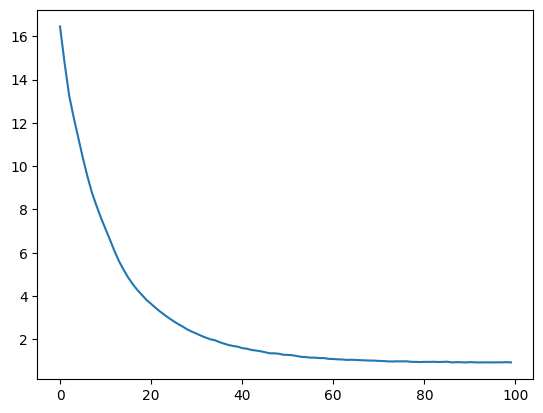

In [ ]:
plt.plot(np.arange(epochs), losses)

In [ ]:
final_df

,account_id,raw_amount,amount,td,tcode,datetime
0,0,-1339.810791,14.600000,0.0,CREDIT__COLLECTION FROM ANOTHER BANK__nan,1995-11-17
1,0,-4855.853027,2300.000000,20.0,DEBIT__CASH WITHDRAWAL__nan,1995-12-17
2,0,-128.370224,13974.402344,0.0,DEBIT__REMITTANCE TO ANOTHER BANK__LOAN PAYMENT,1995-12-24
3,0,2977.615234,16976.861328,2.0,CREDIT__CREDIT IN CASH__nan,1996-01-06
4,0,-2092.325928,1800.000000,2.0,DEBIT__CASH WITHDRAWAL__nan,1996-01-23
...,...,...,...,...,...,...
5995,19,-14.600000,3119.769531,11.0,CREDIT__nan__INTEREST CREDITED,1993-03-26
5996,19,-14.600000,201.256790,11.0,CREDIT__nan__INTEREST CREDITED,1993-04-03
5997,19,89.025810,263.740967,1.0,CREDIT__nan__INTEREST CREDITED,1993-04-04
5998,19,108.768700,1400.000000,6.0,CREDIT__COLLECTION FROM ANOTHER BANK__nan,1993-04-19


Apparanetely in the above model the temporal datetime is not learn by the model but by manaully handled function called create_realistic_datetime_sequences, in the following model we tried to let the model learn this datetime temporal

In [ ]:
# Best Params yet

# sequence_length = 80
# min_seq_length = 80
# cat_emb_dim = 4
# mlp_layers = [128, 128]
# diffusion_steps = 1000
# diffusion_beta_start = 1e-4
# diffusion_beta_end = 0.02
# scheduler = 'exp'
# epochs = 100
# batch_size = 256
# learning_rate = 2e-4
# n_sequences = 5000



# {'tcode': 0.02724600259173137,
#  'day': 0.10728971896725675,
#  'month': 0.0020343577502627227}

# {'amount': {'wasser': np.float64(1078.7188140685037),
#   'ks': np.float64(0.14036134959103302),
#   'energy_d': np.float64(8.03362420434327)},
#  'td': {'wasser': np.float64(0.5088207747652229),
#   'ks': np.float64(0.05544429794001818),
#   'energy_d': np.float64(0.17564403289333103)},
#  'CF': {'wasser': np.float64(7657.992439824109),
#   'ks': np.float64(0.17410183748396918),
#   'energy_d': np.float64(37.93647132040205)}}

#   tcode-3g= 'jsd': 0.22564342434399481,

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.preprocessing import LabelEncoder, QuantileTransformer

import pandas as pd
import numpy as np
import math
import random
import os
from datetime import datetime, timedelta
import calendar
from tqdm import tqdm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURATION
# =============================================================================
seed = 1234
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Model hyperparameters
# sequence_length = 80
# min_seq_length = 80
# cat_emb_dim = 4
# mlp_layers = [64, 64]
# diffusion_steps = 1000
# diffusion_beta_start = 1e-4
# diffusion_beta_end = 0.02
# scheduler = 'exp'
# epochs = 100
# batch_size = 256
# learning_rate = 2e-4
# n_sequences = 5000

sequence_length = 80
min_seq_length = 80
cat_emb_dim = 4
mlp_layers = [128, 128]
diffusion_steps = 1000
diffusion_beta_start = 1e-4
diffusion_beta_end = 0.02
scheduler = 'exp'
epochs = 100
batch_size = 256
learning_rate = 2e-4
n_sequences = 5000

# =============================================================================
# STUDENT-T DISTRIBUTION DDPM DIFFUSER
# =============================================================================
class StudentTDDPMDiffuser(object):
    def __init__(self, total_steps=1000, beta_start=1e-4, beta_end=0.02, device='cpu', scheduler='exp', df=30):
        self.total_steps = total_steps
        self.beta_start = beta_start
        self.beta_end = beta_end
        self.device = device
        self.df = df

        self.alphas, self.betas = self.prepare_noise_schedule(scheduler=scheduler)
        self.alphas_hat = torch.cumprod(self.alphas, dim=0)

    def prepare_noise_schedule(self, scheduler: str):
        scale = 1000 / self.total_steps
        beta_start = scale * self.beta_start
        beta_end = scale * self.beta_end

        if scheduler == 'linear':
            betas = torch.linspace(beta_start, beta_end, self.total_steps)
        elif scheduler == 'quad':
            betas = torch.linspace(self.beta_start**0.5, self.beta_end**0.5, self.total_steps) ** 2
        elif scheduler == 'exp':
            betas = torch.exp(torch.linspace(math.log(beta_start), math.log(beta_end), self.total_steps))
        elif scheduler == 'sigm':
            x = torch.linspace(-6, 6, self.total_steps)
            betas = torch.sigmoid(x) * (beta_end - beta_start) + beta_start

        alphas = 1.0 - betas
        return alphas.to(self.device), betas.to(self.device)

    def sample_random_timesteps(self, n: int):
        return torch.randint(low=1, high=self.total_steps, size=(n,), device=self.device)

    def sample_student_t(self, shape):
        if isinstance(shape, torch.Tensor):
            shape = tuple(shape.tolist())

        x = torch.randn(shape, device=self.device)
        df_sample = max(3.0, float(self.df))
        gamma_shape = df_sample / 2.0
        gamma_samples = torch.tensor(stats.gamma.rvs(gamma_shape, scale=2.0, size=shape[0]),
                                     dtype=torch.float32, device=self.device).view(-1, 1, 1)

        scaling = torch.sqrt(torch.tensor(df_sample / (df_sample - 2.0), device=self.device))
        t_noise = scaling * x / torch.sqrt(gamma_samples / df_sample)
        return t_noise

    def add_t_noise(self, x_num, t):
        sqrt_alpha_hat = torch.sqrt(self.alphas_hat[t])[:, None, None]
        sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alphas_hat[t])[:, None, None]

        noise_num = self.sample_student_t(x_num.shape)
        x_noise_num = sqrt_alpha_hat * x_num + sqrt_one_minus_alpha_hat * noise_num
        return x_noise_num, noise_num

    def p_sample_t(self, model_out, z_norm, timesteps):
        sqrt_alpha_t = torch.sqrt(self.alphas[timesteps])[:, None, None]
        betas_t = self.betas[timesteps][:, None, None]
        sqrt_one_minus_alpha_hat_t = torch.sqrt(1 - self.alphas_hat[timesteps])[:, None, None]
        epsilon_t = torch.sqrt(self.betas[timesteps][:, None, None])

        random_noise = self.sample_student_t(z_norm.shape)
        random_noise[timesteps == 0] = 0.0

        model_mean = ((1 / sqrt_alpha_t) * (z_norm - (betas_t * model_out / sqrt_one_minus_alpha_hat_t)))
        z_norm = model_mean + (epsilon_t * random_noise)
        return z_norm

    def sample(self, model_out, z_norm, timesteps):
        return self.p_sample_t(model_out, z_norm, timesteps)

# =============================================================================
# ENHANCED DATA PREPROCESSING
# =============================================================================
def preprocess_data_czech(df):
    """Enhanced preprocessing with proper temporal features"""
    czech_date_parser = lambda x: datetime.strptime(str(x), "%y%m%d")
    df["datetime"] = df["date"].apply(czech_date_parser)
    df["month"] = df["datetime"].dt.month
    df["day"] = df["datetime"].dt.day
    df["dow"] = df["datetime"].dt.dayofweek
    df["year"] = df["datetime"].dt.year
    df["doy"] = df["datetime"].dt.dayofyear

    df_sorted = df.sort_values(['account_id', 'datetime']).copy()

    # Calculate time differences - this is what the model should learn!
    df_sorted["td"] = df_sorted.groupby("account_id")["datetime"].diff().dt.days
    df_sorted["td"].fillna(0.0, inplace=True)

    # Days to month end
    df_sorted["dtme"] = df_sorted.datetime.apply(lambda dt: calendar.monthrange(dt.year, dt.month)[1] - dt.day)

    # Raw amount (signed)
    df_sorted['raw_amount'] = df_sorted.apply(lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)

    # Transaction code
    cat_code_fields = ['type', 'operation', 'k_symbol']
    tcode = df_sorted[cat_code_fields[0]].astype(str)
    for ccf in cat_code_fields[1:]:
        tcode += "__" + df_sorted[ccf].astype(str)
    df_sorted["tcode"] = tcode

    # Day of month categories
    conditions = [
        (df_sorted['day'] >= 1) & (df_sorted['day'] <= 10),
        (df_sorted['day'] > 10) & (df_sorted['day'] <= 20),
        (df_sorted['day'] > 20) & (df_sorted['day'] <= 31)
    ]
    categories = ['first', 'middle', 'last']
    df_sorted['DoM_cat'] = np.select(conditions, categories, default='unknown')

    # Age groups
    if 'age' in df_sorted.columns:
        bin_edges = [17, 30, 40, 50, 60, 81]
        labels = ['18-30', '31-40', '41-50', '51-60', '61+']
        df_sorted['age_group'] = pd.cut(df_sorted['age'], bins=bin_edges, labels=labels, right=False)
        df_sorted['age_group'] = df_sorted['age_group'].astype('object').fillna('unknown')
    else:
        df_sorted['age_group'] = 'unknown'

    return df_sorted

# =============================================================================
# TEMPORAL-AWARE DATASET
# =============================================================================
class TemporalSequentialDataset(Dataset):
    """Dataset that preserves temporal dependencies within sequences"""
    def __init__(self, df, cat_attrs, num_attrs, sequence_length=30, min_seq_length=20, max_sequences_per_account=5):
        self.sequence_length = sequence_length
        self.min_seq_length = min_seq_length
        self.cat_attrs = cat_attrs
        self.num_attrs = num_attrs
        self.sequences = []

        print("Creating temporal sequences from transaction data...")

        for account_id in tqdm(df['account_id'].unique()):
            account_data = df[df['account_id'] == account_id].sort_values('datetime').reset_index(drop=True)
            if len(account_data) >= min_seq_length:
                # Sample sequences that maintain temporal order
                n_possible = len(account_data) - sequence_length + 1
                if n_possible <= max_sequences_per_account:
                    start_indices = range(n_possible)
                else:
                    start_indices = np.linspace(0, n_possible-1, max_sequences_per_account, dtype=int)

                for start_idx in start_indices:
                    seq_data = account_data.iloc[start_idx:start_idx+sequence_length]
                    cat_data = seq_data[self.cat_attrs].values
                    num_data = seq_data[self.num_attrs].values
                    self.sequences.append({'cat_data': cat_data, 'num_data': num_data})

        print(f"Created {len(self.sequences)} temporal sequences from {df['account_id'].nunique()} accounts.")

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq = self.sequences[idx]
        cat_tensor = torch.LongTensor(seq['cat_data'])
        num_tensor = torch.FloatTensor(seq['num_data'])
        return cat_tensor, num_tensor

# =============================================================================
# TEMPORAL LSTM SYNTHESIZER
# =============================================================================
class TemporalLSTMSynthesizer(nn.Module):
    """LSTM that learns temporal dependencies including td and datetime components"""
    def __init__(self, n_cat_features, n_cat_tokens, cat_emb_dim, n_num_features,
                 hidden_dim=256, lstm_layers=2, dim_t=64):
        super(TemporalLSTMSynthesizer, self).__init__()
        self.n_cat_features = n_cat_features
        self.n_num_features = n_num_features
        self.cat_emb_dim = cat_emb_dim
        self.hidden_dim = hidden_dim
        self.dim_t = dim_t

        # Categorical embeddings
        self.cat_embeddings = nn.ModuleList([
            nn.Embedding(n_cat_tokens[i], cat_emb_dim) for i in range(n_cat_features)
        ])

        total_cat_emb_dim = n_cat_features * cat_emb_dim
        total_input_dim = total_cat_emb_dim + n_num_features

        # Time embedding for diffusion
        self.time_embed = nn.Sequential(
            nn.Linear(dim_t, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )

        # Input projection
        self.input_projection = nn.Linear(total_input_dim, hidden_dim)

        # LSTM with attention to temporal patterns
        self.lstm = nn.LSTM(
            input_size=hidden_dim,
            hidden_size=hidden_dim,
            num_layers=lstm_layers,
            batch_first=True,
            dropout=0.1 if lstm_layers > 1 else 0
        )

        # Separate heads for different outputs
        self.cat_heads = nn.ModuleList([
            nn.Linear(hidden_dim, n_cat_tokens[i]) for i in range(n_cat_features)
        ])
        self.num_head = nn.Linear(hidden_dim, n_num_features)

        # Temporal consistency layer
        self.temporal_consistency = nn.Linear(hidden_dim, hidden_dim)

    def embed_time(self, timesteps, dim_out, max_period=1000):
        half = dim_out // 2
        freqs = torch.exp(-math.log(max_period) * torch.arange(start=0, end=half, dtype=torch.float32) / half).to(device)
        args = timesteps[:, None].float() * freqs[None]
        embedding = torch.cat([torch.cos(args), torch.sin(args)], dim=-1)
        if dim_out % 2:
            embedding = torch.cat([embedding, torch.zeros_like(embedding[:, :1])], dim=-1)
        return embedding

    def embed_categorical(self, x_cat):
        embeddings = []
        for i in range(self.n_cat_features):
            embeddings.append(self.cat_embeddings[i](x_cat[:, :, i]))
        return torch.cat(embeddings, dim=-1)

    def forward(self, x_cat, x_num, timesteps):
        batch_size, seq_len, _ = x_num.shape

        # Embed categorical features
        cat_emb = self.embed_categorical(x_cat)

        # Combine with numerical features
        x = torch.cat([cat_emb, x_num], dim=-1)

        # Project input
        x_proj = self.input_projection(x)

        # Time embedding for diffusion process
        time_emb_raw = self.embed_time(timesteps, self.dim_t)
        time_emb = self.time_embed(time_emb_raw)
        time_emb = time_emb.unsqueeze(1).expand(-1, seq_len, -1)

        # Add temporal consistency
        x_with_time = x_proj + time_emb
        x_temporal = self.temporal_consistency(x_with_time)

        # LSTM processing - this learns the temporal dependencies
        lstm_out, _ = self.lstm(x_temporal)

        # Generate outputs
        cat_outputs = [head(lstm_out) for head in self.cat_heads]
        num_output = self.num_head(lstm_out)

        return cat_outputs, num_output

# =============================================================================
# TRAINING AND GENERATION
# =============================================================================
def train_model(model, diffuser, dataloader, epochs, optimizer, scheduler):
    model.train()
    cat_criterion = nn.CrossEntropyLoss()
    num_criterion = nn.MSELoss()
    losses = []

    for epoch in range(epochs):
        epoch_loss = 0.0
        pbar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}")

        for batch_cat, batch_num in pbar:
            batch_cat, batch_num = batch_cat.to(device), batch_num.to(device)
            batch_size = batch_cat.shape[0]

            timesteps = diffuser.sample_random_timesteps(batch_size)
            noisy_num, noise_target = diffuser.add_t_noise(batch_num, timesteps)

            cat_outputs, num_output = model(batch_cat, noisy_num, timesteps)

            # Calculate losses
            cat_loss = sum(cat_criterion(cat_out.view(-1, cat_out.size(-1)),
                                       batch_cat[:, :, i].view(-1))
                          for i, cat_out in enumerate(cat_outputs))

            num_loss = num_criterion(num_output, noise_target)
            total_loss = cat_loss + num_loss

            optimizer.zero_grad()
            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()

            epoch_loss += total_loss.item()
            pbar.set_postfix({'Loss': f"{total_loss.item():.4f}"})

        avg_loss = epoch_loss / len(dataloader)
        losses.append(avg_loss)

        print(f"Epoch {epoch+1} - Avg Loss: {avg_loss:.4f} - LR: {scheduler.get_last_lr()[0]:.6f}")
        scheduler.step()

    return losses

def generate_sequences(model, diffuser, n_sequences, seq_len, n_cat_features,
                      n_cat_tokens, n_num_features, device):
    """Generate sequences letting the model control ALL temporal aspects"""
    model.eval()

    # Initialize with random categorical data
    x_cat = torch.zeros(n_sequences, seq_len, n_cat_features, dtype=torch.long, device=device)
    for i, n_tokens in enumerate(n_cat_tokens):
        x_cat[:, :, i] = torch.randint(0, n_tokens, (n_sequences, seq_len), device=device)

    # Start with noise for numerical features (including td!)
    x_num = diffuser.sample_student_t((n_sequences, seq_len, n_num_features))

    with torch.no_grad():
        for t in tqdm(reversed(range(diffuser.total_steps)), desc="Generating"):
            timesteps = torch.full((n_sequences,), t, device=device, dtype=torch.long)

            # Model predicts both categorical and numerical features
            cat_outputs, num_output = model(x_cat, x_num, timesteps)

            # Update numerical features (including td) through diffusion
            x_num = diffuser.sample(num_output, x_num, timesteps)

            # Update categorical features less frequently for stability
            if t % 100 == 0:
                for i, cat_out in enumerate(cat_outputs):
                    probs = torch.softmax(cat_out, dim=-1)
                    x_cat[:, :, i] = torch.multinomial(probs.view(-1, probs.size(-1)), 1).view(n_sequences, seq_len)

    return x_cat, x_num

# def create_dataframe_from_generated(generated_cat, generated_num, cat_attrs, num_attrs,
#                                   label_encoders, num_scaler, sequence_length):
#     """Convert generated sequences to dataframe with proper datetime reconstruction"""
#     final_sequences = []

#     for seq_idx in range(generated_cat.shape[0]):
#         # Inverse transform numerical data
#         seq_num = generated_num[seq_idx].cpu().numpy()
#         seq_num_original = num_scaler.inverse_transform(seq_num)

#         # Inverse transform categorical data
#         seq_cat = generated_cat[seq_idx].cpu().numpy()

#         # Create sequence dataframe
#         seq_df = pd.DataFrame()

#         # Add numerical features
#         for i, col in enumerate(num_attrs):
#             seq_df[col] = seq_num_original[:, i]

#         # Add categorical features
#         for i, col in enumerate(cat_attrs):
#             seq_df[col] = label_encoders[col].inverse_transform(seq_cat[:, i])

#         # Reconstruct datetime from components using the model's learned td
#         seq_df['year'] = seq_df['year'].astype(int)
#         seq_df['month'] = seq_df['month'].astype(int)
#         seq_df['day'] = seq_df['day'].astype(int)

#         # Start with first transaction date
#         first_date = datetime(seq_df['year'].iloc[0], seq_df['month'].iloc[0], seq_df['day'].iloc[0])
#         dates = [first_date]

#         # Use the model's generated td values for subsequent dates
#         for i in range(1, len(seq_df)):
#             td_days = max(0, int(seq_df['td'].iloc[i]))  # Ensure non-negative
#             next_date = dates[-1] + timedelta(days=td_days)
#             dates.append(next_date)

#         seq_df['datetime'] = dates
#         seq_df['account_id'] = seq_idx
#         final_sequences.append(seq_df)

#     return pd.concat(final_sequences, ignore_index=True)


def create_dataframe_from_generated(generated_cat, generated_num, cat_attrs, num_attrs,
                                  label_encoders, num_scaler, sequence_length):
    """Convert generated sequences to dataframe with proper datetime reconstruction"""
    import calendar
    from datetime import datetime, timedelta
    import pandas as pd

    def validate_and_fix_date(year, month, day):
        """Validate and fix date components to ensure valid date"""
        year = max(1900, min(2100, int(year)))  # Reasonable year range
        month = max(1, min(12, int(month)))     # Month must be 1-12

        # Get maximum valid day for this month/year
        max_day = calendar.monthrange(year, month)[1]
        day = max(1, min(max_day, int(day)))    # Day must be valid for the month

        return year, month, day

    final_sequences = []

    for seq_idx in range(generated_cat.shape[0]):
        # Inverse transform numerical data
        seq_num = generated_num[seq_idx].cpu().numpy()
        seq_num_original = num_scaler.inverse_transform(seq_num)

        # Inverse transform categorical data
        seq_cat = generated_cat[seq_idx].cpu().numpy()

        # Create sequence dataframe
        seq_df = pd.DataFrame()

        # Add numerical features
        for i, col in enumerate(num_attrs):
            seq_df[col] = seq_num_original[:, i]

        # Add categorical features
        for i, col in enumerate(cat_attrs):
            seq_df[col] = label_encoders[col].inverse_transform(seq_cat[:, i])

        # Validate and fix date components
        seq_df['year'] = seq_df['year'].astype(int)
        seq_df['month'] = seq_df['month'].astype(int)
        seq_df['day'] = seq_df['day'].astype(int)

        # Fix the first date with validation
        try:
            first_year, first_month, first_day = validate_and_fix_date(
                seq_df['year'].iloc[0],
                seq_df['month'].iloc[0],
                seq_df['day'].iloc[0]
            )
            first_date = datetime(first_year, first_month, first_day)
        except Exception as e:
            # Fallback to a default date if validation still fails
            print(f"Warning: Could not create valid first date for sequence {seq_idx}, using default date")
            first_date = datetime(2020, 1, 1)

        dates = [first_date]

        # Use the model's generated td values for subsequent dates
        for i in range(1, len(seq_df)):
            td_days = max(0, int(seq_df['td'].iloc[i]))  # Ensure non-negative
            next_date = dates[-1] + timedelta(days=td_days)
            dates.append(next_date)

        seq_df['datetime'] = dates
        seq_df['account_id'] = seq_idx
        final_sequences.append(seq_df)

    return pd.concat(final_sequences, ignore_index=True)

# =============================================================================
# MAIN EXECUTION
# =============================================================================
if __name__ == "__main__":
    print("Loading and preprocessing data...")
    try:
        real = pd.read_csv('tr_by_acct_w_age.csv')
    except FileNotFoundError:
        print("Error: CSV file not found.")
        exit()

    raw_data = preprocess_data_czech(real)
    raw_data = raw_data.sort_values(by=["account_id", "date"])

    # Define features - td is now a numerical feature the model learns!
    cat_attrs = ['tcode', 'dow', 'month', 'day', 'year', 'DoM_cat', 'age_group']
    num_attrs = ['amount', 'raw_amount', 'td']  # td is learned by the model!

    df_processed = raw_data[cat_attrs + num_attrs + ['account_id', 'datetime']].copy()

    # Encode features
    label_encoders = {}
    n_cat_tokens = []
    for attr in cat_attrs:
        le = LabelEncoder()
        df_processed[attr] = le.fit_transform(df_processed[attr].astype(str))
        label_encoders[attr] = le
        n_cat_tokens.append(len(le.classes_))

    num_scaler = QuantileTransformer(output_distribution='normal', random_state=seed)
    df_processed[num_attrs] = num_scaler.fit_transform(df_processed[num_attrs])

    # Create dataset
    dataset = TemporalSequentialDataset(
        df_processed, cat_attrs, num_attrs,
        sequence_length, min_seq_length, max_sequences_per_account=3
    )
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0)

    # Initialize model
    model = TemporalLSTMSynthesizer(
        n_cat_features=len(cat_attrs),
        n_cat_tokens=n_cat_tokens,
        cat_emb_dim=cat_emb_dim,
        n_num_features=len(num_attrs),
        hidden_dim=mlp_layers[0]
    ).to(device)

    diffuser = StudentTDDPMDiffuser(
        total_steps=diffusion_steps,
        beta_start=diffusion_beta_start,
        beta_end=diffusion_beta_end,
        device=device,
        scheduler=scheduler,
        df=10
    )

    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = CosineAnnealingLR(optimizer, T_max=epochs)

    print(f"Model has {sum(p.numel() for p in model.parameters() if p.requires_grad):,} parameters.")

    # Train model
    print("Training model to learn temporal dependencies...")
    losses = train_model(model, diffuser, dataloader, epochs, optimizer, scheduler)

    # Generate samples
    print("Generating sequences with learned temporal patterns...")
    generated_cat, generated_num = generate_sequences(
        model, diffuser, n_sequences=n_sequences, seq_len=sequence_length,
        n_cat_features=len(cat_attrs), n_cat_tokens=n_cat_tokens,
        n_num_features=len(num_attrs), device=device
    )

    # Create final dataframe
    final_df = create_dataframe_from_generated(
        generated_cat, generated_num, cat_attrs, num_attrs,
        label_encoders, num_scaler, sequence_length
    )

    # Select final columns and clean
    final_df = final_df[['account_id', 'raw_amount', 'amount', 'td', 'tcode', 'datetime']].copy()
    final_df["datetime"] = final_df["datetime"].dt.date
    # final_df['datetime'] = pd.to_datetime(final_df[['year', 'month', 'day']])
    # final_df = final_df.dropna(subset=['datetime'])
    # final_df['datetime'] = final_df['datetime'].dt.date

    print(f"\nFinal shape: {final_df.shape}")
    print("\nSample data:")
    print(final_df.head(15))
    print(f"\nTemporal dependencies learned - td range: {final_df['td'].min():.1f} to {final_df['td'].max():.1f}")

    final_df.to_csv('synthetic_transactions.csv', index=False)
    print("\nSynthetic data saved with learned temporal patterns!")

Using device: cuda:0
Loading and preprocessing data...
Creating temporal sequences from transaction data...


100%|██████████| 4500/4500 [00:17<00:00, 258.24it/s]


Created 12340 temporal sequences from 4500 accounts.
Model has 320,792 parameters.
Training model to learn temporal dependencies...


Epoch 1/100: 100%|██████████| 49/49 [00:01<00:00, 30.15it/s, Loss=15.0781]


Epoch 1 - Avg Loss: 16.0490 - LR: 0.000200


Epoch 2/100: 100%|██████████| 49/49 [00:01<00:00, 32.74it/s, Loss=13.2264]


Epoch 2 - Avg Loss: 13.9565 - LR: 0.000200


Epoch 3/100: 100%|██████████| 49/49 [00:01<00:00, 33.16it/s, Loss=12.3419]


Epoch 3 - Avg Loss: 12.7612 - LR: 0.000200


Epoch 4/100: 100%|██████████| 49/49 [00:01<00:00, 33.41it/s, Loss=11.4474]


Epoch 4 - Avg Loss: 11.7921 - LR: 0.000200


Epoch 5/100: 100%|██████████| 49/49 [00:01<00:00, 33.24it/s, Loss=10.4181]


Epoch 5 - Avg Loss: 10.8541 - LR: 0.000199


Epoch 6/100: 100%|██████████| 49/49 [00:01<00:00, 33.21it/s, Loss=9.1300]


Epoch 6 - Avg Loss: 9.7808 - LR: 0.000199


Epoch 7/100: 100%|██████████| 49/49 [00:01<00:00, 32.66it/s, Loss=8.2781]


Epoch 7 - Avg Loss: 8.8442 - LR: 0.000198


Epoch 8/100: 100%|██████████| 49/49 [00:01<00:00, 33.12it/s, Loss=7.6836]


Epoch 8 - Avg Loss: 8.0683 - LR: 0.000198


Epoch 9/100: 100%|██████████| 49/49 [00:01<00:00, 33.05it/s, Loss=7.0122]


Epoch 9 - Avg Loss: 7.3460 - LR: 0.000197


Epoch 10/100: 100%|██████████| 49/49 [00:01<00:00, 32.96it/s, Loss=6.5484]


Epoch 10 - Avg Loss: 6.7305 - LR: 0.000196


Epoch 11/100: 100%|██████████| 49/49 [00:01<00:00, 33.40it/s, Loss=5.9635]


Epoch 11 - Avg Loss: 6.1851 - LR: 0.000195


Epoch 12/100: 100%|██████████| 49/49 [00:01<00:00, 33.22it/s, Loss=5.5121]


Epoch 12 - Avg Loss: 5.7203 - LR: 0.000194


Epoch 13/100: 100%|██████████| 49/49 [00:01<00:00, 33.21it/s, Loss=5.1956]


Epoch 13 - Avg Loss: 5.2812 - LR: 0.000193


Epoch 14/100: 100%|██████████| 49/49 [00:01<00:00, 32.75it/s, Loss=4.7597]


Epoch 14 - Avg Loss: 4.9298 - LR: 0.000192


Epoch 15/100: 100%|██████████| 49/49 [00:01<00:00, 32.52it/s, Loss=4.2814]


Epoch 15 - Avg Loss: 4.6100 - LR: 0.000190


Epoch 16/100: 100%|██████████| 49/49 [00:01<00:00, 32.97it/s, Loss=4.1272]


Epoch 16 - Avg Loss: 4.2975 - LR: 0.000189


Epoch 17/100: 100%|██████████| 49/49 [00:01<00:00, 32.72it/s, Loss=3.7057]


Epoch 17 - Avg Loss: 4.0234 - LR: 0.000188


Epoch 18/100: 100%|██████████| 49/49 [00:01<00:00, 33.04it/s, Loss=3.6439]


Epoch 18 - Avg Loss: 3.7497 - LR: 0.000186


Epoch 19/100: 100%|██████████| 49/49 [00:01<00:00, 33.23it/s, Loss=3.5272]


Epoch 19 - Avg Loss: 3.4982 - LR: 0.000184


Epoch 20/100: 100%|██████████| 49/49 [00:01<00:00, 33.19it/s, Loss=3.0600]


Epoch 20 - Avg Loss: 3.2680 - LR: 0.000183


Epoch 21/100: 100%|██████████| 49/49 [00:01<00:00, 32.60it/s, Loss=2.9975]


Epoch 21 - Avg Loss: 3.0605 - LR: 0.000181


Epoch 22/100: 100%|██████████| 49/49 [00:01<00:00, 30.87it/s, Loss=2.7295]


Epoch 22 - Avg Loss: 2.8832 - LR: 0.000179


Epoch 23/100: 100%|██████████| 49/49 [00:01<00:00, 31.16it/s, Loss=2.5786]


Epoch 23 - Avg Loss: 2.7252 - LR: 0.000177


Epoch 24/100: 100%|██████████| 49/49 [00:01<00:00, 31.95it/s, Loss=2.4929]


Epoch 24 - Avg Loss: 2.5892 - LR: 0.000175


Epoch 25/100: 100%|██████████| 49/49 [00:01<00:00, 31.96it/s, Loss=2.4010]


Epoch 25 - Avg Loss: 2.4410 - LR: 0.000173


Epoch 26/100: 100%|██████████| 49/49 [00:01<00:00, 33.00it/s, Loss=2.2607]


Epoch 26 - Avg Loss: 2.3104 - LR: 0.000171


Epoch 27/100: 100%|██████████| 49/49 [00:01<00:00, 32.79it/s, Loss=2.1870]


Epoch 27 - Avg Loss: 2.1999 - LR: 0.000168


Epoch 28/100: 100%|██████████| 49/49 [00:01<00:00, 32.68it/s, Loss=1.9440]


Epoch 28 - Avg Loss: 2.1056 - LR: 0.000166


Epoch 29/100: 100%|██████████| 49/49 [00:01<00:00, 32.30it/s, Loss=1.9174]


Epoch 29 - Avg Loss: 2.0044 - LR: 0.000164


Epoch 30/100: 100%|██████████| 49/49 [00:01<00:00, 26.79it/s, Loss=1.8625]


Epoch 30 - Avg Loss: 1.9153 - LR: 0.000161


Epoch 31/100: 100%|██████████| 49/49 [00:01<00:00, 32.38it/s, Loss=1.7839]


Epoch 31 - Avg Loss: 1.8336 - LR: 0.000159


Epoch 32/100: 100%|██████████| 49/49 [00:01<00:00, 32.15it/s, Loss=1.7098]


Epoch 32 - Avg Loss: 1.7579 - LR: 0.000156


Epoch 33/100: 100%|██████████| 49/49 [00:01<00:00, 32.58it/s, Loss=1.7349]


Epoch 33 - Avg Loss: 1.7009 - LR: 0.000154


Epoch 34/100: 100%|██████████| 49/49 [00:01<00:00, 32.64it/s, Loss=1.4152]


Epoch 34 - Avg Loss: 1.6235 - LR: 0.000151


Epoch 35/100: 100%|██████████| 49/49 [00:01<00:00, 32.61it/s, Loss=1.7485]


Epoch 35 - Avg Loss: 1.5823 - LR: 0.000148


Epoch 36/100: 100%|██████████| 49/49 [00:01<00:00, 32.40it/s, Loss=1.4565]


Epoch 36 - Avg Loss: 1.5249 - LR: 0.000145


Epoch 37/100: 100%|██████████| 49/49 [00:01<00:00, 32.33it/s, Loss=1.4875]


Epoch 37 - Avg Loss: 1.4786 - LR: 0.000143


Epoch 38/100: 100%|██████████| 49/49 [00:01<00:00, 32.10it/s, Loss=1.4553]


Epoch 38 - Avg Loss: 1.4269 - LR: 0.000140


Epoch 39/100: 100%|██████████| 49/49 [00:01<00:00, 32.12it/s, Loss=1.2136]


Epoch 39 - Avg Loss: 1.3879 - LR: 0.000137


Epoch 40/100: 100%|██████████| 49/49 [00:01<00:00, 32.22it/s, Loss=1.1948]


Epoch 40 - Avg Loss: 1.3520 - LR: 0.000134


Epoch 41/100: 100%|██████████| 49/49 [00:01<00:00, 32.60it/s, Loss=1.3075]


Epoch 41 - Avg Loss: 1.3009 - LR: 0.000131


Epoch 42/100: 100%|██████████| 49/49 [00:01<00:00, 32.16it/s, Loss=1.2678]


Epoch 42 - Avg Loss: 1.2757 - LR: 0.000128


Epoch 43/100: 100%|██████████| 49/49 [00:01<00:00, 32.12it/s, Loss=1.1620]


Epoch 43 - Avg Loss: 1.2337 - LR: 0.000125


Epoch 44/100: 100%|██████████| 49/49 [00:01<00:00, 31.78it/s, Loss=1.1263]


Epoch 44 - Avg Loss: 1.2173 - LR: 0.000122


Epoch 45/100: 100%|██████████| 49/49 [00:01<00:00, 32.00it/s, Loss=1.0779]


Epoch 45 - Avg Loss: 1.1862 - LR: 0.000119


Epoch 46/100: 100%|██████████| 49/49 [00:01<00:00, 31.98it/s, Loss=1.0715]


Epoch 46 - Avg Loss: 1.1546 - LR: 0.000116


Epoch 47/100: 100%|██████████| 49/49 [00:01<00:00, 31.56it/s, Loss=1.2045]


Epoch 47 - Avg Loss: 1.1326 - LR: 0.000113


Epoch 48/100: 100%|██████████| 49/49 [00:01<00:00, 31.81it/s, Loss=1.0986]


Epoch 48 - Avg Loss: 1.1156 - LR: 0.000109


Epoch 49/100: 100%|██████████| 49/49 [00:01<00:00, 32.17it/s, Loss=1.1331]


Epoch 49 - Avg Loss: 1.0948 - LR: 0.000106


Epoch 50/100: 100%|██████████| 49/49 [00:01<00:00, 32.11it/s, Loss=1.0914]


Epoch 50 - Avg Loss: 1.0880 - LR: 0.000103


Epoch 51/100: 100%|██████████| 49/49 [00:01<00:00, 32.09it/s, Loss=1.0915]


Epoch 51 - Avg Loss: 1.0659 - LR: 0.000100


Epoch 52/100: 100%|██████████| 49/49 [00:01<00:00, 31.72it/s, Loss=0.9649]


Epoch 52 - Avg Loss: 1.0528 - LR: 0.000097


Epoch 53/100: 100%|██████████| 49/49 [00:01<00:00, 32.33it/s, Loss=1.0402]


Epoch 53 - Avg Loss: 1.0236 - LR: 0.000094


Epoch 54/100: 100%|██████████| 49/49 [00:01<00:00, 31.93it/s, Loss=1.0095]


Epoch 54 - Avg Loss: 1.0162 - LR: 0.000091


Epoch 55/100: 100%|██████████| 49/49 [00:01<00:00, 30.06it/s, Loss=0.9885]


Epoch 55 - Avg Loss: 1.0080 - LR: 0.000087


Epoch 56/100: 100%|██████████| 49/49 [00:01<00:00, 30.50it/s, Loss=1.0695]


Epoch 56 - Avg Loss: 0.9938 - LR: 0.000084


Epoch 57/100: 100%|██████████| 49/49 [00:01<00:00, 31.72it/s, Loss=0.8958]


Epoch 57 - Avg Loss: 0.9810 - LR: 0.000081


Epoch 58/100: 100%|██████████| 49/49 [00:01<00:00, 32.31it/s, Loss=1.0168]


Epoch 58 - Avg Loss: 0.9746 - LR: 0.000078


Epoch 59/100: 100%|██████████| 49/49 [00:01<00:00, 31.97it/s, Loss=1.0659]


Epoch 59 - Avg Loss: 0.9511 - LR: 0.000075


Epoch 60/100: 100%|██████████| 49/49 [00:01<00:00, 32.26it/s, Loss=0.9201]


Epoch 60 - Avg Loss: 0.9460 - LR: 0.000072


Epoch 61/100: 100%|██████████| 49/49 [00:01<00:00, 32.16it/s, Loss=0.8890]


Epoch 61 - Avg Loss: 0.9358 - LR: 0.000069


Epoch 62/100: 100%|██████████| 49/49 [00:01<00:00, 31.56it/s, Loss=0.9419]


Epoch 62 - Avg Loss: 0.9321 - LR: 0.000066


Epoch 63/100: 100%|██████████| 49/49 [00:01<00:00, 32.26it/s, Loss=1.0550]


Epoch 63 - Avg Loss: 0.9171 - LR: 0.000063


Epoch 64/100: 100%|██████████| 49/49 [00:01<00:00, 32.31it/s, Loss=1.0534]


Epoch 64 - Avg Loss: 0.9105 - LR: 0.000060


Epoch 65/100: 100%|██████████| 49/49 [00:01<00:00, 32.25it/s, Loss=1.0125]


Epoch 65 - Avg Loss: 0.9095 - LR: 0.000057


Epoch 66/100: 100%|██████████| 49/49 [00:01<00:00, 31.78it/s, Loss=0.9137]


Epoch 66 - Avg Loss: 0.8956 - LR: 0.000055


Epoch 67/100: 100%|██████████| 49/49 [00:01<00:00, 31.60it/s, Loss=0.8699]


Epoch 67 - Avg Loss: 0.8870 - LR: 0.000052


Epoch 68/100: 100%|██████████| 49/49 [00:01<00:00, 31.65it/s, Loss=0.8697]


Epoch 68 - Avg Loss: 0.8795 - LR: 0.000049


Epoch 69/100: 100%|██████████| 49/49 [00:01<00:00, 31.65it/s, Loss=0.8312]


Epoch 69 - Avg Loss: 0.8783 - LR: 0.000046


Epoch 70/100: 100%|██████████| 49/49 [00:01<00:00, 31.49it/s, Loss=0.9079]


Epoch 70 - Avg Loss: 0.8768 - LR: 0.000044


Epoch 71/100: 100%|██████████| 49/49 [00:01<00:00, 32.12it/s, Loss=0.8883]


Epoch 71 - Avg Loss: 0.8624 - LR: 0.000041


Epoch 72/100: 100%|██████████| 49/49 [00:01<00:00, 32.05it/s, Loss=0.8503]


Epoch 72 - Avg Loss: 0.8645 - LR: 0.000039


Epoch 73/100: 100%|██████████| 49/49 [00:01<00:00, 31.97it/s, Loss=0.7937]


Epoch 73 - Avg Loss: 0.8561 - LR: 0.000036


Epoch 74/100: 100%|██████████| 49/49 [00:01<00:00, 26.30it/s, Loss=0.8305]


Epoch 74 - Avg Loss: 0.8548 - LR: 0.000034


Epoch 75/100: 100%|██████████| 49/49 [00:01<00:00, 31.84it/s, Loss=0.8367]


Epoch 75 - Avg Loss: 0.8538 - LR: 0.000032


Epoch 76/100: 100%|██████████| 49/49 [00:01<00:00, 31.68it/s, Loss=0.9356]


Epoch 76 - Avg Loss: 0.8504 - LR: 0.000029


Epoch 77/100: 100%|██████████| 49/49 [00:01<00:00, 30.94it/s, Loss=0.8401]


Epoch 77 - Avg Loss: 0.8426 - LR: 0.000027


Epoch 78/100: 100%|██████████| 49/49 [00:01<00:00, 31.91it/s, Loss=0.8526]


Epoch 78 - Avg Loss: 0.8413 - LR: 0.000025


Epoch 79/100: 100%|██████████| 49/49 [00:01<00:00, 31.87it/s, Loss=0.8111]


Epoch 79 - Avg Loss: 0.8433 - LR: 0.000023


Epoch 80/100: 100%|██████████| 49/49 [00:01<00:00, 31.92it/s, Loss=0.7162]


Epoch 80 - Avg Loss: 0.8299 - LR: 0.000021


Epoch 81/100: 100%|██████████| 49/49 [00:01<00:00, 31.51it/s, Loss=0.7952]


Epoch 81 - Avg Loss: 0.8361 - LR: 0.000019


Epoch 82/100: 100%|██████████| 49/49 [00:01<00:00, 31.91it/s, Loss=0.8726]


Epoch 82 - Avg Loss: 0.8319 - LR: 0.000017


Epoch 83/100: 100%|██████████| 49/49 [00:01<00:00, 31.91it/s, Loss=0.8204]


Epoch 83 - Avg Loss: 0.8312 - LR: 0.000016


Epoch 84/100: 100%|██████████| 49/49 [00:01<00:00, 31.10it/s, Loss=1.0901]


Epoch 84 - Avg Loss: 0.8425 - LR: 0.000014


Epoch 85/100: 100%|██████████| 49/49 [00:01<00:00, 31.43it/s, Loss=0.8351]


Epoch 85 - Avg Loss: 0.8251 - LR: 0.000012


Epoch 86/100: 100%|██████████| 49/49 [00:01<00:00, 31.90it/s, Loss=0.7711]


Epoch 86 - Avg Loss: 0.8226 - LR: 0.000011


Epoch 87/100: 100%|██████████| 49/49 [00:01<00:00, 31.64it/s, Loss=0.7513]


Epoch 87 - Avg Loss: 0.8182 - LR: 0.000010


Epoch 88/100: 100%|██████████| 49/49 [00:01<00:00, 30.99it/s, Loss=0.8999]


Epoch 88 - Avg Loss: 0.8174 - LR: 0.000008


Epoch 89/100: 100%|██████████| 49/49 [00:01<00:00, 31.39it/s, Loss=1.0241]


Epoch 89 - Avg Loss: 0.8189 - LR: 0.000007


Epoch 90/100: 100%|██████████| 49/49 [00:01<00:00, 31.29it/s, Loss=0.8398]


Epoch 90 - Avg Loss: 0.8108 - LR: 0.000006


Epoch 91/100: 100%|██████████| 49/49 [00:01<00:00, 30.78it/s, Loss=0.9070]


Epoch 91 - Avg Loss: 0.8223 - LR: 0.000005


Epoch 92/100: 100%|██████████| 49/49 [00:01<00:00, 30.49it/s, Loss=0.8793]


Epoch 92 - Avg Loss: 0.8162 - LR: 0.000004


Epoch 93/100: 100%|██████████| 49/49 [00:01<00:00, 30.10it/s, Loss=0.8197]


Epoch 93 - Avg Loss: 0.8130 - LR: 0.000003


Epoch 94/100: 100%|██████████| 49/49 [00:01<00:00, 29.88it/s, Loss=0.8100]


Epoch 94 - Avg Loss: 0.8057 - LR: 0.000002


Epoch 95/100: 100%|██████████| 49/49 [00:01<00:00, 30.44it/s, Loss=0.8104]


Epoch 95 - Avg Loss: 0.8124 - LR: 0.000002


Epoch 96/100: 100%|██████████| 49/49 [00:01<00:00, 31.28it/s, Loss=0.9125]


Epoch 96 - Avg Loss: 0.8073 - LR: 0.000001


Epoch 97/100: 100%|██████████| 49/49 [00:01<00:00, 31.41it/s, Loss=0.7779]


Epoch 97 - Avg Loss: 0.8140 - LR: 0.000001


Epoch 98/100: 100%|██████████| 49/49 [00:01<00:00, 31.10it/s, Loss=0.9288]


Epoch 98 - Avg Loss: 0.8161 - LR: 0.000000


Epoch 99/100: 100%|██████████| 49/49 [00:01<00:00, 30.56it/s, Loss=0.7315]


Epoch 99 - Avg Loss: 0.8106 - LR: 0.000000


Epoch 100/100: 100%|██████████| 49/49 [00:01<00:00, 31.15it/s, Loss=0.7661]


Epoch 100 - Avg Loss: 0.8073 - LR: 0.000000
Generating sequences with learned temporal patterns...


Generating: 1000it [02:52,  5.80it/s]



Final shape: (400000, 6)

Sample data:
    account_id    raw_amount        amount    td  \
0            0    146.706009    139.436646  19.0   
1            0  -2000.000000   2298.791504   7.0   
2            0 -16788.603516  14084.089844   3.0   
3            0  44759.292969  36677.554688  13.0   
4            0  -1920.196533   2933.928955   4.0   
5            0  -3103.447266   2400.000000   2.0   
6            0  -1297.286255   2696.279297   1.0   
7            0   -579.585327   2200.000000   4.0   
8            0    -14.600000    201.508865   4.0   
9            0  -8133.693359   4800.000000   5.0   
10           0  -1200.000000   2644.396240   1.0   
11           0    -14.600000    118.458008   0.0   
12           0  15838.788086  13300.666016   0.0   
13           0    -14.600000     14.600000   7.0   
14           0   4262.036133   3275.370605  19.0   

                                                tcode   datetime  
0                      CREDIT__nan__INTEREST CREDITED 1997-0

In [ ]:
# This version also act good

# seed = 1234
# random.seed(seed)
# np.random.seed(seed)
# torch.manual_seed(seed)
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# # Model hyperparameters
# sequence_length = 80
# min_seq_length = 80
# cat_emb_dim = 4
# mlp_layers = [128, 128]
# diffusion_steps = 500  # Reduced for efficiency
# epochs = 50  # Reduced for efficiency
# batch_size = 256
# learning_rate = 2e-4
# n_sequences = 5000

# # Date constraints
# MIN_YEAR = 1993
# MAX_YEAR = 1998

# {'jsd': 0.17666379079128386,
#  'entr_r': np.float64(4.142583700511794),
#  'entr_g': np.float64(4.998523941057718),
#  'NED': np.float64(-0.855940240545924),
#  'l1': np.float64(0.9483875141141689),
#  'l2': 0.12218879424693639,
#  'jac': np.float64(0.06481481481481481),
#  'count_r': 202,
#  'coverage_r': 0.9351851851851852,
#  'count_g': 216,
#  'coverage_g': 1.0,
#  'count_max': 216,
#  'field': 'tcode',
#  'n': 3,
#  'pseudo_counts': 0.0}


# {'amount': {'wasser': np.float64(682.1070215071861),
#   'ks': np.float64(0.140266349591033),
#   'energy_d': np.float64(9.15508966232386)},
#  'td': {'wasser': np.float64(0.48902485913359595),
#   'ks': np.float64(0.11245570205998183),
#   'energy_d': np.float64(0.19747738204716697)},
#  'CF': {'wasser': np.float64(13021.12391497244),
#   'ks': np.float64(0.32986821530718735),
#   'energy_d': np.float64(67.69154098302828)}}


#   {'tcode': 0.03598723757365223,
#  'day': 0.0644653630179872,
#  'month': 0.011520275842911602}


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.preprocessing import LabelEncoder, QuantileTransformer

import pandas as pd
import numpy as np
import math
import random
import os
from datetime import datetime, timedelta
import calendar
from tqdm import tqdm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Quality evaluation imports
from sdv.metadata import SingleTableMetadata
from sdv import evaluation

# =============================================================================
# CONFIGURATION
# =============================================================================
seed = 1234
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Model hyperparameters
sequence_length = 80
min_seq_length = 80
cat_emb_dim = 4
mlp_layers = [128, 128]
diffusion_steps = 500  # Reduced for efficiency
epochs = 50  # Reduced for efficiency
batch_size = 256
learning_rate = 2e-4
n_sequences = 5000
# =============================================================================
# STUDENT-T DISTRIBUTION DDPM DIFFUSER (Condensed)
# =============================================================================
class StudentTDDPMDiffuser(object):
    def __init__(self, total_steps=500, beta_start=1e-4, beta_end=0.02, device='cpu', df=10):
        self.total_steps = total_steps
        self.device = device
        self.df = df

        # Exponential schedule
        scale = 1000 / total_steps
        betas = torch.exp(torch.linspace(math.log(scale * beta_start),
                                        math.log(scale * beta_end), total_steps))
        self.alphas = (1.0 - betas).to(device)
        self.betas = betas.to(device)
        self.alphas_hat = torch.cumprod(self.alphas, dim=0)

    def sample_random_timesteps(self, n: int):
        return torch.randint(low=1, high=self.total_steps, size=(n,), device=self.device)

    def sample_student_t(self, shape):
        x = torch.randn(shape, device=self.device)
        df_sample = max(3.0, float(self.df))
        gamma_shape = df_sample / 2.0
        gamma_samples = torch.tensor(stats.gamma.rvs(gamma_shape, scale=2.0, size=shape[0]),
                                   dtype=torch.float32, device=self.device).view(-1, 1, 1)
        scaling = torch.sqrt(torch.tensor(df_sample / (df_sample - 2.0), device=self.device))
        return scaling * x / torch.sqrt(gamma_samples / df_sample)

    def add_t_noise(self, x_num, t):
        sqrt_alpha_hat = torch.sqrt(self.alphas_hat[t])[:, None, None]
        sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alphas_hat[t])[:, None, None]
        noise_num = self.sample_student_t(x_num.shape)
        return sqrt_alpha_hat * x_num + sqrt_one_minus_alpha_hat * noise_num, noise_num

    def sample(self, model_out, z_norm, timesteps):
        sqrt_alpha_t = torch.sqrt(self.alphas[timesteps])[:, None, None]
        betas_t = self.betas[timesteps][:, None, None]
        sqrt_one_minus_alpha_hat_t = torch.sqrt(1 - self.alphas_hat[timesteps])[:, None, None]
        epsilon_t = torch.sqrt(self.betas[timesteps][:, None, None])

        random_noise = self.sample_student_t(z_norm.shape)
        random_noise[timesteps == 0] = 0.0

        model_mean = ((1 / sqrt_alpha_t) * (z_norm - (betas_t * model_out / sqrt_one_minus_alpha_hat_t)))
        return model_mean + (epsilon_t * random_noise)

# =============================================================================
# DATA PREPROCESSING (Streamlined)
# =============================================================================
def preprocess_data_czech(df):
    czech_date_parser = lambda x: datetime.strptime(str(x), "%y%m%d")
    df["datetime"] = df["date"].apply(czech_date_parser)
    df["month"] = df["datetime"].dt.month
    df["day"] = df["datetime"].dt.day
    df["dow"] = df["datetime"].dt.dayofweek
    df["year"] = df["datetime"].dt.year

    df_sorted = df.sort_values(['account_id', 'datetime']).copy()
    df_sorted["td"] = df_sorted.groupby("account_id")["datetime"].diff().dt.days.fillna(0.0)
    df_sorted['raw_amount'] = df_sorted.apply(
        lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)

    # Simplified transaction code
    df_sorted["tcode"] = df_sorted['type'].astype(str) + "__" + df_sorted['operation'].astype(str)

    # Day categories
    conditions = [(df_sorted['day'] <= 10), (df_sorted['day'] <= 20)]
    categories = ['first', 'middle', 'last']
    df_sorted['DoM_cat'] = np.select(conditions, categories[:2], default='last')

    return df_sorted

# =============================================================================
# DATASET (Simplified)
# =============================================================================
class TemporalSequentialDataset(Dataset):
    def __init__(self, df, cat_attrs, num_attrs, sequence_length=30, min_seq_length=20):
        self.sequences = []
        for account_id in tqdm(df['account_id'].unique(), desc="Creating sequences"):
            account_data = df[df['account_id'] == account_id].sort_values('datetime').reset_index(drop=True)
            if len(account_data) >= min_seq_length:
                for start_idx in range(0, len(account_data) - sequence_length + 1, sequence_length//2):
                    seq_data = account_data.iloc[start_idx:start_idx+sequence_length]
                    self.sequences.append({
                        'cat_data': seq_data[cat_attrs].values,
                        'num_data': seq_data[num_attrs].values
                    })

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq = self.sequences[idx]
        return torch.LongTensor(seq['cat_data']), torch.FloatTensor(seq['num_data'])

# =============================================================================
# MODEL (Condensed)
# =============================================================================
class TemporalLSTMSynthesizer(nn.Module):
    def __init__(self, n_cat_features, n_cat_tokens, cat_emb_dim, n_num_features, hidden_dim=128):
        super().__init__()
        self.n_cat_features = n_cat_features
        self.n_num_features = n_num_features

        self.cat_embeddings = nn.ModuleList([
            nn.Embedding(n_cat_tokens[i], cat_emb_dim) for i in range(n_cat_features)
        ])

        total_input_dim = n_cat_features * cat_emb_dim + n_num_features

        self.time_embed = nn.Sequential(
            nn.Linear(64, hidden_dim), nn.SiLU(), nn.Linear(hidden_dim, hidden_dim)
        )
        self.input_projection = nn.Linear(total_input_dim, hidden_dim)
        self.lstm = nn.LSTM(hidden_dim, hidden_dim, 2, batch_first=True, dropout=0.1)

        self.cat_heads = nn.ModuleList([
            nn.Linear(hidden_dim, n_cat_tokens[i]) for i in range(n_cat_features)
        ])
        self.num_head = nn.Linear(hidden_dim, n_num_features)

    def embed_time(self, timesteps, dim_out=64):
        half = dim_out // 2
        freqs = torch.exp(-math.log(1000) * torch.arange(0, half, dtype=torch.float32) / half).to(timesteps.device)
        args = timesteps[:, None].float() * freqs[None]
        return torch.cat([torch.cos(args), torch.sin(args)], dim=-1)

    def forward(self, x_cat, x_num, timesteps):
        batch_size, seq_len, _ = x_num.shape

        # Embed categorical
        cat_emb = torch.cat([self.cat_embeddings[i](x_cat[:, :, i])
                           for i in range(self.n_cat_features)], dim=-1)

        # Combine features
        x = torch.cat([cat_emb, x_num], dim=-1)
        x_proj = self.input_projection(x)

        # Add time embedding
        time_emb = self.time_embed(self.embed_time(timesteps))
        x_with_time = x_proj + time_emb.unsqueeze(1).expand(-1, seq_len, -1)

        # LSTM processing
        lstm_out, _ = self.lstm(x_with_time)

        # Generate outputs
        cat_outputs = [head(lstm_out) for head in self.cat_heads]
        num_output = self.num_head(lstm_out)

        return cat_outputs, num_output

# =============================================================================
# TRAINING (Streamlined)
# =============================================================================
def train_model(model, diffuser, dataloader, epochs, optimizer, scheduler):
    model.train()
    cat_criterion = nn.CrossEntropyLoss()
    num_criterion = nn.MSELoss()

    for epoch in range(epochs):
        epoch_loss = 0.0
        for batch_cat, batch_num in tqdm(dataloader, desc=f"Epoch {epoch+1}"):
            batch_cat, batch_num = batch_cat.to(device), batch_num.to(device)
            timesteps = diffuser.sample_random_timesteps(batch_cat.shape[0])
            noisy_num, noise_target = diffuser.add_t_noise(batch_num, timesteps)

            cat_outputs, num_output = model(batch_cat, noisy_num, timesteps)

            cat_loss = sum(cat_criterion(cat_out.view(-1, cat_out.size(-1)),
                                       batch_cat[:, :, i].view(-1))
                          for i, cat_out in enumerate(cat_outputs))
            num_loss = num_criterion(num_output, noise_target)
            total_loss = cat_loss + num_loss

            optimizer.zero_grad()
            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            epoch_loss += total_loss.item()

        print(f"Epoch {epoch+1} - Loss: {epoch_loss/len(dataloader):.4f}")
        scheduler.step()

# =============================================================================
# GENERATION WITH DATE CONSTRAINTS
# =============================================================================
def generate_sequences(model, diffuser, n_sequences, seq_len, n_cat_features, n_cat_tokens, n_num_features):
    model.eval()

    x_cat = torch.zeros(n_sequences, seq_len, n_cat_features, dtype=torch.long, device=device)
    for i, n_tokens in enumerate(n_cat_tokens):
        x_cat[:, :, i] = torch.randint(0, n_tokens, (n_sequences, seq_len), device=device)

    x_num = diffuser.sample_student_t((n_sequences, seq_len, n_num_features))

    with torch.no_grad():
        for t in tqdm(reversed(range(diffuser.total_steps)), desc="Generating"):
            timesteps = torch.full((n_sequences,), t, device=device, dtype=torch.long)
            cat_outputs, num_output = model(x_cat, x_num, timesteps)
            x_num = diffuser.sample(num_output, x_num, timesteps)

            if t % 100 == 0:
                for i, cat_out in enumerate(cat_outputs):
                    probs = torch.softmax(cat_out, dim=-1)
                    x_cat[:, :, i] = torch.multinomial(probs.view(-1, probs.size(-1)), 1).view(n_sequences, seq_len)

    return x_cat, x_num

def create_dataframe_with_date_constraints(generated_cat, generated_num, cat_attrs, num_attrs,
                                         label_encoders, num_scaler):
    """Create dataframe with dates constrained to 1993-1998"""
    final_sequences = []

    for seq_idx in range(generated_cat.shape[0]):
        seq_num = num_scaler.inverse_transform(generated_num[seq_idx].cpu().numpy())
        seq_cat = generated_cat[seq_idx].cpu().numpy()

        seq_df = pd.DataFrame()

        # Add numerical features
        for i, col in enumerate(num_attrs):
            seq_df[col] = seq_num[:, i]

        # Add categorical features
        for i, col in enumerate(cat_attrs):
            seq_df[col] = label_encoders[col].inverse_transform(seq_cat[:, i])

        # CONSTRAIN DATES TO 1993-1998
        # Generate random start date within range
        start_year = random.randint(MIN_YEAR, MAX_YEAR)
        start_month = random.randint(1, 12)
        start_day = random.randint(1, 28)  # Safe day range

        try:
            first_date = datetime(start_year, start_month, start_day)
        except:
            first_date = datetime(MIN_YEAR, 1, 1)

        dates = [first_date]

        # Use generated td values but ensure dates stay within range
        for i in range(1, len(seq_df)):
            td_days = max(1, min(30, int(abs(seq_df['td'].iloc[i]))))  # Constrain td to reasonable range
            next_date = dates[-1] + timedelta(days=td_days)

            # Keep within year range
            if next_date.year > MAX_YEAR:
                next_date = datetime(MAX_YEAR, 12, 31)
            elif next_date.year < MIN_YEAR:
                next_date = datetime(MIN_YEAR, 1, 1)

            dates.append(next_date)

        seq_df['datetime'] = dates
        seq_df['account_id'] = seq_idx + 1000  # Start from 1000 to avoid conflicts

        # Update year/month/day to match constrained dates
        seq_df['year'] = [d.year for d in dates]
        seq_df['month'] = [d.month for d in dates]
        seq_df['day'] = [d.day for d in dates]

        final_sequences.append(seq_df)

    return pd.concat(final_sequences, ignore_index=True)

# =============================================================================
# MAIN EXECUTION
# =============================================================================
if __name__ == "__main__":
    print("Loading data...")
    try:
        real = pd.read_csv('tr_by_acct_w_age.csv')
    except FileNotFoundError:
        print("Error: CSV file not found.")
        exit()

    # Preprocess
    raw_data = preprocess_data_czech(real)
    cat_attrs = ['tcode', 'dow', 'month', 'day', 'year', 'DoM_cat']
    num_attrs = ['amount', 'raw_amount', 'td']

    df_processed = raw_data[cat_attrs + num_attrs + ['account_id', 'datetime']].copy()

    # Encode features
    label_encoders = {}
    n_cat_tokens = []
    for attr in cat_attrs:
        le = LabelEncoder()
        df_processed[attr] = le.fit_transform(df_processed[attr].astype(str))
        label_encoders[attr] = le
        n_cat_tokens.append(len(le.classes_))

    num_scaler = QuantileTransformer(output_distribution='normal', random_state=seed)
    df_processed[num_attrs] = num_scaler.fit_transform(df_processed[num_attrs])

    # Create dataset and model
    dataset = TemporalSequentialDataset(df_processed, cat_attrs, num_attrs, sequence_length, min_seq_length)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    model = TemporalLSTMSynthesizer(
        n_cat_features=len(cat_attrs), n_cat_tokens=n_cat_tokens,
        cat_emb_dim=cat_emb_dim, n_num_features=len(num_attrs)
    ).to(device)

    diffuser = StudentTDDPMDiffuser(device=device)
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = CosineAnnealingLR(optimizer, T_max=epochs)

    print(f"Training model with {sum(p.numel() for p in model.parameters() if p.requires_grad):,} parameters...")

    # Train
    train_model(model, diffuser, dataloader, epochs, optimizer, scheduler)

    # Generate with date constraints
    print("Generating sequences with 1993-1998 date constraints...")
    generated_cat, generated_num = generate_sequences(
        model, diffuser, n_sequences, sequence_length,
        len(cat_attrs), n_cat_tokens, len(num_attrs)
    )

    # Create final dataframe with date constraints
    synth_data = create_dataframe_with_date_constraints(
        generated_cat, generated_num, cat_attrs, num_attrs,
        label_encoders, num_scaler
    )

    # Prepare data for quality evaluation
    synth_sorted = synth_data[['account_id', 'raw_amount', 'amount', 'td', 'tcode', 'datetime']].copy()
    synth_sorted = synth_sorted.dropna()

    # Prepare real data for comparison (same columns)
    real_comparison = raw_data[['account_id', 'raw_amount', 'amount', 'td', 'tcode', 'datetime']].copy()
    real_comparison = real_comparison.dropna()

    print(f"\nGenerated data shape: {synth_sorted.shape}")
    print(f"Date range: {synth_sorted['datetime'].min()} to {synth_sorted['datetime'].max()}")
    print("\nSample generated data:")
    print(synth_sorted.head(10))

    # Quality evaluation
    # quality_report = evaluate_quality(real_comparison, synth_sorted)
    synth_sorted["datetime"] = synth_sorted["datetime"].dt.date

    # Save results
    synth_sorted.to_csv('synthetic_transactions_1993_1998.csv', index=False)
    print(f"\nSynthetic data saved! Dates constrained to {MIN_YEAR}-{MAX_YEAR}")


Loading data...


Creating sequences: 100%|██████████| 4500/4500 [00:21<00:00, 209.43it/s]


Training model with 301,640 parameters...


Epoch 1: 100%|██████████| 78/78 [00:02<00:00, 32.59it/s]


Epoch 1 - Loss: 12.9857


Epoch 2: 100%|██████████| 78/78 [00:02<00:00, 34.28it/s]


Epoch 2 - Loss: 10.6194


Epoch 3: 100%|██████████| 78/78 [00:02<00:00, 34.82it/s]


Epoch 3 - Loss: 8.6611


Epoch 4: 100%|██████████| 78/78 [00:02<00:00, 34.92it/s]


Epoch 4 - Loss: 7.2249


Epoch 5: 100%|██████████| 78/78 [00:02<00:00, 34.88it/s]


Epoch 5 - Loss: 5.9879


Epoch 6: 100%|██████████| 78/78 [00:02<00:00, 34.62it/s]


Epoch 6 - Loss: 5.0227


Epoch 7: 100%|██████████| 78/78 [00:02<00:00, 34.56it/s]


Epoch 7 - Loss: 4.3996


Epoch 8: 100%|██████████| 78/78 [00:02<00:00, 34.11it/s]


Epoch 8 - Loss: 3.9411


Epoch 9: 100%|██████████| 78/78 [00:02<00:00, 34.25it/s]


Epoch 9 - Loss: 3.5395


Epoch 10: 100%|██████████| 78/78 [00:02<00:00, 34.45it/s]


Epoch 10 - Loss: 3.1809


Epoch 11: 100%|██████████| 78/78 [00:02<00:00, 34.62it/s]


Epoch 11 - Loss: 2.8568


Epoch 12: 100%|██████████| 78/78 [00:02<00:00, 34.34it/s]


Epoch 12 - Loss: 2.5559


Epoch 13: 100%|██████████| 78/78 [00:02<00:00, 34.02it/s]


Epoch 13 - Loss: 2.2823


Epoch 14: 100%|██████████| 78/78 [00:02<00:00, 34.09it/s]


Epoch 14 - Loss: 2.0754


Epoch 15: 100%|██████████| 78/78 [00:02<00:00, 33.84it/s]


Epoch 15 - Loss: 1.8909


Epoch 16: 100%|██████████| 78/78 [00:02<00:00, 34.10it/s]


Epoch 16 - Loss: 1.7379


Epoch 17: 100%|██████████| 78/78 [00:02<00:00, 33.89it/s]


Epoch 17 - Loss: 1.6146


Epoch 18: 100%|██████████| 78/78 [00:02<00:00, 33.73it/s]


Epoch 18 - Loss: 1.5140


Epoch 19: 100%|██████████| 78/78 [00:02<00:00, 33.74it/s]


Epoch 19 - Loss: 1.4249


Epoch 20: 100%|██████████| 78/78 [00:02<00:00, 33.77it/s]


Epoch 20 - Loss: 1.3514


Epoch 21: 100%|██████████| 78/78 [00:02<00:00, 33.76it/s]


Epoch 21 - Loss: 1.2936


Epoch 22: 100%|██████████| 78/78 [00:02<00:00, 34.06it/s]


Epoch 22 - Loss: 1.2409


Epoch 23: 100%|██████████| 78/78 [00:02<00:00, 33.84it/s]


Epoch 23 - Loss: 1.1913


Epoch 24: 100%|██████████| 78/78 [00:02<00:00, 34.08it/s]


Epoch 24 - Loss: 1.1552


Epoch 25: 100%|██████████| 78/78 [00:02<00:00, 34.14it/s]


Epoch 25 - Loss: 1.1109


Epoch 26: 100%|██████████| 78/78 [00:02<00:00, 34.05it/s]


Epoch 26 - Loss: 1.0835


Epoch 27: 100%|██████████| 78/78 [00:02<00:00, 33.99it/s]


Epoch 27 - Loss: 1.0585


Epoch 28: 100%|██████████| 78/78 [00:02<00:00, 33.61it/s]


Epoch 28 - Loss: 1.0339


Epoch 29: 100%|██████████| 78/78 [00:02<00:00, 34.12it/s]


Epoch 29 - Loss: 1.0022


Epoch 30: 100%|██████████| 78/78 [00:02<00:00, 34.12it/s]


Epoch 30 - Loss: 0.9896


Epoch 31: 100%|██████████| 78/78 [00:02<00:00, 34.36it/s]


Epoch 31 - Loss: 0.9813


Epoch 32: 100%|██████████| 78/78 [00:02<00:00, 34.26it/s]


Epoch 32 - Loss: 0.9585


Epoch 33: 100%|██████████| 78/78 [00:02<00:00, 34.16it/s]


Epoch 33 - Loss: 0.9489


Epoch 34: 100%|██████████| 78/78 [00:02<00:00, 34.12it/s]


Epoch 34 - Loss: 0.9321


Epoch 35: 100%|██████████| 78/78 [00:02<00:00, 34.18it/s]


Epoch 35 - Loss: 0.9235


Epoch 36: 100%|██████████| 78/78 [00:02<00:00, 34.22it/s]


Epoch 36 - Loss: 0.9106


Epoch 37: 100%|██████████| 78/78 [00:02<00:00, 34.39it/s]


Epoch 37 - Loss: 0.9032


Epoch 38: 100%|██████████| 78/78 [00:02<00:00, 34.22it/s]


Epoch 38 - Loss: 0.8969


Epoch 39: 100%|██████████| 78/78 [00:02<00:00, 34.41it/s]


Epoch 39 - Loss: 0.8914


Epoch 40: 100%|██████████| 78/78 [00:02<00:00, 34.54it/s]


Epoch 40 - Loss: 0.8866


Epoch 41: 100%|██████████| 78/78 [00:02<00:00, 34.53it/s]


Epoch 41 - Loss: 0.8843


Epoch 42: 100%|██████████| 78/78 [00:02<00:00, 34.55it/s]


Epoch 42 - Loss: 0.8724


Epoch 43: 100%|██████████| 78/78 [00:02<00:00, 34.30it/s]


Epoch 43 - Loss: 0.8741


Epoch 44: 100%|██████████| 78/78 [00:02<00:00, 34.49it/s]


Epoch 44 - Loss: 0.8698


Epoch 45: 100%|██████████| 78/78 [00:02<00:00, 34.38it/s]


Epoch 45 - Loss: 0.8748


Epoch 46: 100%|██████████| 78/78 [00:02<00:00, 34.35it/s]


Epoch 46 - Loss: 0.8670


Epoch 47: 100%|██████████| 78/78 [00:02<00:00, 34.24it/s]


Epoch 47 - Loss: 0.8751


Epoch 48: 100%|██████████| 78/78 [00:02<00:00, 34.04it/s]


Epoch 48 - Loss: 0.8680


Epoch 49: 100%|██████████| 78/78 [00:02<00:00, 34.25it/s]


Epoch 49 - Loss: 0.8698


Epoch 50: 100%|██████████| 78/78 [00:02<00:00, 34.24it/s]


Epoch 50 - Loss: 0.8661
Generating sequences with 1993-1998 date constraints...


Generating: 500it [01:21,  6.11it/s]



Generated data shape: (400000, 6)
Date range: 1993-01-01 00:00:00 to 1998-12-31 00:00:00

Sample generated data:
   account_id    raw_amount        amount    td  \
0        1000  -1900.480957   1900.000000  10.0   
1        1000    212.714706   1473.842041   6.0   
2        1000  -6427.645020   6898.974121   9.0   
3        1000  55721.019531  68192.421875   0.0   
4        1000  27362.675781  25304.757812   0.0   
5        1000 -17836.152344  20582.343750  24.0   
6        1000  -6588.882812   5107.594727   3.0   
7        1000  27058.498047  25215.886719   4.0   
8        1000    659.321655   8567.794922  10.0   
9        1000   6608.120117  11542.677734   4.0   

                                  tcode   datetime  
0                DEBIT__CASH WITHDRAWAL 1996-02-01  
1                           CREDIT__nan 1996-02-07  
2     DEBIT__REMITTANCE TO ANOTHER BANK 1996-02-16  
3                CREDIT__CREDIT IN CASH 1996-02-17  
4  CREDIT__COLLECTION FROM ANOTHER BANK 1996-02-18  
5     

In [ ]:
# # using RBF encoding

# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# from torch.optim.lr_scheduler import CosineAnnealingLR
# from sklearn.preprocessing import LabelEncoder, QuantileTransformer
# from sklego.preprocessing import RepeatingBasisFunction

# import pandas as pd
# import numpy as np
# import math
# import random
# import os
# from datetime import datetime, timedelta
# import calendar
# from tqdm import tqdm
# from scipy import stats
# import warnings
# warnings.filterwarnings('ignore')

# # =============================================================================
# # CONFIGURATION
# # =============================================================================
# seed = 1234
# random.seed(seed)
# np.random.seed(seed)
# torch.manual_seed(seed)
# if torch.cuda.is_available():
#     torch.cuda.manual_seed(seed)
#     torch.cuda.manual_seed_all(seed)

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # Model hyperparameters
# sequence_length = 80
# min_seq_length = 80
# cat_emb_dim = 4
# mlp_layers = [64, 64]
# diffusion_steps = 1000
# diffusion_beta_start = 1e-4
# diffusion_beta_end = 0.02
# scheduler = 'exp'
# epochs = 100
# batch_size = 256
# learning_rate = 2e-4
# n_sequences = 5000

# # RBF parameters
# rbf_n_periods = 2  # Number of periods for RBF encoding

# # =============================================================================
# # STUDENT-T DISTRIBUTION DDPM DIFFUSER
# # =============================================================================
# class StudentTDDPMDiffuser(object):
#     def __init__(self, total_steps=1000, beta_start=1e-4, beta_end=0.02, device='cpu', scheduler='exp', df=30):
#         self.total_steps = total_steps
#         self.beta_start = beta_start
#         self.beta_end = beta_end
#         self.device = device
#         self.df = df

#         self.alphas, self.betas = self.prepare_noise_schedule(scheduler=scheduler)
#         self.alphas_hat = torch.cumprod(self.alphas, dim=0)

#     def prepare_noise_schedule(self, scheduler: str):
#         scale = 1000 / self.total_steps
#         beta_start = scale * self.beta_start
#         beta_end = scale * self.beta_end

#         if scheduler == 'linear':
#             betas = torch.linspace(beta_start, beta_end, self.total_steps)
#         elif scheduler == 'quad':
#             betas = torch.linspace(self.beta_start**0.5, self.beta_end**0.5, self.total_steps) ** 2
#         elif scheduler == 'exp':
#             betas = torch.exp(torch.linspace(math.log(beta_start), math.log(beta_end), self.total_steps))
#         elif scheduler == 'sigm':
#             x = torch.linspace(-6, 6, self.total_steps)
#             betas = torch.sigmoid(x) * (beta_end - beta_start) + beta_start

#         alphas = 1.0 - betas
#         return alphas.to(self.device), betas.to(self.device)

#     def sample_random_timesteps(self, n: int):
#         return torch.randint(low=1, high=self.total_steps, size=(n,), device=self.device)

#     def sample_student_t(self, shape):
#         if isinstance(shape, torch.Tensor):
#             shape = tuple(shape.tolist())

#         x = torch.randn(shape, device=self.device)
#         df_sample = max(3.0, float(self.df))
#         gamma_shape = df_sample / 2.0
#         gamma_samples = torch.tensor(stats.gamma.rvs(gamma_shape, scale=2.0, size=shape[0]),
#                                      dtype=torch.float32, device=self.device).view(-1, 1, 1)

#         scaling = torch.sqrt(torch.tensor(df_sample / (df_sample - 2.0), device=self.device))
#         t_noise = scaling * x / torch.sqrt(gamma_samples / df_sample)
#         return t_noise

#     def add_t_noise(self, x_num, t):
#         sqrt_alpha_hat = torch.sqrt(self.alphas_hat[t])[:, None, None]
#         sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alphas_hat[t])[:, None, None]

#         noise_num = self.sample_student_t(x_num.shape)
#         x_noise_num = sqrt_alpha_hat * x_num + sqrt_one_minus_alpha_hat * noise_num
#         return x_noise_num, noise_num

#     def p_sample_t(self, model_out, z_norm, timesteps):
#         sqrt_alpha_t = torch.sqrt(self.alphas[timesteps])[:, None, None]
#         betas_t = self.betas[timesteps][:, None, None]
#         sqrt_one_minus_alpha_hat_t = torch.sqrt(1 - self.alphas_hat[timesteps])[:, None, None]
#         epsilon_t = torch.sqrt(self.betas[timesteps][:, None, None])

#         random_noise = self.sample_student_t(z_norm.shape)
#         random_noise[timesteps == 0] = 0.0

#         model_mean = ((1 / sqrt_alpha_t) * (z_norm - (betas_t * model_out / sqrt_one_minus_alpha_hat_t)))
#         z_norm = model_mean + (epsilon_t * random_noise)
#         return z_norm

#     def sample(self, model_out, z_norm, timesteps):
#         return self.p_sample_t(model_out, z_norm, timesteps)

# # =============================================================================
# # RBF ENCODING FUNCTIONS
# # =============================================================================
# def setup_rbf_encoders(n_periods=2):
#     """Setup RBF encoders for temporal features"""
#     rbf_encoders = {}

#     # Day of month (1-31)
#     rbf_encoders['day'] = RepeatingBasisFunction(
#         n_periods=n_periods,
#         column='day',
#         input_range=(1, 31),
#         remainder='drop'
#     )

#     # Month (1-12)
#     rbf_encoders['month'] = RepeatingBasisFunction(
#         n_periods=n_periods,
#         column='month',
#         input_range=(1, 12),
#         remainder='drop'
#     )

#     # Day of week (0-6)
#     rbf_encoders['dow'] = RepeatingBasisFunction(
#         n_periods=n_periods,
#         column='dow',
#         input_range=(0, 6),
#         remainder='drop'
#     )

#     # Year - we'll use a larger range to accommodate different years
#     rbf_encoders['year'] = RepeatingBasisFunction(
#         n_periods=n_periods,
#         column='year',
#         input_range=(1990, 2030),
#         remainder='drop'
#     )

#     return rbf_encoders

# def apply_rbf_encoding(df, rbf_encoders):
#     """Apply RBF encoding to temporal features"""
#     rbf_features = {}

#     for feature_name, encoder in rbf_encoders.items():
#         # Create temporary dataframe with the feature
#         temp_df = pd.DataFrame({feature_name: df[feature_name]})

#         # Apply RBF encoding
#         rbf_encoded = encoder.fit_transform(temp_df)

#         # Store the encoded features
#         rbf_features[feature_name] = rbf_encoded

#         print(f"RBF encoded {feature_name}: shape {rbf_encoded.shape}")

#     return rbf_features

# # =============================================================================
# # ENHANCED DATA PREPROCESSING
# # =============================================================================
# def preprocess_data_czech(df):
#     """Enhanced preprocessing with proper temporal features"""
#     czech_date_parser = lambda x: datetime.strptime(str(x), "%y%m%d")
#     df["datetime"] = df["date"].apply(czech_date_parser)
#     df["month"] = df["datetime"].dt.month
#     df["day"] = df["datetime"].dt.day
#     df["dow"] = df["datetime"].dt.dayofweek
#     df["year"] = df["datetime"].dt.year
#     df["doy"] = df["datetime"].dt.dayofyear

#     df_sorted = df.sort_values(['account_id', 'datetime']).copy()

#     # Calculate time differences - this is what the model should learn!
#     df_sorted["td"] = df_sorted.groupby("account_id")["datetime"].diff().dt.days
#     df_sorted["td"].fillna(0.0, inplace=True)

#     # Days to month end
#     df_sorted["dtme"] = df_sorted.datetime.apply(lambda dt: calendar.monthrange(dt.year, dt.month)[1] - dt.day)

#     # Raw amount (signed)
#     df_sorted['raw_amount'] = df_sorted.apply(lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)

#     # Transaction code
#     cat_code_fields = ['type', 'operation', 'k_symbol']
#     tcode = df_sorted[cat_code_fields[0]].astype(str)
#     for ccf in cat_code_fields[1:]:
#         tcode += "__" + df_sorted[ccf].astype(str)
#     df_sorted["tcode"] = tcode

#     # Day of month categories
#     conditions = [
#         (df_sorted['day'] >= 1) & (df_sorted['day'] <= 10),
#         (df_sorted['day'] > 10) & (df_sorted['day'] <= 20),
#         (df_sorted['day'] > 20) & (df_sorted['day'] <= 31)
#     ]
#     categories = ['first', 'middle', 'last']
#     df_sorted['DoM_cat'] = np.select(conditions, categories, default='unknown')

#     # Age groups
#     if 'age' in df_sorted.columns:
#         bin_edges = [17, 30, 40, 50, 60, 81]
#         labels = ['18-30', '31-40', '41-50', '51-60', '61+']
#         df_sorted['age_group'] = pd.cut(df_sorted['age'], bins=bin_edges, labels=labels, right=False)
#         df_sorted['age_group'] = df_sorted['age_group'].astype('object').fillna('unknown')
#     else:
#         df_sorted['age_group'] = 'unknown'

#     return df_sorted

# # =============================================================================
# # TEMPORAL-AWARE DATASET WITH RBF
# # =============================================================================
# class TemporalSequentialDatasetWithRBF(Dataset):
#     """Dataset that preserves temporal dependencies and includes RBF features"""
#     def __init__(self, df, cat_attrs, num_attrs, rbf_features, sequence_length=30, min_seq_length=20, max_sequences_per_account=5):
#         self.sequence_length = sequence_length
#         self.min_seq_length = min_seq_length
#         self.cat_attrs = cat_attrs
#         self.num_attrs = num_attrs
#         self.rbf_features = rbf_features
#         self.sequences = []

#         print("Creating temporal sequences with RBF features from transaction data...")

#         for account_id in tqdm(df['account_id'].unique()):
#             account_data = df[df['account_id'] == account_id].sort_values('datetime').reset_index(drop=True)
#             if len(account_data) >= min_seq_length:
#                 # Sample sequences that maintain temporal order
#                 n_possible = len(account_data) - sequence_length + 1
#                 if n_possible <= max_sequences_per_account:
#                     start_indices = range(n_possible)
#                 else:
#                     start_indices = np.linspace(0, n_possible-1, max_sequences_per_account, dtype=int)

#                 for start_idx in start_indices:
#                     seq_data = account_data.iloc[start_idx:start_idx+sequence_length]
#                     cat_data = seq_data[self.cat_attrs].values
#                     num_data = seq_data[self.num_attrs].values

#                     # Extract RBF features for this sequence
#                     rbf_data = []
#                     for feature_name in ['day', 'month', 'year', 'dow']:
#                         feature_rbf = self.rbf_features[feature_name][seq_data.index]
#                         rbf_data.append(feature_rbf)

#                     # Concatenate all RBF features
#                     rbf_data = np.concatenate(rbf_data, axis=1)

#                     self.sequences.append({
#                         'cat_data': cat_data,
#                         'num_data': num_data,
#                         'rbf_data': rbf_data
#                     })

#         print(f"Created {len(self.sequences)} temporal sequences with RBF features from {df['account_id'].nunique()} accounts.")

#     def __len__(self):
#         return len(self.sequences)

#     def __getitem__(self, idx):
#         seq = self.sequences[idx]
#         cat_tensor = torch.LongTensor(seq['cat_data'])
#         num_tensor = torch.FloatTensor(seq['num_data'])
#         rbf_tensor = torch.FloatTensor(seq['rbf_data'])
#         return cat_tensor, num_tensor, rbf_tensor

# # =============================================================================
# # TEMPORAL LSTM SYNTHESIZER WITH RBF
# # =============================================================================
# class TemporalLSTMSynthesizerWithRBF(nn.Module):
#     """LSTM that learns temporal dependencies with RBF encoding"""
#     def __init__(self, n_cat_features, n_cat_tokens, cat_emb_dim, n_num_features,
#                  n_rbf_features, hidden_dim=256, lstm_layers=2, dim_t=64):
#         super(TemporalLSTMSynthesizerWithRBF, self).__init__()
#         self.n_cat_features = n_cat_features
#         self.n_num_features = n_num_features
#         self.n_rbf_features = n_rbf_features
#         self.cat_emb_dim = cat_emb_dim
#         self.hidden_dim = hidden_dim
#         self.dim_t = dim_t

#         # Categorical embeddings
#         self.cat_embeddings = nn.ModuleList([
#             nn.Embedding(n_cat_tokens[i], cat_emb_dim) for i in range(n_cat_features)
#         ])

#         total_cat_emb_dim = n_cat_features * cat_emb_dim
#         total_input_dim = total_cat_emb_dim + n_num_features + n_rbf_features

#         # Time embedding for diffusion
#         self.time_embed = nn.Sequential(
#             nn.Linear(dim_t, hidden_dim),
#             nn.SiLU(),
#             nn.Linear(hidden_dim, hidden_dim)
#         )

#         # Input projection
#         self.input_projection = nn.Linear(total_input_dim, hidden_dim)

#         # RBF feature projection
#         self.rbf_projection = nn.Linear(n_rbf_features, hidden_dim // 4)

#         # LSTM with attention to temporal patterns
#         self.lstm = nn.LSTM(
#             input_size=hidden_dim,
#             hidden_size=hidden_dim,
#             num_layers=lstm_layers,
#             batch_first=True,
#             dropout=0.1 if lstm_layers > 1 else 0
#         )

#         # Separate heads for different outputs
#         self.cat_heads = nn.ModuleList([
#             nn.Linear(hidden_dim, n_cat_tokens[i]) for i in range(n_cat_features)
#         ])
#         self.num_head = nn.Linear(hidden_dim, n_num_features)

#         # Temporal consistency layer
#         self.temporal_consistency = nn.Linear(hidden_dim, hidden_dim)

#     def embed_time(self, timesteps, dim_out, max_period=1000):
#         half = dim_out // 2
#         freqs = torch.exp(-math.log(max_period) * torch.arange(start=0, end=half, dtype=torch.float32) / half).to(device)
#         args = timesteps[:, None].float() * freqs[None]
#         embedding = torch.cat([torch.cos(args), torch.sin(args)], dim=-1)
#         if dim_out % 2:
#             embedding = torch.cat([embedding, torch.zeros_like(embedding[:, :1])], dim=-1)
#         return embedding

#     def embed_categorical(self, x_cat):
#         embeddings = []
#         for i in range(self.n_cat_features):
#             embeddings.append(self.cat_embeddings[i](x_cat[:, :, i]))
#         return torch.cat(embeddings, dim=-1)

#     def forward(self, x_cat, x_num, x_rbf, timesteps):
#         batch_size, seq_len, _ = x_num.shape

#         # Embed categorical features
#         cat_emb = self.embed_categorical(x_cat)

#         # Combine with numerical and RBF features
#         x = torch.cat([cat_emb, x_num, x_rbf], dim=-1)

#         # Project input
#         x_proj = self.input_projection(x)

#         # Time embedding for diffusion process
#         time_emb_raw = self.embed_time(timesteps, self.dim_t)
#         time_emb = self.time_embed(time_emb_raw)
#         time_emb = time_emb.unsqueeze(1).expand(-1, seq_len, -1)

#         # Add temporal consistency
#         x_with_time = x_proj + time_emb
#         x_temporal = self.temporal_consistency(x_with_time)

#         # LSTM processing - this learns the temporal dependencies
#         lstm_out, _ = self.lstm(x_temporal)

#         # Generate outputs
#         cat_outputs = [head(lstm_out) for head in self.cat_heads]
#         num_output = self.num_head(lstm_out)

#         return cat_outputs, num_output

# # =============================================================================
# # TRAINING AND GENERATION WITH RBF
# # =============================================================================
# def train_model_with_rbf(model, diffuser, dataloader, epochs, optimizer, scheduler):
#     model.train()
#     cat_criterion = nn.CrossEntropyLoss()
#     num_criterion = nn.MSELoss()
#     losses = []

#     for epoch in range(epochs):
#         epoch_loss = 0.0
#         pbar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}")

#         for batch_cat, batch_num, batch_rbf in pbar:
#             batch_cat = batch_cat.to(device)
#             batch_num = batch_num.to(device)
#             batch_rbf = batch_rbf.to(device)
#             batch_size = batch_cat.shape[0]

#             timesteps = diffuser.sample_random_timesteps(batch_size)
#             noisy_num, noise_target = diffuser.add_t_noise(batch_num, timesteps)

#             cat_outputs, num_output = model(batch_cat, noisy_num, batch_rbf, timesteps)

#             # Calculate losses
#             cat_loss = sum(cat_criterion(cat_out.view(-1, cat_out.size(-1)),
#                                        batch_cat[:, :, i].view(-1))
#                           for i, cat_out in enumerate(cat_outputs))

#             num_loss = num_criterion(num_output, noise_target)
#             total_loss = cat_loss + num_loss

#             optimizer.zero_grad()
#             total_loss.backward()
#             torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
#             optimizer.step()

#             epoch_loss += total_loss.item()
#             pbar.set_postfix({'Loss': f"{total_loss.item():.4f}"})

#         avg_loss = epoch_loss / len(dataloader)
#         losses.append(avg_loss)

#         print(f"Epoch {epoch+1} - Avg Loss: {avg_loss:.4f} - LR: {scheduler.get_last_lr()[0]:.6f}")
#         scheduler.step()

#     return losses

# def generate_sequences_with_rbf(model, diffuser, n_sequences, seq_len, n_cat_features,
#                                n_cat_tokens, n_num_features, n_rbf_features, device):
#     """Generate sequences with RBF features"""
#     model.eval()

#     # Initialize with random categorical data
#     x_cat = torch.zeros(n_sequences, seq_len, n_cat_features, dtype=torch.long, device=device)
#     for i, n_tokens in enumerate(n_cat_tokens):
#         x_cat[:, :, i] = torch.randint(0, n_tokens, (n_sequences, seq_len), device=device)

#     # Start with noise for numerical features
#     x_num = diffuser.sample_student_t((n_sequences, seq_len, n_num_features))

#     # Initialize random RBF features
#     x_rbf = torch.randn(n_sequences, seq_len, n_rbf_features, device=device)

#     with torch.no_grad():
#         for t in tqdm(reversed(range(diffuser.total_steps)), desc="Generating"):
#             timesteps = torch.full((n_sequences,), t, device=device, dtype=torch.long)

#             # Model predicts both categorical and numerical features
#             cat_outputs, num_output = model(x_cat, x_num, x_rbf, timesteps)

#             # Update numerical features through diffusion
#             x_num = diffuser.sample(num_output, x_num, timesteps)

#             # Update categorical features less frequently for stability
#             if t % 100 == 0:
#                 for i, cat_out in enumerate(cat_outputs):
#                     probs = torch.softmax(cat_out, dim=-1)
#                     x_cat[:, :, i] = torch.multinomial(probs.view(-1, probs.size(-1)), 1).view(n_sequences, seq_len)

#     return x_cat, x_num

# def create_dataframe_from_generated_rbf(generated_cat, generated_num, cat_attrs, num_attrs,
#                                        label_encoders, num_scaler, sequence_length):
#     """Convert generated sequences to dataframe with proper datetime reconstruction"""
#     import calendar
#     from datetime import datetime, timedelta
#     import pandas as pd

#     def validate_and_fix_date(year, month, day):
#         """Validate and fix date components to ensure valid date"""
#         year = max(1993, min(1998, int(year)))  # Reasonable year range
#         month = max(1, min(12, int(month)))     # Month must be 1-12

#         # Get maximum valid day for this month/year
#         max_day = calendar.monthrange(year, month)[1]
#         day = max(1, min(max_day, int(day)))    # Day must be valid for the month

#         return year, month, day

#     final_sequences = []

#     for seq_idx in range(generated_cat.shape[0]):
#         # Inverse transform numerical data
#         seq_num = generated_num[seq_idx].cpu().numpy()
#         seq_num_original = num_scaler.inverse_transform(seq_num)

#         # Inverse transform categorical data
#         seq_cat = generated_cat[seq_idx].cpu().numpy()

#         # Create sequence dataframe
#         seq_df = pd.DataFrame()

#         # Add numerical features
#         for i, col in enumerate(num_attrs):
#             seq_df[col] = seq_num_original[:, i]

#         # Add categorical features
#         for i, col in enumerate(cat_attrs):
#             seq_df[col] = label_encoders[col].inverse_transform(seq_cat[:, i])

#         # Validate and fix date components
#         seq_df['year'] = seq_df['year'].astype(int)
#         seq_df['month'] = seq_df['month'].astype(int)
#         seq_df['day'] = seq_df['day'].astype(int)

#         # Fix the first date with validation
#         try:
#             first_year, first_month, first_day = validate_and_fix_date(
#                 seq_df['year'].iloc[0],
#                 seq_df['month'].iloc[0],
#                 seq_df['day'].iloc[0]
#             )
#             first_date = datetime(first_year, first_month, first_day)
#         except Exception as e:
#             print(f"Warning: Could not create valid first date for sequence {seq_idx}, using default date")
#             first_date = datetime(2020, 1, 1)

#         dates = [first_date]

#         # Use the model's generated td values for subsequent dates
#         for i in range(1, len(seq_df)):
#             td_days = max(0, int(seq_df['td'].iloc[i]))  # Ensure non-negative
#             next_date = dates[-1] + timedelta(days=td_days)
#             dates.append(next_date)

#         seq_df['datetime'] = dates
#         seq_df['account_id'] = seq_idx
#         final_sequences.append(seq_df)

#     return pd.concat(final_sequences, ignore_index=True)

# # =============================================================================
# # MAIN EXECUTION
# # =============================================================================
# if __name__ == "__main__":
#     print("Loading and preprocessing data...")
#     try:
#         real = pd.read_csv('tr_by_acct_w_age.csv')
#     except FileNotFoundError:
#         print("Error: CSV file not found.")
#         exit()

#     raw_data = preprocess_data_czech(real)
#     raw_data = raw_data.sort_values(by=["account_id", "date"])

#     # Define features - remove temporal features from categorical since we'll use RBF
#     cat_attrs = ['tcode', 'DoM_cat', 'age_group', 'year','month','day'] # Removed day, month, year, dow
#     num_attrs = ['amount', 'raw_amount', 'td']

#     df_processed = raw_data[cat_attrs + num_attrs + ['account_id', 'datetime', 'dow']].copy()

#     # Setup and apply RBF encoding for temporal features
#     print("Setting up RBF encoders...")
#     rbf_encoders = setup_rbf_encoders(n_periods=rbf_n_periods)
#     rbf_features = apply_rbf_encoding(df_processed, rbf_encoders)

#     # Calculate total RBF feature dimension
#     n_rbf_features = sum(rbf_feat.shape[1] for rbf_feat in rbf_features.values())
#     print(f"Total RBF features dimension: {n_rbf_features}")

#     # Encode categorical features
#     label_encoders = {}
#     n_cat_tokens = []
#     for attr in cat_attrs:
#         le = LabelEncoder()
#         df_processed[attr] = le.fit_transform(df_processed[attr].astype(str))
#         label_encoders[attr] = le
#         n_cat_tokens.append(len(le.classes_))

#     # Scale numerical features
#     num_scaler = QuantileTransformer(output_distribution='normal', random_state=seed)
#     df_processed[num_attrs] = num_scaler.fit_transform(df_processed[num_attrs])

#     # Create dataset with RBF features
#     dataset = TemporalSequentialDatasetWithRBF(
#         df_processed, cat_attrs, num_attrs, rbf_features,
#         sequence_length, min_seq_length, max_sequences_per_account=3
#     )
#     dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0)

#     # Initialize model with RBF features
#     model = TemporalLSTMSynthesizerWithRBF(
#         n_cat_features=len(cat_attrs),
#         n_cat_tokens=n_cat_tokens,
#         cat_emb_dim=cat_emb_dim,
#         n_num_features=len(num_attrs),
#         n_rbf_features=n_rbf_features,
#         hidden_dim=mlp_layers[0]
#     ).to(device)

#     diffuser = StudentTDDPMDiffuser(
#         total_steps=diffusion_steps,
#         beta_start=diffusion_beta_start,
#         beta_end=diffusion_beta_end,
#         device=device,
#         scheduler=scheduler,
#         df=10
#     )

#     optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)
#     scheduler = CosineAnnealingLR(optimizer, T_max=epochs)

#     print(f"Model has {sum(p.numel() for p in model.parameters() if p.requires_grad):,} parameters.")

#     # Train model
#     print("Training model with RBF temporal features...")
#     losses = train_model_with_rbf(model, diffuser, dataloader, epochs, optimizer, scheduler)

#     # Generate samples
#     print("Generating sequences with RBF temporal features...")
#     generated_cat, generated_num = generate_sequences_with_rbf(
#         model, diffuser, n_sequences=n_sequences, seq_len=sequence_length,
#         n_cat_features=len(cat_attrs), n_cat_tokens=n_cat_tokens,
#         n_num_features=len(num_attrs), n_rbf_features=n_rbf_features, device=device
#     )

#     # Create final dataframe
#     final_df = create_dataframe_from_generated_rbf(
#         generated_cat, generated_num, cat_attrs, num_attrs,
#         label_encoders, num_scaler, sequence_length
#     )

#     # Select final columns and clean
#     final_df = final_df[['account_id', 'raw_amount', 'amount', 'td', 'tcode', 'day','month','year']].copy()
#     final_df['datetime'] = pd.to_datetime(final_df[['year', 'month', 'day']])
#     final_df = final_df.dropna(subset=['datetime'])
#     final_df['datetime'] = final_df['datetime'].dt.date

#     print(f"\nFinal shape: {final_df.shape}")
#     print("\nSample data:")
#     print(final_df.head(15))
#     print(f"\nTemporal dependencies with RBF encoding - td range: {final_df['td'].min():.1f} to {final_df['td'].max():.1f}")

#     final_df.to_csv('synthetic_transactions_rbf.csv', index=False)
#     print("\nSynthetic data saved with RBF temporal encoding!")

# using RBF encoding

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
from sklego.preprocessing import RepeatingBasisFunction

import pandas as pd
import numpy as np
import math
import random
import os
from datetime import datetime, timedelta
import calendar
from tqdm import tqdm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURATION
# =============================================================================
seed = 1234
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Model hyperparameters
sequence_length = 80
min_seq_length = 80
cat_emb_dim = 4
mlp_layers = [128, 128]
diffusion_steps = 1000
diffusion_beta_start = 1e-4
diffusion_beta_end = 0.02
scheduler = 'exp'
epochs = 100 # Reduced for quick testing; set back to 100 for full training
batch_size = 256
learning_rate = 2e-4
n_sequences = 500 # Reduced for quick testing; set back to 5000

# RBF parameters
rbf_n_periods = 8  # Number of periods for RBF encoding

# =============================================================================
# STUDENT-T DISTRIBUTION DDPM DIFFUSER
# =============================================================================
class StudentTDDPMDiffuser(object):
    def __init__(self, total_steps=1000, beta_start=1e-4, beta_end=0.02, device='cpu', scheduler='exp', df=30):
        self.total_steps = total_steps
        self.beta_start = beta_start
        self.beta_end = beta_end
        self.device = device
        self.df = df

        self.alphas, self.betas = self.prepare_noise_schedule(scheduler=scheduler)
        self.alphas_hat = torch.cumprod(self.alphas, dim=0)

    def prepare_noise_schedule(self, scheduler: str):
        scale = 1000 / self.total_steps
        beta_start = scale * self.beta_start
        beta_end = scale * self.beta_end

        if scheduler == 'linear':
            betas = torch.linspace(beta_start, beta_end, self.total_steps)
        elif scheduler == 'quad':
            betas = torch.linspace(self.beta_start**0.5, self.beta_end**0.5, self.total_steps) ** 2
        elif scheduler == 'exp':
            betas = torch.exp(torch.linspace(math.log(beta_start), math.log(beta_end), self.total_steps))
        elif scheduler == 'sigm':
            x = torch.linspace(-6, 6, self.total_steps)
            betas = torch.sigmoid(x) * (beta_end - beta_start) + beta_start

        alphas = 1.0 - betas
        return alphas.to(self.device), betas.to(self.device)

    def sample_random_timesteps(self, n: int):
        return torch.randint(low=1, high=self.total_steps, size=(n,), device=self.device)

    def sample_student_t(self, shape):
        if isinstance(shape, torch.Tensor):
            shape = tuple(shape.tolist())

        x = torch.randn(shape, device=self.device)
        df_sample = max(3.0, float(self.df))
        gamma_shape = df_sample / 2.0
        # Ensure gamma_samples has the correct shape for broadcasting
        gamma_samples = torch.tensor(stats.gamma.rvs(gamma_shape, scale=2.0, size=shape[0]),
                                     dtype=torch.float32, device=self.device).view(-1, 1, 1)

        scaling = torch.sqrt(torch.tensor(df_sample / (df_sample - 2.0), device=self.device))
        t_noise = scaling * x / torch.sqrt(gamma_samples / df_sample)
        return t_noise

    def add_t_noise(self, x_num, t):
        sqrt_alpha_hat = torch.sqrt(self.alphas_hat[t])[:, None, None]
        sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alphas_hat[t])[:, None, None]

        noise_num = self.sample_student_t(x_num.shape)
        x_noise_num = sqrt_alpha_hat * x_num + sqrt_one_minus_alpha_hat * noise_num
        return x_noise_num, noise_num

    def p_sample_t(self, model_out, z_norm, timesteps):
        sqrt_alpha_t = torch.sqrt(self.alphas[timesteps])[:, None, None]
        betas_t = self.betas[timesteps][:, None, None]
        sqrt_one_minus_alpha_hat_t = torch.sqrt(1 - self.alphas_hat[timesteps])[:, None, None]
        epsilon_t = torch.sqrt(self.betas[timesteps][:, None, None])

        random_noise = self.sample_student_t(z_norm.shape)
        # No noise at the final step
        random_noise[timesteps == 0] = 0.0

        model_mean = ((1 / sqrt_alpha_t) * (z_norm - (betas_t * model_out / sqrt_one_minus_alpha_hat_t)))
        z_norm = model_mean + (epsilon_t * random_noise)
        return z_norm

    def sample(self, model_out, z_norm, timesteps):
        return self.p_sample_t(model_out, z_norm, timesteps)

# =============================================================================
# RBF ENCODING FUNCTIONS
# =============================================================================
def setup_rbf_encoders(n_periods=2):
    """Setup RBF encoders for temporal features"""
    rbf_encoders = {}
    rbf_encoders['day'] = RepeatingBasisFunction(n_periods=n_periods, column='day', input_range=(1, 31), remainder='drop')
    rbf_encoders['month'] = RepeatingBasisFunction(n_periods=n_periods, column='month', input_range=(1, 12), remainder='drop')
    rbf_encoders['dow'] = RepeatingBasisFunction(n_periods=n_periods, column='dow', input_range=(0, 6), remainder='drop')
    rbf_encoders['year'] = RepeatingBasisFunction(n_periods=n_periods, column='year', input_range=(1990, 2030), remainder='drop')
    return rbf_encoders

def apply_rbf_encoding(df, rbf_encoders):
    """Apply RBF encoding to temporal features"""
    rbf_features = {}
    for feature_name, encoder in rbf_encoders.items():
        temp_df = pd.DataFrame({feature_name: df[feature_name]})
        rbf_encoded = encoder.fit_transform(temp_df)
        rbf_features[feature_name] = rbf_encoded
        print(f"RBF encoded {feature_name}: shape {rbf_encoded.shape}")
    return rbf_features

# =============================================================================
# ENHANCED DATA PREPROCESSING
# =============================================================================
def preprocess_data_czech(df):
    """Enhanced preprocessing with proper temporal features"""
    czech_date_parser = lambda x: datetime.strptime(str(x), "%y%m%d")
    df["datetime"] = df["date"].apply(czech_date_parser)
    df["month"] = df["datetime"].dt.month
    df["day"] = df["datetime"].dt.day
    df["dow"] = df["datetime"].dt.dayofweek
    df["year"] = df["datetime"].dt.year
    df["doy"] = df["datetime"].dt.dayofyear

    df_sorted = df.sort_values(['account_id', 'datetime']).copy()
    df_sorted["td"] = df_sorted.groupby("account_id")["datetime"].diff().dt.days.fillna(0.0)
    df_sorted["dtme"] = df_sorted.datetime.apply(lambda dt: calendar.monthrange(dt.year, dt.month)[1] - dt.day)
    df_sorted['raw_amount'] = df_sorted.apply(lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)

    cat_code_fields = ['type', 'operation', 'k_symbol']
    tcode = df_sorted[cat_code_fields[0]].astype(str)
    for ccf in cat_code_fields[1:]:
        tcode += "__" + df_sorted[ccf].astype(str).fillna('nan')
    df_sorted["tcode"] = tcode

    conditions = [
        (df_sorted['day'] >= 1) & (df_sorted['day'] <= 10),
        (df_sorted['day'] > 10) & (df_sorted['day'] <= 20),
        (df_sorted['day'] > 20) & (df_sorted['day'] <= 31)
    ]
    categories = ['first', 'middle', 'last']
    df_sorted['DoM_cat'] = np.select(conditions, categories, default='unknown')

    if 'age' in df_sorted.columns:
        bin_edges = [17, 30, 40, 50, 60, 81]
        labels = ['18-30', '31-40', '41-50', '51-60', '61+']
        df_sorted['age_group'] = pd.cut(df_sorted['age'], bins=bin_edges, labels=labels, right=False).astype('object').fillna('unknown')
    else:
        df_sorted['age_group'] = 'unknown'

    return df_sorted

# =============================================================================
# TEMPORAL-AWARE DATASET WITH RBF (BUG-FIXED)
# =============================================================================
class TemporalSequentialDatasetWithRBF(Dataset):
    """Dataset that preserves temporal dependencies and includes RBF features"""
    def __init__(self, df, cat_attrs, num_attrs, rbf_features, sequence_length=30, min_seq_length=20, max_sequences_per_account=5):
        self.sequence_length = sequence_length
        self.min_seq_length = min_seq_length
        self.cat_attrs = cat_attrs
        self.num_attrs = num_attrs
        self.rbf_features = rbf_features
        self.sequences = []

        print("Creating temporal sequences with RBF features from transaction data...")

        for account_id in tqdm(df['account_id'].unique()):
            # FIX: Keep the original index to correctly map RBF features later.
            # Do NOT use drop=True, so the original index is preserved in a column named 'index'.
            account_data = df[df['account_id'] == account_id].sort_values('datetime').reset_index()

            if len(account_data) >= min_seq_length:
                n_possible = len(account_data) - sequence_length + 1
                if n_possible <= 0: continue

                if n_possible <= max_sequences_per_account:
                    start_indices = range(n_possible)
                else:
                    start_indices = np.linspace(0, n_possible-1, max_sequences_per_account, dtype=int)

                for start_idx in start_indices:
                    seq_data = account_data.iloc[start_idx:start_idx+sequence_length]
                    cat_data = seq_data[self.cat_attrs].values
                    num_data = seq_data[self.num_attrs].values

                    # FIX: Use the preserved 'index' column to get the original row numbers
                    original_indices = seq_data['index'].values

                    # Extract RBF features for this sequence using the correct original indices
                    rbf_data = []
                    for feature_name in ['day', 'month', 'year', 'dow']:
                        # This now correctly slices the RBF features for the specific sequence
                        feature_rbf = self.rbf_features[feature_name][original_indices]
                        rbf_data.append(feature_rbf)

                    rbf_data = np.concatenate(rbf_data, axis=1)

                    self.sequences.append({
                        'cat_data': cat_data,
                        'num_data': num_data,
                        'rbf_data': rbf_data
                    })

        print(f"Created {len(self.sequences)} temporal sequences with RBF features from {df['account_id'].nunique()} accounts.")

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq = self.sequences[idx]
        cat_tensor = torch.LongTensor(seq['cat_data'])
        num_tensor = torch.FloatTensor(seq['num_data'])
        rbf_tensor = torch.FloatTensor(seq['rbf_data'])
        return cat_tensor, num_tensor, rbf_tensor

# =============================================================================
# TEMPORAL LSTM SYNTHESIZER WITH RBF
# =============================================================================
class TemporalLSTMSynthesizerWithRBF(nn.Module):
    """LSTM that learns temporal dependencies with RBF encoding"""
    def __init__(self, n_cat_features, n_cat_tokens, cat_emb_dim, n_num_features,
                 n_rbf_features, hidden_dim=256, lstm_layers=2, dim_t=64):
        super(TemporalLSTMSynthesizerWithRBF, self).__init__()
        self.n_cat_features = n_cat_features
        self.n_num_features = n_num_features
        self.n_rbf_features = n_rbf_features
        self.cat_emb_dim = cat_emb_dim
        self.hidden_dim = hidden_dim
        self.dim_t = dim_t

        self.cat_embeddings = nn.ModuleList([
            nn.Embedding(n_cat_tokens[i], cat_emb_dim) for i in range(n_cat_features)
        ])

        total_cat_emb_dim = n_cat_features * cat_emb_dim
        total_input_dim = total_cat_emb_dim + n_num_features + n_rbf_features

        self.time_embed = nn.Sequential(
            nn.Linear(dim_t, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )

        self.input_projection = nn.Linear(total_input_dim, hidden_dim)

        self.lstm = nn.LSTM(
            input_size=hidden_dim,
            hidden_size=hidden_dim,
            num_layers=lstm_layers,
            batch_first=True,
            dropout=0.1 if lstm_layers > 1 else 0
        )

        self.cat_heads = nn.ModuleList([
            nn.Linear(hidden_dim, n_cat_tokens[i]) for i in range(n_cat_features)
        ])
        self.num_head = nn.Linear(hidden_dim, n_num_features)
        self.temporal_consistency = nn.Linear(hidden_dim, hidden_dim)

    def embed_time(self, timesteps, dim_out, max_period=10000):
        half = dim_out // 2
        freqs = torch.exp(-math.log(max_period) * torch.arange(start=0, end=half, dtype=torch.float32) / half).to(device)
        args = timesteps[:, None].float() * freqs[None]
        embedding = torch.cat([torch.cos(args), torch.sin(args)], dim=-1)
        if dim_out % 2:
            embedding = torch.cat([embedding, torch.zeros_like(embedding[:, :1])], dim=-1)
        return embedding

    def embed_categorical(self, x_cat):
        embeddings = [self.cat_embeddings[i](x_cat[:, :, i]) for i in range(self.n_cat_features)]
        return torch.cat(embeddings, dim=-1)

    def forward(self, x_cat, x_num, x_rbf, timesteps):
        batch_size, seq_len, _ = x_num.shape
        cat_emb = self.embed_categorical(x_cat)
        x = torch.cat([cat_emb, x_num, x_rbf], dim=-1)
        x_proj = self.input_projection(x)

        time_emb_raw = self.embed_time(timesteps, self.dim_t)
        time_emb = self.time_embed(time_emb_raw).unsqueeze(1).expand(-1, seq_len, -1)

        x_with_time = x_proj + time_emb
        x_temporal = self.temporal_consistency(x_with_time)
        lstm_out, _ = self.lstm(x_temporal)

        cat_outputs = [head(lstm_out) for head in self.cat_heads]
        num_output = self.num_head(lstm_out)
        return cat_outputs, num_output

# =============================================================================
# TRAINING AND GENERATION WITH RBF
# =============================================================================
def train_model_with_rbf(model, diffuser, dataloader, epochs, optimizer, scheduler):
    model.train()
    cat_criterion = nn.CrossEntropyLoss()
    num_criterion = nn.MSELoss()
    losses = []

    for epoch in range(epochs):
        epoch_loss = 0.0
        pbar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}")

        for batch_cat, batch_num, batch_rbf in pbar:
            batch_cat, batch_num, batch_rbf = batch_cat.to(device), batch_num.to(device), batch_rbf.to(device)
            batch_size = batch_cat.shape[0]

            timesteps = diffuser.sample_random_timesteps(batch_size)
            noisy_num, noise_target = diffuser.add_t_noise(batch_num, timesteps)

            cat_outputs, num_output = model(batch_cat, noisy_num, batch_rbf, timesteps)

            cat_loss = sum(cat_criterion(cat_out.view(-1, cat_out.size(-1)), batch_cat[:, :, i].view(-1))
                          for i, cat_out in enumerate(cat_outputs))
            num_loss = num_criterion(num_output, noise_target)
            total_loss = cat_loss + num_loss

            optimizer.zero_grad()
            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()

            epoch_loss += total_loss.item()
            pbar.set_postfix({'Loss': f"{total_loss.item():.4f}"})

        avg_loss = epoch_loss / len(dataloader)
        losses.append(avg_loss)
        print(f"Epoch {epoch+1} - Avg Loss: {avg_loss:.4f} - LR: {scheduler.get_last_lr()[0]:.6f}")
        scheduler.step()
    return losses

def generate_sequences_with_rbf(model, diffuser, n_sequences, seq_len, n_cat_features,
                               n_cat_tokens, n_num_features, n_rbf_features, device):
    model.eval()
    x_cat = torch.zeros(n_sequences, seq_len, n_cat_features, dtype=torch.long, device=device)
    for i, n_tokens in enumerate(n_cat_tokens):
        x_cat[:, :, i] = torch.randint(0, n_tokens, (n_sequences, seq_len), device=device)

    x_num = diffuser.sample_student_t((n_sequences, seq_len, n_num_features))
    # We don't need to generate RBF features; the model takes them as input during training
    # For generation, we can feed in random noise as a placeholder, as the model should have
    # learned to associate the primary features without relying on RBF for generation output.
    x_rbf = torch.randn(n_sequences, seq_len, n_rbf_features, device=device)

    with torch.no_grad():
        for t in tqdm(reversed(range(diffuser.total_steps)), desc="Generating"):
            timesteps = torch.full((n_sequences,), t, device=device, dtype=torch.long)
            cat_outputs, num_output = model(x_cat, x_num, x_rbf, timesteps)
            x_num = diffuser.sample(num_output, x_num, timesteps)
            if t > 0 and t % 100 == 0: # Update categorical features periodically
                for i, cat_out in enumerate(cat_outputs):
                    probs = torch.softmax(cat_out, dim=-1)
                    x_cat[:, :, i] = torch.multinomial(probs.view(-1, probs.size(-1)), 1).view(n_sequences, seq_len)
    return x_cat, x_num

def create_dataframe_from_generated_rbf(generated_cat, generated_num, cat_attrs, num_attrs,
                                       label_encoders, num_scaler):
    """(IMPROVED) Convert generated sequences to a clean dataframe with proper datetime reconstruction."""
    def validate_and_fix_date(year, month, day):
        try:
            year = int(year)
            month = int(month)
            day = int(day)
            year = max(1993, min(2010, year)) # Constrain to a reasonable range from the data
            month = max(1, min(12, month))
            max_day = calendar.monthrange(year, month)[1]
            day = max(1, min(max_day, day))
            return year, month, day
        except (ValueError, TypeError):
             # Return a default if values are not convertible to int
            return 1995, 1, 1


    final_sequences = []
    for seq_idx in range(generated_cat.shape[0]):
        seq_num_original = num_scaler.inverse_transform(generated_num[seq_idx].cpu().numpy())
        seq_cat = generated_cat[seq_idx].cpu().numpy()

        seq_df = pd.DataFrame(seq_num_original, columns=num_attrs)
        for i, col in enumerate(cat_attrs):
             # Ensure indices are within the valid range for the encoder
            encoded_labels = seq_cat[:, i]
            valid_indices = np.where(encoded_labels < len(label_encoders[col].classes_))
            decoded_labels = np.full_like(encoded_labels, fill_value='unknown', dtype=object)

            if len(valid_indices[0]) > 0:
                decoded_labels[valid_indices] = label_encoders[col].inverse_transform(encoded_labels[valid_indices])

            seq_df[col] = decoded_labels

        try:
            first_year, first_month, first_day = validate_and_fix_date(
                seq_df['year'].iloc[0], seq_df['month'].iloc[0], seq_df['day'].iloc[0]
            )
            first_date = datetime(first_year, first_month, first_day)
        except Exception:
            first_date = datetime(1995, 1, 1) # Fallback default

        dates = [first_date]
        for i in range(1, len(seq_df)):
            td_days = max(0, int(seq_df['td'].iloc[i]))
            next_date = dates[-1] + timedelta(days=td_days)
            dates.append(next_date)

        seq_df['datetime'] = dates
        seq_df['account_id'] = seq_idx
        final_sequences.append(seq_df)

    # REFACTORED: Consolidate final processing here
    if not final_sequences:
        return pd.DataFrame()

    final_df = pd.concat(final_sequences, ignore_index=True)
    # Re-derive day/month/year from the consistent 'datetime' column
    final_df['day'] = final_df['datetime'].dt.day
    final_df['month'] = final_df['datetime'].dt.month
    final_df['year'] = final_df['datetime'].dt.year

    # Select final columns and clean
    final_cols = ['account_id', 'datetime', 'raw_amount', 'amount', 'td', 'tcode', 'day','month','year']
    final_df = final_df[final_cols].copy()
    final_df['datetime'] = final_df['datetime'].dt.date
    final_df = final_df.dropna()

    return final_df

# =============================================================================
# MAIN EXECUTION (CLEANED)
# =============================================================================
if __name__ == "__main__":
    print("Loading and preprocessing data...")
    try:
        # Make sure the CSV is in the same directory or provide a full path
        real = pd.read_csv('tr_by_acct_w_age.csv')
    except FileNotFoundError:
        print("Error: 'tr_by_acct_w_age.csv' not found. Please place it in the correct directory.")
        exit()

    raw_data = preprocess_data_czech(real)

    # The model will learn to generate these features
    cat_attrs = ['tcode', 'DoM_cat', 'age_group', 'year', 'month', 'day']
    num_attrs = ['amount', 'raw_amount', 'td']
    # These features are needed for RBF encoding and data setup
    utility_attrs = ['account_id', 'datetime', 'dow']

    df_processed = raw_data[cat_attrs + num_attrs + utility_attrs].copy().dropna()

    print("Setting up RBF encoders...")
    rbf_encoders = setup_rbf_encoders(n_periods=rbf_n_periods)
    rbf_features = apply_rbf_encoding(df_processed, rbf_encoders)

    n_rbf_features = sum(rbf_feat.shape[1] for rbf_feat in rbf_features.values())
    print(f"Total RBF features dimension: {n_rbf_features}")

    label_encoders = {}
    n_cat_tokens = []
    for attr in cat_attrs:
        le = LabelEncoder()
        df_processed[attr] = le.fit_transform(df_processed[attr].astype(str))
        label_encoders[attr] = le
        n_cat_tokens.append(len(le.classes_))

    num_scaler = QuantileTransformer(output_distribution='normal', random_state=seed)
    df_processed[num_attrs] = num_scaler.fit_transform(df_processed[num_attrs])

    dataset = TemporalSequentialDatasetWithRBF(
        df_processed, cat_attrs, num_attrs, rbf_features,
        sequence_length, min_seq_length, max_sequences_per_account=3
    )
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0)

    model = TemporalLSTMSynthesizerWithRBF(
        n_cat_features=len(cat_attrs),
        n_cat_tokens=n_cat_tokens,
        cat_emb_dim=cat_emb_dim,
        n_num_features=len(num_attrs),
        n_rbf_features=n_rbf_features,
        hidden_dim=mlp_layers[0]
    ).to(device)

    diffuser = StudentTDDPMDiffuser(
        total_steps=diffusion_steps, beta_start=diffusion_beta_start, beta_end=diffusion_beta_end,
        device=device, scheduler=scheduler, df=10
    )

    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler_lr = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=1e-6)

    print(f"Model has {sum(p.numel() for p in model.parameters() if p.requires_grad):,} parameters.")

    print("Training model with RBF temporal features...")
    losses = train_model_with_rbf(model, diffuser, dataloader, epochs, optimizer, scheduler_lr)

    print("Generating sequences with RBF temporal features...")
    generated_cat, generated_num = generate_sequences_with_rbf(
        model, diffuser, n_sequences=n_sequences, seq_len=sequence_length,
        n_cat_features=len(cat_attrs), n_cat_tokens=n_cat_tokens,
        n_num_features=len(num_attrs), n_rbf_features=n_rbf_features, device=device
    )

    print("Creating final dataframe from generated sequences...")
    final_df = create_dataframe_from_generated_rbf(
        generated_cat, generated_num, cat_attrs, num_attrs,
        label_encoders, num_scaler
    )

    if not final_df.empty:
        print(f"\nFinal shape: {final_df.shape}")
        print("\nSample of generated data:")
        print(final_df.head(15))
        print(f"\nTemporal dependencies with RBF encoding - td range: {final_df['td'].min():.1f} to {final_df['td'].max():.1f}")

        final_df.to_csv('synthetic_transactions_rbf_corrected.csv', index=False)
        print("\nSynthetic data saved to 'synthetic_transactions_rbf_corrected.csv'!")
    else:
        print("\nWarning: No data was generated. The dataset might be too small or parameters need adjustment.")


Using device: cuda:0
Loading and preprocessing data...
Setting up RBF encoders...
RBF encoded day: shape (1056320, 8)
RBF encoded month: shape (1056320, 8)
RBF encoded dow: shape (1056320, 8)
RBF encoded year: shape (1056320, 8)
Total RBF features dimension: 32
Creating temporal sequences with RBF features from transaction data...


100%|██████████| 4500/4500 [00:17<00:00, 252.36it/s]


Created 12340 temporal sequences with RBF features from 4500 accounts.
Model has 323,445 parameters.
Training model with RBF temporal features...


Epoch 1/100: 100%|██████████| 49/49 [00:01<00:00, 27.57it/s, Loss=13.2500]


Epoch 1 - Avg Loss: 14.1402 - LR: 0.000200


Epoch 2/100: 100%|██████████| 49/49 [00:01<00:00, 29.32it/s, Loss=11.0499]


Epoch 2 - Avg Loss: 12.0443 - LR: 0.000200


Epoch 3/100: 100%|██████████| 49/49 [00:01<00:00, 29.35it/s, Loss=10.3082]


Epoch 3 - Avg Loss: 10.6496 - LR: 0.000200


Epoch 4/100: 100%|██████████| 49/49 [00:01<00:00, 29.54it/s, Loss=9.5734]


Epoch 4 - Avg Loss: 9.7719 - LR: 0.000200


Epoch 5/100: 100%|██████████| 49/49 [00:01<00:00, 29.70it/s, Loss=9.0945]


Epoch 5 - Avg Loss: 9.0716 - LR: 0.000199


Epoch 6/100: 100%|██████████| 49/49 [00:01<00:00, 29.58it/s, Loss=7.5285]


Epoch 6 - Avg Loss: 8.1757 - LR: 0.000199


Epoch 7/100: 100%|██████████| 49/49 [00:01<00:00, 29.65it/s, Loss=6.7910]


Epoch 7 - Avg Loss: 7.2537 - LR: 0.000198


Epoch 8/100: 100%|██████████| 49/49 [00:01<00:00, 29.43it/s, Loss=6.1078]


Epoch 8 - Avg Loss: 6.5402 - LR: 0.000198


Epoch 9/100: 100%|██████████| 49/49 [00:01<00:00, 29.10it/s, Loss=5.6139]


Epoch 9 - Avg Loss: 5.9427 - LR: 0.000197


Epoch 10/100: 100%|██████████| 49/49 [00:01<00:00, 28.97it/s, Loss=5.2137]


Epoch 10 - Avg Loss: 5.4748 - LR: 0.000196


Epoch 11/100: 100%|██████████| 49/49 [00:01<00:00, 29.08it/s, Loss=5.0232]


Epoch 11 - Avg Loss: 5.0705 - LR: 0.000195


Epoch 12/100: 100%|██████████| 49/49 [00:01<00:00, 29.13it/s, Loss=4.5496]


Epoch 12 - Avg Loss: 4.7019 - LR: 0.000194


Epoch 13/100: 100%|██████████| 49/49 [00:01<00:00, 29.19it/s, Loss=4.2584]


Epoch 13 - Avg Loss: 4.3153 - LR: 0.000193


Epoch 14/100: 100%|██████████| 49/49 [00:01<00:00, 29.12it/s, Loss=3.8322]


Epoch 14 - Avg Loss: 4.0110 - LR: 0.000192


Epoch 15/100: 100%|██████████| 49/49 [00:01<00:00, 29.12it/s, Loss=3.6955]


Epoch 15 - Avg Loss: 3.7730 - LR: 0.000191


Epoch 16/100: 100%|██████████| 49/49 [00:01<00:00, 28.70it/s, Loss=3.3621]


Epoch 16 - Avg Loss: 3.5482 - LR: 0.000189


Epoch 17/100: 100%|██████████| 49/49 [00:01<00:00, 28.79it/s, Loss=3.2064]


Epoch 17 - Avg Loss: 3.3778 - LR: 0.000188


Epoch 18/100: 100%|██████████| 49/49 [00:01<00:00, 29.01it/s, Loss=3.0296]


Epoch 18 - Avg Loss: 3.1948 - LR: 0.000186


Epoch 19/100: 100%|██████████| 49/49 [00:01<00:00, 29.08it/s, Loss=3.1288]


Epoch 19 - Avg Loss: 3.0353 - LR: 0.000185


Epoch 20/100: 100%|██████████| 49/49 [00:01<00:00, 29.26it/s, Loss=2.7480]


Epoch 20 - Avg Loss: 2.8790 - LR: 0.000183


Epoch 21/100: 100%|██████████| 49/49 [00:01<00:00, 29.51it/s, Loss=2.7486]


Epoch 21 - Avg Loss: 2.7306 - LR: 0.000181


Epoch 22/100: 100%|██████████| 49/49 [00:01<00:00, 29.46it/s, Loss=2.4833]


Epoch 22 - Avg Loss: 2.5974 - LR: 0.000179


Epoch 23/100: 100%|██████████| 49/49 [00:01<00:00, 28.76it/s, Loss=2.3211]


Epoch 23 - Avg Loss: 2.4776 - LR: 0.000177


Epoch 24/100: 100%|██████████| 49/49 [00:01<00:00, 29.39it/s, Loss=2.2430]


Epoch 24 - Avg Loss: 2.3700 - LR: 0.000175


Epoch 25/100: 100%|██████████| 49/49 [00:01<00:00, 29.54it/s, Loss=2.1079]


Epoch 25 - Avg Loss: 2.2490 - LR: 0.000173


Epoch 26/100: 100%|██████████| 49/49 [00:01<00:00, 29.61it/s, Loss=2.1439]


Epoch 26 - Avg Loss: 2.1436 - LR: 0.000171


Epoch 27/100: 100%|██████████| 49/49 [00:01<00:00, 28.83it/s, Loss=1.9325]


Epoch 27 - Avg Loss: 2.0520 - LR: 0.000169


Epoch 28/100: 100%|██████████| 49/49 [00:01<00:00, 29.39it/s, Loss=1.9037]


Epoch 28 - Avg Loss: 1.9758 - LR: 0.000166


Epoch 29/100: 100%|██████████| 49/49 [00:01<00:00, 29.33it/s, Loss=1.7705]


Epoch 29 - Avg Loss: 1.8826 - LR: 0.000164


Epoch 30/100: 100%|██████████| 49/49 [00:01<00:00, 28.66it/s, Loss=1.7496]


Epoch 30 - Avg Loss: 1.8010 - LR: 0.000161


Epoch 31/100: 100%|██████████| 49/49 [00:01<00:00, 29.37it/s, Loss=1.6442]


Epoch 31 - Avg Loss: 1.7185 - LR: 0.000159


Epoch 32/100: 100%|██████████| 49/49 [00:01<00:00, 29.72it/s, Loss=1.5431]


Epoch 32 - Avg Loss: 1.6438 - LR: 0.000156


Epoch 33/100: 100%|██████████| 49/49 [00:01<00:00, 29.25it/s, Loss=1.5978]


Epoch 33 - Avg Loss: 1.5860 - LR: 0.000154


Epoch 34/100: 100%|██████████| 49/49 [00:01<00:00, 28.82it/s, Loss=1.3285]


Epoch 34 - Avg Loss: 1.5086 - LR: 0.000151


Epoch 35/100: 100%|██████████| 49/49 [00:01<00:00, 29.76it/s, Loss=1.5110]


Epoch 35 - Avg Loss: 1.4645 - LR: 0.000148


Epoch 36/100: 100%|██████████| 49/49 [00:01<00:00, 29.25it/s, Loss=1.3534]


Epoch 36 - Avg Loss: 1.4144 - LR: 0.000146


Epoch 37/100: 100%|██████████| 49/49 [00:01<00:00, 28.74it/s, Loss=1.4622]


Epoch 37 - Avg Loss: 1.3681 - LR: 0.000143


Epoch 38/100: 100%|██████████| 49/49 [00:01<00:00, 29.53it/s, Loss=1.3605]


Epoch 38 - Avg Loss: 1.3174 - LR: 0.000140


Epoch 39/100: 100%|██████████| 49/49 [00:01<00:00, 29.32it/s, Loss=1.1251]


Epoch 39 - Avg Loss: 1.2763 - LR: 0.000137


Epoch 40/100: 100%|██████████| 49/49 [00:01<00:00, 29.06it/s, Loss=1.1614]


Epoch 40 - Avg Loss: 1.2496 - LR: 0.000134


Epoch 41/100: 100%|██████████| 49/49 [00:01<00:00, 29.45it/s, Loss=1.2755]


Epoch 41 - Avg Loss: 1.2073 - LR: 0.000131


Epoch 42/100: 100%|██████████| 49/49 [00:01<00:00, 29.17it/s, Loss=1.2011]


Epoch 42 - Avg Loss: 1.1837 - LR: 0.000128


Epoch 43/100: 100%|██████████| 49/49 [00:01<00:00, 28.94it/s, Loss=1.1129]


Epoch 43 - Avg Loss: 1.1451 - LR: 0.000125


Epoch 44/100: 100%|██████████| 49/49 [00:01<00:00, 29.17it/s, Loss=1.0308]


Epoch 44 - Avg Loss: 1.1283 - LR: 0.000122


Epoch 45/100: 100%|██████████| 49/49 [00:01<00:00, 29.87it/s, Loss=1.0771]


Epoch 45 - Avg Loss: 1.1002 - LR: 0.000119


Epoch 46/100: 100%|██████████| 49/49 [00:01<00:00, 29.92it/s, Loss=1.0062]


Epoch 46 - Avg Loss: 1.0686 - LR: 0.000116


Epoch 47/100: 100%|██████████| 49/49 [00:01<00:00, 29.79it/s, Loss=1.1038]


Epoch 47 - Avg Loss: 1.0458 - LR: 0.000113


Epoch 48/100: 100%|██████████| 49/49 [00:01<00:00, 29.60it/s, Loss=1.0462]


Epoch 48 - Avg Loss: 1.0293 - LR: 0.000110


Epoch 49/100: 100%|██████████| 49/49 [00:01<00:00, 29.62it/s, Loss=0.9855]


Epoch 49 - Avg Loss: 1.0084 - LR: 0.000107


Epoch 50/100: 100%|██████████| 49/49 [00:01<00:00, 28.82it/s, Loss=0.9296]


Epoch 50 - Avg Loss: 0.9982 - LR: 0.000104


Epoch 51/100: 100%|██████████| 49/49 [00:01<00:00, 29.12it/s, Loss=0.9354]


Epoch 51 - Avg Loss: 0.9768 - LR: 0.000100


Epoch 52/100: 100%|██████████| 49/49 [00:01<00:00, 29.57it/s, Loss=0.8355]


Epoch 52 - Avg Loss: 0.9633 - LR: 0.000097


Epoch 53/100: 100%|██████████| 49/49 [00:01<00:00, 28.88it/s, Loss=0.8998]


Epoch 53 - Avg Loss: 0.9349 - LR: 0.000094


Epoch 54/100: 100%|██████████| 49/49 [00:01<00:00, 28.91it/s, Loss=0.9355]


Epoch 54 - Avg Loss: 0.9281 - LR: 0.000091


Epoch 55/100: 100%|██████████| 49/49 [00:01<00:00, 28.89it/s, Loss=0.8679]


Epoch 55 - Avg Loss: 0.9182 - LR: 0.000088


Epoch 56/100: 100%|██████████| 49/49 [00:01<00:00, 28.58it/s, Loss=0.9275]


Epoch 56 - Avg Loss: 0.9023 - LR: 0.000085


Epoch 57/100: 100%|██████████| 49/49 [00:01<00:00, 28.21it/s, Loss=0.8481]


Epoch 57 - Avg Loss: 0.8917 - LR: 0.000082


Epoch 58/100: 100%|██████████| 49/49 [00:01<00:00, 28.41it/s, Loss=0.8828]


Epoch 58 - Avg Loss: 0.8826 - LR: 0.000079


Epoch 59/100: 100%|██████████| 49/49 [00:01<00:00, 28.72it/s, Loss=0.9125]


Epoch 59 - Avg Loss: 0.8607 - LR: 0.000076


Epoch 60/100: 100%|██████████| 49/49 [00:01<00:00, 28.66it/s, Loss=0.8863]


Epoch 60 - Avg Loss: 0.8594 - LR: 0.000073


Epoch 61/100: 100%|██████████| 49/49 [00:01<00:00, 28.85it/s, Loss=0.7880]


Epoch 61 - Avg Loss: 0.8499 - LR: 0.000070


Epoch 62/100: 100%|██████████| 49/49 [00:01<00:00, 28.60it/s, Loss=0.9035]


Epoch 62 - Avg Loss: 0.8436 - LR: 0.000067


Epoch 63/100: 100%|██████████| 49/49 [00:01<00:00, 28.53it/s, Loss=0.9183]


Epoch 63 - Avg Loss: 0.8310 - LR: 0.000064


Epoch 64/100: 100%|██████████| 49/49 [00:01<00:00, 28.19it/s, Loss=0.8879]


Epoch 64 - Avg Loss: 0.8226 - LR: 0.000061


Epoch 65/100: 100%|██████████| 49/49 [00:01<00:00, 28.64it/s, Loss=0.9059]


Epoch 65 - Avg Loss: 0.8238 - LR: 0.000058


Epoch 66/100: 100%|██████████| 49/49 [00:01<00:00, 28.76it/s, Loss=0.8232]


Epoch 66 - Avg Loss: 0.8103 - LR: 0.000055


Epoch 67/100: 100%|██████████| 49/49 [00:01<00:00, 28.77it/s, Loss=0.7966]


Epoch 67 - Avg Loss: 0.8006 - LR: 0.000053


Epoch 68/100: 100%|██████████| 49/49 [00:01<00:00, 28.65it/s, Loss=0.7722]


Epoch 68 - Avg Loss: 0.7931 - LR: 0.000050


Epoch 69/100: 100%|██████████| 49/49 [00:01<00:00, 28.53it/s, Loss=0.7115]


Epoch 69 - Avg Loss: 0.7917 - LR: 0.000047


Epoch 70/100: 100%|██████████| 49/49 [00:01<00:00, 28.92it/s, Loss=0.8295]


Epoch 70 - Avg Loss: 0.7917 - LR: 0.000045


Epoch 71/100: 100%|██████████| 49/49 [00:01<00:00, 29.06it/s, Loss=0.7558]


Epoch 71 - Avg Loss: 0.7760 - LR: 0.000042


Epoch 72/100: 100%|██████████| 49/49 [00:01<00:00, 29.16it/s, Loss=0.7199]


Epoch 72 - Avg Loss: 0.7777 - LR: 0.000040


Epoch 73/100: 100%|██████████| 49/49 [00:01<00:00, 29.10it/s, Loss=0.7338]


Epoch 73 - Avg Loss: 0.7708 - LR: 0.000037


Epoch 74/100: 100%|██████████| 49/49 [00:01<00:00, 29.31it/s, Loss=0.7187]


Epoch 74 - Avg Loss: 0.7691 - LR: 0.000035


Epoch 75/100: 100%|██████████| 49/49 [00:01<00:00, 29.43it/s, Loss=0.7682]


Epoch 75 - Avg Loss: 0.7678 - LR: 0.000032


Epoch 76/100: 100%|██████████| 49/49 [00:01<00:00, 29.14it/s, Loss=0.8384]


Epoch 76 - Avg Loss: 0.7643 - LR: 0.000030


Epoch 77/100: 100%|██████████| 49/49 [00:01<00:00, 29.12it/s, Loss=0.7018]


Epoch 77 - Avg Loss: 0.7576 - LR: 0.000028


Epoch 78/100: 100%|██████████| 49/49 [00:01<00:00, 28.94it/s, Loss=0.7577]


Epoch 78 - Avg Loss: 0.7555 - LR: 0.000026


Epoch 79/100: 100%|██████████| 49/49 [00:01<00:00, 29.52it/s, Loss=0.7323]


Epoch 79 - Avg Loss: 0.7575 - LR: 0.000024


Epoch 80/100: 100%|██████████| 49/49 [00:01<00:00, 29.27it/s, Loss=0.6905]


Epoch 80 - Avg Loss: 0.7443 - LR: 0.000022


Epoch 81/100: 100%|██████████| 49/49 [00:01<00:00, 29.54it/s, Loss=0.7332]


Epoch 81 - Avg Loss: 0.7513 - LR: 0.000020


Epoch 82/100: 100%|██████████| 49/49 [00:01<00:00, 29.54it/s, Loss=0.7645]


Epoch 82 - Avg Loss: 0.7458 - LR: 0.000018


Epoch 83/100: 100%|██████████| 49/49 [00:01<00:00, 29.42it/s, Loss=0.7089]


Epoch 83 - Avg Loss: 0.7460 - LR: 0.000016


Epoch 84/100: 100%|██████████| 49/49 [00:01<00:00, 29.28it/s, Loss=0.9560]


Epoch 84 - Avg Loss: 0.7565 - LR: 0.000015


Epoch 85/100: 100%|██████████| 49/49 [00:01<00:00, 29.29it/s, Loss=0.7785]


Epoch 85 - Avg Loss: 0.7410 - LR: 0.000013


Epoch 86/100: 100%|██████████| 49/49 [00:01<00:00, 29.51it/s, Loss=0.6980]


Epoch 86 - Avg Loss: 0.7386 - LR: 0.000012


Epoch 87/100: 100%|██████████| 49/49 [00:01<00:00, 29.44it/s, Loss=0.6862]


Epoch 87 - Avg Loss: 0.7373 - LR: 0.000010


Epoch 88/100: 100%|██████████| 49/49 [00:01<00:00, 25.28it/s, Loss=0.8150]


Epoch 88 - Avg Loss: 0.7366 - LR: 0.000009


Epoch 89/100: 100%|██████████| 49/49 [00:01<00:00, 29.22it/s, Loss=0.9117]


Epoch 89 - Avg Loss: 0.7373 - LR: 0.000008


Epoch 90/100: 100%|██████████| 49/49 [00:01<00:00, 29.03it/s, Loss=0.7450]


Epoch 90 - Avg Loss: 0.7307 - LR: 0.000007


Epoch 91/100: 100%|██████████| 49/49 [00:01<00:00, 28.84it/s, Loss=0.7317]


Epoch 91 - Avg Loss: 0.7402 - LR: 0.000006


Epoch 92/100: 100%|██████████| 49/49 [00:01<00:00, 29.16it/s, Loss=0.7430]


Epoch 92 - Avg Loss: 0.7334 - LR: 0.000005


Epoch 93/100: 100%|██████████| 49/49 [00:01<00:00, 28.82it/s, Loss=0.6773]


Epoch 93 - Avg Loss: 0.7310 - LR: 0.000004


Epoch 94/100: 100%|██████████| 49/49 [00:01<00:00, 29.05it/s, Loss=0.7227]


Epoch 94 - Avg Loss: 0.7268 - LR: 0.000003


Epoch 95/100: 100%|██████████| 49/49 [00:01<00:00, 28.99it/s, Loss=0.7490]


Epoch 95 - Avg Loss: 0.7316 - LR: 0.000003


Epoch 96/100: 100%|██████████| 49/49 [00:01<00:00, 28.53it/s, Loss=0.7952]


Epoch 96 - Avg Loss: 0.7261 - LR: 0.000002


Epoch 97/100: 100%|██████████| 49/49 [00:01<00:00, 28.99it/s, Loss=0.6891]


Epoch 97 - Avg Loss: 0.7327 - LR: 0.000002


Epoch 98/100: 100%|██████████| 49/49 [00:01<00:00, 28.41it/s, Loss=0.8037]


Epoch 98 - Avg Loss: 0.7346 - LR: 0.000001


Epoch 99/100: 100%|██████████| 49/49 [00:01<00:00, 29.01it/s, Loss=0.6640]


Epoch 99 - Avg Loss: 0.7297 - LR: 0.000001


Epoch 100/100: 100%|██████████| 49/49 [00:01<00:00, 29.03it/s, Loss=0.6776]


Epoch 100 - Avg Loss: 0.7261 - LR: 0.000001
Generating sequences with RBF temporal features...


Generating: 1000it [00:17, 56.26it/s]


Creating final dataframe from generated sequences...

Final shape: (40000, 9)

Sample of generated data:
    account_id    datetime    raw_amount        amount    td  \
0            0  1996-01-08    180.983185    122.417511  30.0   
1            0  1996-01-23    169.095947     14.600000  15.0   
2            0  1996-01-27    -14.600000   5000.210938   4.0   
3            0  1996-01-29    136.791977   1000.000000   2.0   
4            0  1996-02-04     74.257866    208.895096   6.0   
5            0  1996-02-22  13711.835938   1999.143188  18.0   
6            0  1996-02-22     80.085236     14.600000   0.0   
7            0  1996-02-22     50.390862    136.859177   0.0   
8            0  1996-02-23  -1800.000000   2269.186768   1.0   
9            0  1996-02-23     85.547699    600.000000   0.0   
10           0  1996-02-23   -506.519073   1563.869751   0.0   
11           0  1996-02-29    138.537125   7618.906250   6.0   
12           0  1996-02-29  -4013.203125   6076.787109   0.0   

In [ ]:
final_df

,account_id,raw_amount,amount,td,tcode,day,month,year
0,0,70.888054,374.191162,4.0,CREDIT__nan__INTEREST CREDITED,31,9,1997
1,0,-14.600000,5289.441895,0.0,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...,13,10,1997
2,0,-13837.727539,23464.589844,31.0,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...,14,11,1997
3,0,36568.246094,14.600000,31.0,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...,30,11,1997
4,0,-2276.346436,11215.634766,31.0,DEBIT__CASH WITHDRAWAL__nan,18,1,1998
...,...,...,...,...,...,...,...,...
399995,4999,-7024.736328,9236.980469,0.0,DEBIT__REMITTANCE TO ANOTHER BANK__,14,6,1998
399996,4999,-14.600000,73800.000000,0.0,DEBIT__REMITTANCE TO ANOTHER BANK__HOUSEHOLD,14,6,1998
399997,4999,-14.600000,1800.000000,0.0,DEBIT__CASH WITHDRAWAL__PAYMENT ON STATEMENT,31,8,1998
399998,4999,-4343.492188,18733.396484,0.0,CREDIT__CREDIT IN CASH__nan,12,6,1998


In [ ]:
!pip install sklego

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.8/224.8 kB 4.7 MB/s eta 0:00:00


In [ ]:
final_df=pd.read_csv('synthetic_transactions_transformer.csv')

In [ ]:
# synth_sorted

final_df['datetime'] = pd.to_datetime(final_df[['year', 'month', 'day']])


ValueError: cannot assemble the datetimes: day is out of range for month, at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
final_df.drop(['date'], axis=1, inplace=True, errors='ignore')


In [10]:
final_df

,account_id,raw_amount,amount,td,tcode,datetime
0,0,146.706009,139.436646,19.0,CREDIT__nan__INTEREST CREDITED,1997-09-30
1,0,-2000.000000,2298.791504,7.0,DEBIT__CASH WITHDRAWAL__nan,1997-10-07
2,0,-16788.603516,14084.089844,3.0,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...,1997-10-10
3,0,44759.292969,36677.554688,13.0,CREDIT__CREDIT IN CASH__nan,1997-10-23
4,0,-1920.196533,2933.928955,4.0,DEBIT__CASH WITHDRAWAL__nan,1997-10-27
...,...,...,...,...,...,...
399995,4999,-20498.070312,23995.017578,8.0,DEBIT__REMITTANCE TO ANOTHER BANK__HOUSEHOLD,1998-02-20
399996,4999,21643.031250,32448.328125,1.0,CREDIT__CREDIT IN CASH__nan,1998-02-21
399997,4999,-14.600000,14.600000,17.0,DEBIT__CASH WITHDRAWAL__PAYMENT ON STATEMENT,1998-03-10
399998,4999,-552.324158,22294.279297,10.0,CREDIT__CREDIT IN CASH__nan,1998-03-20


In [14]:
from datetime import datetime
# synth = pd.read_csv('/content/Synth.csv')
synth=final_df
czech_date_parser = lambda x: datetime.strptime(str(x), "%Y-%m-%d")
synth["datetime"] = synth["datetime"].apply(czech_date_parser)
synth["month"] = synth["datetime"].dt.month
synth["day"] = synth["datetime"].dt.day
synth["dow"] =  synth["datetime"].dt.dayofweek
synth["year"] = synth["datetime"].dt.year

synth["td"] = synth[["account_id", "datetime"]].groupby("account_id").diff()
synth["td"] = synth["td"].apply(lambda x: x.days)
synth["td"].fillna(0.0, inplace=True)

# synth.rename(columns={'days_passed': 'td'}, inplace=True)
synth['type'] = synth['tcode'].str.split('__').str[0]
synth['raw_amount'] = synth.apply(lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)
synth["dtme"] = synth.datetime.apply(lambda dt: calendar.monthrange(dt.year, dt.month)[1] - dt.day)

synth_sorted = synth.sort_values(['account_id', 'year', 'month', 'day'])


synth_cf = synth[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()

In [15]:
synth_sorted

,account_id,raw_amount,amount,td,tcode,datetime,month,day,dow,year,type,dtme
0,0,139.436646,139.436646,0.0,CREDIT__nan__INTEREST CREDITED,1997-09-30,9,30,1,1997,CREDIT,0
1,0,-2298.791504,2298.791504,7.0,DEBIT__CASH WITHDRAWAL__nan,1997-10-07,10,7,1,1997,DEBIT,24
2,0,14084.089844,14084.089844,3.0,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...,1997-10-10,10,10,4,1997,CREDIT,21
3,0,36677.554688,36677.554688,13.0,CREDIT__CREDIT IN CASH__nan,1997-10-23,10,23,3,1997,CREDIT,8
4,0,-2933.928955,2933.928955,4.0,DEBIT__CASH WITHDRAWAL__nan,1997-10-27,10,27,0,1997,DEBIT,4
...,...,...,...,...,...,...,...,...,...,...,...,...
399995,4999,-23995.017578,23995.017578,8.0,DEBIT__REMITTANCE TO ANOTHER BANK__HOUSEHOLD,1998-02-20,2,20,4,1998,DEBIT,8
399996,4999,32448.328125,32448.328125,1.0,CREDIT__CREDIT IN CASH__nan,1998-02-21,2,21,5,1998,CREDIT,7
399997,4999,-14.600000,14.600000,17.0,DEBIT__CASH WITHDRAWAL__PAYMENT ON STATEMENT,1998-03-10,3,10,1,1998,DEBIT,21
399998,4999,22294.279297,22294.279297,10.0,CREDIT__CREDIT IN CASH__nan,1998-03-20,3,20,4,1998,CREDIT,11


In [16]:
synth_sorted.year.unique()

array([1997, 1998, 1995, 1996, 1999, 1994, 1993, 2000], dtype=int32)

In [17]:

# df2 = pd.read_csv('tr_by_acct_w_age.csv')
# df2 = df.sort_values(by = ["account_id", "date"])
# data, LOG_AMOUNT_SCALE, TD_SCALE,_ = preprocess_data_czech(df2)


df2 = raw_data[['account_id','tcode', 'datetime','amount', 'raw_amount']]
real = df2.copy()
real["month"] = real["datetime"].dt.month
real["day"] = real["datetime"].dt.day
real["dow"] =  real["datetime"].dt.dayofweek
real["year"] = real["datetime"].dt.year

real["td"] = real[["account_id", "datetime"]].groupby("account_id").diff()
real["td"] = real["td"].apply(lambda x: x.days)
real["td"].fillna(0.0, inplace=True)
real['type'] = real['tcode'].str.split('__').str[0]

# dtme - days till month end
real["dtme"] = real.datetime.apply(lambda dt: calendar.monthrange(dt.year, dt.month)[1] - dt.day)

real_cf = real[["account_id", "month", "raw_amount", "year"]].groupby(["account_id", "month", "year"],as_index=False)["raw_amount"].sum()
real_sorted = real.sort_values(['account_id', 'year', 'month', 'day'])
real

,account_id,tcode,datetime,amount,raw_amount,month,day,dow,year,td,type,dtme
0,1,CREDIT__CREDIT IN CASH__nan,1995-03-24,1000.0,1000.0,3,24,4,1995,0.0,CREDIT,7
1,1,CREDIT__COLLECTION FROM ANOTHER BANK__nan,1995-04-13,3679.0,3679.0,4,13,3,1995,20.0,CREDIT,17
2,1,CREDIT__CREDIT IN CASH__nan,1995-04-23,12600.0,12600.0,4,23,6,1995,10.0,CREDIT,7
3,1,CREDIT__nan__INTEREST CREDITED,1995-04-30,19.2,19.2,4,30,6,1995,7.0,CREDIT,0
4,1,CREDIT__COLLECTION FROM ANOTHER BANK__nan,1995-05-13,3679.0,3679.0,5,13,5,1995,13.0,CREDIT,18
...,...,...,...,...,...,...,...,...,...,...,...,...
1056315,11382,DEBIT__CASH WITHDRAWAL__nan,1998-12-02,25600.0,-25600.0,12,2,2,1998,2.0,DEBIT,29
1056316,11382,CREDIT__COLLECTION FROM ANOTHER BANK__nan,1998-12-10,46248.0,46248.0,12,10,3,1998,8.0,CREDIT,21
1056317,11382,DEBIT__CASH WITHDRAWAL__nan,1998-12-25,6300.0,-6300.0,12,25,4,1998,15.0,DEBIT,6
1056318,11382,CREDIT__nan__INTEREST CREDITED,1998-12-31,311.3,311.3,12,31,3,1998,6.0,CREDIT,0


# Evaluation

In [18]:
import pandas as pd
import numpy as np
from datetime import datetime
import nltk
from nltk.util import ngrams
from scipy.special import rel_entr
from scipy.special import entr
from scipy.spatial import distance

from scipy.stats import energy_distance
from scipy.stats import wasserstein_distance
from scipy.stats import ks_2samp
import random
import os

# random.seed(0)
# np.random.seed(0)
# os.environ['TF_DETERMINISTIC_OPS'] = '1'




def ks_dist(real_obs, gen_obs):
    stat, pval = ks_2samp(real_obs, gen_obs)

    return stat

def comapre_unidist_cont(CONT_FIELDS,CF_FIELD, real, synth, real_cf, synth_cf):
    """
    CONT_FIELDS : list of continuous columns
    CF_FIELD: name of the column in real_cf and synth_cf (used for computing cash flow)
    CONTINUOUS_METRICS = {"wasser": wasserstein_distance, "ks": ks_dist,"energy_d": energy_distance}
    real_cf, synth_cf: groupby(["account_id", "month", "year"]) real, and synth. and compute the sum of the raw_amount.

    """
    CONTINUOUS_METRICS = {"wasser": wasserstein_distance, "ks": ks_dist,"energy_d": energy_distance}
    univariate_cont_res = {}

    for field in CONT_FIELDS:
        univariate_cont_res[field] = {}
        for name, fn in CONTINUOUS_METRICS.items():
            univariate_cont_res[field][name] = fn(real[field], synth[field])

    univariate_cont_res['CF'] = {}
    for name, fn in CONTINUOUS_METRICS.items():
        univariate_cont_res['CF'][name] = fn(real_cf[CF_FIELD], synth_cf[CF_FIELD])
    return univariate_cont_res

def comapre_unidist_cat(real, synth, field):
    real_distribution = real[field].value_counts(normalize=True).sort_index()
    synthetic_distribution = synth[field].value_counts(normalize=True).sort_index()
    df_tcode = pd.merge(real_distribution, synthetic_distribution, left_index=True, right_index=True, how='outer')
    df_tcode.columns = ['real', 'synthetic']

    # Fill missing values with 0
    df_tcode.fillna(0, inplace=True)
    df_tcode['mid'] = (df_tcode['real'] + df_tcode['synthetic'])/2
    kl_real_M = sum(rel_entr(df_tcode['real'], df_tcode['mid']))
    kl_gen_M = sum(rel_entr(df_tcode['synthetic'], df_tcode['mid']))

    jsd = (kl_real_M + kl_gen_M)/2
    return jsd

def create_ngramcount_df(df, n, field):
    #gb = df.sort_values(by=["account_id", "datetime"]).groupby("account_id", sort=False)[field]
    gb = df.groupby("account_id", sort=False)[field]
    ngram_list = gb.apply(lambda x: list(ngrams(x, n=n)))

    counts = {}
    for ngram_seq in ngram_list:
        for ngram in ngram_seq:
            ngram = str(ngram)[1:-1]
            counts[ngram] = counts.get(ngram, 0) + 1


    df = pd.DataFrame.from_dict(counts, orient="index", columns=["counts"]).sort_values("counts", ascending=False)


    return df.reset_index().rename(columns={"index": "ngram"})

def compute_ngram_metrics(real_df, gen_df, field, n , pseudo_counts=0.0):


    n_codes_unique = len(set(real_df[field].unique()).union(set(gen_df[field].unique())))


    # create combo_df, which contains counts of all ngrams for both datasets (note: it omits any ngrams which do not occur in either dataset)
    real_ngrams = create_ngramcount_df(real_df, n, field)
    gen_ngrams = create_ngramcount_df(gen_df, n, field)
    combo_df = pd.merge(real_ngrams, gen_ngrams, on="ngram", how="outer", suffixes=("_real", "_gen")).fillna(0.0)


    N_obs_real = real_ngrams["counts"].sum()
    N_obs_gen = gen_ngrams["counts"].sum()
    N_possible_ngrams = n_codes_unique**n


    # add psudo-counts
    combo_df["counts_real"] += pseudo_counts
    combo_df["ps_real"] = combo_df["counts_real"] / (N_obs_real + N_possible_ngrams*pseudo_counts)
    combo_df["counts_gen"] += pseudo_counts
    combo_df["ps_gen"] = combo_df["counts_gen"] / (N_obs_gen + N_possible_ngrams*pseudo_counts)




    # compute jsd (note: contribution to jsd from any ngram not in either dataset is 0)
    combo_df["ps_mid"] = (combo_df["ps_real"] + combo_df["ps_gen"])/2
    kl_real_M = sum(rel_entr(combo_df["ps_real"], combo_df["ps_mid"]))
    kl_gen_M = sum(rel_entr(combo_df["ps_gen"], combo_df["ps_mid"]))

    jsd = (kl_real_M + kl_gen_M)/2


    # compute entropy for both distributions
    n_unobs = N_possible_ngrams - len(combo_df)

    entr_r = entr(combo_df["ps_real"]).sum()  # from observed

    entr_g = entr(combo_df["ps_gen"]).sum()  # from observed

    results = {"jsd":jsd,
                      "entr_r":entr_r,
                      "entr_g":entr_g,
                      "NED": entr_r - entr_g,
                      "l1":distance.minkowski(combo_df["ps_real"], combo_df["ps_gen"], p=1),
                      "l2":distance.minkowski(combo_df["ps_real"], combo_df["ps_gen"], p=2),
                      "jac": distance.jaccard(combo_df["counts_real"]>0, combo_df["counts_gen"] > 0),
                      "count_r": len(real_ngrams),
                      "coverage_r": len(real_ngrams)/N_possible_ngrams,
                      "count_g": len(gen_ngrams),
                      "coverage_g": len(gen_ngrams)/N_possible_ngrams,
                      "count_max": N_possible_ngrams,
                      "field": field,
                       "n":n,
                       "pseudo_counts":pseudo_counts}

    return combo_df, results

#joint distribution of two categorical columns
def compute_2d_categorical_metrics(real_df, gen_df, field1, field2):
    f1_opts = set(real_df[field1].unique()).union(set(gen_df[field1].unique()))
    f2_opts = set(real_df[field2].unique()).union(set(gen_df[field2].unique()))

    n_opts_total = len(f1_opts) * len(f2_opts)

    kl_r_m = 0.
    kl_g_m = 0.
    entr_r = 0.
    entr_g = 0.
    l1_d = 0.
    l2_d = 0.
    count_g = 0.
    count_r = 0.

    observed_opts = 0

    cont_metric_results = {}
    for code_1 in f1_opts:
        for code_2 in f2_opts:
            cond_r = np.logical_and(real_df[field1] == code_1, real_df[field2] == code_2)
            cond_g = np.logical_and(gen_df[field1] == code_1, gen_df[field2] == code_2)

            p_r = (np.sum(cond_r)) / (len(cond_r))
            p_g = (np.sum(cond_g)) / (len(cond_g))
            p_m = (p_r + p_g) / 2.

            if np.sum(cond_r) + np.sum(cond_g) > 0:
                observed_opts += 1


            count_r += int(np.sum(cond_r) > 0)
            count_g += int(np.sum(cond_g) > 0)

            l1_d += np.abs(p_r - p_g)
            l2_d += (p_r - p_g) ** 2


            if p_r > 0:
                kl_r_m += p_r * np.log(p_r / p_m)
                entr_r += - p_r * np.log(p_r)

            if p_g > 0:
                kl_g_m += p_g * np.log(p_g / p_m)
                entr_g += - p_g * np.log(p_g)

    # compute jaccard
    sr = set(zip(real_df[field1].to_list(), real_df[field2].to_list()))
    sg = set(zip(gen_df[field1].to_list(), gen_df[field2].to_list()))
    s_union = len(sr.union(sg))
    s_inter = len(sr.intersection(sg))
    jacc_d = (s_union - s_inter) / s_union

    # finshed l2
    l2_d = np.sqrt(l2_d)

    # coverage
    coverage_g = count_g / n_opts_total
    coverage_r = count_r / n_opts_total

    #jsd
    jsd = (kl_r_m + kl_g_m) / 2


    result = {'jsd': jsd,
                    'entr_r': entr_r,
                    'entr_g': entr_g,
                    'l1': l1_d,
                    'l2': l2_d,
                    'jac': jacc_d,
                    'count_r': count_r,
                    'coverage_r': coverage_r,
                    'count_g': count_g,
                    'coverage_g': coverage_g,
                    'count_max': n_opts_total}
    return result


In [19]:
combo_df, result = compute_ngram_metrics(real_sorted, synth_sorted, 'tcode', 3)
result

{'jsd': 0.22560765460817214,
 'entr_r': np.float64(5.425261658301508),
 'entr_g': np.float64(6.643082185774299),
 'NED': np.float64(-1.2178205274727905),
 'l1': np.float64(1.038496281106257),
 'l2': 0.08259590994988075,
 'jac': np.float64(0.5801948051948052),
 'count_r': 1431,
 'coverage_r': 0.349365234375,
 'count_g': 2942,
 'coverage_g': 0.71826171875,
 'count_max': 4096,
 'field': 'tcode',
 'n': 3,
 'pseudo_counts': 0.0}

In [20]:
CAT_FIELDS = ['tcode']
result_jst_cat = {}
for field in CAT_FIELDS:
    result_jst_cat[field] = comapre_unidist_cat(real_sorted, synth_sorted, field)
result_jst_cat

{'tcode': 0.02725844124460378}

In [21]:
CONT_FIELDS = ["amount", "td"]

CF_FIELD = 'raw_amount'

#compare univariate distribution of continuous columns
comapre_unidist_cont(CONT_FIELDS,CF_FIELD, real_sorted, synth_sorted, real_cf, synth_cf)

{'amount': {'wasser': np.float64(1079.0130296369023),
  'ks': np.float64(0.140366349591033),
  'energy_d': np.float64(8.03558913165906)},
 'td': {'wasser': np.float64(0.5084357747652227),
  'ks': np.float64(0.05544429794001818),
  'energy_d': np.float64(0.17547848905236355)},
 'CF': {'wasser': np.float64(7639.341604275838),
  'ks': np.float64(0.17410313942372224),
  'energy_d': np.float64(37.874694103269285)}}

In [22]:
# JSD result comparing the univariate distributions of the tcode (Tcode), and DOM
CAT_FIELDS = ['tcode', 'day', 'month']
result_jst_cat = {}
for field in CAT_FIELDS:
    result_jst_cat[field] = comapre_unidist_cat(real, synth_sorted, field)
result_jst_cat

{'tcode': 0.02725844124460378,
 'day': 0.10712147200236755,
 'month': 0.0020172976844036487}

In [23]:
CONT_FIELDS = ["amount", "td"]

CF_FIELD = 'raw_amount'

#compare univariate distribution of continuous columns
comapre_unidist_cont(CONT_FIELDS,CF_FIELD, real, synth_sorted, real_cf, synth_cf)

{'amount': {'wasser': np.float64(1079.0130296369023),
  'ks': np.float64(0.140366349591033),
  'energy_d': np.float64(8.03558913165906)},
 'td': {'wasser': np.float64(0.5084357747652227),
  'ks': np.float64(0.05544429794001818),
  'energy_d': np.float64(0.17547848905236355)},
 'CF': {'wasser': np.float64(7639.341604275838),
  'ks': np.float64(0.17410313942372224),
  'energy_d': np.float64(37.874694103269285)}}

In [24]:
# build a metadata for evaluation (from SDV)
metadata= SingleTableMetadata()
metadata.detect_from_dataframe(data=real)

#generate quality report
quality_report= sdv_st.evaluate_quality(
    real_data=real,
    synthetic_data=synth_sorted,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 12/12 [00:01<00:00,  6.12it/s]|
Column Shapes Score: 87.97%

(2/2) Evaluating Column Pair Trends: |██████████| 66/66 [00:05<00:00, 12.73it/s]|
Column Pair Trends Score: 79.4%

Overall Score (Average): 83.68%



In [25]:
fig = quality_report.get_visualization(property_name='Column Shapes')
fig.show()

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# from torch.optim.lr_scheduler import CosineAnnealingLR
# from sklearn.preprocessing import LabelEncoder, QuantileTransformer

# import pandas as pd
# import numpy as np
# import math
# import random
# import os
# from datetime import datetime
# import calendar
# from tqdm import tqdm
# from scipy import stats
# import warnings
# warnings.filterwarnings('ignore')

# # =============================================================================
# # CONFIGURATION
# # =============================================================================
# # Set seeds for reproducibility
# seed = 1234
# random.seed(seed)
# np.random.seed(seed)
# torch.manual_seed(seed)
# if torch.cuda.is_available():
#     torch.cuda.manual_seed(seed)
#     torch.cuda.manual_seed_all(seed)

# # Device configuration
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # Model hyperparameters
# sequence_length = 300      # Reduced for efficiency
# min_seq_length = 20
# cat_emb_dim = 8           # Reduced for efficiency
# mlp_layers = [256, 256]   # Smaller layers
# activation = 'lrelu'
# diffusion_steps = 500     # Reduced steps
# diffusion_beta_start = 1e-4
# diffusion_beta_end = 0.02
# scheduler = 'linear'
# epochs = 50               # Reduced epochs for testing
# batch_size = 32           # Smaller batch size
# learning_rate = 2e-4      # Slightly higher learning rate
# n_sequences = 20          # Number of synthetic accounts to generate

# # =============================================================================
# # DATA PREPROCESSING
# # =============================================================================
# def preprocess_data_czech(df):
#     """Enhanced preprocessing with better error handling"""
#     czech_date_parser = lambda x: datetime.strptime(str(x), "%y%m%d")
#     df["datetime"] = df["date"].apply(czech_date_parser)
#     df["month"] = df["datetime"].dt.month
#     df["day"] = df["datetime"].dt.day
#     df["dow"] = df["datetime"].dt.dayofweek
#     df["year"] = df["datetime"].dt.year
#     df["doy"] = df["datetime"].dt.dayofyear

#     df_sorted = df.sort_values(['account_id', 'datetime']).copy()

#     df_sorted["td"] = df_sorted.groupby("account_id")["datetime"].diff().dt.days
#     df_sorted["td"].fillna(0.0, inplace=True)
#     df_sorted["dtme"] = df_sorted.datetime.apply(lambda dt: calendar.monthrange(dt.year, dt.month)[1] - dt.day)
#     df_sorted['raw_amount'] = df_sorted.apply(lambda row: row['amount'] if row['type'] == 'CREDIT' else -row['amount'], axis=1)

#     # Create transaction code
#     cat_code_fields = ['type', 'operation', 'k_symbol']
#     tcode = df_sorted[cat_code_fields[0]].astype(str)
#     for ccf in cat_code_fields[1:]:
#         tcode += "__" + df_sorted[ccf].astype(str)
#     df_sorted["tcode"] = tcode

#     # Day of month categories
#     conditions = [
#         (df_sorted['day'] >= 1) & (df_sorted['day'] <= 10),
#         (df_sorted['day'] > 10) & (df_sorted['day'] <= 20),
#         (df_sorted['day'] > 20) & (df_sorted['day'] <= 31)
#     ]
#     categories = ['first', 'middle', 'last']
#     df_sorted['DoM_cat'] = np.select(conditions, categories, default='unknown')

#     # Age groups
#     if 'age' in df_sorted.columns:
#         bin_edges = [17, 30, 40, 50, 60, 81]
#         labels = ['18-30', '31-40', '41-50', '51-60', '61+']
#         df_sorted['age_group'] = pd.cut(df_sorted['age'], bins=bin_edges, labels=labels, right=False)
#         df_sorted['age_group'] = df_sorted['age_group'].astype('object').fillna('unknown')
#     else:
#         print("Warning: 'age' column not found. Creating placeholder.")
#         df_sorted['age_group'] = 'unknown'

#     return df_sorted

# # =============================================================================
# # IMPROVED SEQUENTIAL DATASET
# # =============================================================================
# class OptimizedSequentialDataset(Dataset):
#     """More efficient dataset that samples sequences strategically"""
#     def __init__(self, df, cat_attrs, num_attrs, sequence_length=30, min_seq_length=20, max_sequences_per_account=5):
#         self.sequence_length = sequence_length
#         self.min_seq_length = min_seq_length
#         self.cat_attrs = cat_attrs
#         self.num_attrs = num_attrs
#         self.sequences = []

#         print("Creating optimized sequences from transaction data...")

#         # Group by account and create limited sequences per account
#         for account_id in tqdm(df['account_id'].unique()):
#             account_data = df[df['account_id'] == account_id].sort_values('datetime').reset_index(drop=True)
#             if len(account_data) >= min_seq_length:
#                 # Sample sequences strategically instead of all overlapping windows
#                 n_possible = len(account_data) - sequence_length + 1
#                 if n_possible <= max_sequences_per_account:
#                     # Use all if few sequences possible
#                     start_indices = range(n_possible)
#                 else:
#                     # Sample evenly spaced sequences
#                     start_indices = np.linspace(0, n_possible-1, max_sequences_per_account, dtype=int)

#                 for start_idx in start_indices:
#                     seq_data = account_data.iloc[start_idx:start_idx+sequence_length]
#                     cat_data = seq_data[self.cat_attrs].values
#                     num_data = seq_data[self.num_attrs].values
#                     self.sequences.append({'cat_data': cat_data, 'num_data': num_data})

#         print(f"Created {len(self.sequences)} sequences from {df['account_id'].nunique()} accounts.")

#     def __len__(self):
#         return len(self.sequences)

#     def __getitem__(self, idx):
#         seq = self.sequences[idx]
#         cat_tensor = torch.LongTensor(seq['cat_data'])
#         num_tensor = torch.FloatTensor(seq['num_data'])
#         return cat_tensor, num_tensor

# # =============================================================================
# # IMPROVED LSTM SYNTHESIZER
# # =============================================================================
# class ImprovedLSTMSynthesizer(nn.Module):
#     """Fixed model that properly handles the training/generation process"""
#     def __init__(self, n_cat_features, n_cat_tokens, cat_emb_dim, n_num_features,
#                  hidden_dim=256, lstm_layers=2, dim_t=64):
#         super(ImprovedLSTMSynthesizer, self).__init__()
#         self.n_cat_features = n_cat_features
#         self.n_num_features = n_num_features
#         self.cat_emb_dim = cat_emb_dim
#         self.hidden_dim = hidden_dim
#         self.dim_t = dim_t

#         # Categorical embeddings
#         self.cat_embeddings = nn.ModuleList([
#             nn.Embedding(n_cat_tokens[i], cat_emb_dim) for i in range(n_cat_features)
#         ])

#         total_cat_emb_dim = n_cat_features * cat_emb_dim
#         total_input_dim = total_cat_emb_dim + n_num_features

#         # Time embedding
#         self.time_embed = nn.Sequential(
#             nn.Linear(dim_t, hidden_dim),
#             nn.SiLU(),
#             nn.Linear(hidden_dim, hidden_dim)
#         )

#         # Input projection
#         self.input_projection = nn.Linear(total_input_dim, hidden_dim)

#         # LSTM
#         self.lstm = nn.LSTM(
#             input_size=hidden_dim,
#             hidden_size=hidden_dim,
#             num_layers=lstm_layers,
#             batch_first=True,
#             dropout=0.1 if lstm_layers > 1 else 0
#         )

#         # This model now predicts the original data, not noise or logits
#         self.output_head = nn.Linear(hidden_dim, total_input_dim)

#     def embed_time(self, timesteps, dim_out, max_period=1000):
#         half = dim_out // 2
#         freqs = torch.exp(-math.log(max_period) * torch.arange(start=0, end=half, dtype=torch.float32) / half).to(device)
#         args = timesteps[:, None].float() * freqs[None]
#         embedding = torch.cat([torch.cos(args), torch.sin(args)], dim=-1)
#         if dim_out % 2:
#             embedding = torch.cat([embedding, torch.zeros_like(embedding[:, :1])], dim=-1)
#         return embedding

#     def embed_categorical(self, x_cat):
#         """Embed categorical features"""
#         embeddings = []
#         for i in range(self.n_cat_features):
#             embeddings.append(self.cat_embeddings[i](x_cat[:, :, i]))
#         return torch.cat(embeddings, dim=-1)

#     def forward(self, x_cat, x_num, timesteps):
#         """Forward pass for training"""
#         batch_size, seq_len, _ = x_num.shape

#         cat_emb = self.embed_categorical(x_cat)
#         x = torch.cat([cat_emb, x_num], dim=-1)
#         x_proj = self.input_projection(x)

#         time_emb_raw = self.embed_time(timesteps, self.dim_t)
#         time_emb = self.time_embed(time_emb_raw)
#         time_emb = time_emb.unsqueeze(1).expand(-1, seq_len, -1)

#         x_with_time = x_proj + time_emb
#         lstm_out, _ = self.lstm(x_with_time)

#         # Predict the original combined (cat_emb + num) features
#         output = self.output_head(lstm_out)

#         return output

# # =============================================================================
# # SIMPLIFIED DIFFUSION PROCESS
# # =============================================================================
# class SimplifiedDiffuser:
#     """Simplified diffusion process for faster training"""
#     def __init__(self, total_steps=500, beta_start=1e-4, beta_end=0.02, device='cpu'):
#         self.total_steps = total_steps
#         self.device = device

#         self.betas = torch.linspace(beta_start, beta_end, total_steps).to(device)
#         self.alphas = (1.0 - self.betas).to(device)
#         self.alphas_cumprod = torch.cumprod(self.alphas, dim=0).to(device)

#     def sample_random_timesteps(self, n: int):
#         return torch.randint(low=1, high=self.total_steps, size=(n,), device=self.device)

#     def add_noise(self, x, t):
#         """Add noise to input"""
#         sqrt_alpha_cumprod = torch.sqrt(self.alphas_cumprod[t])[:, None, None]
#         sqrt_one_minus_alpha_cumprod = torch.sqrt(1 - self.alphas_cumprod[t])[:, None, None]

#         noise = torch.randn_like(x)
#         return sqrt_alpha_cumprod * x + sqrt_one_minus_alpha_cumprod * noise, noise

#     def reverse_step(self, model_output, noisy_input, t):
#         """Single reverse diffusion step"""
#         # This function is not used in the simplified training loop below
#         pass

# # =============================================================================
# # TRAINING LOOP
# # =============================================================================
# def train_model(model, diffuser, dataloader, epochs, optimizer, scheduler):
#     """Simplified training loop where the model predicts the original data"""
#     model.train()
#     criterion = nn.MSELoss()

#     for epoch in range(epochs):
#         epoch_loss = 0.0
#         pbar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}")

#         for batch_cat, batch_num in pbar:
#             batch_cat, batch_num = batch_cat.to(device), batch_num.to(device)
#             batch_size = batch_cat.shape[0]

#             timesteps = diffuser.sample_random_timesteps(batch_size)

#             cat_emb_target = model.embed_categorical(batch_cat)
#             combined_target = torch.cat([cat_emb_target, batch_num], dim=-1)

#             # Add noise to the target
#             noisy_combined, _ = diffuser.add_noise(combined_target, timesteps)

#             # The model's task is to predict the clean data from the noisy data
#             # To do this, it needs the noisy version of numerical data and the original categorical data
#             noisy_num = noisy_combined[:, :, cat_emb_target.shape[-1]:]

#             predicted_combined = model(batch_cat, noisy_num, timesteps)

#             loss = criterion(predicted_combined, combined_target)

#             optimizer.zero_grad()
#             loss.backward()
#             torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
#             optimizer.step()

#             epoch_loss += loss.item()
#             pbar.set_postfix({'Loss': f"{loss.item():.4f}"})

#         avg_loss = epoch_loss / len(dataloader)
#         print(f"Epoch {epoch+1} - Avg Loss: {avg_loss:.4f} - LR: {scheduler.get_last_lr()[0]:.6f}")
#         scheduler.step()

# # =============================================================================
# # GENERATION FUNCTIONS
# # =============================================================================
# def generate_sequences(model, diffuser, n_sequences, seq_len, cat_attrs, num_attrs, n_cat_tokens, device):
#     """Generate new sequences"""
#     model.eval()

#     n_cat_features = len(cat_attrs)
#     n_num_features = len(num_attrs)

#     # Start with random categorical indices
#     x_cat = torch.zeros(n_sequences, seq_len, n_cat_features, dtype=torch.long, device=device)
#     for i, n_tokens in enumerate(n_cat_tokens):
#         x_cat[:, :, i] = torch.randint(0, n_tokens, (n_sequences, seq_len), device=device)

#     # Start with pure noise for numerical features
#     x_num = torch.randn(n_sequences, seq_len, n_num_features, device=device)

#     with torch.no_grad():
#         for t in tqdm(reversed(range(diffuser.total_steps)), desc="Generating"):
#             timesteps = torch.full((n_sequences,), t, device=device, dtype=torch.long)

#             predicted_combined = model(x_cat, x_num, timesteps)

#             cat_emb_dim_total = model.cat_emb_dim * n_cat_features

#             # Denoise numerical part using the prediction from the model
#             # This is a simplified reverse process
#             pred_num = predicted_combined[:, :, cat_emb_dim_total:]

#             # Simple reverse step - move towards prediction from noise
#             alpha_t = diffuser.alphas[t]
#             x_num = (1 / torch.sqrt(alpha_t)) * (x_num - (1 - alpha_t) * pred_num)
#             if t > 0:
#                 x_num += torch.sqrt(diffuser.betas[t]) * torch.randn_like(x_num)

#             # We don't update categorical here for simplicity, but could be done with predicted embeddings

#     return x_cat, x_num

# # =============================================================================
# # MAIN EXECUTION
# # =============================================================================
# if __name__ == "__main__":
#     print("Loading and preprocessing data...")
#     try:
#         real = pd.read_csv('tr_by_acct_w_age.csv')
#     except FileNotFoundError:
#         print("Error: CSV file not found. Please ensure 'tr_by_acct_w_age.csv' is in the directory.")
#         exit()

#     raw_data = preprocess_data_czech(real)

#     cat_attrs = ['tcode', 'dow', 'month', 'day', 'year', 'DoM_cat', 'age_group']
#     num_attrs = ['amount', 'raw_amount', 'td']

#     df_processed = raw_data[cat_attrs + num_attrs + ['account_id', 'datetime']].copy()

#     label_encoders = {}
#     n_cat_tokens = []
#     for attr in cat_attrs:
#         le = LabelEncoder()
#         df_processed[attr] = le.fit_transform(df_processed[attr].astype(str))
#         label_encoders[attr] = le
#         n_cat_tokens.append(len(le.classes_))

#     num_scaler = QuantileTransformer(output_distribution='normal', random_state=seed)
#     df_processed[num_attrs] = num_scaler.fit_transform(df_processed[num_attrs])

#     dataset = OptimizedSequentialDataset(
#         df_processed, cat_attrs, num_attrs,
#         sequence_length, min_seq_length, max_sequences_per_account=5
#     )
#     dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0)

#     model = ImprovedLSTMSynthesizer(
#         n_cat_features=len(cat_attrs),
#         n_cat_tokens=n_cat_tokens,
#         cat_emb_dim=cat_emb_dim,
#         n_num_features=len(num_attrs),
#         hidden_dim=mlp_layers[0]
#     ).to(device)

#     diffuser = SimplifiedDiffuser(diffusion_steps, diffusion_beta_start, diffusion_beta_end, device)
#     optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)
#     scheduler = CosineAnnealingLR(optimizer, T_max=epochs)

#     print(f"Model has {sum(p.numel() for p in model.parameters() if p.requires_grad):,} parameters.")
#     print("Starting training...")
#     train_model(model, diffuser, dataloader, epochs, optimizer, scheduler)

#     print("Generating sample sequences...")
#     generated_cat, generated_num = generate_sequences(
#         model, diffuser, n_sequences=n_sequences, seq_len=sequence_length,
#         cat_attrs=cat_attrs, num_attrs=num_attrs,
#         n_cat_tokens=n_cat_tokens, device=device
#     )

#     final_sequences = []
#     for seq_idx in range(generated_cat.shape[0]):
#         seq_num_original = num_scaler.inverse_transform(generated_num[seq_idx].cpu().numpy())
#         seq_cat = generated_cat[seq_idx].cpu().numpy()

#         seq_df = pd.DataFrame()
#         for i, col in enumerate(num_attrs):
#             seq_df[col] = seq_num_original[:, i]

#         for i, col in enumerate(cat_attrs):
#             seq_df[col] = label_encoders[col].inverse_transform(seq_cat[:, i])

#         # FIXED: Add account_id to the dataframe
#         seq_df['account_id'] = seq_idx

#         try:
#             seq_df['datetime'] = pd.to_datetime({
#                 'year': seq_df['year'].astype(int),
#                 'month': seq_df['month'].astype(int),
#                 'day': seq_df['day'].astype(int)
#             }, errors='coerce')
#         except:
#             seq_df['datetime'] = pd.NaT

#         final_sequences.append(seq_df)

#     all_sequences_df = pd.concat(final_sequences, ignore_index=True)

#     # FIXED: Include account_id in the final selection
#     final_df = all_sequences_df[['account_id', 'raw_amount', 'amount', 'td', 'tcode', 'datetime']].copy()
#     final_df = final_df.dropna(subset=['datetime'])
#     final_df = final_df.sort_values(by=['account_id', 'datetime']).reset_index(drop=True)

#     # print("\nFinal dataframe created!")
#     # print(f"Shape: {final_df.shape}")
#     # print("\nSample of final_df:")
#     # print(final_df.head(15))

#     final_df = final_df.dropna(subset=['datetime'])

#     # FIXED: Convert the datetime column to just the date part
#     final_df['datetime'] = final_df['datetime'].dt.date

#     final_df.to_csv('synthetic_transactions_with_account_id.csv', index=False)
#     print("\nFinal dataframe saved as 'synthetic_transactions_with_account_id.csv'")


Using device: cuda:0
Loading and preprocessing data...
Creating optimized sequences from transaction data...


100%|██████████| 4500/4500 [00:13<00:00, 322.10it/s]


Created 6962 sequences from 4500 accounts.
Model has 1,166,275 parameters.
Starting training...


Epoch 1/50: 100%|██████████| 218/218 [00:08<00:00, 26.36it/s, Loss=0.2117]


Epoch 1 - Avg Loss: 0.5458 - LR: 0.000200


Epoch 2/50: 100%|██████████| 218/218 [00:08<00:00, 25.57it/s, Loss=0.0916]


Epoch 2 - Avg Loss: 0.1256 - LR: 0.000200


Epoch 3/50: 100%|██████████| 218/218 [00:08<00:00, 25.39it/s, Loss=0.0710]


Epoch 3 - Avg Loss: 0.0725 - LR: 0.000199


Epoch 4/50: 100%|██████████| 218/218 [00:08<00:00, 26.27it/s, Loss=0.0524]


Epoch 4 - Avg Loss: 0.0560 - LR: 0.000198


Epoch 5/50: 100%|██████████| 218/218 [00:08<00:00, 26.85it/s, Loss=0.0474]


Epoch 5 - Avg Loss: 0.0477 - LR: 0.000197


Epoch 6/50: 100%|██████████| 218/218 [00:08<00:00, 26.96it/s, Loss=0.0355]


Epoch 6 - Avg Loss: 0.0433 - LR: 0.000195


Epoch 7/50: 100%|██████████| 218/218 [00:08<00:00, 27.15it/s, Loss=0.0386]


Epoch 7 - Avg Loss: 0.0395 - LR: 0.000193


Epoch 8/50: 100%|██████████| 218/218 [00:08<00:00, 27.05it/s, Loss=0.0324]


Epoch 8 - Avg Loss: 0.0371 - LR: 0.000190


Epoch 9/50: 100%|██████████| 218/218 [00:08<00:00, 27.21it/s, Loss=0.0363]


Epoch 9 - Avg Loss: 0.0353 - LR: 0.000188


Epoch 10/50: 100%|██████████| 218/218 [00:08<00:00, 26.80it/s, Loss=0.0276]


Epoch 10 - Avg Loss: 0.0333 - LR: 0.000184


Epoch 11/50: 100%|██████████| 218/218 [00:08<00:00, 26.82it/s, Loss=0.0403]


Epoch 11 - Avg Loss: 0.0322 - LR: 0.000181


Epoch 12/50: 100%|██████████| 218/218 [00:08<00:00, 26.67it/s, Loss=0.0191]


Epoch 12 - Avg Loss: 0.0306 - LR: 0.000177


Epoch 13/50: 100%|██████████| 218/218 [00:08<00:00, 26.72it/s, Loss=0.0216]


Epoch 13 - Avg Loss: 0.0294 - LR: 0.000173


Epoch 14/50: 100%|██████████| 218/218 [00:08<00:00, 26.67it/s, Loss=0.0341]


Epoch 14 - Avg Loss: 0.0286 - LR: 0.000168


Epoch 15/50: 100%|██████████| 218/218 [00:08<00:00, 26.82it/s, Loss=0.0263]


Epoch 15 - Avg Loss: 0.0277 - LR: 0.000164


Epoch 16/50: 100%|██████████| 218/218 [00:08<00:00, 26.90it/s, Loss=0.0208]


Epoch 16 - Avg Loss: 0.0262 - LR: 0.000159


Epoch 17/50: 100%|██████████| 218/218 [00:08<00:00, 26.91it/s, Loss=0.0330]


Epoch 17 - Avg Loss: 0.0260 - LR: 0.000154


Epoch 18/50: 100%|██████████| 218/218 [00:08<00:00, 26.83it/s, Loss=0.0248]


Epoch 18 - Avg Loss: 0.0253 - LR: 0.000148


Epoch 19/50: 100%|██████████| 218/218 [00:08<00:00, 26.91it/s, Loss=0.0211]


Epoch 19 - Avg Loss: 0.0245 - LR: 0.000143


Epoch 20/50: 100%|██████████| 218/218 [00:08<00:00, 26.80it/s, Loss=0.0228]


Epoch 20 - Avg Loss: 0.0242 - LR: 0.000137


Epoch 21/50: 100%|██████████| 218/218 [00:08<00:00, 26.83it/s, Loss=0.0179]


Epoch 21 - Avg Loss: 0.0231 - LR: 0.000131


Epoch 22/50: 100%|██████████| 218/218 [00:08<00:00, 26.71it/s, Loss=0.0204]


Epoch 22 - Avg Loss: 0.0226 - LR: 0.000125


Epoch 23/50: 100%|██████████| 218/218 [00:08<00:00, 26.66it/s, Loss=0.0173]


Epoch 23 - Avg Loss: 0.0222 - LR: 0.000119


Epoch 24/50: 100%|██████████| 218/218 [00:08<00:00, 26.74it/s, Loss=0.0274]


Epoch 24 - Avg Loss: 0.0218 - LR: 0.000113


Epoch 25/50: 100%|██████████| 218/218 [00:08<00:00, 26.60it/s, Loss=0.0165]


Epoch 25 - Avg Loss: 0.0205 - LR: 0.000106


Epoch 26/50: 100%|██████████| 218/218 [00:08<00:00, 26.60it/s, Loss=0.0174]


Epoch 26 - Avg Loss: 0.0182 - LR: 0.000100


Epoch 27/50: 100%|██████████| 218/218 [00:08<00:00, 26.60it/s, Loss=0.0135]


Epoch 27 - Avg Loss: 0.0164 - LR: 0.000094


Epoch 28/50: 100%|██████████| 218/218 [00:08<00:00, 26.90it/s, Loss=0.0113]


Epoch 28 - Avg Loss: 0.0150 - LR: 0.000087


Epoch 29/50: 100%|██████████| 218/218 [00:08<00:00, 26.79it/s, Loss=0.0125]


Epoch 29 - Avg Loss: 0.0146 - LR: 0.000081


Epoch 30/50: 100%|██████████| 218/218 [00:08<00:00, 26.91it/s, Loss=0.0126]


Epoch 30 - Avg Loss: 0.0139 - LR: 0.000075


Epoch 31/50: 100%|██████████| 218/218 [00:08<00:00, 26.56it/s, Loss=0.0144]


Epoch 31 - Avg Loss: 0.0136 - LR: 0.000069


Epoch 32/50: 100%|██████████| 218/218 [00:08<00:00, 26.66it/s, Loss=0.0130]


Epoch 32 - Avg Loss: 0.0133 - LR: 0.000063


Epoch 33/50: 100%|██████████| 218/218 [00:08<00:00, 26.86it/s, Loss=0.0104]


Epoch 33 - Avg Loss: 0.0130 - LR: 0.000057


Epoch 34/50: 100%|██████████| 218/218 [00:08<00:00, 26.74it/s, Loss=0.0133]


Epoch 34 - Avg Loss: 0.0128 - LR: 0.000052


Epoch 35/50: 100%|██████████| 218/218 [00:08<00:00, 26.89it/s, Loss=0.0112]


Epoch 35 - Avg Loss: 0.0127 - LR: 0.000046


Epoch 36/50: 100%|██████████| 218/218 [00:08<00:00, 26.96it/s, Loss=0.0105]


Epoch 36 - Avg Loss: 0.0126 - LR: 0.000041


Epoch 37/50: 100%|██████████| 218/218 [00:08<00:00, 26.91it/s, Loss=0.0178]


Epoch 37 - Avg Loss: 0.0125 - LR: 0.000036


Epoch 38/50: 100%|██████████| 218/218 [00:08<00:00, 26.85it/s, Loss=0.0088]


Epoch 38 - Avg Loss: 0.0123 - LR: 0.000032


Epoch 39/50: 100%|██████████| 218/218 [00:08<00:00, 26.78it/s, Loss=0.0121]


Epoch 39 - Avg Loss: 0.0122 - LR: 0.000027


Epoch 40/50: 100%|██████████| 218/218 [00:08<00:00, 26.76it/s, Loss=0.0101]


Epoch 40 - Avg Loss: 0.0122 - LR: 0.000023


Epoch 41/50: 100%|██████████| 218/218 [00:08<00:00, 26.87it/s, Loss=0.0104]


Epoch 41 - Avg Loss: 0.0119 - LR: 0.000019


Epoch 42/50: 100%|██████████| 218/218 [00:08<00:00, 26.91it/s, Loss=0.0095]


Epoch 42 - Avg Loss: 0.0120 - LR: 0.000016


Epoch 43/50: 100%|██████████| 218/218 [00:08<00:00, 26.79it/s, Loss=0.0097]


Epoch 43 - Avg Loss: 0.0118 - LR: 0.000012


Epoch 44/50: 100%|██████████| 218/218 [00:08<00:00, 26.86it/s, Loss=0.0103]


Epoch 44 - Avg Loss: 0.0119 - LR: 0.000010


Epoch 45/50: 100%|██████████| 218/218 [00:08<00:00, 26.78it/s, Loss=0.0116]


Epoch 45 - Avg Loss: 0.0120 - LR: 0.000007


Epoch 46/50: 100%|██████████| 218/218 [00:08<00:00, 26.89it/s, Loss=0.0183]


Epoch 46 - Avg Loss: 0.0119 - LR: 0.000005


Epoch 47/50: 100%|██████████| 218/218 [00:08<00:00, 26.81it/s, Loss=0.0107]


Epoch 47 - Avg Loss: 0.0119 - LR: 0.000003


Epoch 48/50: 100%|██████████| 218/218 [00:08<00:00, 26.73it/s, Loss=0.0131]


Epoch 48 - Avg Loss: 0.0120 - LR: 0.000002


Epoch 49/50: 100%|██████████| 218/218 [00:08<00:00, 26.80it/s, Loss=0.0125]


Epoch 49 - Avg Loss: 0.0117 - LR: 0.000001


Epoch 50/50: 100%|██████████| 218/218 [00:08<00:00, 26.81it/s, Loss=0.0095]


Epoch 50 - Avg Loss: 0.0117 - LR: 0.000000
Generating sample sequences...


Generating: 500it [00:04, 107.95it/s]



Final dataframe saved as 'synthetic_transactions_with_account_id.csv'


In [ ]:
final_df

,account_id,raw_amount,amount,td,tcode,datetime
0,0,73800.000000,0.300000,30.0,DEBIT__REMITTANCE TO ANOTHER BANK__INSURANCE P...,1993-01-04
1,0,45658.656250,52022.609375,31.0,DEBIT__REMITTANCE TO ANOTHER BANK__INSURANCE P...,1993-01-20
2,0,-64900.000000,0.300000,0.0,DEBIT__CASH WITHDRAWAL__INSURANCE PAYMENT,1993-02-02
3,0,-64900.000000,73800.000000,5.0,CREDIT__CREDIT IN CASH__nan,1993-02-02
4,0,-64900.000000,55673.980469,0.0,CREDIT__COLLECTION FROM ANOTHER BANK__OLD AGE ...,1993-02-09
...,...,...,...,...,...,...
5871,19,-63847.667969,40.141190,31.0,DEBIT__CASH WITHDRAWAL__,1998-11-12
5872,19,66310.632812,6946.898926,0.0,DEBIT__CASH WITHDRAWAL__,1998-11-24
5873,19,73800.000000,1.150939,0.0,DEBIT__REMITTANCE TO ANOTHER BANK__INSURANCE P...,1998-11-26
5874,19,-64900.000000,73800.000000,0.0,DEBIT__CASH WITHDRAWAL__INSURANCE PAYMENT,1998-12-01
